## 构造数据集

In [28]:
f = open('xinwen.txt', 'r',encoding = 'utf-8')
material1 = list()

#将文章素材连接起来
for line in f.readlines():
    material1.append(line.strip())
#print(material)

In [29]:
# 建立正则表达式规则，保留汉字字符、中文标点字符、数字字符、英文字符、英文标点字符，其他字符去除
import jiagu as jg
import numpy as np
import re
from string import digits,punctuation # digits 数字字符，punctuation 英文标点
# 中文标点
hanzi = '＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､\u3000、〃〈〉《》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏﹑﹔·！？｡。'
# 正则表达式找出其他字符，^ 表示非
rule = re.compile(u'[^a-zA-Z' # 英文字符
                  + digits # 数字字符
                  + punctuation #英文标点字符
                  + hanzi # 中文标点字符
                  + '\u4e00-\u9fa5]+' #汉字字符
                 )
material = list()

for i in material1:
    i = rule.sub('',i)       #把上述的非法字符替换掉
    material.append(i)
    
print("清洗后数据示例：{}".format(material))

清洗后数据示例：['女人怀孕以后，生活中一切的事情都是为了孩子，尤其是家里的老人，还会向孕妇讲述一些禁忌，虽然这些禁忌听起来有时候没有什么依据，但是孕妇为了胎儿的健康也会一一地听取。前几天和怀孕6个月的表妹闲聊，表妹平时是特别爱吃辣的，所以在吃饭时我就做了一些口味偏辣的菜，但是吃饭时，表妹却只选择了那些清淡的菜和汤，我就疑问性的问了句，为什么？原来表妹在怀孕以后，他的婆婆经常给他说，如果吃辣的话，会对胎儿的健康发育造成影响，导致体内胎毒增多，所以吃一些清淡的饭菜会更好。其实怀孕以后孕期禁忌有时候是需要遵守的，但有一些是忽悠人的，并没有大家所想的那么严重。别再忽悠孕妇了，孕期这3件事可以做，胎儿没你想的那么脆弱孕期不能做家务：女人怀孕以后，从原来的一个人变成了两个人，因为肚子里多了一条鲜活的小生命，所以身体也会比怀孕之前变得脆弱一些，更需要家人的细心呵护。虽然这样，但并不代表女性怀孕以后就完全不能做家务了，对于孕妈妈来说，生活中做一些力所能及的家务活，既能锻炼身体，还能打发无聊的时间，对胎儿并没有什么影响，甚至还有利于胎儿的发育。因为如果在怀孕以后不是躺着就是坐着什么活都不干的话，反而会对胎儿造成影响。孕期不能玩手机：在这个信息化的时代，每个人随时随地都拿着一部手机。而女人怀孕以后，家里的老人就会说经常玩手机会对胎儿造成辐射，一看到孕妇玩手机就会马上上前喝止，甚至会没收孕妇的手机。其实手机的辐射非常微小，甚至不会对胎儿造成影响，所以在怀孕期间正常的使用手机一般不会有什么问题。孕期不能吃辣：上面文中我们讲到了表妹怀孕后，他的婆婆就不让他吃辣了，说是会产生胎毒，让孩子出生后有胎记。其实对于这种说法正确的解释是，孕期吃辣会导致上火，便秘并没有出现诱发胎毒的那么严重，也并没有导致胎记的这一说法。所以怀孕以后适当的吃一些辣是没有关系的，尤其是对于那些平时爱吃辣的孕妇，如若10个月内一点都不吃辣，真的非常煎熬。但是如果孕期出现上火或者便秘的问题，就要少吃辣了，或者是不吃辣。怀孕期间，你家的婆婆还给你讲过哪些禁忌吗？你都遵守了吗？对此问题还有什么需要补充的，可以在下方评论区留言，也可以关注小编，每日与大家分享孕彩育儿知识。', '中国最具特色的格斗赛事终极勇士11月22日晚上将在泰国伦披尼拳场打响，成为了第一个登陆泰国拳坛盛殿的中国赛事IP，而武林红人和日本伪娘长岛雄一郎的较量可谓

In [20]:
# # 简单分句
# s= "".join(material)
# s = re.split('(。|！|\!|？|\?)',s)      # 保留分割符
# count = 0
# simpleSplit = list()        #用simpleSplit数组记录【简单分句】以后的结果

# for i in s:
#     a = s[count] + s[count+1]
#     print("句子",count//2,"：", a)
#     simpleSplit.append(a)
#     count = count + 2
# print(s)

# 简单分句
sentences = list()

for article_text in material:
    article_text = re.split('(。|！|\!|？|\?)',article_text) # 保留分割符
    last = ''
    if len(article_text) % 2 != 0:
        last = article_text[-1]
    article_text = [article_text[2*i] + article_text[2*i + 1] for i in range(int(len(article_text) / 2))] # 将分隔符与句子拼接
    if last != '':
        article_text.append(last)
        
    sentences.append(article_text)


article_sentence = list()
print("分句示例：")
i = 0
for juzi in sentences:
    for juzi1 in juzi:
        print("句子{}:{}".format(i,juzi1))
        article_sentence.append(juzi1)
        i += 1
        
print(article_sentence)

分句示例：
句子0:女人怀孕以后，生活中一切的事情都是为了孩子，尤其是家里的老人，还会向孕妇讲述一些禁忌，虽然这些禁忌听起来有时候没有什么依据，但是孕妇为了胎儿的健康也会一一地听取。
句子1:前几天和怀孕6个月的表妹闲聊，表妹平时是特别爱吃辣的，所以在吃饭时我就做了一些口味偏辣的菜，但是吃饭时，表妹却只选择了那些清淡的菜和汤，我就疑问性的问了句，为什么？
句子2:原来表妹在怀孕以后，他的婆婆经常给他说，如果吃辣的话，会对胎儿的健康发育造成影响，导致体内胎毒增多，所以吃一些清淡的饭菜会更好。
句子3:其实怀孕以后孕期禁忌有时候是需要遵守的，但有一些是忽悠人的，并没有大家所想的那么严重。
句子4:别再忽悠孕妇了，孕期这3件事可以做，胎儿没你想的那么脆弱孕期不能做家务：女人怀孕以后，从原来的一个人变成了两个人，因为肚子里多了一条鲜活的小生命，所以身体也会比怀孕之前变得脆弱一些，更需要家人的细心呵护。
句子5:虽然这样，但并不代表女性怀孕以后就完全不能做家务了，对于孕妈妈来说，生活中做一些力所能及的家务活，既能锻炼身体，还能打发无聊的时间，对胎儿并没有什么影响，甚至还有利于胎儿的发育。
句子6:因为如果在怀孕以后不是躺着就是坐着什么活都不干的话，反而会对胎儿造成影响。
句子7:孕期不能玩手机：在这个信息化的时代，每个人随时随地都拿着一部手机。
句子8:而女人怀孕以后，家里的老人就会说经常玩手机会对胎儿造成辐射，一看到孕妇玩手机就会马上上前喝止，甚至会没收孕妇的手机。
句子9:其实手机的辐射非常微小，甚至不会对胎儿造成影响，所以在怀孕期间正常的使用手机一般不会有什么问题。
句子10:孕期不能吃辣：上面文中我们讲到了表妹怀孕后，他的婆婆就不让他吃辣了，说是会产生胎毒，让孩子出生后有胎记。
句子11:其实对于这种说法正确的解释是，孕期吃辣会导致上火，便秘并没有出现诱发胎毒的那么严重，也并没有导致胎记的这一说法。
句子12:所以怀孕以后适当的吃一些辣是没有关系的，尤其是对于那些平时爱吃辣的孕妇，如若10个月内一点都不吃辣，真的非常煎熬。
句子13:但是如果孕期出现上火或者便秘的问题，就要少吃辣了，或者是不吃辣。
句子14:怀孕期间，你家的婆婆还给你讲过哪些禁忌吗？
句子15:你都遵守了吗？
句子16:对此问题还有什么需要补充的，可以在下方评论区留言，也可以关注小编，每日与大家分享孕

In [21]:
#分词

    
segment_model_path = 'cnc.model' # 分词模型路径
jg.load_model(segment_model_path) # 使用国家语委分词标准

articles_words = list()
#words = list()

for text in article_sentence:
    #print(text)
    articles_words.append(jg.cut(text))


i = 0
for article in articles_words:
    i += 1
    print('分词结果 {}:'.format(i))
    print('{}'.format('/'.join(article)))

分词结果 1:
女人/怀孕/以后/，/生活/中/一切/的/事情/都/是/为了/孩子/，/尤其是/家里/的/老人/，/还/会/向/孕妇/讲述/一些/禁忌/，/虽然/这些/禁忌/听起来/有时候/没有/什么/依据/，/但是/孕妇/为了/胎儿/的/健康/也/会/一/一/地/听取/。
分词结果 2:
前几天/和/怀孕/6/个/月/的/表妹/闲聊/，/表妹/平时/是/特别/爱吃辣/的/，/所以/在/吃饭/时/我/就/做/了/一些/口味/偏/辣/的/菜/，/但是/吃饭/时/，/表妹/却/只/选择/了/那些/清淡/的/菜/和/汤/，/我/就/疑问性/的/问/了/句/，/为什么/？
分词结果 3:
原来/表妹/在/怀孕/以后/，/他/的/婆婆/经常/给/他/说/，/如果/吃辣/的话/，/会/对/胎儿/的/健康/发育/造成/影响/，/导致/体内/胎/毒/增多/，/所以/吃/一些/清淡/的/饭菜/会/更/好/。
分词结果 4:
其实/怀孕/以后/孕期/禁忌/有时候/是/需要/遵守/的/，/但/有/一些/是/忽悠/人/的/，/并没有/大家/所/想/的/那么/严重/。
分词结果 5:
别/再/忽悠/孕妇/了/，/孕期/这/3件/事/可以/做/，/胎儿/没/你/想/的/那么/脆弱/孕期/不能/做/家务/：/女人/怀孕/以后/，/从/原来/的/一个/人/变成/了/两/个人/，/因为/肚子/里/多/了/一/条/鲜活/的/小/生命/，/所以/身体/也/会/比怀孕/之前/变得/脆弱/一些/，/更/需要/家人/的/细心/呵护/。
分词结果 6:
虽然/这样/，/但/并不/代表/女性/怀孕/以后/就/完全/不能/做/家务/了/，/对于/孕/妈妈/来说/，/生活/中/做/一些/力所能及/的/家务活/，/既/能/锻炼/身体/，/还/能/打发/无聊/的/时间/，/对/胎儿/并没有/什么/影响/，/甚至/还/有利于/胎儿/的/发育/。
分词结果 7:
因为/如果/在/怀孕/以后/不是/躺/着/就是/坐/着/什么/活/都/不干/的话/，/反而/会/对/胎儿/造成/影响/。
分词结果 8:
孕期/不能/玩/手机/：/在/这个/信息化/的/时代/，/每个人/随时随地/都/拿/着/一/部手机/。
分词结果 9:
而/女人/怀孕/以后/，/家里/的/老人/就/会/说/经常/玩手/机会/对/胎儿/造成/辐射/，/一/看到/孕

In [22]:
# 词性标注
n=0
count = 0 
pos_results = list()
for a in articles_words:
    p1 = jg.pos(a)
    pos_results.append(p1)
    temp = ''.join(['({}){}/'.format(k1,k2) for k1,k2 in zip(p1, a)])         #将「(词性)词汇」打包成元组，按照format的格式暂时保存在temp中
    print('PoS' , n ,'：' , temp)
    #print('分词',n,'：', p1)        #用特殊符号分割print
    n = n+1

PoS 0 ： (n)女人/(v)怀孕/(nt)以后/(w)，/(n)生活/(nd)中/(r)一切/(u)的/(n)事情/(d)都/(vl)是/(p)为了/(n)孩子/(w)，/(nh)尤其是/(nl)家里/(u)的/(n)老人/(w)，/(d)还/(vu)会/(p)向/(n)孕妇/(v)讲述/(m)一些/(v)禁忌/(w)，/(c)虽然/(r)这些/(v)禁忌/(v)听起来/(d)有时候/(v)没有/(r)什么/(n)依据/(w)，/(c)但是/(n)孕妇/(p)为了/(n)胎儿/(u)的/(a)健康/(d)也/(vu)会/(m)一/(m)一/(u)地/(v)听取/(w)。/
PoS 1 ： (nt)前几天/(c)和/(v)怀孕/(v)6/(q)个/(nt)月/(u)的/(n)表妹/(v)闲聊/(w)，/(n)表妹/(nt)平时/(vl)是/(d)特别/(v)爱吃辣/(u)的/(w)，/(c)所以/(p)在/(v)吃饭/(nt)时/(r)我/(d)就/(v)做/(u)了/(m)一些/(n)口味/(a)偏/(a)辣/(u)的/(n)菜/(w)，/(c)但是/(v)吃饭/(nt)时/(w)，/(n)表妹/(d)却/(d)只/(v)选择/(u)了/(r)那些/(a)清淡/(u)的/(n)菜/(c)和/(n)汤/(w)，/(r)我/(d)就/(v)疑问性/(u)的/(v)问/(u)了/(n)句/(w)，/(r)为什么/(w)？/
PoS 2 ： (d)原来/(n)表妹/(p)在/(v)怀孕/(nt)以后/(w)，/(r)他/(u)的/(n)婆婆/(d)经常/(p)给/(r)他/(v)说/(w)，/(c)如果/(v)吃辣/(u)的话/(w)，/(vu)会/(p)对/(n)胎儿/(u)的/(a)健康/(v)发育/(v)造成/(v)影响/(w)，/(v)导致/(nl)体内/(n)胎/(n)毒/(v)增多/(w)，/(c)所以/(v)吃/(m)一些/(a)清淡/(u)的/(n)饭菜/(vu)会/(d)更/(a)好/(w)。/
PoS 3 ： (d)其实/(v)怀孕/(nt)以后/(v)孕期/(v)禁忌/(d)有时候/(vl)是/(v)需要/(v)遵守/(u)的/(w)，/(c)但/(v)有/(m)一些/(vl)是/(v)忽悠/(n)人/(u)的/(w)，/(v)并没有/(n)大家

PoS 145 ： (p)在/(w)“/(nt)未来/(n)考古学/(w)”/(u)的/(n)主题/(n)概念/(nd)下/(w)，/(nh)陈珊妮以/(ns)日本/(n)漫画家/(w)、/(n)动画/(n)导演/(m)大友/(q)克/(a)洋/(n)科幻/(n)作品/(w)《/(n)阿基拉/(w)》/(nd)中/(mq)一个/(n)观察小组/(u)的/(n)名字/(p)为/(r)这/(q)张/(n)专辑/(v)命名/(w)，/(v)探讨/(u)了/(a)诸多/(nt)当代/(n)社会/(n)议题/(w)—/(w)—/(v)例如/(w)，/(p)以/(n)科学家/(nh)巴甫洛夫/(u)的/(n)经典/(n)实验/(w)（/(n)编者/(v)注/(w)：/(nh)陈珊妮/(n)专辑/(nd)中/(v)译作/(v)巴/(n)夫洛夫/(w)）/(v)延伸出/(u)的/(w)“/(n)生活/(v)制约/(w)”/(w)；/(v)例如/(w)，/(c)与/(n)政治/(n)哲学家/(n)汉纳/(w)·/(ns)鄂兰/(u)的/(n)学说/(i)一脉相承/(u)的/(w)“/(n)网络/(n)文字/(n)言语/(n)霸凌/(w)”/(w)；/(d)又/(v)如/(w)，/(p)在/(w)《/(n)恐怖谷/(w)》/(nd)中/(w)，/(nh)陈珊妮/(v)邀请/(vd)来/(nh)周笔/(a)畅/(w)、/(n)田馥/(n)甄/(w)、/(nhf)徐/(a)佳/(x)莹/(u)等/(n)艺人/(c)以及/(i)各行各业/(u)的/(n)女性/(n)工作者/(v)参与/(w)，/(p)在/(n)MV开头/(p)把/(r)她们/(v)变成/(i)千篇一律/(u)的/(a)大/(n)眼睛/(w)、/(n)高鼻梁/(w)、/(n)尖下巴/(u)的/(w)“/(n)网红/(w)”/(n)形象/(w)，/(p)以/(v)探讨/(w)“/(n)女性/(u)的/(n)身体/(a)焦虑/(w)”/(w)…/(w)…/(nh)陈珊妮/(p)将/(r)她/(p)对/(n)各类/(n)影像/(w)、/(n)书籍/(w)、/(n)音乐/(u)的/(a)庞大储备/(n)内化/(w)，/(p)用/(n)旋律/(c)与/(n)歌词/(v)展示/(vd)出/(u)了/(m)一/(n)部/(m)2019/(n

PoS 307 ： (n)美人/(p)在/(n)骨/(d)不/(p)在/(n)皮/(w)，/(c)何况/(r)她/(d)随时/(d)都/(p)把/(r)自己/(v)打扮/(u)的/(a)自然/(v)无/(n)瑕疵/(w)。/
PoS 308 ： (r)她/(u)的/(nl)头上/(v)戴/(u)着/(m)一/(n)顶/(n)圆形/(n)礼帽/(w)，/(a)宽松/(n)波点/(n)长裙/(n)非常文艺/(w)，/(v)回眸/(m)一/(v)笑/(a)美/(v)倒众生/(w)。/
PoS 309 ： (r)这/(vl)又是/(m)一/(n)款/(v)复古风/(u)的/(a)宽松/(n)长裙/(w)，/(d)却/(v)衬托出/(r)她/(u)的/(a)美丽/(n)气质/(w)。/
PoS 310 ： (nl)肩上/(v)背着/(mq)一个/(n)黑色/(n)双肩包/(w)，/(n)42岁/(d)仍然/(v)像/(mq)一个/(d)刚/(vd)出/(n)校门/(u)的/(n)大学生/(w)。/
PoS 311 ： (n)大家闺秀/(nl)身上/(d)也/(v)有/(n)帅气/(n)潜质/(w)，/(nh)刘芳菲/(v)身穿/(n)牛仔/(a)蓝/(n)衬衫/(w)，/(v)搭配/(n)白色/(u)的/(n)牛仔裤/(w)，/(n)帅气/(d)有点/(v)晃眼/(w)。/
PoS 312 ： (r)她/(u)的/(nl)头上/(v)戴/(u)着/(n)白色/(u)的/(n)草帽/(w)，/(c)既/(vu)能/(r)这样/(d)又/(p)跟/(r)这/(n)一身/(n)绝配/(w)，/(vl)是/(v)复古/(n)牛仔/(u)的/(n)帅气/(v)造型/(v)没错/(u)了/(w)。/
PoS 313 ： (v)央视/(u)的/(n)主持人/(w)，/(c)不管/(v)穿/(r)什么/(d)都/(v)显得/(d)很/(a)高级/(w)，/(v)更何况/(r)她/(n)人/(c)如其/(n)名/(w)，/(n)大青衣/(u)的/(n)气质/(c)和/(n)长相/(w)，/(v)再加上/(n)模特/(n)身材/(w)，/(a)满满/(u)的/(d)都/(vl)是/(n)气质/(w)。/
PoS 314 ： (d)随手/(m)一/(n)拍/(d)都/(d)很/(v)上镜/(w)，

PoS 439 ： (n)棒球衫/(u)的/(n)外套/(vl)是/(n)黑粉/(a)深蓝/(v)拼/(v)在一起/(w)，/(v)搭配/(nd)上/(v)卫/(n)衣/(n)色彩感/(d)很/(a)强烈/(w)。/
PoS 440 ： (nd)下/(v)身穿/(u)了/(m)一/(q)条/(n)军/(n)绿色/(u)的/(v)休闲/(n)裤/(d)一下子/(v)有/(u)了/(n)视觉/(v)冲击/(n)感/(w)，/(n)一身/(d)都/(vl)是/(a)宽松/(u)的/(v)搭配/(d)并没有/(v)显得/(d)很/(a)臃肿/(w)，/(d)反而/(v)有/(m)一种/(i)嘻哈范/(u)的/(n)感觉/(w)，/(n)脚/(v)踩/(m)一/(q)双/(n)老爹/(n)鞋/(w)，/(n)一身/(a)满满/(u)的/(d)都/(vl)是/(n)时尚元素/(e)啊/(w)，/(n)远处/(v)看/(d)就/(vl)像是/(mq)一个/(n)假小子/(a)一样/(w)，/(v)看完/(u)了/(a)宁静/(u)的/(v)穿/(v)搭/(v)有/(r)你/(v)喜欢/(u)吗/(w)。/
PoS 441 ： (n)娱乐圈/(nd)中/(u)的/(n)明星们/(d)非常/(v)受欢迎/(w)，/(c)但是/(nt)近几年/(r)那些/(a)知名/(u)的/(n)超模/(k)们/(d)也/(v)受到/(u)了/(a)不少/(n)网友们/(u)的/(v)关注/(w)，/(d)就/(vl)像是/(nh)刘雯/(w)、/(nh)何穗/(w)、/(r)奚/(n)梦/(x)瑶/(u)等等/(a)一系列/(u)的/(n)国际/(n)名模/(d)就/(d)更/(vu)能够/(v)得到/(n)网友们/(u)的/(v)追捧/(w)，/(p)随着/(w)“/(ns)维多利亚/(u)的/(n)秘密/(w)”/(n)越来越火/(w)，/(r)她们/(d)甚至/(p)比/(m)有些/(n)女明星/(u)的/(n)热度/(v)还要/(a)高/(w)。/
PoS 442 ： (v)说到/(r)我们/(u)的/(n)维密/(v)超模/(r)何/(n)穗/(w)，/(d)想必/(n)大家/(d)也/(d)都/(d)不/(a)陌生/(u)了/(w)，/(v)作为/(n)第二个/(v)登上/(ns)维密

PoS 529 ： (c)然而/(w)，/(p)除了/(nhs)小龙/(n)女/(nd)以外/(w)，/(nhf)李/(c)若/(n)彤/(v)还演过/(a)很多/(n)经典/(u)的/(n)角色/(w)，/(n)电影/(w)《/(a)大/(nd)内/(n)密探/(m)零/(m)零/(n)发/(w)》/(nd)中/(u)的/(n)琴操/(w)，/(d)就是/(nd)其中/(mq)一个/(w)，/(r)这个/(n)角色/(v)相比/(v)起/(nhs)小龙/(n)女/(v)而言/(w)，/(v)知道/(u)的/(n)人/(d)比较/(a)少/(w)。/
PoS 530 ： (v)有意思/(u)的/(vl)是/(w)，/(nt)多年/(nt)以后/(w)，/(nhf)李/(c)若/(v)彤/(d)特意/(p)在/(r)自己/(u)的/(n)社交平台/(nd)上/(w)，/(v)晒出/(u)了/(n)琴操/(u)的/(n)经典/(v)造型/(w)，/(vd)来/(v)回馈/(n)粉丝/(w)。/
PoS 531 ： (n)照片/(nd)里/(u)的/(nhf)李/(c)若/(v)彤/(v)扎起/(n)头发/(w)，/(v)配/(u)着/(n)一身/(n)黑色/(a)小/(n)西装/(w)，/(v)再加上/(m)两/(n)撇妖娆/(u)的/(n)小胡子/(w)，/(nh)那双/(d)仿佛/(vu)会/(v)说话/(u)的/(n)眼睛/(mq)一下/(d)就/(p)把/(n)人/(v)拉回/(u)了/(r)那个/(a)幽暗/(a)颓靡/(u)的/(n)大堂/(w)。/
PoS 532 ： (v)对比/(nt)以前/(u)的/(n)剧照/(c)和/(nt)如今/(nhf)李/(c)若/(v)彤/(v)晒出/(u)的/(n)琴操/(v)造型/(u)的/(n)照片/(w)，/(v)很难/(v)想象/(n)两者/(nd)之间/(u)的/(n)时间/(w)，/(d)竟/(v)相差/(u)了/(d)足足/(n)23年/(w)。/
PoS 533 ： (nt)现在/(v)来看/(w)，/(nhf)李/(c)若/(v)彤/(u)的/(n)状态/(v)可以说/(vl)是/(d)十分/(e)好了/(w)，/(v)坚持/(v)健身/(vl)是/(nd)其中/(u)的/(mq)一个/(n)原因/(w

PoS 668 ： (n)网友们/(d)纷纷/(v)认为/(v)是不是/(nt)唐/(n)艺/(n)昕/(a)真的/(v)怀孕/(u)了/(w)，/(nt)近期/(u)的/(m)两/(n)个人/(v)会不会/(n)关/(v)公布/(r)她们/(a)新/(u)的/(n)好消息/(w)，/(c)而/(v)面对/(n)网络/(nd)上/(u)的/(i)流言蜚语/(w)，/(r)这个/(n)话题/(v)持续/(u)了/(v)将近/(m)几天/(u)的/(n)热度/(w)，/(c)但/(vl)身为/(n)风暴/(n)中心/(u)的/(nt)唐/(n)艺/(n)昕/(d)却/(d)从来/(v)没有/(u)过/(r)任何/(u)的/(v)发言/(w)，/(v)可以说/(vl)是/(a)懒理/(r)这些/(v)留言/(c)和/(v)传闻/(u)了/(w)，/(c)而/(d)其实/(p)在/(n)本尊/(v)没有/(v)承认/(u)的/(n)情况/(nd)下/(w)，/(a)所有/(u)的/(n)谣言/(d)永远/(d)都/(vl)是/(n)谣言/(w)。/
PoS 669 ： (nt)近期/(u)的/(nt)唐/(n)艺/(n)昕/(vl)也是/(v)晒出/(u)了/(r)自己/(m)一/(n)组/(a)最新/(u)的/(v)造型/(n)大片/(u)的/(w)，/(vu)可以/(v)看到/(r)她/(v)身穿/(u)着/(a)暖/(n)黄色/(u)的/(n)吊带/(c)和/(a)宽松/(u)的/(n)裤子/(w)，/(nl)腰间/(u)的/(n)蝴蝶结/(d)将/(n)整体/(u)的/(v)造型/(v)塑造/(u)的/(d)十分/(u)的/(a)温馨/(c)和/(a)甜美/(w)，/(c)而/(r)这/(n)组造型/(d)也/(a)很好/(u)的/(v)勾勒出/(u)了/(r)她/(u)的/(a)完美/(n)曲线/(w)，/(v)可以说/(r)这个/(n)身材/(vl)是/(p)让/(a)所有/(n)女生/(d)都/(v)羡慕/(u)的/(u)了/(w)，/(d)也/(vl)正是/(c)因为/(r)这/(n)组/(n)照片/(a)轻易/(u)的/(v)打脸/(u)了/(r)那些/(n)谣言/(w)。/


In [23]:
# 生成文本标注
# 使用“BIS”标注方式，B:表示语句块的开始，I:表示非语句块的开始，S:表示单独成词（token）
# 这里需要注意的是，我们要把什么当做token，token是模型训练中，映射为一个id的文本，它可以是一个字，也可以是一个词。
# 这里我们的规则是：将每个中文字符，每个中文标点字符，每串数字，每个英文单词或者其他包含数字和英文字符的连续文本作为一个token
# 比如：你，来，apple，Q&A 都是一个token
# 分token示例：“外媒gsmarena/ni” ,要标注为 [外 媒 gsmarena] [B-ni I-ni I-ni]，一共3个token

# 按照中文字符及标点分割


pattern = re.compile(r'([\u4e00-\u9fa5＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､\u3000、〃〈〉《》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏﹑﹔·！？｡。])') 
labeled_data = list()

def check_contain_chinese(check_str):
    flag = False
    for ch in check_str:
        if u'\u4e00' <= ch and ch <= u'\u9fff':
            flag =  True
    return flag


for index,(words,pos) in enumerate(zip(articles_words,pos_results)):          #为words生成序列索引
    ts = list()
    ps = list()
    numOfWord = 0
    newSplit = list()
    count = 1
    #print(len(words))
    #print(words)
    #print()
    #print(words)
    for w,p in zip(words,pos):
        #len(pattern.split(w)) == 0
        #print(words)
        # 单词长度为0，跳过

        if len(words) == 0:
            pass
        
        # 【分token】：
        # 只有一个token，标注S
        if len(w) == 1 :
            ts.append(w)
            if count == len(words):
                ts.append('\t')
            else:
                ts.append(' ')
                
            ps.append('S-' + p)               #S:表示单独成词（token）
            if count == len(words):
                pass
            else:
                ps.append(' ')
            
        # 大于一个token，标注BIII...            
        if len(w) > 1 :
            #print(words)
            if check_contain_chinese(w) == False:
                
                ts.append(w)
                #print(w)
                if count == len(words):
                    ts.append('\t')
                else:
                    ts.append(' ')
            
                ps.append('S-' + p)               #S:表示单独成词（token）
                if count == len(words):
                    pass
                else:
                    ps.append(' ')
            
            else:
                flag = 0
                #print(w)
                flag1 = 0
                for i in w:
                    ts.append(i)
                    flag1 += 1
                    if count == len(words):
                        #print(i)
                        #print(count)
                        if check_contain_chinese(i) == True and flag1 == len(w):
                            ts.append('。')
                            ts.append('\t')
                            #print(ts)
                        elif flag1 < len(w):
                            ts.append(' ')
                    else:
                        ts.append(' ')
                    if flag == 0:   
                        ps.append('B-' + p)           #B:表示语句块的开始
                        ps.append(' ')
                        flag = 1                    
                    else :
                        ps.append('I-' + p)             #I:表示非语句块的开始
                        if count == len(words):
                            pass
                        else:
                            ps.append(' ')
        count += 1
        #ts.append(' ')
    numOfWord = numOfWord + 1
    #print(ts)

    labeled_data.append(ts + ps)
    #print(ts)

count = 0
#print(labeled_data[0])
for i in labeled_data:
    #print(i)
#     print(len(i[0]))
#     print(i[0])
#     print(i[1])
#     print(len(i[1]))
    print('标注' , count , '：',''.join(i))             #i本身是元组，不能直接化成二维数组
    #print(''.join(i[0]))
    count  = count + 1
    


标注 0 ： 女 人 怀 孕 以 后 ， 生 活 中 一 切 的 事 情 都 是 为 了 孩 子 ， 尤 其 是 家 里 的 老 人 ， 还 会 向 孕 妇 讲 述 一 些 禁 忌 ， 虽 然 这 些 禁 忌 听 起 来 有 时 候 没 有 什 么 依 据 ， 但 是 孕 妇 为 了 胎 儿 的 健 康 也 会 一 一 地 听 取 。	B-n I-n B-v I-v B-nt I-nt S-w B-n I-n S-nd B-r I-r S-u B-n I-n S-d S-vl B-p I-p B-n I-n S-w B-nh I-nh I-nh B-nl I-nl S-u B-n I-n S-w S-d S-vu S-p B-n I-n B-v I-v B-m I-m B-v I-v S-w B-c I-c B-r I-r B-v I-v B-v I-v I-v B-d I-d I-d B-v I-v B-r I-r B-n I-n S-w B-c I-c B-n I-n B-p I-p B-n I-n S-u B-a I-a S-d S-vu S-m S-m S-u B-v I-v S-w
标注 1 ： 前 几 天 和 怀 孕 6 个 月 的 表 妹 闲 聊 ， 表 妹 平 时 是 特 别 爱 吃 辣 的 ， 所 以 在 吃 饭 时 我 就 做 了 一 些 口 味 偏 辣 的 菜 ， 但 是 吃 饭 时 ， 表 妹 却 只 选 择 了 那 些 清 淡 的 菜 和 汤 ， 我 就 疑 问 性 的 问 了 句 ， 为 什 么 ？	B-nt I-nt I-nt S-c B-v I-v S-v S-q S-nt S-u B-n I-n B-v I-v S-w B-n I-n B-nt I-nt S-vl B-d I-d B-v I-v I-v S-u S-w B-c I-c S-p B-v I-v S-nt S-r S-d S-v S-u B-m I-m B-n I-n S-a S-a S-u S-n S-w B-c I-c B-v I-v S-nt S-w B-n I-n S-d S-d B-v I-v S-u B-r I-r B-a I-a S-u S-n S-c S-n S-w S-r S-d B-v I-v I-v S-u S-v S-u S-n S-w B-r 

标注 582 ： 张 恒 坦 言 ： “ 如 果 你 想 要 我 考 虑 你 的 心 情 ， 那 我 们 就 不 要 一 起 工 作 ， 要 不 就 把 这 两 件 事 情 分 开 。	B-nh I-nh B-v I-v S-w S-w B-c I-c S-r B-v I-v S-r B-v I-v S-r S-u B-n I-n S-w S-r B-r I-r S-d B-vu I-vu B-d I-d B-v I-v S-w S-vu S-d S-d S-p S-r B-n I-n B-n I-n B-v I-v S-w
标注 583 ： ” 爽 爸 在 现 场 也 表 示 ， 这 样 的 事 情 其 实 很 难 去 区 分 ， 在 一 起 工 作 确 实 很 难 不 发 生 矛 盾 。	S-w B-a I-a S-p B-n I-n S-d B-v I-v S-w B-r I-r S-u B-n I-n B-d I-d B-a I-a B-v I-v I-v S-w B-v I-v I-v B-n I-n B-d I-d B-a I-a S-d B-v I-v B-n I-n S-w
标注 584 ： 张 绍 刚 则 觉 得 二 人 之 间 的 三 重 关 系 可 以 借 这 件 事 情 捅 破 这 层 窗 户 纸 ， 那 么 对 于 二 人 来 说 ， 之 后 的 发 展 才 会 更 加 的 顺 利 。	S-nhf S-n S-d S-c B-v I-v S-m S-n B-nd I-nd S-u B-n I-n B-n I-n B-vu I-vu S-v S-r S-q B-n I-n B-v I-v S-r S-q B-n I-n I-n S-w B-r I-r B-p I-p S-m S-n B-v I-v S-w B-nt I-nt S-u B-v I-v S-d S-vu B-d I-d S-u B-a I-a S-w
标注 585 ： 从 《 女 儿 们 的 恋 爱 》 第 二 季 开 播 以 来 ， 郑 爽 张 恒 因 为 工 作 上 的 事 情 ， 吵 过 两 次 ， 每 一 场 吵 架 的 最 后 都 是 不 欢 而 散 。	S-p S-w B-n I-n I-n S-u B-v I-v S-w B-m I-m S-nt B-v I-v B

In [30]:
# 保存数据
f = open('data_2017213186.txt' , 'w')
for i in labeled_data:
    f.write(str(''.join(i)))
    #print(''.join(i[0]) + ''.join(i[1]))
    #f.write(''.join(i[1]))
    f.write('\n')
f.close()

In [31]:
# 读取数据
f = open('data_2017213186.txt' , 'r')
filee = f.readlines()  
f.close()              #关闭流


f2 = open('data.txt' , 'r')
filee2 = f2.readlines()
f2.close()              #关闭流
for u in filee2:
    filee.append(u)         #把data.txt文件添加到filee中

data = list()


for i in filee:
    #print(i)
    data1 = list()
    #data2 = list()
    i = i.split('\t')
    temp = list()
    #print(i[0])
    for aa in i[0].split(' '):
        if aa != ' ' and aa != '': 
            temp.append(aa)             #把文本逐字分开存在data1中
    data1.append(temp)
    data1.append(i[1].split(' '))     #按照空格区分标记   
    #data1.append(data2)
    data1 = tuple(data1)             #tuple形式
    data.append(data1)              #将tuple放在list（）名为data中



In [26]:
# 构造词表，标签字典
vocab = set()
labels = set()

index = 0

for m in data:
    for a in m[0]:
        vocab.add(a)
    for b in m[1]:
        labels.add(b)        

# for m in data:
#     if index % 2 ==0 or index ==0:
#         for a in data[index]:
#             for q in a:
#                 vocab.add(q)
#     elif index % 2 !=0:
#         for b in data[index]:
#             for p in b:
#                 p = p[:len(p)]
#                 labels.add(p)
#     index = index + 1

print('vocab size：{}'.format(len(vocab)))
print('label size: {}'.format(len(labels)))

vocab size：6241
label size: 105


In [27]:
import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.optim as optim
import time
import os 

torch.manual_seed(1)

In [12]:
def argmax(vec):
    # 返回序列中最大值的序号
    _, idx = torch.max(vec, 1)
    return idx.item()


def prepare_sequence(seq, to_ix):
    # 将文本序列转换为id序列
    idxs = [to_ix[w] for w in seq]
    return torch.tensor(idxs, dtype=torch.long)


# Compute log sum exp in a numerically stable way for the forward algorithm
def log_sum_exp(vec):
    max_score = vec[0, argmax(vec)]
    max_score_broadcast = max_score.view(1, -1).expand(1, vec.size()[1])
    return max_score + torch.log(torch.sum(torch.exp(vec - max_score_broadcast)))

In [13]:
# 构建模型

# BiLSTM_CRF
class BiLSTM_CRF(nn.Module):

    def __init__(self, vocab_size, tag_to_ix, embedding_dim, hidden_dim):
        super(BiLSTM_CRF, self).__init__()
        self.embedding_dim = embedding_dim
        self.hidden_dim = hidden_dim
        self.vocab_size = vocab_size
        self.tag_to_ix = tag_to_ix
        self.tagset_size = len(tag_to_ix)

        self.word_embeds = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim // 2,
                            num_layers=1, bidirectional=True)

        # Maps the output of the LSTM into tag space.
        self.hidden2tag = nn.Linear(hidden_dim, self.tagset_size)

        # Matrix of transition parameters.  Entry i,j is the score of
        # transitioning *to* i *from* j.
        self.transitions = nn.Parameter(
            torch.randn(self.tagset_size, self.tagset_size))

        # These two statements enforce the constraint that we never transfer
        # to the start tag and we never transfer from the stop tag
        self.transitions.data[tag_to_ix[START_TAG], :] = -10000
        self.transitions.data[:, tag_to_ix[STOP_TAG]] = -10000

        self.hidden = self.init_hidden()

    def init_hidden(self):
        return (torch.randn(2, 1, self.hidden_dim // 2),
                torch.randn(2, 1, self.hidden_dim // 2))

    def _forward_alg(self, feats):
        # Do the forward algorithm to compute the partition function
        init_alphas = torch.full((1, self.tagset_size), -10000.)
        # START_TAG has all of the score.
        init_alphas[0][self.tag_to_ix[START_TAG]] = 0.

        # Wrap in a variable so that we will get automatic backprop
        forward_var = init_alphas

        # Iterate through the sentence
        for feat in feats:
            alphas_t = []  # The forward tensors at this timestep
            for next_tag in range(self.tagset_size):
                # broadcast the emission score: it is the same regardless of
                # the previous tag
                emit_score = feat[next_tag].view(
                    1, -1).expand(1, self.tagset_size)
                # the ith entry of trans_score is the score of transitioning to
                # next_tag from i
                trans_score = self.transitions[next_tag].view(1, -1)
                # The ith entry of next_tag_var is the value for the
                # edge (i -> next_tag) before we do log-sum-exp
                next_tag_var = forward_var + trans_score + emit_score
                # The forward variable for this tag is log-sum-exp of all the
                # scores.
                alphas_t.append(log_sum_exp(next_tag_var).view(1))
            forward_var = torch.cat(alphas_t).view(1, -1)
        terminal_var = forward_var + self.transitions[self.tag_to_ix[STOP_TAG]]
        alpha = log_sum_exp(terminal_var)
        return alpha

    def _get_lstm_features(self, sentence):
        self.hidden = self.init_hidden()
        embeds = self.word_embeds(sentence).view(len(sentence), 1, -1)
        lstm_out, self.hidden = self.lstm(embeds, self.hidden)
        lstm_out = lstm_out.view(len(sentence), self.hidden_dim)
        lstm_feats = self.hidden2tag(lstm_out)
        return lstm_feats

    def _score_sentence(self, feats, tags):
        # Gives the score of a provided tag sequence
        score = torch.zeros(1)
        tags = torch.cat([torch.tensor([self.tag_to_ix[START_TAG]], dtype=torch.long), tags])
        for i, feat in enumerate(feats):
            score = score + \
                self.transitions[tags[i + 1], tags[i]] + feat[tags[i + 1]]
        score = score + self.transitions[self.tag_to_ix[STOP_TAG], tags[-1]]
        return score
    
    # CRF 维特比算法
    def _viterbi_decode(self, feats):
        backpointers = []

        # Initialize the viterbi variables in log space
        init_vvars = torch.full((1, self.tagset_size), -10000.)
        init_vvars[0][self.tag_to_ix[START_TAG]] = 0

        # forward_var at step i holds the viterbi variables for step i-1
        forward_var = init_vvars
        for feat in feats:
            bptrs_t = []  # holds the backpointers for this step
            viterbivars_t = []  # holds the viterbi variables for this step

            for next_tag in range(self.tagset_size):
                # next_tag_var[i] holds the viterbi variable for tag i at the
                # previous step, plus the score of transitioning
                # from tag i to next_tag.
                # We don't include the emission scores here because the max
                # does not depend on them (we add them in below)
                next_tag_var = forward_var + self.transitions[next_tag]
                best_tag_id = argmax(next_tag_var)
                bptrs_t.append(best_tag_id)
                viterbivars_t.append(next_tag_var[0][best_tag_id].view(1))
            # Now add in the emission scores, and assign forward_var to the set
            # of viterbi variables we just computed
            forward_var = (torch.cat(viterbivars_t) + feat).view(1, -1)
            backpointers.append(bptrs_t)

        # Transition to STOP_TAG
        terminal_var = forward_var + self.transitions[self.tag_to_ix[STOP_TAG]]
        best_tag_id = argmax(terminal_var)
        path_score = terminal_var[0][best_tag_id]

        # Follow the back pointers to decode the best path.
        best_path = [best_tag_id]
        for bptrs_t in reversed(backpointers):
            best_tag_id = bptrs_t[best_tag_id]
            best_path.append(best_tag_id)
        # Pop off the start tag (we dont want to return that to the caller)
        start = best_path.pop()
        assert start == self.tag_to_ix[START_TAG]  # Sanity check
        best_path.reverse()
        return path_score, best_path

    def neg_log_likelihood(self, sentence, tags):
        feats = self._get_lstm_features(sentence)
        forward_score = self._forward_alg(feats)
        gold_score = self._score_sentence(feats, tags)
        return forward_score - gold_score

    def forward(self, sentence):  # dont confuse this with _forward_alg above.
        # Get the emission scores from the BiLSTM
        lstm_feats = self._get_lstm_features(sentence)

        # Find the best path, given the features.
        score, tag_seq = self._viterbi_decode(lstm_feats)
        return score, tag_seq

In [14]:
# 分割数据集
import random
data = data[:3000] # 因为使用CPU的关系，并且batch=1，应减少数据量
random.shuffle(data)
# train:dev:test = 6:2:2
# 分割数据集train_data，eval_data，test_data
train_data = data[:1800]
#print(train_data)
for i in train_data:
    print(i)
    print()
eval_data = data[1800:2400]
test_data = data[2400:]
#print(len(test_data))

(['美', '国', '国', '际', '数', '据', '集', '团', '（', 'IDG', '）', '和', '上', '海', '联', '创', '称', '他', '为', '“', '中', '国', '最', '优', '秀', '的', '天', '使', '投', '资', '人', '”', '。'], ['B-ns', 'I-ns', 'B-n', 'I-n', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'S-ws', 'S-w', 'S-c', 'B-ns', 'I-ns', 'S-v', 'B-nh', 'I-nh', 'S-r', 'S-vl', 'S-w', 'B-ns', 'I-ns', 'S-d', 'B-a', 'I-a', 'S-u', 'B-n', 'I-n', 'B-n', 'I-n', 'I-n', 'S-w', 'S-w\n'])

(['加', '强', '新', '时', '代', '我', '军', '基', '层', '建', '设', '，', '一', '刻', '也', '不', '能', '离', '开', '党', '的', '全', '面', '领', '导', '，', '否', '则', '基', '层', '建', '设', '就', '会', '偏', '离', '正', '确', '方', '向', '、', '脱', '离', '正', '确', '轨', '道', '。'], ['B-v', 'I-v', 'S-a', 'B-nt', 'I-nt', 'B-n', 'I-n', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-nt', 'I-nt', 'S-d', 'B-vu', 'I-vu', 'B-v', 'I-v', 'S-n', 'S-u', 'B-a', 'I-a', 'B-n', 'I-n', 'S-w', 'B-c', 'I-c', 'B-n', 'I-n', 'B-v', 'I-v', 'S-d', 'S-vu', 'B-v', 'I-v', 'B-a', 'I-a', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-a', 'I-a', 'B-n', 'I-n', 'S-w

In [15]:
# 评价函数
def get_acc_metric(pred,target):
    corrent = 0
    total = 0
    for p,t in zip(pred,target):
        if p == t:
            corrent +=1
        total +=1
    return corrent,total

# 获取格式化时间
def get_s_time(seconds):
    m, s = divmod(seconds, 60)
    h, m = divmod(m, 60)
    return "%02d:%02d:%02d" % (h, m, s)

In [152]:
# 训练模型
model_save_dir = './save'

START_TAG = "<START>"
STOP_TAG = "<STOP>"
EMBEDDING_DIM = 50
HIDDEN_DIM = 40

word_to_ix = {}
ix_to_word = {}
for i,v in enumerate(list(vocab)):
    word_to_ix[v] = i
    ix_to_word[i] = v
    
tag_to_ix = {}
ix_to_tag = {}
for i,tag in enumerate(list(labels)):
    tag_to_ix[tag] = i
    ix_to_tag[i] = tag

tag_to_ix[START_TAG] = len(tag_to_ix)
ix_to_tag[tag_to_ix[START_TAG]] = START_TAG
tag_to_ix[STOP_TAG] = len(tag_to_ix)
ix_to_tag[tag_to_ix[STOP_TAG]] = STOP_TAG

model = BiLSTM_CRF(len(word_to_ix), tag_to_ix, EMBEDDING_DIM, HIDDEN_DIM)
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=1e-4)

# 检查模型输入输出是否运作正常
with torch.no_grad():
    precheck_sent = prepare_sequence(train_data[0][0], word_to_ix)
    #print(train_data[0][0])
    #print(train_data[0][1])
    precheck_tags = torch.tensor([tag_to_ix[t] for t in train_data[0][1]], dtype=torch.long)
    print(model(precheck_sent))
    #print(model(precheck_tags))
    #print(len(model(precheck_tags)))


start = time.time()
loss_all = list()
loss_avg_all = list()             #定义训练loss的列表
loss_avg = None
decay = 0.99
eval_epoch_loss = list()
eval_metric = list()
for epoch in range(3): 
    model.train()
    correct = 0
    total = 0
    for index, (sentence, tags) in enumerate(train_data):
        # Step 1. Remember that Pytorch accumulates gradients.
        # We need to clear them out before each instance
        model.zero_grad()
        print(sentence)
        print(tags)
        print(len(sentence))
        print(len(tags))

        # Step 2. Get our inputs ready for the network, that is,
        # turn them into Tensors of word indices.
        sentence_in = prepare_sequence(sentence, word_to_ix)
        #print(tags)
        targets = torch.tensor([tag_to_ix[t] for t in tags], dtype=torch.long)
        #print(targets)
        #print(len(targets))

        # Step 3. Run our forward pass.
        loss = model.neg_log_likelihood(sentence_in, targets)
        loss_all.append(loss.item())
        
        # 计算平均loss , decay = 0.99
        if loss_avg is None:
            loss_avg = loss.item()
        else:
            loss_avg = loss_avg * decay + (1 - decay) * loss.item()
        loss_avg_all.append(loss_avg)

        # Step 4. Compute the loss, gradients, and update the parameters by
        # calling optimizer.step()
        loss.backward()
        optimizer.step()
        with torch.no_grad():
            _ , pred = model(sentence_in)
            c,all_ = get_acc_metric(pred,targets.data.tolist())
            correct += c
            total += all_
            
        if index % 100 == 0:
            print("epoch:{} - batch:{} : avg loss: {}, acc: {}%, total-time: {}".format(epoch,index,loss_avg,correct / total * 100.0,get_s_time(int(time.time()-start))))
            correct = 0
            total = 0
            
    # 验证模型
    model.eval()
    eval_loss_all = []
    correct = 0
    total = 0
    for index, (sentence, tags) in enumerate(eval_data):
        with torch.no_grad():
            sentence_in = prepare_sequence(sentence, word_to_ix)
            targets = torch.tensor([tag_to_ix[t] for t in tags], dtype=torch.long)
            eval_loss = model.neg_log_likelihood(sentence_in, targets)
            eval_loss_all.append(eval_loss.item())
            _ , pred = model(sentence_in)
            c,all_ = get_acc_metric(pred,targets.data.tolist())
            correct += c
            total += all_
    eval_epoch_loss.append(sum(eval_loss_all) / float(len(eval_data)))
    eval_metric.append(correct / total * 100.0)
    print()
    print('------ eval result ------')
    print('epoch {} : avg loss : {}, acc : {}%, total-time: {}'.format(epoch,sum(eval_loss_all) / float(len(eval_data)),correct / total * 100.0,get_s_time(int(time.time()-start))))
    print('-------------------------')
    print()
    
    # 保存模型
    if not os.path.exists(model_save_dir):
        os.makedirs(model_save_dir)
    model_dir = os.path.join(model_save_dir, 'epoch_{}.model'.format(epoch))
    state = {
        'epoch': epoch,
        'state_dict': model.state_dict(),
        'optimizer': optimizer.state_dict(),
        'loss_avg' : loss_avg,
        'eval_loss_avg': sum(eval_loss_all) / float(len(eval_data)),
        'eval_acc':correct / total * 100.0,
        'epoch_all_time': get_s_time(int(time.time()-start))
    }
    torch.save(state, model_dir)

(tensor(139.2157), [55, 82, 0, 58, 68, 41, 63, 61, 96, 29, 33, 75, 9, 21, 41, 14, 93, 57, 43, 38, 43, 38, 57, 43, 38, 43, 38, 57, 43, 38, 43, 38, 43, 38, 43, 38, 43, 38, 43, 38, 43, 38, 43, 38, 43, 38, 43, 38, 97])
['男', '生', '并', '不', '了', '解', '女', '生', '为', '什', '么', '生', '气', '，', '而', '女', '生', '不', '愿', '意', '说', '，', '这', '大', '概', '是', '很', '多', '情', '侣', '的', '问', '题', '，', '只', '要', '说', '出', '来', '其', '实', '就', '可', '以', '解', '决', '一', '切', '。']
['B-n', 'I-n', 'B-d', 'I-d', 'B-v', 'I-v', 'B-n', 'I-n', 'B-r', 'I-r', 'I-r', 'B-v', 'I-v', 'S-w', 'S-c', 'B-n', 'I-n', 'S-d', 'B-vu', 'I-vu', 'S-v', 'S-w', 'S-r', 'B-d', 'I-d', 'S-vl', 'B-a', 'I-a', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'S-w', 'B-vu', 'I-vu', 'S-v', 'B-vd', 'I-vd', 'B-d', 'I-d', 'S-d', 'B-vu', 'I-vu', 'B-v', 'I-v', 'B-r', 'I-r', 'S-w\n']
49
49
epoch:0 - batch:0 : avg loss: 244.33494567871094, acc: 0.0%, total-time: 00:00:03
['显', '然', '是', '没', '有', '一', '个', '固', '定', '的', '称', '谓', '的', '。']
['B-a', 'I-a', 'S-vl', 'B

['落', '地', '营', '销', '能', '让', '用', '户', '真', '实', '参', '与', '活', '动', '，', '提', '升', '体', '验', '感', '，', '从', '而', '加', '大', '用', '户', '对', '品', '牌', '的', '辨', '识', '度', '。']
['B-ni', 'I-ni', 'I-ni', 'I-ni', 'S-vu', 'S-p', 'B-n', 'I-n', 'B-a', 'I-a', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-v', 'I-v', 'S-n', 'S-w', 'B-c', 'I-c', 'B-v', 'I-v', 'B-n', 'I-n', 'B-ni', 'I-ni', 'S-n', 'S-u', 'B-v', 'I-v', 'S-n', 'S-w\n']
35
35
['画', '质', '在', '上', '文', '中', '已', '经', '有', '了', '详', '尽', '描', '述', '，', '此', '处', '我', '们', '只', '针', '对', '音', '质', '进', '行', '对', '比', '。']
['S-n', 'S-n', 'S-p', 'S-nd', 'B-nl', 'I-nl', 'B-d', 'I-d', 'S-v', 'S-u', 'B-a', 'I-a', 'B-v', 'I-v', 'S-w', 'B-n', 'I-n', 'B-r', 'I-r', 'S-d', 'B-p', 'I-p', 'B-n', 'I-n', 'B-v', 'I-v', 'B-v', 'I-v', 'S-w\n']
29
29
['受', '季', '节', '性', '大', '潮', '影', '响', '，', '威', '尼', '斯', '“', '被', '淹', '”', '的', '新', '闻', '年', '年', '都', '会', '出', '现', '。']
['S-v', 'B-n', 'I-n', 'I-n', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-ns',

['施', '永', '宏', '了', '解', '张', '勇', '，', '更', '了', '解', '他', '想', '要', '打', '造', '什', '么', '样', '的', '海', '底', '捞', '，', '所', '以', '当', '2007', '年', '，', '张', '勇', '强', '势', '以', '“', '原', '始', '出', '资', '额', '”', '的', '价', '格', '从', '施', '永', '宏', '夫', '妇', '手', '中', '购', '买', '海', '底', '捞', '18', '%', '股', '权', '时', '，', '施', '永', '宏', '只', '能', '选', '择', '成', '全', '，', '退', '出', '海', '底', '捞', '管', '理', '层', '。']
['S-nhf', 'B-n', 'I-n', 'B-v', 'I-v', 'B-nh', 'I-nh', 'S-w', 'S-d', 'B-v', 'I-v', 'S-r', 'S-v', 'S-vu', 'S-v', 'S-v', 'B-r', 'I-r', 'I-r', 'S-u', 'B-nl', 'I-nl', 'S-v', 'S-w', 'B-c', 'I-c', 'S-p', 'S-m', 'S-nt', 'S-w', 'B-nh', 'I-nh', 'B-n', 'I-n', 'S-p', 'S-w', 'B-a', 'I-a', 'B-n', 'I-n', 'I-n', 'S-w', 'S-u', 'B-n', 'I-n', 'S-p', 'S-v', 'B-n', 'I-n', 'B-n', 'I-n', 'B-nl', 'I-nl', 'B-v', 'I-v', 'B-nl', 'I-nl', 'S-v', 'S-n', 'S-ws', 'B-n', 'I-n', 'S-nt', 'S-w', 'S-v', 'B-n', 'I-n', 'B-vu', 'I-vu', 'B-v', 'I-v', 'B-v', 'I-v', 'S-w', 'B-v', 'I-v', 'B-nl', 'I-nl', 'S-v', 'B-v',

['短', '短', '三', '年', '内', '，', 'Allbirds', '的', '商', '业', '版', '图', '已', '从', '美', '国', '拓', '展', '至', '新', '西', '兰', '、', '加', '拿', '大', '、', '澳', '大', '利', '亚', '、', '英', '国', '及', '中', '国', '，', '但', '它', '的', '步', '伐', '一', '直', '在', '向', '前', '。']
['B-a', 'I-a', 'S-m', 'B-nt', 'I-nt', 'S-w', 'S-ns', 'S-u', 'B-n', 'I-n', 'B-n', 'I-n', 'S-d', 'S-p', 'B-ns', 'I-ns', 'B-v', 'I-v', 'S-v', 'B-ns', 'I-ns', 'I-ns', 'S-w', 'B-ns', 'I-ns', 'I-ns', 'S-w', 'B-ns', 'I-ns', 'I-ns', 'I-ns', 'S-w', 'B-ns', 'I-ns', 'S-c', 'B-ns', 'I-ns', 'S-w', 'S-c', 'S-r', 'S-u', 'B-n', 'I-n', 'B-d', 'I-d', 'S-d', 'B-v', 'I-v', 'S-w\n']
49
49
['具', '有', '标', '准', '东', '方', '美', '人', '长', '相', '的', '她', '在', '国', '外', '也', '是', '备', '受', '欢', '迎', '，', '身', '材', '更', '不', '用', '多', '说', '，', '模', '特', '的', '好', '身', '材', '和', '比', '例', '，', '应', '该', '是', '每', '个', '女', '生', '都', '会', '很', '梦', '寐', '以', '求', '的', '。']
['B-v', 'I-v', 'B-n', 'I-n', 'B-nd', 'I-nd', 'B-n', 'I-n', 'B-n', 'I-n', 'S-u', 'S-r', 'S-p', '

['李', '启', '无', '奈', '的', '同', '意', '了', '，', '他', '现', '在', '升', '职', '了', '，', '要', '经', '常', '出', '差', '，', '让', '王', '思', '开', '车', '回', '娘', '家', '，', '他', '又', '不', '放', '心', '，', '母', '亲', '在', '这', '照', '顾', '王', '思', '，', '他', '也', '放', '心', '。']
['B-nh', 'I-nh', 'I-nh', 'I-nh', 'S-u', 'B-v', 'I-v', 'S-u', 'S-w', 'S-r', 'B-nt', 'I-nt', 'B-v', 'I-v', 'S-u', 'S-w', 'S-vu', 'B-d', 'I-d', 'B-v', 'I-v', 'S-w', 'S-p', 'B-nh', 'I-nh', 'I-nh', 'I-nh', 'B-v', 'I-v', 'I-v', 'S-w', 'S-r', 'S-d', 'S-d', 'B-v', 'I-v', 'S-w', 'B-n', 'I-n', 'S-p', 'S-r', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'S-r', 'S-d', 'B-v', 'I-v', 'S-w\n']
51
51
['外', '国', '车', '企', '数', '量', '并', '非', '自', '始', '就', '是', '个', '位', '数', '。']
['B-n', 'I-n', 'B-n', 'I-n', 'B-n', 'I-n', 'B-d', 'I-d', 'S-r', 'S-n', 'B-vl', 'I-vl', 'S-q', 'B-n', 'I-n', 'S-w\n']
16
16
['这', '种', '经', '常', '被', '女', '生', '称', '“', '活', '该', '单', '身', '一', '辈', '子', '”', '的', '直', '男', '人', '士', '，', '不', '仅', '体', '现', '在', '生', '活', '上', '，', '也

['这', '些', '变', '动', '可', '以', '称', '得', '上', '是', 'i', 'Pad', '的', '革', '命', '性', '变', '动', '，', '这', '些', '新', '的', '技', '术', '以', '及', '新', '一', '代', '的', 'iPad', '有', '望', '在', '明', '年', '第', '三', '季', '度', '亮', '相', '，', '也', '就', '是', '2020', '年', '苹', '果', '9', '月', '新', '品', '发', '布', '会', '上', '，', '对', '于', '新', '的', 'iPad', '你', '还', '有', '什', '么', '期', '待', '？']
['B-r', 'I-r', 'B-v', 'I-v', 'B-vu', 'I-vu', 'B-v', 'I-v', 'I-v', 'S-vl', 'S-n', 'S-n', 'S-u', 'B-n', 'I-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-r', 'I-r', 'S-a', 'S-u', 'B-n', 'I-n', 'B-c', 'I-c', 'B-n', 'I-n', 'I-n', 'S-u', 'S-n', 'B-v', 'I-v', 'S-p', 'B-nt', 'I-nt', 'B-m', 'I-m', 'B-nt', 'I-nt', 'B-v', 'I-v', 'S-w', 'B-d', 'I-d', 'I-d', 'S-m', 'S-nt', 'B-n', 'I-n', 'S-m', 'S-nt', 'S-a', 'B-n', 'I-n', 'I-n', 'I-n', 'S-nd', 'S-w', 'B-p', 'I-p', 'S-a', 'S-u', 'S-n', 'S-r', 'B-v', 'I-v', 'B-r', 'I-r', 'B-v', 'I-v', 'S-w\n']
73
73
['因', '为', '，', '人', '这', '一', '辈', '子', '陪', '伴', '父', '母', '孩', '子', '只', '能', '是', '他', '们

['而', '第', '七', '季', '中', '罗', '丽', '的', '家', '花', '蕾', '堡', '也', '是', '罗', '丽', '身', '份', '之', '高', '的', '一', '个', '佐', '证', '。']
['S-c', 'S-h', 'S-m', 'S-nt', 'S-nd', 'B-ni', 'I-ni', 'S-u', 'S-n', 'B-nh', 'I-nh', 'I-nh', 'B-vl', 'I-vl', 'B-ns', 'I-ns', 'B-n', 'I-n', 'S-u', 'S-a', 'S-u', 'B-mq', 'I-mq', 'B-n', 'I-n', 'S-w\n']
26
26
['面', '对', '她', '的', '出', '走', '，', '张', '恒', '决', '定', '出', '门', '去', '寻', '找', '，', '但', '其', '实', '小', '爽', '已', '经', '联', '系', '节', '目', '组', '离', '开', '了', '民', '宿', '。']
['B-v', 'I-v', 'S-r', 'S-u', 'B-v', 'I-v', 'S-w', 'B-nh', 'I-nh', 'B-v', 'I-v', 'B-v', 'I-v', 'S-v', 'B-v', 'I-v', 'S-w', 'S-c', 'B-d', 'I-d', 'B-nh', 'I-nh', 'B-d', 'I-d', 'B-v', 'I-v', 'B-n', 'I-n', 'S-n', 'B-v', 'I-v', 'S-u', 'B-ns', 'I-ns', 'S-w\n']
35
35
['但', '在', '中', '国', '健', '康', '营', '养', '品', '行', '业', '发', '展', '仍', '不', '成', '熟', '的', '背', '景', '下', '，', 'Swisse', '作', '为', '领', '先', '者', '来', '说', '，', '不', '仅', '需', '要', '在', '持', '续', '变', '化', '的', '市', '场', '环', '境'

['开', '启', 'i', 'Slide', '的', 'dmgji', '镜', '像', '将', 'iSlide', '应', '用', '拖', '动', '到', '应', '用', '程', '序', '的', '文', '件', '夹', '中', '初', '次', '开', '启', 'Mac', '版', '的', 'i', 'Slide', '，', '可', '能', '会', '遇', '到', '无', '法', '开', '启', '的', '问', '题', '。']
['B-v', 'I-v', 'S-ws', 'S-ws', 'S-u', 'S-n', 'S-n', 'S-n', 'S-p', 'S-nh', 'B-v', 'I-v', 'B-v', 'I-v', 'S-v', 'B-v', 'I-v', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'B-v', 'I-v', 'B-mq', 'I-mq', 'B-v', 'I-v', 'S-ni', 'S-n', 'S-u', 'S-n', 'S-n', 'S-w', 'B-vu', 'I-vu', 'S-vu', 'B-v', 'I-v', 'B-d', 'I-d', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-w\n']
47
47
['让', '模', '块', '支', '持', '业', '务', '方', '直', '接', '干', '预', '前', '台', '表', '现', '，', '无', '需', '走', '开', '发', '测', '试', '流', '程', '，', '并', '在', '大', '促', '结', '束', '后', '对', '模', '块', '进', '行', '长', '期', '维', '护', '迭', '代', '，', '让', '大', '促', '期', '的', '产', '出', '，', '可', '复', '制', '，', '可', '迭', '代', '，', '可', '拓', '展', '。']
['S-p', 'B-ni', 'I-ni', 'B-v', 'I-v', 'B-n', 'I-n', 'S-n', 'B-a', '

['根', '据', '往', '年', '策', '划', '设', '计', '会', '场', '的', '思', '路', '，', '主', '会', '场', '里', '的', '各', '个', '楼', '层', '可', '根', '据', '其', '需', '求', '，', '分', '为', '“', '分', '流', '模', '块', '”', '、', '“', '优', '惠', '措', '施', '分', '发', '模', '块', '”', '、', '“', '成', '交', '模', '块', '”', '、', '“', '互', '动', '游', '戏', '模', '块', '”', '、', '“', '规', '则', '模', '块', '”', '、', '“', '新', '客', '承', '接', '模', '块', '”', '、', '“', '复', '访', '引', '流', '模', '块', '”', '等', '其', '他', '类', '型', '的', '模', '块', '。']
['B-p', 'I-p', 'B-nt', 'I-nt', 'B-v', 'I-v', 'B-v', 'I-v', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-nl', 'I-nl', 'S-u', 'B-r', 'I-r', 'B-n', 'I-n', 'S-vu', 'B-p', 'I-p', 'S-r', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'S-w', 'B-v', 'I-v', 'S-n', 'S-n', 'S-w', 'S-w', 'S-w', 'B-a', 'I-a', 'B-n', 'I-n', 'B-v', 'I-v', 'S-n', 'S-n', 'S-w', 'S-w', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'S-w', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'S-w', 'S-w', 'B-n', 'I-n', 'S-n', 'S-n', '

['然', '而', '，', '时', '光', '仿', '佛', '对', '这', '位', '美', '人', '格', '外', '温', '柔', '，', '在', '这', '位', '“', '最', '美', '姑', '姑', '”', '、', '“', '最', '美', '小', '龙', '女', '”', '的', '身', '上', '，', '时', '光', '的', '痕', '迹', '少', '之', '又', '少', '，', '这', '样', '的', '年', '纪', '和', '这', '样', '的', '身', '材', '相', '貌', '，', '不', '仅', '让', '人', '感', '慨', '岁', '月', '真', '是', '从', '不', '败', '美', '人', '。']
['B-c', 'I-c', 'S-w', 'B-n', 'I-n', 'B-d', 'I-d', 'S-p', 'B-r', 'I-r', 'B-n', 'I-n', 'B-d', 'I-d', 'B-a', 'I-a', 'S-w', 'S-p', 'B-r', 'I-r', 'S-w', 'S-d', 'S-j', 'B-n', 'I-n', 'S-w', 'S-w', 'S-w', 'S-d', 'B-a', 'I-a', 'I-a', 'I-a', 'S-w', 'S-u', 'B-nl', 'I-nl', 'S-w', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'S-a', 'S-u', 'S-d', 'S-a', 'S-w', 'B-r', 'I-r', 'S-u', 'B-nt', 'I-nt', 'S-c', 'B-r', 'I-r', 'S-u', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'B-c', 'I-c', 'S-p', 'S-n', 'B-v', 'I-v', 'B-nt', 'I-nt', 'S-d', 'S-vl', 'B-d', 'I-d', 'S-v', 'B-n', 'I-n', 'S-w\n']
78
78
['可', '以', '补', '贴', '家', '用', '！']
['B-vu', 'I

['极', '果', '君', '下', '了', '一', '个', '哭', '声', '的', '音', '频', '做', '测', '试', '，', '果', '然', '孩', '子', '哭', '了', '一', '段', '时', '间', '之', '后', '，', '摄', '像', '机', '就', '会', '自', '己', '发', '出', '声', '音', '温', '柔', '安', '抚', '，', '并', '且', '爸', '爸', '妈', '妈', '会', '收', '到', '孩', '子', '哭', '了', '的', '推', '送', '。']
['B-nh', 'I-nh', 'S-n', 'S-v', 'S-u', 'B-mq', 'I-mq', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'S-v', 'B-v', 'I-v', 'S-w', 'B-d', 'I-d', 'B-n', 'I-n', 'S-v', 'S-u', 'S-m', 'S-q', 'B-n', 'I-n', 'B-nt', 'I-nt', 'S-w', 'B-n', 'I-n', 'I-n', 'S-d', 'S-vu', 'B-r', 'I-r', 'B-v', 'I-v', 'B-n', 'I-n', 'B-a', 'I-a', 'B-v', 'I-v', 'S-w', 'B-c', 'I-c', 'B-n', 'I-n', 'B-n', 'I-n', 'S-vu', 'B-v', 'I-v', 'B-n', 'I-n', 'S-v', 'S-u', 'S-u', 'B-n', 'I-n', 'S-w\n']
62
62
['冉', '冉', '新', '星', '初', '生', '牛', '犊', '不', '怕', '虎', '。']
['B-ns', 'I-ns', 'I-ns', 'I-ns', 'B-i', 'I-i', 'I-i', 'I-i', 'I-i', 'I-i', 'I-i', 'S-w\n']
12
12
['”', '爽', '爸', '在', '现', '场', '也', '表', '示', '，', '这', '样', '的', '事', '情', '其',

['11', '月', '13', '日', '晚', '间', '，', '海', '康', '威', '视', '（', '002415', '.', 'SZ', '）', '公', '告', '，', '公', '司', '董', '事', '胡', '扬', '忠', '、', '龚', '虹', '嘉', '于', '2019', '年', '11', '月', '11', '日', '收', '到', '中', '国', '证', '券', '监', '督', '管', '理', '委', '员', '会', '《', '调', '查', '通', '知', '书', '》', '。']
['S-m', 'S-nt', 'S-m', 'S-nt', 'B-nt', 'I-nt', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'S-v', 'S-w', 'S-ws', 'S-w', 'S-m', 'S-w', 'B-n', 'I-n', 'S-w', 'B-n', 'I-n', 'B-n', 'I-n', 'B-nh', 'I-nh', 'I-nh', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'S-p', 'S-m', 'S-nt', 'S-m', 'S-nt', 'S-m', 'S-nt', 'B-v', 'I-v', 'B-ns', 'I-ns', 'B-n', 'I-n', 'B-v', 'I-v', 'B-nh', 'I-nh', 'I-nh', 'I-nh', 'I-nh', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'I-n', 'S-w', 'S-w\n']
58
58
['指', '挥', '大', '厅', '的', '屏', '幕', '上', '，', '两', '个', '目', '标', '越', '来', '越', '近', '，', '忽', '然', '靶', '机', '急', '速', '向', '上', '飞', '行', '，', '导', '弹', '紧', '跟', '其', '后', '迅', '速', '爬', '升', '。']
['B-v', 'I-v', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'S-nd'

['1994', '年', '年', '底', '，', '龚', '虹', '嘉', '创', '立', '德', '生', '公', '司', '，', '德', '生', '现', '已', '成', '为', '中', '国', '收', '音', '机', '第', '一', '品', '牌', '。']
['S-m', 'S-nt', 'B-nt', 'I-nt', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'B-v', 'I-v', 'B-ni', 'I-ni', 'I-ni', 'I-ni', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'S-d', 'B-v', 'I-v', 'B-ns', 'I-ns', 'B-n', 'I-n', 'I-n', 'B-m', 'I-m', 'B-n', 'I-n', 'S-w\n']
31
31
['米', '色', '的', '轻', '纱', '长', '裙', '，', '以', '橙', '色', '的', '腰', '带', '装', '饰', '，', '钻', '石', '花', '朵', '造', '型', '的', '项', '链', '十', '分', '点', '亮', '的', '感', '觉', '。']
['B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'S-p', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-n', 'I-n', 'B-n', 'I-n', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'B-d', 'I-d', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-w\n']
34
34
['BFE', '平', '台', '目', '前', '已', '接', '入', '百', '度', '大', '部', '分', '流', '量', '，', '每', '日', '转', '发', '请', '求', '接', '近', '1', '万', '亿', '，', '峰', '值', 'QPS', '超', '过', '1000', '万',

['根', '据', '联', '合', '国', '政', '府', '间', '气', '候', '变', '化', '专', '门', '委', '员', '会', '的', '分', '析', '，', '三', '个', '主', '要', '原', '因', '导', '致', '了', '威', '尼', '斯', '经', '常', '遭', '淹', '的', '现', '状', '：', '第', '一', '，', '威', '尼', '斯', '泻', '湖', '湖', '底', '因', '淤', '泥', '而', '上', '升', '，', '使', '海', '水', '很', '容', '易', '倒', '灌', '；', '第', '二', '，', '开', '采', '天', '然', '气', '、', '抽', '取', '地', '下', '水', '等', '人', '为', '因', '素', '导', '致', '威', '尼', '斯', '地', '基', '下', '陷', '；', '第', '三', '，', '全', '球', '气', '候', '变', '暖', '导', '致', '海', '平', '面', '上', '升', '。']
['B-p', 'I-p', 'B-ni', 'I-ni', 'I-ni', 'B-n', 'I-n', 'S-n', 'B-n', 'I-n', 'B-v', 'I-v', 'B-a', 'I-a', 'B-n', 'I-n', 'I-n', 'S-u', 'B-v', 'I-v', 'S-w', 'S-m', 'S-q', 'B-a', 'I-a', 'B-n', 'I-n', 'B-v', 'I-v', 'S-u', 'B-ns', 'I-ns', 'I-ns', 'B-d', 'I-d', 'S-v', 'S-v', 'S-u', 'B-n', 'I-n', 'S-w', 'B-m', 'I-m', 'S-w', 'B-ns', 'I-ns', 'I-ns', 'S-v', 'S-n', 'S-n', 'S-n', 'S-c', 'B-n', 'I-n', 'S-c', 'B-v', 'I-v', 'S-w', 'S-v', 'B-n', 'I-n

['加', '强', '基', '层', '建', '设', '，', '是', '各', '级', '党', '委', '、', '首', '长', '和', '机', '关', '的', '共', '同', '责', '任', '。']
['B-v', 'I-v', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'S-vl', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'B-n', 'I-n', 'S-c', 'B-n', 'I-n', 'S-u', 'B-a', 'I-a', 'B-n', 'I-n', 'S-w\n']
24
24
['久', '而', '久', '之', '，', '就', '成', '了', '他', '们', '做', '任', '何', '事', '都', '是', '应', '该', '，', '为', '家', '庭', '牺', '牲', '自', '己', '的', '时', '间', '，', '为', '得', '到', '长', '辈', '欢', '心', '失', '去', '自', '我', '，', '甚', '至', '在', '孩', '子', '面', '前', '也', '丢', '失', '了', '作', '为', '家', '长', '的', '尊', '严', '。']
['B-i', 'I-i', 'I-i', 'I-i', 'S-w', 'S-d', 'S-v', 'S-u', 'B-r', 'I-r', 'S-v', 'B-r', 'I-r', 'S-n', 'S-d', 'S-vl', 'B-vu', 'I-vu', 'S-w', 'S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'B-r', 'I-r', 'S-u', 'B-n', 'I-n', 'S-w', 'S-p', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'B-v', 'I-v', 'B-r', 'I-r', 'S-w', 'B-d', 'I-d', 'S-p', 'B-n', 'I-n', 'B-nd', 'I-nd', 'S-d', 'B-v', 'I-v', 'S-u', 'B-v', 'I-v', 'B-n

['就', '在', '昨', '晚', '，', '我', '们', '全', '民', '狂', '欢', '的', '“', '双', '十', '一', '”', '已', '经', '浩', '浩', '荡', '荡', '地', '拉', '开', '了', '序', '幕', '，', '在', '这', '个', '“', '购', '物', '”', '的', '夜', '晚', '，', '小', '伙', '伴', '们', '是', '不', '是', '也', '剁', '手', '了', '呢', '？']
['S-d', 'S-p', 'B-nt', 'I-nt', 'S-w', 'B-r', 'I-r', 'B-n', 'I-n', 'B-a', 'I-a', 'S-u', 'S-w', 'S-m', 'B-m', 'I-m', 'S-w', 'B-d', 'I-d', 'B-i', 'I-i', 'I-i', 'I-i', 'S-u', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-w', 'S-p', 'B-r', 'I-r', 'S-w', 'B-v', 'I-v', 'S-w', 'S-u', 'B-nt', 'I-nt', 'S-w', 'B-n', 'I-n', 'I-n', 'S-k', 'B-v', 'I-v', 'I-v', 'S-d', 'S-v', 'S-n', 'S-u', 'S-u', 'S-w\n']
54
54
['孕', '妈', '在', '孕', '期', '时', '，', '老', '人', '就', '会', '追', '着', '问', '医', '生', '是', '男', '是', '女', '，', '甚', '至', '还', '有', '一', '些', '人', '会', '寻', '找', '偏', '方', '，', '或', '者', '让', '老', '先', '生', '算', '上', '一', '卦', '。']
['S-v', 'S-n', 'S-p', 'B-nt', 'I-nt', 'S-nt', 'S-w', 'B-n', 'I-n', 'S-d', 'S-vu', 'S-v', 'S-u', 'S-v', 'B-n', 'I

['此', '次', '交', '易', '有', '利', '于', '进', '一', '步', '优', '化', '公', '司', '电', '力', '业', '务', '结', '构', '，', '提', '升', '竞', '争', '力', '。']
['B-r', 'I-r', 'B-n', 'I-n', 'B-v', 'I-v', 'I-v', 'B-v', 'I-v', 'I-v', 'B-v', 'I-v', 'I-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'I-n', 'S-w\n']
27
27
['”', '党', '委', '机', '关', '搞', '好', '指', '导', '帮', '建', '，', '根', '本', '的', '是', '要', '解', '决', '好', '态', '度', '问', '题', '。']
['S-w', 'B-n', 'I-n', 'B-n', 'I-n', 'B-v', 'I-v', 'B-v', 'I-v', 'S-v', 'S-v', 'S-w', 'B-d', 'I-d', 'S-u', 'S-vl', 'S-vu', 'B-v', 'I-v', 'S-a', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w\n']
25
25
['其', '实', '就', '在', '两', '人', '婚', '后', '的', '首', '期', '节', '目', '，', '郭', '碧', '婷', '还', '和', '向', '佐', '定', '下', '做', '饭', '分', '工', '的', '约', '定', '，', '在', '香', '港', '就', '向', '佐', '做', '饭', '，', '在', '台', '湾', '就', '郭', '碧', '婷', '做', '饭', '，', '当', '时', '就', '能', '知', '道', '向', '佐', '不', '是', '那', '种', '大', '男', '子', '主', '义', '，', '不', '是', '一'

['一', '支', '笔', '、', '一', '把', '尺', '、', '一', '个', '暖', '壶', '、', '一', '把', '柴', '刀', '…', '…', '新', '中', '国', '第', '一', '个', '飞', '机', '研', '制', '设', '计', '室', '在', '这', '样', '的', '艰', '苦', '条', '件', '下', '成', '立', '了', '。']
['S-m', 'S-q', 'S-n', 'S-w', 'S-m', 'S-q', 'S-n', 'S-w', 'B-mq', 'I-mq', 'B-n', 'I-n', 'S-w', 'S-m', 'S-q', 'B-n', 'I-n', 'S-w', 'S-w', 'B-n', 'I-n', 'I-n', 'B-m', 'I-m', 'S-q', 'B-n', 'I-n', 'B-v', 'I-v', 'B-n', 'I-n', 'I-n', 'S-p', 'B-r', 'I-r', 'S-u', 'B-a', 'I-a', 'B-n', 'I-n', 'S-nd', 'B-v', 'I-v', 'S-u', 'S-w\n']
45
45
['有', '专', '为', '年', '轻', '职', '场', '人', '士', '打', '造', '的', 'Lifestyle', '零', '食', '、', 'Swisse', '口', '服', '精', '华', '啫', '喱', '&', '精', '华', '饮', '，', '也', '有', '为', '年', '轻', '时', '尚', '人', '士', '推', '出', '的', '美', '容', '营', '养', '品', '等', '。']
['S-v', 'S-a', 'S-p', 'B-a', 'I-a', 'B-n', 'I-n', 'B-n', 'I-n', 'S-v', 'S-v', 'S-u', 'S-n', 'B-n', 'I-n', 'S-w', 'S-n', 'B-v', 'I-v', 'B-n', 'I-n', 'I-n', 'I-n', 'I-n', 'I-n', 'I-n', 'I-n', 'S-w', '

['为', '了', '丰', '富', '游', '戏', '的', '内', '容', '，', '游', '戏', '还', '加', '入', '了', '一', '些', '成', '长', '和', '收', '集', '元', '素', '，', '比', '如', '：', '武', '器', '插', '件', '、', '个', '人', '模', '块', '以', '及', '一', '定', '数', '量', '的', '支', '线', '任', '务', '等', '，', '以', '此', '来', '调', '动', '玩', '家', '的', '积', '极', '性', '，', '确', '保', '游', '戏', '的', '可', '玩', '性', '。']
['B-p', 'I-p', 'B-a', 'I-a', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'S-w', 'B-n', 'I-n', 'S-d', 'B-v', 'I-v', 'S-u', 'B-m', 'I-m', 'B-v', 'I-v', 'S-c', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-c', 'I-c', 'S-w', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'B-n', 'I-n', 'B-v', 'I-v', 'B-c', 'I-c', 'B-a', 'I-a', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'B-n', 'I-n', 'S-u', 'S-w', 'S-p', 'S-r', 'S-vd', 'B-v', 'I-v', 'S-v', 'S-n', 'S-u', 'B-n', 'I-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'S-u', 'S-vu', 'S-v', 'S-k', 'S-w\n']
72
72
['正', '是', '由', '于', '“', '喀', '秋', '莎', '”', '火', '力', '凶', '猛', '、', '火', '力', '覆', '盖', '面', '大', '且', '机', '动', '性', '强'

['相', '关', '水', '域', '水', '上', '作', '业', '和', '过', '往', '船', '舶', '应', '当', '回', '港', '避', '风', '，', '加', '固', '港', '口', '设', '施', '，', '防', '止', '船', '舶', '走', '锚', '、', '搁', '浅', '和', '碰', '撞', '。']
['B-v', 'I-v', 'B-n', 'I-n', 'S-n', 'S-nd', 'B-v', 'I-v', 'S-c', 'B-v', 'I-v', 'B-n', 'I-n', 'B-vu', 'I-vu', 'B-v', 'I-v', 'B-v', 'I-v', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'S-v', 'S-n', 'S-w', 'B-v', 'I-v', 'S-c', 'B-v', 'I-v', 'S-w\n']
40
40
['第', '二', '个', '方', '面', '是', '营', '销', '资', '源', '的', '大', '幅', '倾', '斜', '，', '“', '小', '球', '营', '销', '”', '博', '得', '“', '开', '门', '红', '”', '。']
['B-m', 'I-m', 'S-q', 'B-n', 'I-n', 'S-vl', 'B-v', 'I-v', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'S-w', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-v', 'I-v', 'S-w', 'B-i', 'I-i', 'I-i', 'S-w', 'S-w\n']
30
30
['原', '来', '他', '曾', '经', '也', '是', '人', '类', '，', '但', '是', '被', '军', '阀', '组', '织', '抓', '住', '之', '后', '，', '注', '射', '了', '基', '因', 

['婆', '婆', '就', '像', '王', '思', '预', '想', '的', '那', '样', '，', '破', '口', '大', '骂', '小', '两', '口', '不', '孝', '顺', '，', '说', '她', '把', '李', '启', '养', '大', '如', '何', '辛', '苦', '，', '而', '李', '启', '却', '却', '为', '了', '一', '个', '外', '人', '赶', '她', '出', '家', '门', '。']
['B-n', 'I-n', 'S-d', 'S-v', 'B-nh', 'I-nh', 'B-v', 'I-v', 'S-u', 'B-r', 'I-r', 'S-w', 'B-i', 'I-i', 'I-i', 'I-i', 'B-n', 'I-n', 'I-n', 'S-d', 'B-v', 'I-v', 'S-w', 'S-v', 'S-r', 'S-p', 'B-n', 'I-n', 'I-n', 'S-a', 'B-r', 'I-r', 'B-a', 'I-a', 'S-w', 'S-c', 'B-nh', 'I-nh', 'S-d', 'S-d', 'B-p', 'I-p', 'B-mq', 'I-mq', 'B-n', 'I-n', 'S-v', 'S-r', 'S-vd', 'B-n', 'I-n', 'S-w\n']
52
52
['小', '爽', '坦', '诚', '自', '己', '其', '实', '很', '怕', '张', '恒', '哏', '嘚', '(', '训', '斥', ')', '自', '己', '，', '在', '工', '作', '上', '张', '恒', '很', '强', '势', '，', '不', '太', '会', '顾', '忌', '女', '友', '的', '情', '绪', '。']
['S-a', 'S-a', 'B-a', 'I-a', 'B-r', 'I-r', 'B-d', 'I-d', 'S-d', 'S-v', 'B-n', 'I-n', 'I-n', 'S-nh', 'S-w', 'B-v', 'I-v', 'S-w', 'B-r', 'I-r', 'S-w',

['章', '子', '怡', '再', '次', '升', '级', '做', '孕', '妈', '，', '也', '是', '让', '很', '多', '网', '友', '祝', '福', '不', '已', '。']
['B-nh', 'I-nh', 'I-nh', 'B-d', 'I-d', 'B-v', 'I-v', 'S-v', 'B-n', 'I-n', 'S-w', 'B-vl', 'I-vl', 'S-p', 'B-a', 'I-a', 'S-n', 'S-n', 'B-v', 'I-v', 'B-v', 'I-v', 'S-w\n']
23
23
['一', '战', '结', '束', '后', '，', '德', '国', '汽', '车', '工', '业', '迎', '来', '“', '黄', '金', '二', '十', '年', '”', '，', '到', '二', '战', '爆', '发', '前', '，', '德', '国', '汽', '车', '工', '业', '已', '颇', '具', '规', '模', '。']
['S-m', 'S-n', 'B-v', 'I-v', 'S-nd', 'S-w', 'B-ns', 'I-ns', 'B-n', 'I-n', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-n', 'I-n', 'B-m', 'I-m', 'S-nt', 'S-w', 'S-w', 'S-v', 'B-j', 'I-j', 'B-v', 'I-v', 'S-nd', 'S-w', 'B-ns', 'I-ns', 'B-n', 'I-n', 'B-n', 'I-n', 'S-d', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w\n']
41
41
['1', '、', '渠', '道', '升', '级', '新', '消', '费', '时', '代', '，', '打', '破', '的', '是', '原', '有', '的', '人', '货', '场', '模', '式', '。']
['S-n', 'S-w', 'B-n', 'I-n', 'B-v', 'I-v', 'S-a', 'B-v', 'I-v', 'B-nt', 'I

['在', '这', '种', '全', '站', '整', '合', '的', '玩', '法', '设', '计', '背', '景', '下', '，', '就', '需', '要', '制', '作', '优', '惠', '措', '施', '分', '发', '模', '块', '，', '在', '各', '个', '场', '景', '下', '展', '示', '，', '让', '用', '户', '简', '单', '领', '取', '优', '惠', '玩', '法', '。']
['S-p', 'S-r', 'S-q', 'S-a', 'S-n', 'B-v', 'I-v', 'S-u', 'B-ni', 'I-ni', 'B-v', 'I-v', 'B-n', 'I-n', 'S-nd', 'S-w', 'S-d', 'B-v', 'I-v', 'B-v', 'I-v', 'B-a', 'I-a', 'B-n', 'I-n', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'S-p', 'B-r', 'I-r', 'B-n', 'I-n', 'S-nd', 'B-v', 'I-v', 'S-w', 'S-p', 'B-n', 'I-n', 'B-a', 'I-a', 'B-v', 'I-v', 'B-n', 'I-n', 'I-n', 'I-n', 'S-w\n']
51
51
['i', 'Slide', '第', '一', '次', '可', '能', '无', '法', '开', '启', '在', '设', '置', '中', '进', '行', '更', '改', 'i', 'Slide', '初', '次', '开', '启', '还', '需', '要', '给', '予', '相', '应', '的', '权', '限', '才', '能', '正', '常', '运', '作', '。']
['S-ni', 'S-nh', 'B-m', 'I-m', 'S-q', 'B-vu', 'I-vu', 'B-d', 'I-d', 'B-v', 'I-v', 'S-p', 'B-v', 'I-v', 'S-nd', 'B-v', 'I-v', 'B-v', 'I-v', 'S-n', 'S-n', 'B

['下', '身', '穿', '了', '一', '条', '皮', '面', '的', '休', '闲', '裤', '，', '和', '上', '衣', '形', '成', '了', '很', '大', '的', '视', '觉', '差', '更', '加', '的', '时', '髦', '了', '，', '脚', '上', '的', '高', '帮', '运', '动', '鞋', '活', '力', '满', '满', '的', '又', '很', '帅', '气', '。']
['B-n', 'I-n', 'S-v', 'S-u', 'S-m', 'S-q', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'I-n', 'S-w', 'S-c', 'B-n', 'I-n', 'B-v', 'I-v', 'S-u', 'S-d', 'S-a', 'S-u', 'B-n', 'I-n', 'S-a', 'B-d', 'I-d', 'S-u', 'B-a', 'I-a', 'S-u', 'S-w', 'B-nl', 'I-nl', 'S-u', 'S-a', 'S-v', 'B-n', 'I-n', 'S-n', 'B-n', 'I-n', 'B-a', 'I-a', 'S-u', 'S-d', 'S-d', 'S-a', 'S-n', 'S-w\n']
50
50
['macOS', '安', '装', '软', '件', '的', '方', '式', '和', 'Windows', '并', '不', '同', '，', '从', '官', '网', '下', '载', '到', 'i', 'Slide', '的', 'dmg', '安', '装', '镜', '像', '后', '，', '双', '击', '将', '其', '载', '入', '系', '统', '。']
['S-ni', 'B-v', 'I-v', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'S-c', 'S-n', 'S-c', 'B-a', 'I-a', 'S-w', 'S-p', 'B-ns', 'I-ns', 'S-nd', 'B-ws', 'I-ws', 'S-ws', 'S-ws', 'S-u', 'S-ni'

['而', '据', 'Statista', '的', '调', '查', '统', '计', '，', '2019', '年', '中', '国', '鞋', '类', '市', '场', '的', '盈', '利', '额', '达', '到', '5', '4', '1', '.', '2', '1', '亿', '美', '元', '，', '与', '前', '一', '年', '同', '期', '相', '比', '增', '长', '12.4', '%', '，', '客', '户', '群', '的', '数', '量', '达', '到', '4.87', '亿', '，', '是', '全', '球', '盈', '利', '额', '最', '大', '的', '鞋', '类', '市', '场', '。']
['S-c', 'S-p', 'S-ni', 'S-u', 'B-v', 'I-v', 'B-v', 'I-v', 'S-w', 'S-m', 'S-nt', 'B-ns', 'I-ns', 'B-n', 'I-n', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'S-n', 'B-v', 'I-v', 'B-m', 'I-m', 'I-m', 'I-m', 'I-m', 'I-m', 'I-m', 'B-n', 'I-n', 'S-w', 'S-c', 'S-nd', 'S-m', 'S-nt', 'B-nt', 'I-nt', 'B-v', 'I-v', 'B-v', 'I-v', 'S-m', 'S-m', 'S-w', 'B-n', 'I-n', 'S-n', 'S-u', 'B-n', 'I-n', 'B-v', 'I-v', 'S-m', 'S-m', 'S-w', 'S-vl', 'B-n', 'I-n', 'B-n', 'I-n', 'S-n', 'B-a', 'I-a', 'S-u', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w\n']
71
71
['点', '评', ':', '10', '月', '社', '零', '总', '额', '增', '速', '回', '落', '的', '原', '因', '在', '于', '基', '数', '抬', '升', '

['同', '时', '，', '游', '戏', '中', '还', '有', '大', '量', '的', '彩', '蛋', '填', '充', '了', '游', '戏', '剧', '情', '，', '拉', '近', '了', '与', '玩', '家', '的', '距', '离', '。']
['B-c', 'I-c', 'S-w', 'B-n', 'I-n', 'S-nd', 'B-v', 'I-v', 'B-a', 'I-a', 'S-u', 'B-n', 'I-n', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'S-u', 'S-c', 'S-v', 'S-n', 'S-u', 'B-n', 'I-n', 'S-w\n']
31
31
['祠', '堂', '可', '能', '是', '最', '能', '代', '表', '古', '村', '落', '时', '代', '印', '记', '和', '传', '统', '风', '格', '的', '建', '筑', '了', '，', '在', '石', '潭', '村', '，', '至', '今', '还', '保', '留', '着', '两', '座', '古', '祠', '堂', '，', '即', '春', '辉', '堂', '和', '叙', '伦', '堂', '。']
['B-n', 'I-n', 'B-vu', 'I-vu', 'S-vl', 'S-d', 'S-vu', 'B-v', 'I-v', 'S-a', 'B-n', 'I-n', 'B-nt', 'I-nt', 'B-n', 'I-n', 'S-c', 'B-n', 'I-n', 'B-n', 'I-n', 'S-u', 'B-v', 'I-v', 'S-u', 'S-w', 'S-p', 'B-ns', 'I-ns', 'I-ns', 'S-w', 'B-d', 'I-d', 'S-d', 'B-v', 'I-v', 'S-u', 'S-m', 'S-q', 'S-a', 'B-n', 'I-n', 'S-w', 'S-d', 'B-nh', 'I-nh', 'I-nh', 'S-c', 'B-nh',

['她', '直', '爽', '的', '性', '格', '，', '在', '穿', '衣', '搭', '配', '当', '面', '也', '能', '看', '得', '出', '来', '，', '经', '常', '进', '出', '入', '机', '场', '的', '她', '私', '服', '收', '到', '了', '很', '多', '人', '的', '关', '注', '。']
['S-r', 'B-a', 'I-a', 'S-u', 'B-n', 'I-n', 'S-w', 'S-p', 'B-v', 'I-v', 'B-v', 'I-v', 'B-v', 'I-v', 'S-d', 'S-vu', 'B-v', 'I-v', 'I-v', 'S-vd', 'S-w', 'B-d', 'I-d', 'B-v', 'I-v', 'S-v', 'B-n', 'I-n', 'S-u', 'S-r', 'B-v', 'I-v', 'B-v', 'I-v', 'S-u', 'B-a', 'I-a', 'S-n', 'S-u', 'B-v', 'I-v', 'S-w\n']
42
42
['因', '为', '方', '便', '好', '带', '，', '有', '需', '要', '的', '话', '可', '以', '带', '出', '去', '工', '作', '或', '讨', '论', '。']
['B-c', 'I-c', 'B-a', 'I-a', 'S-a', 'S-n', 'S-w', 'S-v', 'B-v', 'I-v', 'S-u', 'S-n', 'B-vu', 'I-vu', 'S-v', 'B-v', 'I-v', 'B-n', 'I-n', 'S-c', 'B-v', 'I-v', 'S-w\n']
23
23
['现', '在', '，', '好', '消', '息', '来', '了', '！']
['B-nt', 'I-nt', 'S-w', 'B-n', 'I-n', 'I-n', 'S-vd', 'S-u', 'S-w\n']
9
9
['然', '而', '，', '天', '有', '不', '测', '风', '云', '。']
['B-c', 'I-c', 'S-w', 'S-n

['接', '下', '来', '就', '跟', '随', '小', '编', '一', '块', '去', '认', '真', '了', '解', '一', '下', '吧', '。']
['B-v', 'I-v', 'I-v', 'S-d', 'S-p', 'S-p', 'S-a', 'S-v', 'B-d', 'I-d', 'S-v', 'B-a', 'I-a', 'B-v', 'I-v', 'B-mq', 'I-mq', 'S-u', 'S-w\n']
19
19
['杨', '德', '昌', '用', '兄', '长', '般', '的', '呵', '护', '和', '鲜', '红', '的', '玫', '瑰', '花', '成', '功', '俘', '获', '了', '蔡', '琴', '的', '心', '，', '他', '们', '恋', '爱', '了', '。']
['B-nh', 'I-nh', 'I-nh', 'S-p', 'B-n', 'I-n', 'S-n', 'S-u', 'B-n', 'I-n', 'S-c', 'B-a', 'I-a', 'S-u', 'B-n', 'I-n', 'I-n', 'B-a', 'I-a', 'B-v', 'I-v', 'S-u', 'B-nh', 'I-nh', 'S-u', 'S-n', 'S-w', 'B-r', 'I-r', 'B-v', 'I-v', 'S-u', 'S-w\n']
33
33
['嗯', '，', '一', '次', '防', '守', '，', '不', '但', '造', '成', '进', '攻', '犯', '规', '，', '还', '让', '对', '手', '吃', 'T', '，', '浓', '眉', '执', '行', '技', '术', '罚', '球', '命', '中', '，', '隆', '多', '这', '演', '技', '真', '得', '服', '！']
['S-e', 'S-w', 'S-m', 'S-q', 'B-v', 'I-v', 'S-w', 'B-c', 'I-c', 'B-v', 'I-v', 'B-v', 'I-v', 'B-v', 'I-v', 'S-w', 'S-d', 'S-p', 'B-n',

['”', '有', '人', '这', '样', '形', '容', '微', '软', '亚', '洲', '研', '究', '院', '：', '这', '个', '研', '究', '机', '构', '就', '好', '像', '少', '林', '寺', '一', '般', '的', '存', '在', '，', '门', '徒', '人', '人', '醉', '心', '武', '学', '，', '但', '没', '有', '人', '争', '夺', '天', '下', '第', '一', '，', '没', '有', 'KPI', '的', '浮', '躁', '和', 'SCI', '功', '利', '—', '—', '它', '不', '争', '，', '是', '因', '为', '知', '道', '自', '己', '已', '经', '是', '第', '一', '。']
['S-w', 'B-r', 'I-r', 'B-r', 'I-r', 'B-v', 'I-v', 'B-n', 'I-n', 'B-ns', 'I-ns', 'B-n', 'I-n', 'I-n', 'S-w', 'B-r', 'I-r', 'B-v', 'I-v', 'B-n', 'I-n', 'S-d', 'B-d', 'I-d', 'B-n', 'I-n', 'I-n', 'B-a', 'I-a', 'S-u', 'B-v', 'I-v', 'S-w', 'B-n', 'I-n', 'B-n', 'I-n', 'B-v', 'I-v', 'I-v', 'I-v', 'S-w', 'S-c', 'B-v', 'I-v', 'S-n', 'B-v', 'I-v', 'B-nl', 'I-nl', 'B-m', 'I-m', 'S-w', 'B-v', 'I-v', 'S-nh', 'S-u', 'B-a', 'I-a', 'S-c', 'S-v', 'B-n', 'I-n', 'S-w', 'S-w', 'S-r', 'B-v', 'I-v', 'S-w', 'S-vl', 'B-c', 'I-c', 'B-v', 'I-v', 'B-r', 'I-r', 'B-d', 'I-d', 'S-vl', 'B-m', 'I-m', 'S-w\n']
8

['这', '时', '候', '需', '要', '开', '启', '设', '置', '>', '安', '全', '性', '与', '隐', '私', '，', '切', '换', '到', '“', '通', '用', '”', '这', '一', '选', '项', '卡', '，', '在', '窗', '口', '下', '方', '选', '择', '“', '仍', '要', '开', '启', 'i', 'Slide', '”', '即', '可', '。']
['B-nt', 'I-nt', 'I-nt', 'B-v', 'I-v', 'B-v', 'I-v', 'B-v', 'I-v', 'S-n', 'B-n', 'I-n', 'I-n', 'S-c', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'S-v', 'S-w', 'B-v', 'I-v', 'S-w', 'S-r', 'S-m', 'B-q', 'I-q', 'S-n', 'S-w', 'S-p', 'B-n', 'I-n', 'B-nd', 'I-nd', 'B-v', 'I-v', 'S-w', 'S-d', 'S-vu', 'B-v', 'I-v', 'S-n', 'S-n', 'S-w', 'B-vu', 'I-vu', 'S-w\n']
48
48
['未', '来', '，', '联', '想', '将', '积', '极', '构', '建', '联', '想', '商', '用', '边', '缘', '计', '算', '解', '决', '方', '案', '全', '景', '生', '态', '，', '将', '智', '能', '物', '联', '传', '感', '设', '备', '、', '多', '种', '通', '信', '数', '据', '传', '输', '能', '力', '、', '设', '备', '运', '维', '及', '数', '据', '分', '析', '平', '台', '、', '以', '及', '场', '景', '化', '的', '解', '决', '方', '案', '全', '面', '覆', '盖', '，', '从', '而', '向', '客', '户', '

['长', '沟', '流', '月', '去', '无', '声', '。']
['B-ns', 'I-ns', 'S-v', 'S-nt', 'S-v', 'B-v', 'I-v', 'S-w\n']
8
8
['乐', '福', '接', '着', '说', '：', '“', '球', '队', '三', '个', '内', '线', '，', '也', '包', '括', '我', '，', '我', '们', '可', '以', '打', '出', '表', '现', '，', '至', '少', '可', '以', '转', '移', '球', '到', '另', '一', '侧', '和', '移', '动', '起', '来', '。']
['B-nh', 'I-nh', 'B-v', 'I-v', 'S-v', 'S-w', 'S-w', 'B-n', 'I-n', 'S-m', 'S-q', 'B-n', 'I-n', 'S-w', 'S-d', 'B-v', 'I-v', 'S-r', 'S-w', 'B-r', 'I-r', 'B-vu', 'I-vu', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-d', 'I-d', 'B-vu', 'I-vu', 'B-v', 'I-v', 'S-n', 'S-v', 'S-r', 'B-n', 'I-n', 'S-c', 'B-v', 'I-v', 'B-vd', 'I-vd', 'S-w\n']
45
45
['Adobe', '展', '示', '的', 'AR', '购', '物', '原', '型', 'AR', '技', '术', '带', '来', '一', '个', '全', '新', '的', '数', '字', '画', '布', '，', '允', '许', '商', '家', '有', '足', '够', '的', '深', '度', '来', '叙', '述', '独', '特', '的', '故', '事', '，', '从', '而', '为', '消', '费', '者', '提', '供', '足', '够', '的', '直', '观', '性', '。']
['S-ni', 'B-v', 'I-v', 'S-u', 'S-ns', 

['有', '一', '次', '，', '徐', '舜', '寿', '让', '陈', '一', '坚', '翻', '译', '一', '本', '外', '文', '书', '，', '陈', '一', '坚', '很', '快', '译', '好', '“', '交', '卷', '”', '。']
['B-v', 'I-v', 'I-v', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'S-p', 'S-nhf', 'S-m', 'S-nh', 'B-v', 'I-v', 'S-m', 'S-n', 'S-nd', 'B-n', 'I-n', 'S-w', 'S-nhf', 'B-nh', 'I-nh', 'B-a', 'I-a', 'B-v', 'I-v', 'S-w', 'B-v', 'I-v', 'S-w', 'S-w\n']
31
31
['媒', '体', '们', '都', '说', '，', '这', '是', '一', '次', '“', '强', '盗', '式', '的', '豪', '夺', '”', '股', '权', '。']
['B-n', 'I-n', 'S-k', 'S-d', 'S-v', 'S-w', 'S-r', 'S-vl', 'S-m', 'S-q', 'S-w', 'B-n', 'I-n', 'S-k', 'S-u', 'B-n', 'I-n', 'S-w', 'B-n', 'I-n', 'S-w\n']
21
21
['全', '系', '采', '用', 'PCle', 'NVMeSSD', '和', 'DDR', '4', '双', '通', '道', '内', '存', '，', '对', '比', 'SATASSD', '读', '写', '速', '度', '都', '有', '显', '著', '提', '升', '。']
['S-a', 'S-n', 'B-v', 'I-v', 'S-ws', 'S-ws', 'S-c', 'S-ws', 'S-ws', 'S-q', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'S-nh', 'S-v', 'S-v', 'B-n', 'I-n', 'S-d', 'S-v', 'B-a', 

['此', '外', '，', '斯', '凯', '奇', '是', '增', '长', '最', '快', '的', '主', '要', '鞋', '类', '品', '牌', '，', '它', '们', '的', '价', '格', '大', '多', '在', '700', '元', '以', '下', '。']
['B-c', 'I-c', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'S-vl', 'B-v', 'I-v', 'B-a', 'I-a', 'S-u', 'B-a', 'I-a', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'B-r', 'I-r', 'S-u', 'B-n', 'I-n', 'B-d', 'I-d', 'S-p', 'S-m', 'S-q', 'B-nd', 'I-nd', 'S-w\n']
32
32
['总', '结', '一', '下', '：', '进', '入', '门', '槛', '高', '、', '每', '个', '人', '都', '有', '科', '研', '目', '标', '、', '失', '败', '容', '忍', '度', '高', '、', '失', '败', '的', '压', '力', '不', '是', '特', '别', '大', '、', '整', '体', '科', '研', '氛', '围', '好', '、', '环', '境', '单', '纯', '，', '促', '进', '每', '个', '人', '都', '为', '自', '己', '的', '科', '研', '目', '标', '奋', '斗', '，', '所', '以', '微', '软', '亚', '洲', '研', '究', '院', '总', '是', '在', '学', '术', '上', '，', '走', '在', '最', '前', '列', '。']
['B-v', 'I-v', 'B-mq', 'I-mq', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'S-a', 'S-w', 'S-r', 'S-q', 'S-n', 'S-d', 'S-v', 'B-n', 'I-n', 'B-n', 'I-n',

['所', '以', '其', '实', '现', '在', '李', '小', '璐', '要', '做', '的', '就', '是', '让', '自', '己', '冷', '静', '，', '因', '为', '多', '数', '人', '眼', '里', '出', '错', '的', '一', '方', '只', '能', '是', '越', '描', '越', '黑', '，', '瓜', '民', '眼', '里', '都', '是', '反', '感', '和', '疲', '劳', '！']
['B-c', 'I-c', 'S-r', 'B-v', 'I-v', 'S-p', 'B-nh', 'I-nh', 'I-nh', 'S-vu', 'S-v', 'S-u', 'B-d', 'I-d', 'S-p', 'B-r', 'I-r', 'B-a', 'I-a', 'S-w', 'B-c', 'I-c', 'B-n', 'I-n', 'S-n', 'B-nl', 'I-nl', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'B-vu', 'I-vu', 'S-vl', 'S-d', 'S-v', 'S-d', 'S-a', 'S-w', 'B-v', 'I-v', 'B-nl', 'I-nl', 'S-d', 'S-vl', 'B-a', 'I-a', 'S-c', 'B-a', 'I-a', 'S-w\n']
52
52
['多', '屏', '协', '同', '将', 'PC', '与', '手', '机', '的', '系', '统', '打', '通', '，', '笔', '者', '在', '体', '验', '的', '过', '程', '中', '，', '只', '觉', '得', '两', '者', '无', '非', '是', '不', '同', '形', '态', '的', '屏', '幕', '而', '已', '，', '便', '携', '就', '用', '手', '机', '，', '办', '公', '就', '用', '电', '脑', '，', '功', '能', '、', '账', '号', '都', '是', '打', '通', '的', '，', '就', '好', '像

['今', '年', '3', '月', '，', 'Adobe', '向', 'CNET', '（', '美', '国', 'CNE', 'TNetworks', '国', '际', '媒', '体', '）', '展', '示', '了', '一', '款', '用', '于', '网', '购', '的', 'AR', '购', '物', '原', '型', '，', '希', '望', '能', '为', '消', '费', '者', '提', '供', '更', '近', '于', '实', '体', '店', '的', '体', '验', '。']
['B-nt', 'I-nt', 'S-m', 'S-nt', 'S-w', 'S-ni', 'S-p', 'S-ni', 'S-w', 'B-ns', 'I-ns', 'S-ni', 'S-ns', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'S-u', 'S-m', 'S-n', 'B-v', 'I-v', 'B-ni', 'I-ni', 'S-u', 'S-n', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-v', 'I-v', 'B-n', 'I-n', 'I-n', 'B-v', 'I-v', 'S-d', 'B-v', 'I-v', 'B-n', 'I-n', 'S-n', 'S-u', 'B-v', 'I-v', 'S-w\n']
53
53
['而', '且', '她', '对', '自', '己', '要', '求', '很', '高', '，', '不', '容', '出', '错', '，', '所', '以', '每', '次', '现', '身', '几', '乎', '都', '能', '成', '为', '最', '亮', '眼', '的', '崽', '，', '妥', '妥', '的', '风', '景', '线', '。']
['B-c', 'I-c', 'S-r', 'S-p', 'B-r', 'I-r', 'B-v', 'I-v', 'S-d', 'S-a', 'S-w', 'B-v', 'I-v', 'B-v', 'I-v', 'S-w', 'B-c',

['图', '标', '和', '组', '件', '库', 'Cara', 'Neel', '还', '为', '其', '他', 'AR', '设', '计', '者', '提', '供', '了', '一', '个', '由', '不', '同', '图', '标', '和', '组', '件', '组', '成', '的', '库', '，', '帮', '助', '设', '计', '者', '创', '建', '无', '文', '本', '的', 'UI', '交', '互', '界', '面', '。']
['S-n', 'S-n', 'S-c', 'B-n', 'I-n', 'S-n', 'S-n', 'S-ws', 'S-d', 'S-p', 'B-r', 'I-r', 'S-n', 'B-v', 'I-v', 'S-k', 'B-v', 'I-v', 'S-u', 'B-mq', 'I-mq', 'S-p', 'B-a', 'I-a', 'B-n', 'I-n', 'S-c', 'B-n', 'I-n', 'B-v', 'I-v', 'S-u', 'S-n', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'I-n', 'B-v', 'I-v', 'S-v', 'B-n', 'I-n', 'S-u', 'S-n', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w\n']
51
51
['就', '这', '一', '点', '而', '言', '，', 'Allbirds', '目', '前', '对', '耐', '克', '或', '任', '何', '其', '他', '主', '要', '鞋', '类', '制', '造', '商', '都', '没', '有', '实', '质', '性', '的', '威', '胁', '，', '但', 'Allbirds', '却', '面', '对', '着', '运', '动', '鞋', '类', '品', '牌', '带', '来', '的', '价', '格', '危', '机', '。']
['S-d', 'S-r', 'B-mq', 'I-mq', 'S-c', 'S-v', 'S-w', 'S-n', 'B-nt', 'I-nt', 'S

['如', '果', '每', '个', '活', '动', '都', '这', '样', '做', '，', '效', '率', '很', '低', '。']
['B-c', 'I-c', 'B-r', 'I-r', 'B-n', 'I-n', 'S-d', 'B-r', 'I-r', 'S-v', 'S-w', 'B-n', 'I-n', 'S-d', 'S-a', 'S-w\n']
16
16
['创', '业', '两', '年', '，', '只', '开', '出', '3', '家', '门', '店', '，', '亏', '损', '人', '力', '、', '物', '力', '不', '计', '其', '数', '。']
['B-v', 'I-v', 'S-m', 'S-nt', 'S-w', 'S-d', 'B-v', 'I-v', 'S-m', 'S-n', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-n', 'I-n', 'B-i', 'I-i', 'I-i', 'I-i', 'S-w\n']
25
25
['”', '钟', '山', '至', '今', '还', '清', '晰', '地', '记', '得', '：', '30', '年', '前', '的', '春', '天', '，', '他', '穿', '上', '了', '那', '件', '“', '身', '经', '百', '战', '”', '的', '风', '衣', '，', '率', '领', '试', '验', '团', '队', '成', '员', '深', '入', '西', '北', '大', '漠', '，', '对', '“', '红', '旗', '-', '7', '”', '进', '行', '定', '型', '试', '验', '。']
['S-w', 'B-ns', 'I-ns', 'B-d', 'I-d', 'S-d', 'B-a', 'I-a', 'S-u', 'B-v', 'I-v', 'S-w', 'S-m', 'S-nt', 'S-nd', 'S-u', 'B-nt', 'I-nt', 'S-w', 'S-r', 'B-v', 'I-v', 'S-u

['在', '76', '人', '稳', '进', '季', '后', '赛', '的', '情', '况', '下', '，', '他', '获', '得', '了', '不', '错', '的', '锻', '炼', '机', '会', '。']
['S-p', 'S-ns', 'S-n', 'S-a', 'S-v', 'S-nt', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'S-nd', 'S-w', 'S-r', 'B-v', 'I-v', 'S-u', 'B-a', 'I-a', 'S-u', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w\n']
25
25
['付', '娆', '在', '本', '次', '论', '坛', '上', '针', '对', '“', '千', '禧', '世', '代', '的', '创', '业', '与', '创', '新', '精', '神', '”', '这', '一', '话', '题', '，', '着', '重', '阐', '述', '了', '蜜', '芽', '与', '年', '轻', '妈', '妈', '“', '携', '手', '创', '业', '”', '的', '故', '事', '。']
['B-ni', 'I-ni', 'S-p', 'B-r', 'I-r', 'B-n', 'I-n', 'S-nd', 'B-p', 'I-p', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'I-nh', 'S-u', 'B-v', 'I-v', 'S-c', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'S-r', 'S-m', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-v', 'I-v', 'S-u', 'B-nh', 'I-nh', 'S-c', 'B-a', 'I-a', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-v', 'I-v', 'S-w', 'S-u', 'B-n', 'I-n', 'S-w\n']
51
51
['在', '2022', '年', '世', '界', '杯', '亚', '洲', '区', '预', '

['当', '主', '角', '的', '周', '围', '没', '有', '可', '抓', '取', '的', '物', '品', '时', '使', '用', '能', '力', '时', '，', '玩', '家', '甚', '至', '可', '以', '从', '墙', '面', '、', '地', '面', '上', '抠', '一', '块', '水', '泥', '块', '下', '来', '，', '场', '景', '可', '破', '外', '程', '度', '可', '谓', '是', '十', '分', '夸', '张', '。']
['S-p', 'B-n', 'I-n', 'S-u', 'B-nd', 'I-nd', 'B-v', 'I-v', 'S-vu', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-nt', 'B-v', 'I-v', 'B-n', 'I-n', 'S-nt', 'S-w', 'B-n', 'I-n', 'B-d', 'I-d', 'B-vu', 'I-vu', 'S-p', 'B-n', 'I-n', 'S-w', 'B-n', 'I-n', 'S-nd', 'S-v', 'S-m', 'S-q', 'B-n', 'I-n', 'S-q', 'B-v', 'I-v', 'S-w', 'B-n', 'I-n', 'S-vu', 'B-v', 'I-v', 'I-v', 'I-v', 'B-v', 'I-v', 'S-vl', 'B-d', 'I-d', 'B-a', 'I-a', 'S-w\n']
58
58
['“', '宁', '耿', '直', '”', '这', '个', '绰', '号', '完', '美', '的', '诠', '释', '了', '她', '有', '什', '么', '说', '什', '么', '的', '的', '暴', '脾', '气', '，', '留', '一', '头', '短', '发', '的', '她', '本', '来', '就', '是', '走', '的', '中', '性', '路', '线', '，', '再', '加', '上', '她', '易', '燃', '易', '爆', '炸', '的', '性'

['39', '岁', '的', '徐', '舜', '寿', '，', '从', '北', '京', '赶', '赴', '沈', '阳', '，', '成', '为', '设', '计', '室', '的', '首', '任', '主', '任', '设', '计', '师', '。']
['S-m', 'S-nt', 'S-u', 'B-ni', 'I-ni', 'I-ni', 'S-w', 'S-p', 'B-ns', 'I-ns', 'B-v', 'I-v', 'B-ns', 'I-ns', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'I-n', 'S-u', 'B-n', 'I-n', 'B-n', 'I-n', 'B-n', 'I-n', 'I-n', 'S-w\n']
29
29
['2019', '年', '10', '月', '10', '日', '，', '胡', '润', '百', '富', '榜', '发', '布', '，', '龚', '虹', '嘉', '、', '陈', '春', '梅', '夫', '妇', '排', '名', '第', '34', '位', '，', '财', '富', '值', '650', '亿', '元', '人', '民', '币', '。']
['S-m', 'S-nt', 'S-m', 'S-nt', 'S-m', 'S-nt', 'S-w', 'B-ni', 'I-ni', 'I-ni', 'I-ni', 'S-n', 'B-v', 'I-v', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'B-n', 'I-n', 'B-v', 'I-v', 'B-m', 'I-m', 'S-q', 'S-w', 'B-n', 'I-n', 'S-v', 'B-m', 'I-m', 'S-q', 'B-n', 'I-n', 'I-n', 'S-w\n']
40
40
['现', '在', '到', '了', '冬', '季', '，', '很', '多', '女', '生', '都', '将', '自', '己', '的', '厚', '外', '套', '给', '找', '出', '来', '穿', '

['Adobe', 'XD', '提', '出', '无', '文', '本', 'UI', '设', '计', '：', 'Text', '-', 'FreeUIKitfor', 'Adobe', 'XD', '在', '此', '前', '体', '验', '多', '人', '开', '放', '世', '界', 'VR', '游', '戏', '《', '故', '土', '》', '的', '时', '候', '，', '小', '编', '为', '游', '戏', '惊', '艳', '的', '画', '面', '和', '开', '放', '的', '世', '界', '而', '着', '迷', '。']
['S-ni', 'S-ni', 'B-v', 'I-v', 'S-v', 'B-n', 'I-n', 'S-nh', 'B-v', 'I-v', 'S-w', 'S-m', 'S-w', 'S-ws', 'S-ws', 'S-ws', 'S-p', 'B-nt', 'I-nt', 'B-v', 'I-v', 'S-a', 'S-n', 'B-v', 'I-v', 'B-n', 'I-n', 'S-n', 'B-n', 'I-n', 'S-w', 'B-n', 'I-n', 'S-w', 'S-u', 'B-n', 'I-n', 'S-w', 'S-a', 'B-v', 'I-v', 'B-n', 'I-n', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-c', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-c', 'B-v', 'I-v', 'S-w\n']
58
58
['6', '家', '企', '业', '总', '市', '值', '从', '7898.3', '亿', '元', '，', '下', '跌', '3.6', '%', '，', '共', '失', '去', '286', '亿', '元', '市', '值', '。']
['S-ni', 'S-n', 'B-n', 'I-n', 'S-d', 'B-nh', 'I-nh', 'S-p', 'S-m', 'S-m', 'S-q', 'S-w', 'B-v', 'I-v', 'S-m', 'S-m', 'S-w

['”', '其', '实', '，', '从', '杨', '紫', '猛', '然', '一', '下', '变', '漂', '亮', '，', '或', '许', '也', '并', '非', '是', '整', '容', '的', '功', '劳', '，', '她', '从', '素', '面', '朝', '天', '到', '如', '今', '精', '致', '妆', '容', '，', '往', '往', '化', '妆', '会', '让', '一', '个', '女', '生', '有', '很', '大', '变', '化', '，', '从', '杨', '紫', '“', '变', '漂', '亮', '”', '开', '始', '，', '也', '正', '是', '公', '司', '开', '始', '包', '装', '她', '的', '开', '始', '，', '再', '加', '上', 'P', '图', '软', '件', '的', '大', '量', '使', '用', '，', '即', '使', '是', '朋', '友', '圈', '中', '的', '好', '友', '也', '都', '变', '成', '锥', '子', '脸', '，', '更', '别', '说', '颜', '值', '和', '才', '华', '一', '样', '重', '要', '的', '娱', '乐', '圈', '了', '。']
['S-w', 'B-d', 'I-d', 'S-w', 'S-p', 'B-n', 'I-n', 'B-d', 'I-d', 'B-mq', 'I-mq', 'S-v', 'B-a', 'I-a', 'S-w', 'B-d', 'I-d', 'S-d', 'B-d', 'I-d', 'S-vl', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-w', 'S-r', 'B-v', 'I-v', 'B-v', 'I-v', 'I-v', 'S-v', 'B-nt', 'I-nt', 'B-a', 'I-a', 'B-i', 'I-i', 'S-w', 'B-d', 'I-d', 'B-v', 'I-v', 'S-vu', 'S-p', 'B-mq', 

['王', '思', '也', '不', '好', '说', '什', '么', '，', '反', '而', '安', '慰', '起', '婆', '婆', '来', '。']
['B-nh', 'I-nh', 'S-d', 'S-d', 'B-a', 'I-a', 'B-r', 'I-r', 'S-w', 'B-d', 'I-d', 'B-v', 'I-v', 'S-v', 'B-n', 'I-n', 'S-vd', 'S-w\n']
18
18
['打', '底', '衫', '看', '起', '来', '就', '是', '十', '分', '温', '暖', '的', '存', '在', '，', '而', '且', '是', '十', '分', '低', '调', '的', '穿', '搭', '，', '搭', '配', '着', '衬', '衣', '就', '显', '得', '有', '些', '干', '练', '干', '净', '了', '，', '提', '升', '了', '女', '人', '的', '气', '质', '，', '穿', '搭', '也', '有', '了', '层', '次', '，', '搭', '配', '上', '大', '衣', '穿', '就', '一', '点', '都', '不', '冷', '了', '哦', '！']
['S-v', 'S-n', 'S-n', 'B-v', 'I-v', 'I-v', 'B-d', 'I-d', 'B-d', 'I-d', 'B-a', 'I-a', 'S-u', 'B-v', 'I-v', 'S-w', 'B-c', 'I-c', 'S-vl', 'B-d', 'I-d', 'B-n', 'I-n', 'S-u', 'S-v', 'S-v', 'S-w', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-d', 'B-v', 'I-v', 'B-m', 'I-m', 'B-a', 'I-a', 'B-a', 'I-a', 'S-u', 'S-w', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'S-w', 'S-v', 'S-v', 'S-d', 'S-v', '

['”', '对', '于', '这', '个', '问', '题', '，', '小', '爽', '思', '考', '了', '很', '久', '，', '留', '下', '了', '信', '件', '，', '“', '一', '整', '季', '节', '目', '下', '来', '对', '你', '的', '感', '觉', '，', '让', '我', '想', '好', '好', '考', '虑', '一', '下', '我', '们', '的', '关', '系', '，', '是', '否', '太', '多', '重', '关', '系', '。']
['S-w', 'B-p', 'I-p', 'B-r', 'I-r', 'B-n', 'I-n', 'S-w', 'S-a', 'S-a', 'B-v', 'I-v', 'S-u', 'B-a', 'I-a', 'S-w', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-w', 'S-w', 'S-m', 'S-a', 'B-nt', 'I-nt', 'S-n', 'B-v', 'I-v', 'S-p', 'S-r', 'S-u', 'B-n', 'I-n', 'S-w', 'S-p', 'S-r', 'S-v', 'B-d', 'I-d', 'B-v', 'I-v', 'B-mq', 'I-mq', 'B-r', 'I-r', 'S-u', 'B-n', 'I-n', 'S-w', 'B-d', 'I-d', 'S-d', 'S-a', 'S-a', 'B-n', 'I-n', 'S-w\n']
59
59
['他', '表', '示', '自', '己', '从', '未', '跟', '詹', '姆', '斯', '说', '希', '望', '加', '盟', '湖', '人', '。']
['S-r', 'B-v', 'I-v', 'B-r', 'I-r', 'B-d', 'I-d', 'S-p', 'B-nh', 'I-nh', 'I-nh', 'S-v', 'B-v', 'I-v', 'B-v', 'I-v', 'S-n', 'S-n', 'S-w\n']
19
19
['怀', '着', '成', '功', '的', '喜', '悦', '

['11', '月', '14', '日', '下', '午', '，', '海', '康', '威', '视', '董', '秘', '黄', '方', '红', '向', '界', '面', '新', '闻', '记', '者', '表', '示', '，', '“', '目', '前', '证', '监', '会', '在', '调', '查', '过', '程', '中', '，', '因', '为', '是', '针', '对', '个', '人', '的', '调', '查', '，', '公', '司', '不', '是', '当', '事', '人', '，', '公', '司', '只', '是', '收', '到', '了', '通', '知', '书', '，', '目', '前', '证', '监', '会', '未', '出', '具', '调', '查', '结', '果', '，', '只', '是', '做', '了', '一', '些', '问', '询', '，', '我', '们', '也', '不', '好', '猜', '测', '（', '证', '监', '会', '）', '到', '底', '在', '关', '心', '什', '么', '事', '。']
['S-m', 'S-nt', 'S-m', 'S-nt', 'B-nt', 'I-nt', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'S-v', 'B-ns', 'I-ns', 'B-ni', 'I-ni', 'I-ni', 'S-p', 'B-n', 'I-n', 'B-n', 'I-n', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'S-w', 'B-nt', 'I-nt', 'B-ni', 'I-ni', 'I-ni', 'S-p', 'B-v', 'I-v', 'B-n', 'I-n', 'S-nd', 'S-w', 'B-c', 'I-c', 'S-vl', 'B-p', 'I-p', 'B-n', 'I-n', 'S-u', 'B-v', 'I-v', 'S-w', 'B-n', 'I-n', 'B-vl', 'I-vl', 'B-n', 'I-n', 'I-n', 'S-w', 'B-n', 'I

['徐', '舜', '寿', '索', '性', '打', '通', '所', '有', '小', '房', '间', '，', '这', '样', '做', '的', '目', '的', '是', '，', '无', '论', '遇', '到', '任', '何', '问', '题', '，', '他', '都', '能', '第', '一', '时', '间', '发', '现', '解', '决', '。']
['B-nh', 'I-nh', 'I-nh', 'B-d', 'I-d', 'B-v', 'I-v', 'B-a', 'I-a', 'S-a', 'B-n', 'I-n', 'S-w', 'B-r', 'I-r', 'S-v', 'S-u', 'B-n', 'I-n', 'S-vl', 'S-w', 'B-c', 'I-c', 'B-v', 'I-v', 'B-r', 'I-r', 'B-n', 'I-n', 'S-w', 'S-r', 'S-d', 'S-vu', 'B-m', 'I-m', 'B-n', 'I-n', 'B-v', 'I-v', 'B-v', 'I-v', 'S-w\n']
42
42
['她', '很', '生', '气', '，', '我', '们', '都', '失', '控', '了', '。']
['S-r', 'S-d', 'B-v', 'I-v', 'S-w', 'B-r', 'I-r', 'S-d', 'B-v', 'I-v', 'S-u', 'S-w\n']
12
12
['另', '外', '，', '长', '安', '新', '能', '源', '还', '与', '国', '网', '电', '动', '签', '订', '了', '不', '仅', '能', '解', '决', '用', '户', '充', '电', '焦', '虑', '，', '还', '能', '打', '造', '智', '慧', '能', '源', '和', '智', '慧', '充', '电', '生', '态', '的', '战', '略', '合', '作', '协', '议', '。']
['B-c', 'I-c', 'S-w', 'B-ns', 'I-ns', 'S-a', 'B-n', 'I-n', 'S-d', 

['达', '明', '美', '食', '街', '还', '将', '在', '接', '下', '来', '的', '两', '个', '半', '月', '内', '，', '持', '续', '举', '办', '八', '闽', '美', '食', '周', '活', '动', '，', '每', '周', '集', '中', '展', '销', '一', '个', '地', '方', '的', '美', '食', '。']
['S-v', 'S-nt', 'B-nh', 'I-nh', 'I-nh', 'S-d', 'S-d', 'S-p', 'B-v', 'I-v', 'I-v', 'S-u', 'S-m', 'S-q', 'S-m', 'S-nt', 'S-nd', 'S-w', 'B-v', 'I-v', 'B-v', 'I-v', 'S-m', 'B-n', 'I-n', 'S-v', 'S-nt', 'B-v', 'I-v', 'S-w', 'S-r', 'S-nt', 'B-v', 'I-v', 'B-v', 'I-v', 'B-mq', 'I-mq', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'S-w\n']
44
44
['最', '上', '面', '1.3', '万', '的', '是', '百', '家', '号', '的', '收', '益', '，', '其', '余', '的', '收', '益', '是', '其', '他', '小', '自', '媒', '体', '平', '台', '的', '收', '益', '（', '到', '卡', '的', '都', '是', '税', '后', '收', '益', '，', '平', '台', '打', '钱', '的', '时', '候', '自', '动', '把', '税', '扣', '了', '，', '作', '为', '教', '师', '我', '的', '工', '资', '没', '有', '达', '到', '缴', '税', '标', '准', '，', '做', '自', '媒', '体', '达', '到', '了', '，', '现', '在', '也', '算', '是', '纳', '税', '人', '了',

['直', '到', '莫', '斯', '科', '会', '战', '时', '期', '，', '德', '军', '缴', '获', '了', '几', '门', '“', '喀', '秋', '莎', '”', '，', '终', '于', '恍', '然', '大', '悟', '。']
['B-v', 'I-v', 'B-ns', 'I-ns', 'I-ns', 'B-v', 'I-v', 'B-nt', 'I-nt', 'S-w', 'B-n', 'I-n', 'B-v', 'I-v', 'S-u', 'S-m', 'S-q', 'S-w', 'B-n', 'I-n', 'I-n', 'S-w', 'S-w', 'B-d', 'I-d', 'B-i', 'I-i', 'I-i', 'I-i', 'S-w\n']
30
30
['作', '为', '一', '个', '小', '众', '品', '牌', '，', 'Allbirds', '与', '运', '动', '品', '牌', '巨', '头', '耐', '克', '、', '阿', '迪', '达', '斯', '和', '彪', '马', '等', '品', '牌', '在', '知', '名', '度', '和', '国', '民', '度', '上', '不', '可', '同', '日', '而', '语', '。']
['B-v', 'I-v', 'B-mq', 'I-mq', 'B-ni', 'I-ni', 'B-ni', 'I-ni', 'S-w', 'S-ni', 'S-c', 'B-ni', 'I-ni', 'I-ni', 'S-n', 'B-ni', 'I-ni', 'I-ni', 'I-ni', 'S-w', 'B-ni', 'I-ni', 'I-ni', 'I-ni', 'S-c', 'B-ni', 'I-ni', 'S-u', 'B-n', 'I-n', 'S-p', 'B-n', 'I-n', 'I-n', 'S-c', 'B-n', 'I-n', 'S-n', 'S-nd', 'B-vu', 'I-vu', 'B-i', 'I-i', 'I-i', 'I-i', 'S-w\n']
46
46
['当', '时', '，', '国', '内', '已', '完

['《', '少', '年', '维', '特', '的', '烦', '恼', '》', '和', '《', '浮', '士', '德', '》', '，', '他', '的', '诗', '作', '尤', '其', '更', '是', '；', '我', '用', '汉', '纳', '·', '鄂', '兰', '的', '作', '品', '《', '平', '庸', '的', '邪', '恶', '》', '作', '为', '引', '子', '，', '希', '望', '大', '家', '思', '考', '更', '多', '关', '于', '这', '个', '网', '络', '时', '代', '的', '事', '，', '他', '的', '作', '品', '需', '要', '很', '多', '时', '间', '咀', '嚼', '，', '我', '到', '现', '在', '始', '终', '还', '没', '看', '完', '他', '的', '作', '品', '《', '人', '的', '条', '件', '》', '，', '但', '始', '终', '可', '以', '从', '他', '的', '著', '作', '思', '考', '很', '多', '事', '；', '巴', '夫', '洛', '夫', '的', '实', '验', '，', '一', '直', '到', '开', '始', '做', '唱', '片', '宣', '传', '，', '我', '才', '发', '现', '不', '是', '所', '有', '人', '的', '基', '础', '教', '育', '都', '存', '在', '着', '巴', '夫', '洛', '夫', '这', '个', '名', '字', '，', '这', '让', '我', '挺', '讶', '异', '的', '。']
['S-w', 'B-n', 'I-n', 'B-nh', 'I-nh', 'S-u', 'B-a', 'I-a', 'S-w', 'S-c', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'S-w', 'S-w', 'S-r', 'S-u', 'B-n', 'I-n', 'B-

epoch:0 - batch:700 : avg loss: 86.46788043710772, acc: 49.54973821989529%, total-time: 00:31:11
['米', '家', '的', '白', '墙', '部', '分', '噪', '点', '比', '较', '严', '重', '，', '能', '看', '到', '色', '彩', '断', '层', '，', '物', '体', '边', '缘', '不', '够', '清', '晰', '。']
['B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'B-n', 'I-n', 'S-v', 'S-n', 'B-d', 'I-d', 'B-a', 'I-a', 'S-w', 'S-vu', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'B-n', 'I-n', 'B-n', 'I-n', 'B-a', 'I-a', 'B-a', 'I-a', 'S-w\n']
31
31
['相', '关', '数', '据', '显', '示', '，', '截', '至', '目', '前', '，', '全', '球', '超', '过', '40', '家', '运', '营', '商', '部', '署', '了', '5', 'G', '网', '络', '，', '超', '过', '40', '家', '终', '端', '厂', '商', '宣', '布', '推', '出', '5', 'G', '终', '端', '；', '到', '2020', '年', '，', '全', '球', '5', 'G', '智', '能', '手', '机', '累', '计', '出', '货', '量', '预', '计', '将', '超', '过', '14', '亿', '部', '；', '到', '2025', '年', '，', '全', '球', '5', 'G', '的', '连', '接', '设', '备', '数', '预', '计', '将', '达', '28', '亿', '个', '。']
['B-v', 'I-v', 'B-n', 'I-n', 'B-v', 'I-

['前', '不', '久', '，', '张', '灵', '又', '成', '为', '赛', '艇', '历', '史', '上', '第', '一', '位', '获', '得', '国', '际', '赛', '联', '最', '佳', '新', '秀', '奖', '的', '中', '国', '运', '动', '员', '。']
['B-nt', 'I-nt', 'I-nt', 'S-w', 'B-ns', 'I-ns', 'S-d', 'B-v', 'I-v', 'B-ns', 'I-ns', 'B-n', 'I-n', 'I-n', 'B-m', 'I-m', 'S-q', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'B-a', 'I-a', 'B-n', 'I-n', 'S-n', 'S-u', 'B-ns', 'I-ns', 'B-n', 'I-n', 'I-n', 'S-w\n']
35
35
['而', '女', '人', '怀', '孕', '以', '后', '，', '家', '里', '的', '老', '人', '就', '会', '说', '经', '常', '玩', '手', '机', '会', '对', '胎', '儿', '造', '成', '辐', '射', '，', '一', '看', '到', '孕', '妇', '玩', '手', '机', '就', '会', '马', '上', '上', '前', '喝', '止', '，', '甚', '至', '会', '没', '收', '孕', '妇', '的', '手', '机', '。']
['S-c', 'B-n', 'I-n', 'B-v', 'I-v', 'B-nt', 'I-nt', 'S-w', 'B-nl', 'I-nl', 'S-u', 'B-n', 'I-n', 'S-d', 'S-vu', 'S-v', 'B-d', 'I-d', 'B-v', 'I-v', 'B-n', 'I-n', 'S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'B-v', 'I-v', 'S-w', 'S-m', 'B-v', 'I-v', 'B-n', 'I-n', 'S-v', 'B-n', 'I-n'

['各', '县', '市', '区', '主', '动', '对', '接', '电', '动', '自', '行', '车', '保', '有', '量', '大', '的', '单', '位', '和', '企', '业', '，', '预', '约', '登', '记', '、', '上', '门', '服', '务', '；', '组', '建', '挂', '牌', '小', '分', '队', '，', '推', '行', '流', '动', '服', '务', '；', '发', '挥', '好', '基', '层', '交', '管', '辅', '助', '人', '员', '作', '用', '，', '打', '通', '农', '村', '偏', '远', '地', '区', '服', '务', '群', '众', '最', '后', '一', '公', '里', '。']
['S-r', 'S-n', 'B-n', 'I-n', 'B-a', 'I-a', 'B-v', 'I-v', 'B-a', 'I-a', 'B-n', 'I-n', 'I-n', 'B-v', 'I-v', 'S-n', 'S-a', 'S-u', 'B-n', 'I-n', 'S-c', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-v', 'I-v', 'S-w', 'B-v', 'I-v', 'B-v', 'I-v', 'S-w', 'B-v', 'I-v', 'B-v', 'I-v', 'B-n', 'I-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-v', 'I-v', 'B-v', 'I-v', 'S-w', 'B-v', 'I-v', 'S-a', 'B-n', 'I-n', 'B-v', 'I-v', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'B-a', 'I-a', 'B-n', 'I-n', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'S-m', 'B-q', 'I-q', 'S-w\n']
81
81
['她', '脖', '子', '里

['这', '是', '由', '于', '除', '了', '心', '脏', '病', '之', '外', '，', '不', '少', '其', '他', '的', '疾', '病', '也', '会', '引', '起', '胸', '痛', '这', '种', '情', '况', '，', '这', '也', '导', '致', '很', '多', '朋', '友', '误', '认', '为', '是', '心', '脏', '病', '问', '题', '，', '从', '而', '耽', '误', '了', '治', '疗', '的', '时', '间', '，', '导', '致', '病', '情', '恶', '化', '。']
['S-r', 'S-vl', 'B-c', 'I-c', 'B-p', 'I-p', 'B-n', 'I-n', 'I-n', 'B-nd', 'I-nd', 'S-w', 'B-a', 'I-a', 'B-r', 'I-r', 'S-u', 'B-n', 'I-n', 'S-d', 'S-vu', 'B-v', 'I-v', 'S-n', 'S-a', 'S-r', 'S-q', 'B-n', 'I-n', 'S-w', 'S-r', 'S-d', 'B-v', 'I-v', 'B-a', 'I-a', 'B-n', 'I-n', 'B-v', 'I-v', 'I-v', 'S-vl', 'B-n', 'I-n', 'I-n', 'B-n', 'I-n', 'S-w', 'B-c', 'I-c', 'B-v', 'I-v', 'S-u', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w\n']
66
66
['至', '于', '优', '化', '方', '面', '，', '虽', '然', '目', '前', '《', '控', '制', '》', '还', '有', '不', '怎', '么', '好', '地', '方', '，', '比', '如', '：', '不', '少', '玩', '家', '运', '行', '时', '候', '会', '出', '现', '卡

['此', '外', '，', '他', '还', '投', '资', '了', '泛', '生', '子', '基', '因', '生', '纳', '科', '技', '，', '以', '及', '博', '雅', '辑', '因', '、', '美', '联', '泰', '科', '、', '天', '科', '雅', '等', '生', '物', '医', '学', '领', '域', '企', '业', '，', '在', '泛', '生', '子', '的', '早', '期', '投', '资', '也', '为', '他', '带', '来', '了', '超', '过', '百', '倍', '的', '投', '资', '回', '报', '。']
['B-c', 'I-c', 'S-w', 'S-r', 'S-d', 'B-v', 'I-v', 'S-u', 'B-ni', 'I-ni', 'I-ni', 'B-n', 'I-n', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'B-c', 'I-c', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'B-n', 'I-n', 'I-n', 'I-n', 'S-w', 'B-n', 'I-n', 'I-n', 'S-u', 'B-n', 'I-n', 'B-n', 'I-n', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'S-p', 'S-v', 'B-v', 'I-v', 'S-u', 'B-nt', 'I-nt', 'B-v', 'I-v', 'S-d', 'S-p', 'S-r', 'B-v', 'I-v', 'S-u', 'B-v', 'I-v', 'B-n', 'I-n', 'S-u', 'B-v', 'I-v', 'B-v', 'I-v', 'S-w\n']
68
68
['接', '到', '报', '警', '后', '，', '内', '江', '市', '公', '安', '局', '经', '开', '区', '分', '局', '交', '通', '派', '出', '所', '民', '警', '随', '即', '赶', '到', '现', '场', '。']
['B-v', 'I-v'

['还', '含', '有', '人', '参', '提', '取', '物', '，', '能', '够', '在', '美', '白', '的', '同', '时', '缓', '解', '皮', '肤', '干', '燥', '缺', '水', '的', '状', '态', '。']
['S-d', 'B-v', 'I-v', 'B-n', 'I-n', 'B-v', 'I-v', 'S-n', 'S-w', 'B-vu', 'I-vu', 'S-p', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'B-v', 'I-v', 'B-n', 'I-n', 'B-a', 'I-a', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-w\n']
29
29
['有', '一', '位', '知', '名', '画', '家', '专', '门', '为', '刘', '芳', '菲', '化', '了', '一', '幅', '油', '画', '，', '想', '必', '也', '是', '被', '她', '的', '气', '质', '所', '打', '动', '了', '。']
['S-v', 'S-m', 'S-q', 'B-a', 'I-a', 'B-n', 'I-n', 'B-d', 'I-d', 'S-p', 'B-n', 'I-n', 'I-n', 'S-k', 'S-u', 'S-m', 'S-n', 'B-n', 'I-n', 'S-w', 'B-d', 'I-d', 'B-vl', 'I-vl', 'S-p', 'S-r', 'S-u', 'B-n', 'I-n', 'S-u', 'B-v', 'I-v', 'S-u', 'S-w\n']
34
34
['新', '赛', '季', '的', '初', '期', '，', '在', '江', '苏', '女', '排', '中', '的', '两', '大', '当', '红', '国', '手', '状', '态', '不', '佳', '的', '局', '面', '下', '，', '吴', '晗', '强', '势', '而', '上', '，', '多', '次', '拿', '下', '场', '上', '最', '高',

['2019', '年', '11', '月', '14', '日', '，', '国', '家', '新', '闻', '出', '版', '广', '电', '总', '局', '公', '示', '了', '11', '月', '第', '二', '批', '过', '审', '游', '戏', '版', '号', '，', '本', '次', '过', '审', '游', '戏', '一', '共', '有', '45', '款', '，', '其', '中', '客', '户', '端', '、', '网', '页', '、', '游', '戏', '机', '（', 'PS', '4', '）', '游', '戏', '各', '1', '款', '，', '移', '动', '游', '戏', '42', '款', '。']
['S-m', 'S-nt', 'S-m', 'S-nt', 'S-m', 'S-nt', 'S-w', 'B-n', 'I-n', 'B-ni', 'I-ni', 'I-ni', 'I-ni', 'I-ni', 'I-ni', 'I-ni', 'S-n', 'B-v', 'I-v', 'S-u', 'S-m', 'S-nt', 'B-m', 'I-m', 'S-q', 'B-n', 'I-n', 'I-n', 'I-n', 'B-nh', 'I-nh', 'S-w', 'B-r', 'I-r', 'B-n', 'I-n', 'I-n', 'I-n', 'B-d', 'I-d', 'S-v', 'S-m', 'S-n', 'S-w', 'B-nd', 'I-nd', 'B-n', 'I-n', 'S-n', 'S-w', 'S-n', 'S-n', 'S-w', 'B-n', 'I-n', 'I-n', 'S-w', 'S-ws', 'S-ws', 'S-w', 'B-n', 'I-n', 'S-r', 'S-n', 'S-n', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'S-v', 'S-n', 'S-w\n']
73
73
['既', '然', '是', '央', '视', '主', '持', '，', '自', '然', '熟', '练', '掌', '握', '了', '时', '尚', '搭

['“', '当', '有', '赞', '以', '经', '营', '系', '统', '为', '核', '心', '，', '将', '客', '户', '管', '理', '、', '人', '才', '服', '务', '、', '金', '融', '、', '分', '销', '供', '货', '等', '一', '系', '列', '的', '服', '务', '包', '装', '在', '一', '起', '，', '推', '出', '有', '赞', '微', '商', '城', '及', '一', '系', '列', '垂', '直', '线', '下', '的', '，', '包', '括', '有', '赞', '零', '售', '、', '有', '赞', '教', '育', '、', '有', '赞', '美', '业', '、', '有', '赞', '连', '锁', '等', '服', '务', '，', '帮', '助', '零', '售', '商', '家', '成', '功', '，', '之', '后', '必', '然', '带', '来', '更', '多', '口', '碑', '效', '应', '，', '吸', '引', '来', '的', '增', '量', '商', '家', '客', '户', '又', '可', '以', '给', '有', '赞', '产', '品', '和', '技', '术', '团', '队', '带', '来', '更', '多', '的', '需', '求', '。']
['S-w', 'S-p', 'S-v', 'S-v', 'S-p', 'B-v', 'I-v', 'B-n', 'I-n', 'S-vl', 'B-n', 'I-n', 'S-w', 'S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-v', 'I-v', 'S-u', 'B-a', 'I-a', 'I-a', 'S-u', 'B-v', 'I-v', 'B-v', 'I-v', 'S-p', 'B-n', 'I-n', '

['1983', '年', '蔡', '琴', '在', '香', '港', '九', '龙', '大', '专', '会', '堂', '举', '办', '了', '个', '人', '演', '唱', '会', '，', '首', '创', '台', '湾', '歌', '手', '在', '香', '港', '举', '办', '个', '人', '演', '唱', '会', '的', '先', '例', '。']
['S-m', 'S-nt', 'B-nh', 'I-nh', 'S-p', 'B-ns', 'I-ns', 'B-ns', 'I-ns', 'B-n', 'I-n', 'B-n', 'I-n', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'B-n', 'I-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-ns', 'I-ns', 'B-n', 'I-n', 'S-p', 'B-ns', 'I-ns', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'I-n', 'S-u', 'B-n', 'I-n', 'S-w\n']
42
42
['我', '国', '有', '大', '大', '小', '小', '的', '车', '企', '数', '百', '家', '，', '与', '之', '对', '应', '的', '是', '：', '美', '国', '仅', '有', '三', '大', '车', '企', '：', '福', '特', '、', '通', '用', '、', '克', '莱', '斯', '勒', '；', '德', '国', '仅', '有', '四', '大', '车', '企', '：', '奔', '驰', '、', '大', '众', '、', '宝', '马', '、', '欧', '宝', '；', '日', '本', '仅', '有', '八', '大', '车', '企', '：', '丰', '田', '、', '日', '产', '、', '本', '田', '、', '斯', '巴', '鲁', '、', '马', '自', '达', '、', '三', '菱', '、', '五', '十', '铃', '

['首', '批', 'IP', '包', '括', '“', '老', '王', '饭', '局', '、', '七', '贤', '论', '道', '、', '无', '问', '东', '西', '下', '午', '茶', '、', '京', '雄', '汇', '朋', '友', '晚', '餐', '、', '上', '书', '房', '期', '刊', '、', '上', '书', '房', '有', '赏', '”', '6', '个', '子', '品', '牌', '。']
['B-n', 'I-n', 'S-n', 'B-v', 'I-v', 'S-w', 'S-h', 'S-nhf', 'B-nh', 'I-nh', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'I-nh', 'S-w', 'B-nh', 'I-nh', 'B-n', 'I-n', 'B-nh', 'I-nh', 'I-nh', 'S-w', 'B-nh', 'I-nh', 'S-v', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'S-nd', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'S-nd', 'B-n', 'I-n', 'S-v', 'S-v', 'S-w', 'S-m', 'S-q', 'B-ni', 'I-ni', 'S-n', 'S-w\n']
50
50
['设', '计', '室', '设', '在', '一', '排', '废', '弃', '的', '平', '房', '，', '条', '件', '极', '其', '简', '陋', '。']
['B-n', 'I-n', 'I-n', 'S-v', 'S-p', 'S-m', 'S-q', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-w', 'B-n', 'I-n', 'B-d', 'I-d', 'B-a', 'I-a', 'S-w\n']
20
20
['?']
['S-w\n']
1
1
['值', '得', '一', '提', '的', '是', '，', '猴', '子', '和', '总', '统', '在', '最', '终', '计', '分', '的', '时', '候',

['他', '是', '俄', '罗', '斯', '军', '事', '历', '史', '学', '会', '成', '员', '，', '著', '有', '大', '量', '有', '关', '拿', '破', '仑', '战', '争', '时', '期', '的', '书', '籍', '，', '发', '表', '过', '多', '篇', '论', '文', '。']
['S-r', 'S-vl', 'B-ns', 'I-ns', 'I-ns', 'B-n', 'I-n', 'B-n', 'I-n', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'S-v', 'S-v', 'B-a', 'I-a', 'B-p', 'I-p', 'B-nh', 'I-nh', 'I-nh', 'B-n', 'I-n', 'B-nt', 'I-nt', 'S-u', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-a', 'I-a', 'S-n', 'B-n', 'I-n', 'S-w\n']
39
39
['新', '京', '报', '：', '若', '能', '生', '活', '在', '《', '阿', '基', '拉', '》', '里', '面', '，', '你', '觉', '得', '自', '己', '最', '适', '合', '的', '角', '色', '是', '“', 'JuvenileA', '”', '吗', '？']
['S-a', 'S-j', 'S-n', 'S-w', 'S-c', 'S-vu', 'B-v', 'I-v', 'S-p', 'S-w', 'B-n', 'I-n', 'I-n', 'S-w', 'B-nd', 'I-nd', 'S-w', 'S-r', 'B-v', 'I-v', 'B-r', 'I-r', 'S-d', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-vl', 'S-w', 'S-n', 'S-w', 'S-u', 'S-w\n']
34
34
['母', '亲', '要', '操', '持', '家', '里', '的', '大', '小', '事', '，', '脾', '气', '很', '暴', '躁

['不', '过', '，', '从', '中', '央', '气', '象', '台', '的', '预', '测', '上', '看', '，', '台', '风', '风', '神', '的', '路', '径', '似', '乎', '也', '有', '很', '多', '怪', '异', '的', '地', '方', '，', '中', '央', '气', '象', '台', '认', '为', '其', '可', '能', '在', '11', '月', '16', '日', '开', '始', '向', '着', '东', '北', '方', '向', '转', '向', '后', '，', '在', '11', '月', '17', '日', '前', '后', '将', '可', '能', '开', '始', '南', '落', '，', '并', '且', '在', '11', '月', '18', '日', '前', '后', '转', '为', '西', '南', '行', '，', '在', '西', '太', '平', '洋', '上', '画', '出', '一', '个', '圈', '，', '这', '种', '转', '弯', '路', '径', '还', '是', '比', '较', '少', '见', '的', '。']
['B-c', 'I-c', 'S-w', 'S-p', 'B-n', 'I-n', 'B-n', 'I-n', 'I-n', 'S-u', 'B-v', 'I-v', 'S-nd', 'S-v', 'S-w', 'B-n', 'I-n', 'S-n', 'S-n', 'S-u', 'B-n', 'I-n', 'B-d', 'I-d', 'S-d', 'S-v', 'B-a', 'I-a', 'B-a', 'I-a', 'S-u', 'B-n', 'I-n', 'S-w', 'B-n', 'I-n', 'B-n', 'I-n', 'I-n', 'B-v', 'I-v', 'S-r', 'B-vu', 'I-vu', 'S-p', 'S-m', 'S-nt', 'S-m', 'S-nt', 'B-v', 'I-v', 'B-v', 'I-v', 'B-nl', 'I-nl', 'B-n', 'I-n', '

['加', '强', '党', '对', '基', '层', '建', '设', '的', '领', '导', '—', '—', '五', '论', '认', '真', '学', '习', '贯', '彻', '习', '主', '席', '在', '中', '央', '军', '委', '基', '层', '建', '设', '会', '议', '上', '的', '重', '要', '讲', '话', '解', '放', '军', '报', '评', '论', '员', '基', '层', '稳', '则', '军', '队', '稳', '，', '基', '层', '强', '则', '军', '队', '强', '。']
['B-v', 'I-v', 'S-n', 'S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-w', 'S-w', 'S-m', 'S-v', 'B-a', 'I-a', 'B-v', 'I-v', 'B-v', 'I-v', 'S-n', 'B-n', 'I-n', 'S-p', 'B-ni', 'I-ni', 'I-ni', 'I-ni', 'B-n', 'I-n', 'B-v', 'I-v', 'B-n', 'I-n', 'S-nd', 'S-u', 'B-a', 'I-a', 'B-n', 'I-n', 'B-n', 'I-n', 'I-n', 'I-n', 'B-v', 'I-v', 'S-k', 'B-n', 'I-n', 'B-v', 'I-v', 'B-n', 'I-n', 'S-a', 'S-w', 'B-n', 'I-n', 'S-a', 'S-c', 'B-n', 'I-n', 'S-a', 'S-w\n']
64
64
['恩', '比', '德', '和', '西', '蒙', '斯', '，', '他', '们', '都', '给', '了', '足', '够', '多', '的', '耐', '心', '，', '可', '是', '形', '势', '不', '一', '样', '了', '，', '76', '人', '已', '经', '到', '了', '冲', '冠', '的', '时', '期', '，', '而', '并', 

['同', '时', '由', '于', '“', '枭', '龙', '”', '战', '机', '是', '由', '中', '巴', '双', '方', '联', '合', '研', '制', '的', '，', '所', '以', '“', '枭', '龙', '”', '战', '机', '出', '事', '后', '，', '巴', '方', '在', '第', '一', '时', '间', '就', '通', '知', '了', '中', '国', '方', '面', '的', '飞', '机', '设', '计', '研', '究', '所', '和', '制', '造', '商', '，', '希', '望', '可', '以', '进', '行', '联', '合', '调', '查', '以', '还', '原', '事', '故', '的', '真', '相', '。']
['B-c', 'I-c', 'B-c', 'I-c', 'S-w', 'S-v', 'S-n', 'S-w', 'B-n', 'I-n', 'S-vl', 'S-p', 'S-nd', 'S-v', 'B-n', 'I-n', 'B-v', 'I-v', 'B-v', 'I-v', 'S-u', 'S-w', 'B-c', 'I-c', 'S-w', 'S-v', 'S-n', 'S-w', 'B-n', 'I-n', 'S-vd', 'B-nt', 'I-nt', 'S-w', 'B-nh', 'I-nh', 'S-p', 'B-m', 'I-m', 'B-n', 'I-n', 'S-d', 'B-v', 'I-v', 'S-u', 'B-ns', 'I-ns', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'B-v', 'I-v', 'B-n', 'I-n', 'I-n', 'S-c', 'B-n', 'I-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-vu', 'I-vu', 'B-v', 'I-v', 'B-v', 'I-v', 'B-v', 'I-v', 'S-p', 'B-v', 'I-v', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'S-w\n']
81
81
['萝', '

['有', '人', '说', '他', '们', '离', '婚', '的', '时', '间', '应', '该', '早', '于', '11', '月', '3', '号', '，', '甚', '至', '说', '一', '直', '是', '李', '小', '璐', '方', '不', '愿', '意', '公', '开', '，', '最', '终', '贾', '乃', '亮', '难', '以', '忍', '受', '的', '是', '李', '小', '璐', '的', '视', '频', '再', '度', '在', '网', '上', '曝', '光', '。']
['B-r', 'I-r', 'S-v', 'B-r', 'I-r', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'B-vu', 'I-vu', 'S-a', 'S-p', 'S-m', 'S-nt', 'S-m', 'S-n', 'S-w', 'B-d', 'I-d', 'S-v', 'B-d', 'I-d', 'S-vl', 'B-nh', 'I-nh', 'I-nh', 'S-d', 'S-d', 'B-vu', 'I-vu', 'B-v', 'I-v', 'S-w', 'B-d', 'I-d', 'B-v', 'I-v', 'I-v', 'B-i', 'I-i', 'I-i', 'I-i', 'S-u', 'S-vl', 'B-nh', 'I-nh', 'I-nh', 'S-u', 'B-n', 'I-n', 'B-d', 'I-d', 'S-p', 'B-nl', 'I-nl', 'B-v', 'I-v', 'S-w\n']
60
60
['意', '大', '利', '安', '莎', '社', '报', '道', '，', '12', '日', '晚', '，', '威', '尼', '斯', '水', '位', '涨', '到', '187', '厘', '米', '，', '为', '该', '城', '有', '史', '以', '来', '第', '二', '高', '水', '位', '。']
['B-ni', 'I-ni', 'I-ni', 'I-ni', 'I-ni', 'I-ni', 'B-v', 'I-v', 'S

['希', '望', '能', '借', 'BFE', '开', '源', '的', '机', '会', '，', '与', '各', '位', '同', '行', '切', '磋', '技', '术', '，', '共', '建', '网', '络', '接', '入', '领', '域', '的', '开', '源', '技', '术', '生', '态', '。']
['B-v', 'I-v', 'S-vu', 'S-v', 'S-n', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-w', 'S-c', 'B-r', 'I-r', 'B-n', 'I-n', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'B-v', 'I-v', 'B-n', 'I-n', 'S-u', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w\n']
37
37
['这', '造', '成', '了', '当', '下', '多', '数', '车', '企', '无', '法', '形', '成', '自', '主', '研', '发', '能', '力', '，', '陷', '入', '越', '卖', '越', '亏', '的', '性', '价', '比', '陷', '阱', '。']
['S-r', 'B-v', 'I-v', 'S-u', 'B-nt', 'I-nt', 'B-n', 'I-n', 'B-n', 'I-n', 'B-d', 'I-d', 'B-v', 'I-v', 'B-v', 'I-v', 'S-v', 'S-v', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'S-d', 'S-v', 'S-d', 'S-v', 'S-u', 'B-n', 'I-n', 'S-p', 'B-n', 'I-n', 'S-w\n']
34
34
['有', '一', '天', '晚', '上', '，', '张', '泌', '梦', '到', '这', '个', '邻', '家', '女', '，', '写', '下', '这', '首', '七', '绝', '。']
['B-v',

['而', '仙', '境', '中', '女', '王', '曼', '多', '拉', '和', '辛', '灵', '仙', '子', '的', '对', '于', '人', '类', '有', '不', '同', '的', '看', '法', '，', '因', '此', '分', '成', '了', '两', '派', '。']
['S-c', 'B-n', 'I-n', 'S-nd', 'B-n', 'I-n', 'I-n', 'I-n', 'I-n', 'S-c', 'B-nh', 'I-nh', 'I-nh', 'I-nh', 'S-u', 'B-p', 'I-p', 'B-n', 'I-n', 'S-v', 'B-a', 'I-a', 'S-u', 'B-n', 'I-n', 'S-w', 'B-c', 'I-c', 'B-v', 'I-v', 'S-u', 'S-m', 'S-n', 'S-w\n']
34
34
['”', '（', '陈', '川', '）']
['S-w', 'S-w', 'B-ws', 'I-ws', 'S-w\n']
5
5
['X', '光', '尸', '检', '显', '示', '，', '死', '者', '的', '头', '部', '有', '四', '枚', '子', '弹', '。']
['B-n', 'I-n', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'S-v', 'S-m', 'S-q', 'B-n', 'I-n', 'S-w\n']
18
18
['但', '是', '没', '工', '作', '的', '时', '候', '，', '周', '杰', '伦', '很', '快', '又', '能', '胖', '成', '一', '个', '气', '球', '。']
['B-c', 'I-c', 'S-d', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'B-a', 'I-a', 'S-d', 'S-vu', 'B-v', 'I-v', 'B-mq', 'I-mq', 'B-n', 'I-n', 'S-w

['8', '日', '凌', '晨', '2', '时', '许', '，', '年', '轻', '的', '阿', '纳', '斯', '塔', '西', '娅', '与', '63', '岁', '的', '索', '科', '洛', '夫', '因', '后', '者', '的', '两', '个', '孩', '子', '而', '发', '生', '了', '争', '执', '。']
['S-m', 'S-nt', 'B-nt', 'I-nt', 'S-m', 'S-nt', 'S-m', 'S-w', 'B-a', 'I-a', 'S-u', 'B-nh', 'I-nh', 'I-nh', 'I-nh', 'I-nh', 'I-nh', 'S-c', 'S-m', 'S-nt', 'S-u', 'B-nh', 'I-nh', 'I-nh', 'I-nh', 'S-c', 'B-n', 'I-n', 'S-u', 'S-m', 'S-q', 'B-n', 'I-n', 'S-c', 'B-v', 'I-v', 'S-u', 'B-v', 'I-v', 'S-w\n']
40
40
['”', '“', '作', '为', '一', '个', '女', '人', '，', '他', '给', '我', '的', '寂', '寞', '多', '过', '甜', '蜜', '。']
['S-w', 'S-w', 'B-v', 'I-v', 'B-mq', 'I-mq', 'B-n', 'I-n', 'S-w', 'S-r', 'S-p', 'S-r', 'S-u', 'B-a', 'I-a', 'S-a', 'S-u', 'B-a', 'I-a', 'S-w\n']
20
20
['下', '次', '再', '带', '他', '们', '健', '身', '，', '我', '得', '带', '着', '王', '婉', '霏', '。']
['B-n', 'I-n', 'S-d', 'S-v', 'B-r', 'I-r', 'B-v', 'I-v', 'S-w', 'S-r', 'S-vu', 'S-v', 'S-u', 'B-n', 'I-n', 'I-n', 'S-w\n']
17
17
['二', '十', '年', '专', '业', '

['威', '尼', '斯', '主', '干', '道', '上', '，', '洪', '水', '像', '河', '流', '一', '样', '涌', '动', '漫', '过', '石', '头', '铺', '成', '的', '人', '行', '道', '。']
['B-ns', 'I-ns', 'I-ns', 'B-n', 'I-n', 'B-nl', 'I-nl', 'S-w', 'B-n', 'I-n', 'S-v', 'B-n', 'I-n', 'B-a', 'I-a', 'B-v', 'I-v', 'B-v', 'I-v', 'B-n', 'I-n', 'S-v', 'S-v', 'S-u', 'B-n', 'I-n', 'I-n', 'S-w\n']
28
28
['此', '外', '，', '过', '多', '文', '本', '的', 'UI', '设', '计', '也', '较', '为', '影', '响', '阅', '读', '困', '难', '人', '群', '以', '及', '视', '障', '人', '群', '的', '用', '户', '体', '验', '。']
['B-c', 'I-c', 'S-w', 'B-a', 'I-a', 'B-n', 'I-n', 'S-u', 'S-nh', 'B-v', 'I-v', 'S-d', 'B-d', 'I-d', 'B-v', 'I-v', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'B-c', 'I-c', 'S-v', 'S-v', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w\n']
34
34
['为', '了', '使', '座', '舱', '设', '计', '更', '加', '合', '理', '，', '他', '收', '集', '了', '1400', '多', '位', '飞', '行', '员', '的', '身', '材', '数', '据', '。']
['B-p', 'I-p', 'S-v', 'B-n', 'I-n', 'B-v', 'I-v', 'B-d', 'I-d', 'B-a', 'I-a', 'S-w', 

['还', '有', '阿', '里', '系', '中', '，', '也', '有', '许', '多', '“', '微', '软', '门', '徒', '”', '，', '现', '在', 'CV', '四', '小', '龙', '依', '图', '科', '技', '的', '联', '合', '创', '始', '人', '林', '晨', '曦', '，', '就', '是', '和', '王', '坚', '一', '起', '加', '盟', '了', '阿', '里', '，', '成', '为', '阿', '里', '云', '的', '最', '早', '一', '批', '组', '建', '者', '。']
['B-v', 'I-v', 'B-nh', 'I-nh', 'S-n', 'S-nd', 'S-w', 'S-d', 'S-v', 'B-a', 'I-a', 'S-w', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'S-w', 'B-nt', 'I-nt', 'S-ni', 'B-j', 'I-j', 'I-j', 'B-ni', 'I-ni', 'B-n', 'I-n', 'S-u', 'B-v', 'I-v', 'B-n', 'I-n', 'I-n', 'S-n', 'B-n', 'I-n', 'S-w', 'B-d', 'I-d', 'S-p', 'B-nh', 'I-nh', 'B-d', 'I-d', 'B-v', 'I-v', 'S-u', 'B-nh', 'I-nh', 'S-w', 'B-v', 'I-v', 'B-nh', 'I-nh', 'I-nh', 'S-u', 'S-d', 'S-a', 'S-m', 'S-q', 'B-v', 'I-v', 'S-k', 'S-w\n']
65
65
['2', '、', '产', '品', '服', '务', '升', '级', '在', '产', '品', '服', '务', '方', '面', '，', '健', '合', '集', '团', 'ANC', '中', '国', '区', '执', '行', '总', '裁', 'SucekaLi', '提', '到', '，', '过', '去', '是', 'M', '2',

['阿', '迪', '达', '斯', '也', '在', '尝', '试', '将', '羊', '毛', '融', '入', '其', '鞋', '类', '设', '计', '中', '，', '尤', '其', '是', '表', '面', '采', '用', 'Primeknit', '针', '织', '技', '术', '的', '明', '星', '品', '牌', 'Ultra', '-', 'Boost', '系', '列', '。']
['B-nh', 'I-nh', 'I-nh', 'I-nh', 'S-d', 'S-p', 'B-v', 'I-v', 'S-p', 'B-n', 'I-n', 'S-v', 'S-v', 'S-r', 'B-n', 'I-n', 'B-v', 'I-v', 'S-nd', 'S-w', 'B-d', 'I-d', 'S-vl', 'B-nd', 'I-nd', 'B-v', 'I-v', 'S-n', 'B-v', 'I-v', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'B-nh', 'I-nh', 'S-m', 'S-w', 'S-ni', 'B-n', 'I-n', 'S-w\n']
43
43
['对', '了', '，', '液', '体', '。']
['S-a', 'S-u', 'S-w', 'B-n', 'I-n', 'S-w\n']
6
6
['营', '造', '促', '销', '氛', '围', '，', '建', '立', '“', '买', '买', '买', '”', '的', '促', '销', '心', '智', '在', '促', '销', '期', '间', '在', '销', '售', '场', '景', '中', '营', '造', '狂', '欢', '氛', '围', '，', '对', '于', '国', '内', '的', '电', '商', '平', '台', '而', '言', '或', '许', '信', '手', '拈', '来', '。']
['B-v', 'I-v', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'S-w', 'B-n', 'I-n', 'I-n',

['伴', '着', '阵', '阵', '战', '机', '轰', '鸣', '声', '，', '他', '将', '视', '线', '转', '向', '电', '视', '旁', '的', '老', '照', '片', '，', '那', '是', '他', '的', '老', '师', '徐', '舜', '寿', '与', '歼', '教', '-', '1', '设', '计', '人', '员', '的', '合', '影', '。']
['S-v', 'S-u', 'S-q', 'S-q', 'B-n', 'I-n', 'B-n', 'I-n', 'I-n', 'S-w', 'S-r', 'S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'B-n', 'I-n', 'S-nd', 'S-u', 'S-a', 'B-n', 'I-n', 'S-w', 'B-vl', 'I-vl', 'S-r', 'S-u', 'B-n', 'I-n', 'B-nh', 'I-nh', 'I-nh', 'S-c', 'S-v', 'S-n', 'S-w', 'S-ni', 'B-v', 'I-v', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'S-w\n']
46
46
['一', '名', '在', '日', '料', '店', '工', '作', '的', '女', '性', '发', '布', '帖', '子', '称', '，', '她', '曾', '多', '次', '被', '告', '知', '不', '要', '戴', '眼', '镜', '，', '因', '为', '框', '架', '眼', '镜', '与', '她', '穿', '的', '传', '统', '和', '服', '显', '得', '格', '格', '不', '入', '，', '非', '常', '“', '粗', '鲁', '”', '。']
['S-m', 'S-q', 'S-p', 'B-ni', 'I-ni', 'I-ni', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'B-v', 'I-v', 'B-n', 'I-n', 'S-v', 'S-w', 'S-r', 'S-d', 'B-

['这', '款', '万', '佳', '安', '智', '能', '小', 'Q', '摄', '像', '机', '目', '前', '在', '京', '东', '官', '方', '旗', '舰', '店', '里', '的', '售', '价', '为', '239', '元', '起', '，', '对', '于', '居', '家', '环', '境', '、', '人', '员', '安', '全', '保', '障', '来', '说', '，', '它', '就', '是', '你', '的', '千', '里', '眼', '和', '顺', '风', '耳', '。']
['S-r', 'S-n', 'B-n', 'I-n', 'I-n', 'I-n', 'S-vu', 'S-a', 'S-n', 'B-n', 'I-n', 'I-n', 'B-nt', 'I-nt', 'S-p', 'B-ns', 'I-ns', 'I-ns', 'B-ns', 'I-ns', 'I-ns', 'B-nl', 'I-nl', 'S-u', 'B-n', 'I-n', 'S-vl', 'S-m', 'S-q', 'S-v', 'S-w', 'B-p', 'I-p', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-n', 'I-n', 'B-a', 'I-a', 'B-v', 'I-v', 'B-v', 'I-v', 'S-w', 'S-r', 'B-vl', 'I-vl', 'S-r', 'S-u', 'S-m', 'S-q', 'S-n', 'S-c', 'B-n', 'I-n', 'I-n', 'S-w\n']
60
60
['以', '上', '三', '个', '健', '身', '动', '作', '没', '有', '什', '么', '难', '度', '，', '如', '果', '你', '肯', '坚', '持', '的', '话', '，', '相', '信', '在', '不', '久', '的', '将', '来', '，', '你', '一', '定', '也', '可', '以', '拥', '有', '好', '的', '身', '材', '，', '也', '一', '定', '会', '成'

['他', '的', '客', '户', '包', '括', '中', '国', '6', '家', '国', '有', '银', '行', '、', '12', '家', '股', '份', '制', '银', '行', '、', '99', '%', '的', '城', '商', '行', '和', '46', '%', '的', '保', '险', '公', '司', '。']
['S-r', 'S-u', 'B-n', 'I-n', 'B-v', 'I-v', 'B-ns', 'I-ns', 'S-ni', 'S-n', 'B-nh', 'I-nh', 'I-nh', 'I-nh', 'S-w', 'S-ni', 'S-n', 'B-n', 'I-n', 'I-n', 'B-n', 'I-n', 'S-w', 'S-ni', 'S-ni', 'S-u', 'S-n', 'B-n', 'I-n', 'S-c', 'S-ns', 'S-ni', 'S-u', 'B-n', 'I-n', 'I-n', 'I-n', 'S-w\n']
38
38
['我', '们', '通', '过', '整', '合', '设', '计', '语', '言', '、', '改', '造', '购', '物', '全', '链', '路', '、', '完', '善', '促', '销', '会', '场', '矩', '阵', '、', '做', '好', '玩', '法', '简', '介', '共', '四', '块', '工', '作', '在', '本', '次', '周', '年', '庆', '期', '间', '营', '造', '促', '销', '氛', '围', '。']
['B-r', 'I-r', 'B-p', 'I-p', 'B-v', 'I-v', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-v', 'I-v', 'S-a', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-v', 'I-v', 'I-v', 'S-n', 'B-n', 'I-n', 'S-w', 'S-v', 'B-a', 'I-a', 'S-n', 'B-n', 'I-n', 'S-d', 'S

['事', '后', '虽', '然', '网', '易', '为', '自', '己', '的', '“', '简', '单', '粗', '暴', '”', '道', '了', '歉', '，', '并', '表', '示', '“', '健', '康', '当', '前', '，', '公', '司', '所', '有', '的', '支', '持', '和', '关', '怀', '都', '不', '会', '因', '员', '工', '离', '职', '而', '终', '结', '”', '。']
['B-nt', 'I-nt', 'B-c', 'I-c', 'B-nh', 'I-nh', 'S-p', 'B-r', 'I-r', 'S-u', 'S-w', 'B-a', 'I-a', 'B-a', 'I-a', 'S-w', 'S-v', 'S-u', 'S-a', 'S-w', 'S-c', 'B-v', 'I-v', 'S-w', 'B-a', 'I-a', 'B-nt', 'I-nt', 'S-w', 'B-n', 'I-n', 'B-a', 'I-a', 'S-u', 'B-v', 'I-v', 'S-c', 'B-v', 'I-v', 'S-d', 'B-vu', 'I-vu', 'S-c', 'B-n', 'I-n', 'B-v', 'I-v', 'S-c', 'B-v', 'I-v', 'S-w', 'S-w\n']
52
52
['【', '中', '国', '10', '月', '社', '会', '消', '费', '品', '零', '售', '总', '额', '同', '比', '增', '长', '7.2', '%', '】', '中', '国', '10', '月', '社', '会', '消', '费', '品', '零', '售', '总', '额', '同', '比', '增', '长', '7.2', '%', '，', '预', '期', '增', '长', '7.8', '%', '，', '前', '值', '增', '长', '7.8', '%', '。']
['S-w', 'B-ns', 'I-ns', 'S-m', 'S-nt', 'B-n', 'I-n', 'B-n', 'I-n', 'I-n'

['另', '外', '，', '从', '签', '约', '范', '围', '以', '及', '在', '本', '周', '正', '在', '进', '行', '的', '国', '际', '乒', '联', '男', '子', '世', '界', '杯', '等', '赛', '事', '来', '看', '，', '车', '型', '也', '都', '有', '机', '会', '实', '现', '曝', '光', '。']
['B-c', 'I-c', 'S-w', 'S-p', 'B-v', 'I-v', 'B-n', 'I-n', 'B-c', 'I-c', 'S-p', 'S-r', 'B-nh', 'I-nh', 'S-p', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'B-j', 'I-j', 'B-n', 'I-n', 'B-n', 'I-n', 'I-n', 'S-u', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'S-n', 'S-n', 'S-d', 'S-d', 'S-v', 'B-n', 'I-n', 'B-v', 'I-v', 'B-v', 'I-v', 'S-w\n']
45
45
['第', '二', '天', '对', '尸', '体', '进', '行', '分', '解', '，', '将', '头', '颅', '留', '在', '了', '家', '中', '。']
['B-m', 'I-m', 'S-nt', 'S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'B-v', 'I-v', 'S-w', 'S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'S-u', 'B-nl', 'I-nl', 'S-w\n']
20
20
['杜', '牧', '埋', '怨', '女', '子', '母', '亲', '，', '女', '子', '母', '亲', '说', '：', '此', '时', '已', '过', '了', '14', '年', '，', '你', '约', '定', '十', '年', '没', '来', '，', '是', '你', '先', '违', '约', '的', '哟', '。'

['因', '竞', '争', '激', '烈', '，', '加', '之', '，', '产', '业', '链', '日', '益', '成', '熟', '，', '平', '板', '电', '脑', '的', '价', '格', '连', '续', '下', '降', '，', '消', '费', '者', '只', '需', '花', '费', '122', '元', '就', '能', '在', '华', '强', '北', '买', '到', '一', '款', '平', '板', '电', '脑', '，', '经', '销', '商', '的', '利', '润', '只', '有', '15', '块', '钱', '，', '这', '点', '钱', '在', '深', '圳', '连', '吃', '顿', '“', '水', '煮', '鱼', '”', '都', '不', '够', '，', '一', '些', '扛', '不', '住', '压', '力', '的', '山', '寨', '品', '牌', '相', '继', '退', '出', '，', '仅', '仅', '几', '个', '回', '合', '下', '来', '，', '本', '来', '热', '热', '闹', '闹', '的', '市', '场', '变', '得', '冷', '清', '，', '仅', '仅', '剩', '下', '苹', '果', '、', '三', '星', '、', '华', '为', '、', '小', '米', '等', '几', '个', '巨', '头', '，', '而', '销', '量', '下', '滑', '、', '利', '润', '率', '变', '薄', '，', '又', '使', '得', '企', '业', '不', '再', '投', '入', '重', '金', '进', '行', '研', '发', '，', '于', '是', '如', '你', '所', '见', '，', '连', '同', 'i', 'Pad', '在', '内', '的', '整', '个', '市', '场', '都', '死', '气', '沉', '沉', '的', '，', '这', '无',

['无', '独', '有', '偶', '，', '美', '国', '自', '建', '立', '汽', '车', '产', '业', '以', '来', '，', '车', '企', '倒', '闭', '次', '数', '累', '计', '超', '过', '1500', '次', '，', '其', '中', '只', '有', '通', '用', '与', '克', '莱', '斯', '勒', '“', '死', '而', '复', '生', '”', '，', '其', '余', '玩', '家', '“', '一', '去', '不', '复', '返', '”', '。']
['B-i', 'I-i', 'I-i', 'I-i', 'S-w', 'B-ns', 'I-ns', 'S-p', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'B-nt', 'I-nt', 'S-w', 'B-ni', 'I-ni', 'B-v', 'I-v', 'B-n', 'I-n', 'B-v', 'I-v', 'B-v', 'I-v', 'S-m', 'S-q', 'S-w', 'B-nd', 'I-nd', 'B-c', 'I-c', 'B-v', 'I-v', 'S-c', 'B-nh', 'I-nh', 'I-nh', 'I-nh', 'S-w', 'B-i', 'I-i', 'I-i', 'I-i', 'S-w', 'S-w', 'B-r', 'I-r', 'S-v', 'S-n', 'S-w', 'B-i', 'I-i', 'I-i', 'I-i', 'I-i', 'S-w', 'S-w\n']
60
60
['单', '穿', '打', '底', '衫', '其', '实', '我', '们', '如', '果', '外', '面', '的', '外', '套', '够', '厚', '的', '话', '，', '我', '们', '也', '可', '以', '选', '择', '杨', '幂', '这', '样', '单', '穿', '打', '底', '衫', '，', '本', '身', '黑', '色', '的', '打', '底', '衫', '就', '是', '万', '能', '的',

['其', '实', '这', '段', '绯', '闻', '在', '最', '开', '始', '被', '拍', '到', '时', '，', '两', '人', '都', '是', '不', '承', '认', '也', '不', '否', '认', '的', '态', '度', '，', '虽', '然', '时', '常', '被', '拍', '，', '但', '是', '在', '社', '交', '网', '络', '上', '，', '两', '人', '还', '是', '非', '常', '低', '调', '的', '，', '陈', '秋', '莳', '甚', '至', '删', '光', '了', '动', '态', '，', '只', '留', '下', '了', '一', '个', '张', '靓', '颖', '演', '出', 'mv', '的', '置', '顶', '，', '并', '且', '称', '呼', '对', '方', '为', '“', '女', '神', '”', '。']
['B-d', 'I-d', 'S-r', 'S-q', 'B-nh', 'I-nh', 'S-p', 'S-d', 'B-v', 'I-v', 'S-p', 'B-v', 'I-v', 'S-nt', 'S-w', 'S-m', 'S-n', 'S-d', 'S-vl', 'S-d', 'B-v', 'I-v', 'S-d', 'S-d', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-w', 'B-c', 'I-c', 'B-d', 'I-d', 'S-p', 'S-v', 'S-w', 'B-c', 'I-c', 'S-p', 'B-v', 'I-v', 'B-n', 'I-n', 'S-nd', 'S-w', 'S-m', 'S-n', 'B-d', 'I-d', 'B-d', 'I-d', 'B-n', 'I-n', 'S-u', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'B-d', 'I-d', 'S-v', 'S-v', 'S-u', 'B-n', 'I-n', 'S-w', 'S-d', 'B-v', 'I-v', 'S-u', 'B-mq', 'I-mq', '

['但', '是', '由', '于', '手', '机', '屏', '幕', '面', '积', '有', '限', '，', '只', '能', '来', '回', '切', '换', '各', '种', '应', '用', '，', '最', '后', '在', '屏', '幕', '上', '敲', '下', '大', '段', '的', '文', '字', '，', '费', '力', '不', '说', '，', '还', '看', '的', '头', '昏', '眼', '花', '。']
['B-c', 'I-c', 'B-c', 'I-c', 'B-n', 'I-n', 'B-n', 'I-n', 'B-n', 'I-n', 'B-a', 'I-a', 'S-w', 'B-vu', 'I-vu', 'S-vd', 'B-v', 'I-v', 'S-v', 'B-r', 'I-r', 'B-v', 'I-v', 'S-w', 'B-n', 'I-n', 'S-p', 'B-n', 'I-n', 'S-nd', 'B-v', 'I-v', 'S-a', 'S-q', 'S-u', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-v', 'I-v', 'S-w', 'S-d', 'S-v', 'S-u', 'B-i', 'I-i', 'I-i', 'I-i', 'S-w\n']
51
51
['而', '军', '嫂', '的', '使', '命', '，', '就', '是', '在', '背', '后', '默', '默', '地', '支', '持', '着', '自', '己', '的', '丈', '夫', '，', '将', '日', '常', '生', '活', '和', '家', '里', '人', '照', '顾', '好', '，', '就', '是', '对', '丈', '夫', '最', '好', '的', '一', '个', '支', '持', '。']
['S-c', 'S-n', 'S-n', 'S-u', 'B-n', 'I-n', 'S-w', 'B-d', 'I-d', 'S-p', 'B-nl', 'I-nl', 'B-a', 'I-a', 'S-u', 'B-v', 'I-v', '

['改', '变', '发', '生', '在', '2018', '年', '7', '月', '，', '福', '建', '省', '在', '这', '里', '举', '行', '了', '“', '不', '忘', '初', '心', '·', '难', '忘', '下', '党', '”', '徒', '步', '大', '会', '，', '来', '自', '全', '国', '各', '地', '的', '600', '多', '名', '选', '手', '参', '赛', '。']
['B-v', 'I-v', 'B-v', 'I-v', 'S-p', 'S-m', 'S-nt', 'S-m', 'S-nt', 'S-w', 'B-ns', 'I-ns', 'I-ns', 'S-p', 'B-r', 'I-r', 'B-v', 'I-v', 'S-u', 'S-w', 'S-d', 'S-v', 'B-n', 'I-n', 'I-n', 'I-n', 'I-n', 'I-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'B-nl', 'I-nl', 'S-u', 'S-m', 'S-m', 'S-n', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w\n']
50
50
['他', '在', '致', '辞', '中', '介', '绍', '，', '“', '6789', '协', '同', '创', '业', '”', '是', '2019', '年', '4', '月', '在', '中', '科', '院', '数', '学', '院', '召', '开', '的', '“', '创', '投', '孵', '化', '高', '质', '量', '发', '展', '论', '坛', '”', '上', '，', '由', '京', '雄', '汇', '公', '司', '、', '准', '脉', '公', '司', '发', '起', '并', '提', '出', '的', '新', '概', '念', '，', '意', '在', '联', '合', '中', '关', '村', '内', '

['三', '天', '后', '，', '《', '无', '尽', '的', '任', '务', '2', '》', '登', '陆', 'PC', '，', '15', '年', '后', '的', '今', '年', '，', '这', '款', 'MMORPG', '常', '青', '树', '和', '《', '魔', '兽', '世', '界', '》', '一', '样', '仍', '在', '运', '营', '，', '并', '计', '划', '在', '下', '个', '月', '推', '出', '一', '个', '新', '的', '大', '型', 'DLC', '。']
['S-m', 'S-nt', 'S-nd', 'S-w', 'S-w', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-m', 'S-w', 'B-v', 'I-v', 'S-ns', 'S-w', 'S-m', 'S-nt', 'S-nd', 'S-u', 'B-nt', 'I-nt', 'S-w', 'S-r', 'S-n', 'S-n', 'B-n', 'I-n', 'I-n', 'S-c', 'S-w', 'S-n', 'B-n', 'I-n', 'I-n', 'S-w', 'B-a', 'I-a', 'S-d', 'S-p', 'B-v', 'I-v', 'S-w', 'S-c', 'B-n', 'I-n', 'S-p', 'S-nd', 'S-q', 'S-nt', 'B-v', 'I-v', 'B-mq', 'I-mq', 'S-a', 'S-u', 'B-a', 'I-a', 'S-n', 'S-w\n']
60
60
['千', '难', '万', '险', '何', '所', '惧', '，', '愿', '为', '航', '空', '献', '青', '春', '。']
['B-ns', 'I-ns', 'B-nh', 'I-nh', 'S-r', 'S-u', 'S-v', 'S-w', 'S-vu', 'S-p', 'B-n', 'I-n', 'S-v', 'B-n', 'I-n', 'S-w\n']
16
16
['”', '后', '面', '还', '加', '了', '个', '兔', '子

['另', '外', '，', 'BFE', '在', '设', '计', '中', '，', '还', '特', '别', '增', '加', '了', '企', '业', '级', '应', '用', '场', '景', '的', '考', '虑', '：', '·', '转', '发', '场', '景', '的', '直', '接', '支', '持', '：', '和', 'Nginx', '这', '样', '从', 'WebServer', '转', '型', '为', 'Proxy', '的', '进', '化', '路', '径', '不', '同', '，', 'BFE', '直', '接', '为', '转', '发', '场', '景', '设', '计', '，', '从', '转', '发', '模', '型', '和', '转', '发', '配', '置', '方', '面', '更', '满', '足', '转', '发', '场', '景', '的', '需', '求', '·', '多', '租', '户', '的', '支', '持', '：', '在', '云', '计', '算', '的', '场', '景', '下', '，', '多', '租', '户', '复', '用', '是', '普', '遍', '的', '需', '求', '。']
['B-c', 'I-c', 'S-w', 'S-ni', 'S-p', 'B-v', 'I-v', 'S-nd', 'S-w', 'S-d', 'B-d', 'I-d', 'B-v', 'I-v', 'S-u', 'B-nh', 'I-nh', 'I-nh', 'B-v', 'I-v', 'B-n', 'I-n', 'S-u', 'B-v', 'I-v', 'S-w', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'S-u', 'B-a', 'I-a', 'B-v', 'I-v', 'S-w', 'S-c', 'S-nh', 'B-r', 'I-r', 'S-p', 'S-ns', 'B-v', 'I-v', 'S-vl', 'S-n', 'S-u', 'B-v', 'I-v', 'B-n', 'I-n', 'B-a', 'I-a', 'S-w', 

['据', '品', '玩', '消', '息', '，', '在', '高', '通', '骁', '龙', '技', '术', '峰', '会', '上', '，', 'OPPO', '副', '总', '裁', '吴', '强', '在', '接', '受', '采', '访', '时', '表', '达', '了', '对', '未', '来', '5', 'G', '终', '端', '发', '展', '的', '三', '个', '判', '断', '：', '第', '一', '，', '明', '年', '3000', '元', '以', '上', '都', '是', '5', 'G', '手', '机', '；', '第', '二', '，', '到', '2020', '年', 'Q2', '，', '暑', '期', '之', '前', '就', '会', '出', '现', '2000', '-', '3000', '元', '的', '5', 'G', '手', '机', '，', '到', '年', '底', '甚', '至', '会', '有', '1500', '-', '2000', '元', '的', '5', 'G', '手', '机', '；', '第', '三', '，', '2020', '年', '中', '国', '的', '5', 'G', '手', '机', '大', '概', '会', '在', '1.5', '亿', '部', '左', '右', '。']
['S-p', 'S-v', 'S-v', 'B-n', 'I-n', 'S-w', 'S-p', 'S-a', 'S-v', 'B-ni', 'I-ni', 'I-ni', 'I-ni', 'I-ni', 'B-nl', 'I-nl', 'S-w', 'S-ni', 'S-h', 'B-n', 'I-n', 'B-nh', 'I-nh', 'S-p', 'B-v', 'I-v', 'B-v', 'I-v', 'S-nt', 'B-v', 'I-v', 'S-u', 'S-p', 'B-nt', 'I-nt', 'S-n', 'S-n', 'B-n', 'I-n', 'B-v', 'I-v', 'S-u', 'S-m', 'S-q', 'B-v', 'I-

['仔', '细', '算', '算', '，', '今', '年', '一', '整', '年', '，', '孙', '策', '大', '乔', '这', '对', 'CP', '已', '经', '被', '天', '美', '拉', '出', '来', '营', '业', '好', '多', '次', '了', '。']
['B-a', 'I-a', 'S-v', 'S-v', 'S-w', 'B-nt', 'I-nt', 'B-n', 'I-n', 'I-n', 'S-w', 'B-nh', 'I-nh', 'S-a', 'S-nhf', 'S-r', 'S-p', 'S-n', 'B-d', 'I-d', 'S-p', 'B-v', 'I-v', 'I-v', 'B-vd', 'I-vd', 'B-v', 'I-v', 'B-m', 'I-m', 'S-q', 'S-u', 'S-w\n']
33
33
['那', '随', '着', '马', '云', '的', '离', '开', '，', '马', '云', '曾', '经', '一', '手', '打', '造', '的', '很', '多', '集', '团', '下', '的', '工', '程', '是', '不', '是', '也', '就', '一', '并', '消', '失', '不', '见', '了', '呢', '？']
['S-r', 'B-p', 'I-p', 'B-nh', 'I-nh', 'S-u', 'B-v', 'I-v', 'S-w', 'B-nh', 'I-nh', 'B-d', 'I-d', 'B-d', 'I-d', 'S-v', 'S-v', 'S-u', 'B-a', 'I-a', 'B-n', 'I-n', 'S-nd', 'S-u', 'B-n', 'I-n', 'B-v', 'I-v', 'I-v', 'S-d', 'S-d', 'S-m', 'S-d', 'B-v', 'I-v', 'S-d', 'S-v', 'S-u', 'S-u', 'S-w\n']
40
40
['作', '为', '一', '名', '创', '业', '者', '，', '他', '原', '本', '是', '带', '着', '自', '己', '的', '小',

['“', '我', '们', '必', '须', '造', '自', '己', '的', '飞', '机', '，', '设', '计', '权', '要', '掌', '握', '在', '中', '国', '人', '手', '里', '”', '1958', '年', '7', '月', '26', '日', '，', '沈', '阳', '北', '陵', '机', '场', '，', '信', '号', '弹', '划', '破', '天', '际', '，', '一', '架', '崭', '新', '的', '战', '机', '呼', '啸', '着', '向', '跑', '道', '滑', '去', '，', '轻', '盈', '地', '飞', '上', '蓝', '天', '。']
['S-w', 'B-r', 'I-r', 'B-d', 'I-d', 'S-v', 'B-r', 'I-r', 'S-u', 'B-n', 'I-n', 'S-w', 'B-n', 'I-n', 'I-n', 'S-vu', 'B-v', 'I-v', 'S-p', 'B-n', 'I-n', 'I-n', 'B-nl', 'I-nl', 'S-w', 'S-m', 'S-nt', 'S-m', 'S-nt', 'S-m', 'S-nt', 'S-w', 'B-i', 'I-i', 'I-i', 'I-i', 'I-i', 'I-i', 'S-w', 'B-n', 'I-n', 'I-n', 'B-v', 'I-v', 'B-nl', 'I-nl', 'S-w', 'S-m', 'S-n', 'B-a', 'I-a', 'S-u', 'B-n', 'I-n', 'B-v', 'I-v', 'S-u', 'S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-a', 'I-a', 'S-u', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w\n']
71
71
['他', '2003', '年', '因', '研', '究', '成', '果', '卓', '越', '获', '颁', '的', '法', '国', '荣', '誉', '军', '团', '勋', '章', '也', '被', '取', '消

['比', '如', '，', '大', '飞', '机', '在', '组', '装', '完', '成', '之', '后', '必', '须', '先', '试', '飞', '，', '在', '试', '飞', '之', '前', '必', '须', '先', '进', '行', '航', '电', '测', '试', '。']
['B-c', 'I-c', 'S-w', 'S-a', 'B-n', 'I-n', 'S-p', 'B-v', 'I-v', 'B-v', 'I-v', 'B-nt', 'I-nt', 'B-d', 'I-d', 'S-d', 'B-v', 'I-v', 'S-w', 'S-p', 'B-v', 'I-v', 'B-nt', 'I-nt', 'B-d', 'I-d', 'S-d', 'B-v', 'I-v', 'B-ni', 'I-ni', 'B-v', 'I-v', 'S-w\n']
34
34
['其', '实', '，', '无', '论', '是', '怎', '样', '称', '呼', '女', '兵', '的', '老', '公', '，', '都', '是', '秉', '着', '尊', '重', '的', '态', '度', '。']
['B-d', 'I-d', 'S-w', 'B-c', 'I-c', 'S-vl', 'B-r', 'I-r', 'B-v', 'I-v', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'S-w', 'S-d', 'S-vl', 'S-v', 'S-u', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-w\n']
26
26
['科', '技', '体', '育', '城', '项', '目', '效', '果', '图', '。']
['B-n', 'I-n', 'B-v', 'I-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'S-n', 'S-w\n']
11
11
['部', '分', '涉', '案', '物', '品', '(', '安', '徽', '省', '公', '安', '厅', '供', '图', ')', '7', '月', '25', '日', '以', '来'

['《', '女', '儿', '们', '的', '恋', '爱', '》', '第', '二', '季', '进', '入', '尾', '声', '，', '四', '对', '情', '侣', '进', '入', '了', '感', '情', '的', '新', '阶', '段', '，', '特', '别', '是', '郭', '碧', '婷', '与', '向', '佐', '这', '对', '新', '婚', '小', '夫', '妻', '，', '对', '孩', '子', '的', '期', '待', '能', '溢', '出', '屏', '幕', '。']
['S-w', 'B-n', 'I-n', 'S-k', 'S-u', 'B-v', 'I-v', 'S-w', 'B-m', 'I-m', 'S-nt', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'S-m', 'S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-u', 'S-a', 'B-n', 'I-n', 'S-w', 'B-d', 'I-d', 'S-vl', 'B-nh', 'I-nh', 'I-nh', 'S-c', 'B-nh', 'I-nh', 'S-r', 'S-q', 'B-v', 'I-v', 'B-n', 'I-n', 'I-n', 'S-w', 'S-p', 'B-n', 'I-n', 'S-u', 'B-v', 'I-v', 'S-vu', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w\n']
59
59
['目', '前', '该', '贴', '已', '被', '转', '载', '了', '近', '1', '.', '3', '万', '次', '。']
['B-nt', 'I-nt', 'S-vu', 'S-v', 'S-d', 'S-p', 'B-v', 'I-v', 'S-u', 'S-a', 'B-m', 'I-m', 'I-m', 'I-m', 'S-q', 'S-w\n']
16
16
['3', '月', '18', '日', '，', '“', '张', '一', '山', '探', '访', '杭', '州', '解

['”', '女', '演', '员', '石', '川', '优', '实', '今', '年', '6', '月', '发', '起', '了', '一', '场', '名', '为', '“', '#KuToo', '”', '的', '运', '动', '，', '并', '呼', '吁', '禁', '止', '在', '工', '作', '时', '穿', '高', '跟', '鞋', '。']
['S-w', 'B-n', 'I-n', 'I-n', 'B-nh', 'I-nh', 'I-nh', 'I-nh', 'B-nt', 'I-nt', 'S-m', 'S-nt', 'B-v', 'I-v', 'S-u', 'S-m', 'S-q', 'B-v', 'I-v', 'S-w', 'S-n', 'S-w', 'S-u', 'B-n', 'I-n', 'S-w', 'S-c', 'B-v', 'I-v', 'B-v', 'I-v', 'S-p', 'B-n', 'I-n', 'S-nt', 'S-v', 'B-n', 'I-n', 'I-n', 'S-w\n']
40
40
['”', '谈', '到', '本', '场', '在', '客', '场', '胜', '利', '，', '巴', '特', '勒', '说', '：', '“', '我', '感', '觉', '很', '棒', '，', '我', '们', '体', '现', '了', '自', '己', '的', '能', '力', '。']
['S-w', 'B-v', 'I-v', 'S-r', 'S-n', 'S-p', 'S-n', 'S-n', 'B-v', 'I-v', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'S-v', 'S-w', 'S-w', 'S-r', 'B-v', 'I-v', 'S-d', 'S-a', 'S-w', 'B-r', 'I-r', 'B-v', 'I-v', 'S-u', 'B-r', 'I-r', 'S-u', 'B-n', 'I-n', 'S-w\n']
34
34
['狂', '风', '落', '尽', '深', '红', '色', '，', '绿', '树', '成', '阴', '子', '满', '枝', 

['开', '启', 'Power', 'Point', '和', 'i', 'Slide', '的', '界', '面', 'Power', 'Point', '和', 'i', 'Slide', '都', '有', '独', '立', '的', '窗', '口', '，', '两', '个', '窗', '口', '要', '如', '何', '才', '能', '不', '冲', '突', '？']
['B-v', 'I-v', 'S-ni', 'S-ws', 'S-c', 'S-ws', 'S-ws', 'S-u', 'B-n', 'I-n', 'S-w', 'S-ws', 'S-c', 'S-ws', 'S-ws', 'S-d', 'S-v', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-w', 'S-m', 'S-q', 'B-n', 'I-n', 'S-vu', 'B-r', 'I-r', 'B-c', 'I-c', 'S-d', 'B-v', 'I-v', 'S-w\n']
36
36
['而', '在', '2', 'K', '分', '辨', '率', '下', '，', '假', '如', '你', '想', '体', '验', '全', '高', '特', '效', '的', '《', '控', '制', '》', '，', '最', '新', '的', '2070', 'Super', '也', '才', '能', '有', '40', '帧', '能', '玩', '的', '流', '畅', '度', '。']
['S-c', 'S-p', 'S-m', 'S-ws', 'B-n', 'I-n', 'I-n', 'S-nd', 'S-w', 'B-c', 'I-c', 'S-r', 'S-v', 'B-v', 'I-v', 'S-a', 'B-v', 'I-v', 'I-v', 'S-u', 'S-w', 'B-v', 'I-v', 'S-w', 'S-w', 'B-a', 'I-a', 'S-u', 'S-n', 'S-nh', 'S-d', 'B-c', 'I-c', 'S-v', 'S-n', 'S-n', 'S-vu', 'S-v', 'S-u', 'S-v', 'B-n', 'I-n', 'S-

['周', '慧', '敏', '想', '当', '年', '被', '称', '之', '为', '玉', '女', '掌', '门', '人', '，', '她', '的', '歌', '声', '一', '直', '被', '多', '人', '所', '喜', '爱', '，', '年', '轻', '时', '候', '的', '周', '慧', '敏', '可', '谓', '是', '风', '华', '绝', '代', '。']
['B-nh', 'I-nh', 'I-nh', 'S-v', 'B-nt', 'I-nt', 'S-p', 'B-v', 'I-v', 'I-v', 'S-n', 'S-n', 'B-nh', 'I-nh', 'S-n', 'S-w', 'S-r', 'S-u', 'B-n', 'I-n', 'B-d', 'I-d', 'S-p', 'S-a', 'S-n', 'S-u', 'B-v', 'I-v', 'S-w', 'B-a', 'I-a', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'I-n', 'B-v', 'I-v', 'S-vl', 'S-n', 'S-n', 'B-a', 'I-a', 'S-w\n']
45
45
['希', '望', '“', '最', '美', '姑', '姑', '”', '李', '若', '彤', '，', '能', '一', '直', '保', '持', '如', '今', '的', '状', '态', '。']
['B-v', 'I-v', 'S-w', 'S-d', 'S-a', 'B-n', 'I-n', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'S-w', 'S-vu', 'B-d', 'I-d', 'B-v', 'I-v', 'B-nt', 'I-nt', 'S-u', 'B-n', 'I-n', 'S-w\n']
23
23
['对', '中', '国', '市', '值', '前', '20', '的', '车', '企', '进', '行', '分', '析', '，', '可', '以', '发', '现', '：', '截', '至', '2016', '年', '11', '月', '4', '日', '收',

['不', '过', '，', '摩', '罗', '十', '诫', '的', '确', '是', '被', '猴', '子', '消', '灭', '了', '的', '。']
['B-c', 'I-c', 'S-w', 'B-nh', 'I-nh', 'S-m', 'S-v', 'B-d', 'I-d', 'S-vl', 'S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'S-u', 'S-u', 'S-w\n']
18
18
['官', '方', '数', '据', '显', '示', '，', '该', '微', '型', '物', '镜', '光', '学', '分', '辨', '率', '可', '达', '2', 'm', '（', '相', '当', '于', '蚂', '蚁', '的', '千', '分', '之', '二', '、', '精', '子', '的', '三', '分', '之', '一', '）', '，', '并', '且', '在', '5', 'mm', '直', '径', '的', '视', '场', '范', '围', '内', '，', '清', '晰', '成', '像', '。']
['B-n', 'I-n', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'S-r', 'B-a', 'I-a', 'B-n', 'I-n', 'B-n', 'I-n', 'B-n', 'I-n', 'I-n', 'B-v', 'I-v', 'S-m', 'S-ws', 'S-w', 'B-v', 'I-v', 'I-v', 'B-n', 'I-n', 'S-u', 'S-m', 'B-u', 'I-u', 'S-m', 'S-w', 'B-n', 'I-n', 'S-u', 'S-m', 'B-u', 'I-u', 'S-m', 'S-w', 'S-w', 'B-c', 'I-c', 'S-p', 'S-m', 'S-m', 'B-n', 'I-n', 'S-u', 'B-ns', 'I-ns', 'B-n', 'I-n', 'S-nd', 'S-w', 'B-a', 'I-a', 'B-n', 'I-n', 'S-w\n']
61
61
['答', '案', '可', '能', '会'

['这', '样', '的', '成', '绩', '和', '资', '源', '不', '是', '谁', '都', '有', '的', '。']
['B-r', 'I-r', 'S-u', 'B-n', 'I-n', 'S-c', 'B-n', 'I-n', 'B-vl', 'I-vl', 'S-r', 'S-d', 'B-r', 'I-r', 'S-w\n']
15
15
['下', '面', '我', '们', '会', '跟', '大', '家', '来', '分', '享', '几', '个', '健', '身', '动', '作', '，', '如', '果', '你', '能', '够', '每', '天', '拿', '出', '一', '定', '的', '时', '间', '来', '去', '健', '身', '的', '话', '，', '相', '信', '你', '肯', '定', '能', '够', '拥', '有', '一', '个', '好', '的', '身', '材', '曲', '线', '，', '拥', '有', '一', '个', '好', '的', '身', '材', '外', '形', '。']
['B-nd', 'I-nd', 'B-r', 'I-r', 'S-vu', 'S-p', 'B-n', 'I-n', 'S-vd', 'B-v', 'I-v', 'B-mq', 'I-mq', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-c', 'I-c', 'S-r', 'B-vu', 'I-vu', 'B-nt', 'I-nt', 'B-v', 'I-v', 'B-a', 'I-a', 'S-u', 'B-n', 'I-n', 'S-vd', 'S-v', 'B-v', 'I-v', 'B-u', 'I-u', 'S-w', 'B-v', 'I-v', 'S-r', 'B-d', 'I-d', 'B-vu', 'I-vu', 'B-v', 'I-v', 'B-mq', 'I-mq', 'S-a', 'S-u', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-mq', 'I-mq', 'S-a', 'S-u', 'B-n', '

['吉', '利', '本', '身', '也', '从', '国', '内', '自', '主', '品', '牌', '第', '二', '梯', '队', '，', '成', '长', '为', '今', '天', '的', '自', '主', '品', '牌', '一', '哥', '。']
['B-nh', 'I-nh', 'B-n', 'I-n', 'S-d', 'S-p', 'B-nl', 'I-nl', 'S-p', 'B-ni', 'I-ni', 'S-n', 'B-m', 'I-m', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'S-p', 'B-nt', 'I-nt', 'S-u', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w\n']
30
30
['如', '果', '要', '为', '近', '三', '年', '的', '上', '汽', '找', '一', '个', '关', '键', '词', '，', '那', '绝', '对', '是', '“', '新', '四', '化', '”', '。']
['B-c', 'I-c', 'S-vu', 'S-p', 'S-a', 'S-m', 'S-nt', 'S-u', 'B-nh', 'I-nh', 'S-v', 'B-mq', 'I-mq', 'B-n', 'I-n', 'S-n', 'S-w', 'S-r', 'B-d', 'I-d', 'S-vl', 'S-w', 'B-n', 'I-n', 'I-n', 'S-w', 'S-w\n']
27
27
['“', '他', '是', '最', '务', '实', '的', '人', '。']
['S-w', 'S-r', 'S-vl', 'S-d', 'B-v', 'I-v', 'S-u', 'S-n', 'S-w\n']
9
9
['就', '在', '两', '年', '前', '，', '这', '里', '还', '是', '泥', '地', '，', '草', '长', '得', '比', '人', '高', '。']
['S-d', 'S-p', 'S-m', 'S-nt', 'S-nd', 'S-w', 'B-r', 'I-r', 'B-d

['明', '年', '6', '月', '1', '日', '起', '，', '无', '牌', '电', '动', '自', '行', '车', '不', '得', '上', '路', '据', '了', '解', '，', '自', '2020', '年', '6', '月', '1', '日', '起', '，', '我', '市', '停', '止', '办', '理', '旧', '标', '准', '的', '电', '动', '自', '行', '车', '登', '记', '挂', '牌', '及', '临', '时', '号', '牌', '发', '放', '业', '务', '。']
['B-nt', 'I-nt', 'S-m', 'S-nt', 'S-m', 'S-nt', 'S-v', 'S-w', 'B-nh', 'I-nh', 'B-a', 'I-a', 'B-n', 'I-n', 'I-n', 'B-vu', 'I-vu', 'B-v', 'I-v', 'B-v', 'I-v', 'I-v', 'S-w', 'S-p', 'S-m', 'S-nt', 'S-m', 'S-nt', 'S-m', 'S-nt', 'S-v', 'S-w', 'S-r', 'S-n', 'B-v', 'I-v', 'B-v', 'I-v', 'S-a', 'B-n', 'I-n', 'S-u', 'B-a', 'I-a', 'B-n', 'I-n', 'I-n', 'B-v', 'I-v', 'B-v', 'I-v', 'S-c', 'B-a', 'I-a', 'B-v', 'I-v', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w\n']
61
61
['别', '样', '的', '叙', '事', '方', '式', '《', '控', '制', '》', '的', '故', '事', '发', '生', '在', '纽', '约', '中', '心', '的', '联', '邦', '控', '制', '局', '总', '部', '—', '—', 'The', 'Oldest', 'House', '中', '，', '女', '主', '角', '杰', '西', '·', '法', '登', '到', '这', '里

['10', '.', '三', '文', '鱼', '三', '文', '鱼', '刺', '身', '很', '有', '可', '能', '是', '许', '多', '人', '必', '吃', '的', '日', '本', '料', '理', '，', '三', '文', '鱼', '白', '橙', '两', '色', '，', '肥', '嫩', '细', '嫩', '，', '再', '加', '上', '其', '价', '钱', '也', '相', '对', '比', '较', '便', '宜', '，', '无', '论', '是', '于', '日', '本', '或', '是', '在', '别', '的', '国', '家', '的', '日', '式', '料', '理', '店', '里', '都', '很', '流', '行', '。']
['S-nh', 'S-w', 'S-m', 'S-n', 'S-n', 'S-m', 'S-n', 'B-n', 'I-n', 'S-n', 'S-d', 'B-v', 'I-v', 'I-v', 'S-vl', 'B-a', 'I-a', 'S-n', 'S-d', 'S-v', 'S-u', 'B-ns', 'I-ns', 'B-v', 'I-v', 'S-w', 'S-m', 'S-n', 'B-v', 'I-v', 'S-n', 'S-m', 'S-n', 'S-w', 'B-a', 'I-a', 'B-a', 'I-a', 'S-w', 'S-d', 'B-v', 'I-v', 'S-r', 'B-n', 'I-n', 'S-d', 'B-a', 'I-a', 'B-d', 'I-d', 'B-a', 'I-a', 'S-w', 'B-c', 'I-c', 'S-vl', 'S-p', 'B-ns', 'I-ns', 'B-vl', 'I-vl', 'S-p', 'B-r', 'I-r', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'B-v', 'I-v', 'B-nl', 'I-nl', 'S-d', 'S-d', 'B-v', 'I-v', 'S-w\n']
78
78
['接', '下', '来', '，', '长', '安', '新', '能', '

['对', '于', '明', '星', '艺', '人', '来', '讲', '，', '他', '们', '要', '时', '刻', '关', '注', '自', '己', '的', '外', '在', '形', '象', '，', '有', '时', '候', '形', '象', '对', '他', '们', '而', '言', '是', '至', '关', '重', '要', '的', '。']
['B-p', 'I-p', 'B-n', 'I-n', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-r', 'I-r', 'S-vu', 'B-d', 'I-d', 'B-v', 'I-v', 'B-r', 'I-r', 'S-u', 'B-a', 'I-a', 'B-n', 'I-n', 'S-w', 'B-d', 'I-d', 'I-d', 'B-n', 'I-n', 'S-p', 'B-r', 'I-r', 'S-c', 'S-v', 'S-vl', 'B-i', 'I-i', 'I-i', 'I-i', 'S-u', 'S-w\n']
41
41
['高', '通', '在', '12', '月', '4', '日', '的', '骁', '龙', '技', '术', '峰', '会', '上', '刚', '刚', '发', '布', '了', '更', '安', '全', '，', '更', '快', '速', '，', '新', '一', '代', '超', '声', '波', '指', '纹', '传', '感', '器', '3', 'D', 'Sonic', 'Max', '，', '该', '传', '感', '器', '支', '持', '的', '识', '别', '面', '积', '是', '前', '一', '代', '的', '17', '倍', '，', '能', '够', '支', '持', '两', '个', '手', '指', '同', '时', '进', '行', '指', '纹', '认', '证', '，', '进', '一', '步', '提', '升', '了', '安', '全', '性', '的', '同', '时', '，', '也', '提', '高', '了', '解

['除', '了', '德', '生', '、', '德', '康', '和', '海', '康', '威', '视', '，', '龚', '虹', '嘉', '还', '参', '与', '投', '资', '了', '握', '奇', '数', '据', '，', '握', '奇', '数', '据', '现', '在', '是', '全', '球', '排', '名', '前', '10', '位', '的', '智', '能', '卡', '应', '用', '开', '发', '商', '。']
['B-p', 'I-p', 'B-ni', 'I-ni', 'S-w', 'B-nh', 'I-nh', 'S-c', 'B-nh', 'I-nh', 'I-nh', 'S-v', 'S-w', 'B-ni', 'I-ni', 'I-ni', 'S-d', 'B-v', 'I-v', 'B-v', 'I-v', 'S-u', 'S-v', 'B-n', 'I-n', 'S-v', 'S-w', 'S-v', 'S-a', 'B-n', 'I-n', 'B-nt', 'I-nt', 'S-vl', 'B-n', 'I-n', 'B-v', 'I-v', 'S-nd', 'S-m', 'S-q', 'S-u', 'B-n', 'I-n', 'B-nh', 'I-nh', 'S-v', 'B-n', 'I-n', 'I-n', 'S-w\n']
51
51
['可', '惜', '的', '是', '，', '2008', '年', '大', 'KK', '因', '为', '生', '病', '体', '重', '急', '速', '上', '涨', '，', '无', '法', '控', '制', '而', '暂', '别', '舞', '台', '，', '2010', '年', '她', '的', '最', '后', '一', '次', '走', '秀', '宣', '布', '了', '“', '众', '神', '时', '代', '”', '的', '终', '结', '。']
['B-a', 'I-a', 'S-u', 'S-vl', 'S-w', 'S-m', 'S-nt', 'S-a', 'S-nh', 'B-c', 'I-c', 'S-v', 

['文', '｜', '张', '渥', '图', '｜', '作', '者', '及', '网', '络']
['B-nh', 'I-nh', 'B-nh', 'I-nh', 'I-nh', 'I-nh', 'B-n', 'I-n', 'S-c', 'B-n', 'I-n\n']
11
11
epoch:0 - batch:1400 : avg loss: 55.236841257872356, acc: 61.7595818815331%, total-time: 00:58:04
['协', '议', '显', '示', '，', '国', '网', '电', '动', '将', '配', '合', '长', '安', '新', '能', '源', '为', '用', '户', '提', '供', '最', '优', '的', '充', '电', '解', '决', '方', '案', '和', '车', '辆', '租', '赁', '、', '销', '售', '方', '案', '，', '为', '用', '户', '带', '来', '更', '经', '济', '、', '更', '便', '捷', '的', '用', '车', '体', '验', '。']
['B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-ni', 'I-ni', 'B-a', 'I-a', 'S-d', 'B-v', 'I-v', 'B-ns', 'I-ns', 'S-a', 'B-n', 'I-n', 'S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'B-a', 'I-a', 'S-u', 'B-v', 'I-v', 'B-v', 'I-v', 'B-n', 'I-n', 'S-c', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'S-d', 'B-n', 'I-n', 'S-w', 'S-d', 'B-a', 'I-a', 'S-u', 'B-v', 'I-v', 'B-v', 'I-v', 'S-w\n']
60
60
['但', '在', '体', '验',

['加', '强', '党', '对', '基', '层', '建', '设', '的', '领', '导', '，', '一', '方', '面', '党', '委', '机', '关', '必', '须', '增', '强', '工', '作', '指', '导', '科', '学', '性', '，', '提', '高', '抓', '基', '层', '质', '量', '效', '益', '；', '另', '一', '方', '面', '必', '须', '树', '立', '党', '委', '机', '关', '的', '良', '好', '作', '风', '和', '形', '象', '，', '切', '实', '帮', '助', '基', '层', '解', '决', '矛', '盾', '问', '题', '。']
['B-v', 'I-v', 'S-n', 'S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-w', 'B-c', 'I-c', 'I-c', 'B-n', 'I-n', 'B-n', 'I-n', 'B-d', 'I-d', 'B-v', 'I-v', 'B-n', 'I-n', 'B-v', 'I-v', 'B-n', 'I-n', 'I-n', 'S-w', 'B-v', 'I-v', 'S-v', 'B-n', 'I-n', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'B-c', 'I-c', 'I-c', 'I-c', 'B-d', 'I-d', 'B-v', 'I-v', 'B-n', 'I-n', 'I-n', 'I-n', 'S-u', 'B-a', 'I-a', 'B-n', 'I-n', 'S-c', 'B-n', 'I-n', 'S-w', 'B-a', 'I-a', 'B-v', 'I-v', 'B-n', 'I-n', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w\n']
75
75
['”', '站', '在', '名', '利', '场', '的', '中', '央', '，', '张', '勇', '获', '胜', '了', '，', '但', '也',

['新', '民', '晚', '报', '记', '者', '陈', '梦', '泽', '/', '摄', '地', '价', '优', '惠', '多', '少', '凭', '绩', '效', '《', '关', '于', '支', '持', '临', '港', '新', '片', '区', '产', '业', '、', '研', '发', '用', '地', '提', '高', '容', '积', '率', '的', '实', '施', '意', '见', '》', '适', '用', '范', '围', '为', '临', '港', '新', '片', '区', '管', '委', '会', '所', '管', '辖', '的', '产', '业', '项', '目', '类', '工', '业', '用', '地', '、', '标', '准', '厂', '房', '类', '工', '业', '用', '地', '、', '产', '业', '项', '目', '类', '研', '发', '用', '地', '和', '通', '用', '类', '研', '发', '用', '地', '。']
['B-ni', 'I-ni', 'I-ni', 'I-ni', 'B-n', 'I-n', 'B-nh', 'I-nh', 'I-nh', 'S-v', 'S-v', 'B-n', 'I-n', 'B-a', 'I-a', 'B-r', 'I-r', 'B-n', 'I-n', 'I-n', 'S-w', 'B-p', 'I-p', 'B-v', 'I-v', 'S-v', 'S-j', 'S-a', 'S-n', 'S-n', 'B-n', 'I-n', 'S-w', 'B-n', 'I-n', 'B-v', 'I-v', 'B-v', 'I-v', 'B-n', 'I-n', 'S-k', 'S-u', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'S-vl', 'B-ni', 'I-ni', 'S-a', 'S-n', 'B-n', 'I-n', 'I-n', 'I-n', 'S-u', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'B-n

['下', '面', '是', '小', '朋', '友', '在', '画', '面', '中', '移', '动', '的', '跟', '踪', '效', '果', '：', '万', '佳', '安', '跟', '踪', '效', '果', '小', '米', '跟', '踪', '效', '果', '360', '跟', '踪', '效', '果', '萤', '石', '跟', '踪', '效', '果', '乐', '橙', '跟', '踪', '效', '果', '从', '上', '面', '对', '比', '图', '中', '可', '见', '，', '万', '佳', '安', '和', '乐', '橙', '能', '全', '程', '跟', '上', '小', '朋', '友', '；', '米', '家', '虽', '然', '勉', '强', '跟', '随', '，', '但', '是', '反', '应', '总', '是', '有', '点', '慢', '；', '360', '和', '萤', '石', '在', '孩', '子', '走', '的', '远', '的', '时', '候', '完', '全', '跟', '不', '上', '。']
['B-nd', 'I-nd', 'S-vl', 'B-n', 'I-n', 'I-n', 'S-p', 'B-n', 'I-n', 'S-nd', 'B-v', 'I-v', 'S-u', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-n', 'I-n', 'S-a', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'B-v', 'I-v', 'B-n', 'I-n', 'S-n', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'B-v', 'I-v', 'B-n', 'I-n', 'S-v', 'S-n', 'B-v', 'I-v', 'B-n', 'I-n', 'S-p', 'B-nd', 'I-nd', 'B-v', 'I-v', 'B-nl', 'I-nl', 'B-a', 'I-a', 'S-w', 'B-n', 'I-n', 'I-n', 'S-c

['但', '还', '是', '希', '望', '大', '家', '可', '以', '学', '会', '爱', '自', '己', '，', '只', '有', '先', '爱', '自', '己', '，', '才', '能', '更', '好', '的', '爱', '别', '人', '。']
['S-c', 'B-d', 'I-d', 'B-v', 'I-v', 'B-n', 'I-n', 'B-vu', 'I-vu', 'B-v', 'I-v', 'S-v', 'B-r', 'I-r', 'S-w', 'B-c', 'I-c', 'S-d', 'S-v', 'B-r', 'I-r', 'S-w', 'B-c', 'I-c', 'S-d', 'S-a', 'S-u', 'B-n', 'I-n', 'I-n', 'S-w\n']
31
31
['自', '从', 'iPad', '火', '了', '之', '后', '，', '全', '球', '范', '围', '内', '的', '电', '子', '经', '销', '商', '都', '转', '投', '这', '个', '领', '域', '，', '一', '些', '做', '游', '戏', '机', '、', 'MP', '3', '、', '随', '身', '听', '的', '全', '都', '跑', '过', '来', '做', '平', '板', '电', '脑', '，', '业', '内', '人', '士', '透', '露', '，', '连', '苹', '果', '很', '多', '代', '工', '商', '也', '都', '冒', '着', '“', '得', '罪', '客', '户', '”', '的', '风', '险', '推', '出', '自', '家', '品', '牌', '的', '平', '板', '电', '脑', '，', '最', '令', '人', '瞠', '目', '的', '是', '，', '一', '个', '曾', '经', '做', '鞋', '垫', '的', '大', '亨', '也', '跑', '来', '抢', '生', '意', '，', '仅', '仅', '两', '年', '的', '

['要', '避', '免', '眩', '光', '和', '鬼', '影', '出', '现', '，', '使', '用', '遮', '光', '罩', '是', '一', '个', '好', '办', '法', '，', '同', '时', '角', '度', '问', '题', '也', '很', '重', '要', '，', '但', '是', '有', '眩', '光', '和', '鬼', '影', '并', '不', '一', '定', '全', '是', '坏', '事', '，', '要', '根', '据', '自', '己', '的', '喜', '好', '来', '掌', '控', '。']
['S-vu', 'B-v', 'I-v', 'B-n', 'I-n', 'S-c', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-v', 'I-v', 'B-v', 'I-v', 'S-n', 'S-vl', 'B-mq', 'I-mq', 'S-a', 'B-n', 'I-n', 'S-w', 'B-c', 'I-c', 'B-n', 'I-n', 'B-n', 'I-n', 'S-d', 'S-d', 'B-a', 'I-a', 'S-w', 'B-c', 'I-c', 'S-v', 'B-n', 'I-n', 'S-c', 'B-n', 'I-n', 'S-d', 'B-d', 'I-d', 'I-d', 'S-d', 'S-vl', 'B-n', 'I-n', 'S-w', 'S-vu', 'B-p', 'I-p', 'B-r', 'I-r', 'S-u', 'B-v', 'I-v', 'S-vd', 'B-v', 'I-v', 'S-w\n']
63
63
['通', '过', '照', '片', '我', '们', '可', '以', '看', '出', '，', '她', '的', '身', '材', '曲', '线', '迷', '人', '，', '皮', '肤', '紧', '致', '，', '完', '美', '的', '勾', '勒', '出', '好', '的', '身', '材', '线', '条', '，', '五', '官', '也', '是', '十', '分', '精', '

['苹', '果', '电', '脑', '如', '何', '安', '装', '和', '配', '置', 'i', 'Slide', '？']
['B-n', 'I-n', 'B-n', 'I-n', 'B-r', 'I-r', 'B-v', 'I-v', 'S-c', 'B-v', 'I-v', 'S-n', 'S-n', 'S-w\n']
14
14
['熟', '悉', '“', '吃', '鸡', '”', '游', '戏', '的', '老', '玩', '家', '们', '应', '该', '还', '记', '得', '，', '在', '《', '和', '平', '精', '英', '》', '这', '款', '游', '戏', '未', '出', '现', '之', '前', '，', '曾', '经', '有', '许', '多', '同', '类', '的', '游', '戏', '，', '其', '中', '人', '气', '最', '高', '的', '莫', '过', '于', '网', '易', '的', '《', '荒', '野', '行', '动', '》', '了', '~', '该', '游', '戏', '在', '公', '测', '初', '期', '短', '短', '数', '日', '就', '冲', '破', '了', '1', '亿', '玩', '家', '数', '量', '，', '后', '来', '由', '于', '《', '和', '平', '精', '英', '》', '与', '《', '全', '军', '出', '击', '》', '的', '出', '现', '导', '致', '这', '款', '游', '戏', '沦', '为', '“', '第', '二', '选', '择', '”', '，', '不', '过', '到', '如', '今', '也', '依', '然', '有', '一', '些', '忠', '实', '玩', '家', '！']
['B-v', 'I-v', 'S-w', 'S-v', 'S-n', 'S-w', 'B-n', 'I-n', 'S-u', 'S-a', 'B-n', 'I-n', 'S-k', 'B-vu', 'I-vu',

['Tip', 'Scope', '探', '索', '者', '套', '装', '配', '备', '的', '“', '液', '体', '取', '样', '器', '及', '胶', '头', '滴', '管', '”', '，', '使', '这', '事', '儿', '变', '得', '跟', '玩', '儿', '一', '样', '简', '单', '，', '不', '对', '，', '我', '们', '就', '是', '在', '玩', '儿', '。']
['S-ni', 'S-ws', 'B-n', 'I-n', 'I-n', 'B-nh', 'I-nh', 'B-v', 'I-v', 'S-u', 'S-w', 'B-n', 'I-n', 'B-v', 'I-v', 'S-n', 'S-c', 'S-n', 'S-n', 'S-v', 'S-n', 'S-w', 'S-w', 'S-v', 'S-r', 'S-n', 'S-k', 'S-v', 'S-u', 'B-n', 'I-n', 'S-k', 'B-a', 'I-a', 'B-a', 'I-a', 'S-w', 'B-a', 'I-a', 'S-w', 'B-r', 'I-r', 'B-d', 'I-d', 'S-d', 'S-v', 'S-k', 'S-w\n']
48
48
['俄', '罗', '斯', '《', '莫', '斯', '科', '时', '报', '》', '网', '站', '11', '月', '13', '日', '报', '道', '称', '，', '据', '国', '际', '文', '传', '电', '讯', '社', '报', '道', '，', '当', '俄', '罗', '斯', '北', '方', '舰', '队', '的', '北', '极', '旅', '组', '建', '一', '支', '新', '的', '西', '伯', '利', '亚', '雪', '橇', '犬', '（', '别', '称', '“', '哈', '士', '奇', '”', '—', '—', '本', '网', '注', '）', '分', '队', '时', '，', '俄', '军', '将', '很', '快', '迎', '

['张', '靓', '颖', '出', '来', '后', '，', '一', '起', '乘', '车', '前', '往', '酒', '店', '。']
['B-nh', 'I-nh', 'I-nh', 'B-vd', 'I-vd', 'S-nd', 'S-w', 'B-d', 'I-d', 'B-v', 'I-v', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w\n']
16
16
['如', '上', '图', '所', '示', '，', '在', '这', '份', '“', '千', '字', '长', '文', '”', '里', '，', '玩', '家', '的', '游', '戏', 'ID', '消', '费', '了', '16', 'W', '，', '经', '过', '系', '统', '检', '测', '出', '现', '了', '“', '自', '瞄', '类', '”', '外', '挂', '特', '征', '，', '所', '以', '被', '处', '罚', '“', '永', '久', '封', '禁', '”', '！']
['S-v', 'S-nd', 'S-n', 'S-u', 'S-v', 'S-w', 'S-p', 'S-r', 'S-q', 'S-w', 'B-n', 'I-n', 'I-n', 'S-n', 'S-w', 'S-nd', 'S-w', 'B-nh', 'I-nh', 'S-u', 'B-n', 'I-n', 'S-n', 'B-v', 'I-v', 'S-u', 'S-n', 'S-n', 'S-w', 'B-p', 'I-p', 'B-n', 'I-n', 'B-v', 'I-v', 'B-v', 'I-v', 'S-u', 'S-w', 'S-r', 'S-v', 'S-n', 'S-w', 'S-nd', 'S-v', 'B-n', 'I-n', 'S-w', 'B-c', 'I-c', 'S-p', 'B-v', 'I-v', 'S-w', 'B-a', 'I-a', 'S-v', 'S-v', 'S-w', 'S-w\n']
60
60
['针', '对', '于', '这', '三', '个', '方', '面', '，', '我', '们',

['但', '是', '上', '了', '直', '播', '的', '大', '晚', '会', '，', '这', '个', '底', '妆', '就', '完', '全', '都', '不', '清', '亮', '了', '，', '简', '直', '是', '“', '糊', '”', '的', '一', '塌', '糊', '涂', '，', '网', '友', '们', '还', '笑', '称', '说', '“', '是', '不', '是', '得', '罪', '了', '化', '妆', '师', '”', '？']
['B-c', 'I-c', 'S-v', 'S-u', 'B-v', 'I-v', 'S-u', 'S-a', 'B-n', 'I-n', 'S-w', 'B-r', 'I-r', 'S-n', 'S-n', 'S-d', 'B-d', 'I-d', 'S-d', 'S-d', 'B-a', 'I-a', 'S-u', 'S-w', 'B-d', 'I-d', 'S-vl', 'S-w', 'S-v', 'S-w', 'S-u', 'B-i', 'I-i', 'I-i', 'I-i', 'S-w', 'B-n', 'I-n', 'S-k', 'S-d', 'S-v', 'S-v', 'S-v', 'S-w', 'B-v', 'I-v', 'I-v', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'I-n', 'S-w', 'S-w\n']
55
55
['等', '到', '拿', '着', '行', '李', '出', '门', '时', '，', '张', '靓', '颖', '去', '和', '粉', '丝', '打', '招', '呼', '，', '陈', '秋', '莳', '就', '拿', '着', '两', '人', '的', '行', '李', '，', '去', '机', '场', '外', '等', '候', '。']
['B-v', 'I-v', 'S-v', 'S-u', 'B-n', 'I-n', 'B-v', 'I-v', 'S-nt', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'S-v', 'S-c', 'B-n', 'I-n', 'B-v

['该', '更', '新', '包', '的', '大', '小', '约', '为', '166', 'MB', '，', '将', '会', '分', '批', '推', '送', '给', '用', '户', '。']
['S-vu', 'B-v', 'I-v', 'S-n', 'S-u', 'B-n', 'I-n', 'S-d', 'S-vl', 'S-m', 'S-n', 'S-w', 'S-p', 'B-m', 'I-m', 'S-q', 'B-n', 'I-n', 'S-p', 'B-n', 'I-n', 'S-w\n']
22
22
['对', '此', '，', '黄', '方', '红', '向', '界', '面', '新', '闻', '记', '者', '表', '示', '，', '“', '那', '是', '龚', '总', '自', '己', '说', '的', '，', '他', '可', '能', '觉', '得', '别', '人', '问', '过', '他', '这', '方', '面', '的', '问', '题', '，', '他', '就', '觉', '得', '应', '该', '是', '调', '查', '这', '方', '面', '的', '内', '容', '，', '我', '们', '是', '劝', '他', '不', '能', '这', '么', '理', '解', '，', '但', '他', '一', '定', '要', '这', '么', '发', '，', '我', '们', '也', '阻', '止', '不', '了', '。']
['S-p', 'S-r', 'S-w', 'B-ns', 'I-ns', 'I-ns', 'S-p', 'B-n', 'I-n', 'B-n', 'I-n', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'S-w', 'B-vl', 'I-vl', 'S-nhf', 'S-n', 'B-r', 'I-r', 'S-v', 'S-u', 'S-w', 'S-r', 'B-vu', 'I-vu', 'B-v', 'I-v', 'B-r', 'I-r', 'S-v', 'S-u', 'S-r', 'S-r', 'B-n', 'I-n

['”', '在', '网', '上', '卖', '雪', '糕', '，', '还', '能', '一', '年', '卖', '出', '700', '万', '只', '的', '钟', '薛', '高', '，', '如', '今', '可', '以', '被', '称', '之', '为', '网', '红', '品', '牌', '。']
['S-w', 'S-p', 'B-nl', 'I-nl', 'S-v', 'B-n', 'I-n', 'S-w', 'S-d', 'S-vu', 'S-m', 'S-nt', 'B-v', 'I-v', 'B-m', 'I-m', 'S-q', 'S-u', 'B-n', 'I-n', 'I-n', 'S-w', 'B-nt', 'I-nt', 'B-vu', 'I-vu', 'S-p', 'B-v', 'I-v', 'I-v', 'S-n', 'B-n', 'I-n', 'I-n', 'S-w\n']
35
35
['当', '地', '村', '民', '张', '秀', '玩', '来', '这', '里', '跳', '舞', '一', '年', '多', '，', '她', '高', '兴', '地', '告', '诉', '记', '者', '开', '始', '跳', '舞', '后', '瘦', '了', '几', '斤', '，', '找', '到', '了', '年', '轻', '时', '的', '活', '力', '。']
['B-n', 'I-n', 'B-n', 'I-n', 'B-nh', 'I-nh', 'S-v', 'S-vd', 'B-r', 'I-r', 'B-v', 'I-v', 'S-m', 'S-nt', 'S-m', 'S-w', 'S-r', 'B-a', 'I-a', 'S-u', 'B-v', 'I-v', 'B-n', 'I-n', 'B-v', 'I-v', 'B-v', 'I-v', 'S-nd', 'S-a', 'S-u', 'S-m', 'S-q', 'S-w', 'B-v', 'I-v', 'S-u', 'B-a', 'I-a', 'S-nt', 'S-u', 'B-n', 'I-n', 'S-w\n']
44
44
['每', '年', '的', 

['虽', '然', '婚', '姻', '生', '活', '很', '难', '风', '调', '雨', '顺', '，', '总', '是', '一', '波', '三', '折', '多', '，', '但', '小', '8', '还', '是', '祝', '愿', '贾', '乃', '亮', '早', '日', '回', '到', '最', '好', '状', '态', '，', '打', '起', '精', '神', '来', '带', '给', '我', '们', '更', '多', '优', '秀', '的', '作', '品', '，', '遇', '到', '更', '值', '得', '拥', '有', '的', '幸', '福', '。']
['B-c', 'I-c', 'B-n', 'I-n', 'B-n', 'I-n', 'S-d', 'S-a', 'B-i', 'I-i', 'I-i', 'I-i', 'S-w', 'B-d', 'I-d', 'S-m', 'S-n', 'S-m', 'S-n', 'S-a', 'S-w', 'S-c', 'S-a', 'S-nh', 'B-d', 'I-d', 'B-v', 'I-v', 'B-n', 'I-n', 'I-n', 'B-d', 'I-d', 'B-v', 'I-v', 'B-a', 'I-a', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'S-vd', 'B-v', 'I-v', 'B-r', 'I-r', 'S-d', 'S-a', 'B-a', 'I-a', 'S-u', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'S-d', 'B-v', 'I-v', 'B-v', 'I-v', 'S-u', 'B-a', 'I-a', 'S-w\n']
68
68
['这', '类', '会', '场', '需', '要', '考', '虑', '的', '是', '折', '扣', '信', '息', '的', '露', '出', '，', '紧', '迫', '感', '的', '营', '造', '。']
['S-r', 'S-n', 'B-n', 'I-n', 'B-v', 'I-v', 'B-

['取', '消', '加', '征', '关', '税', '，', '符', '合', '生', '产', '者', '和', '消', '费', '者', '的', '利', '益', '，', '符', '合', '中', '美', '两', '国', '利', '益', '，', '也', '符', '合', '世', '界', '利', '益', '，', '是', '双', '方', '而', '不', '是', '单', '方', '的', '利', '益', '所', '在', '。']
['B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'I-n', 'S-c', 'B-n', 'I-n', 'I-n', 'S-u', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-j', 'I-j', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'S-d', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'S-vl', 'B-n', 'I-n', 'S-c', 'B-vl', 'I-vl', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w\n']
51
51
['印', '度', '空', '军', '近', '日', '被', '曝', '出', '将', '大', '手', '笔', '采', '购', '战', '斗', '机', '和', '教', '练', '机', '，', '而', '计', '划', '采', '购', '的', '将', '近', '300', '架', '战', '机', '还', '将', '全', '部', '选', '用', '国', '产', '型', '号', '。']
['B-ns', 'I-ns', 'B-n', 'I-n', 'B-nt', 'I-nt', 'S-p', 'S-v', 'S-vd', 'S-p', 'S-a', 'B-n', 'I-n', 'B-v', 'I-v', 'B-n', 'I-n', 'I-n', 'S-c', 'B-

['然', '而', '，', '除', '了', '小', '龙', '女', '以', '外', '，', '李', '若', '彤', '还', '演', '过', '很', '多', '经', '典', '的', '角', '色', '，', '电', '影', '《', '大', '内', '密', '探', '零', '零', '发', '》', '中', '的', '琴', '操', '，', '就', '是', '其', '中', '一', '个', '，', '这', '个', '角', '色', '相', '比', '起', '小', '龙', '女', '而', '言', '，', '知', '道', '的', '人', '比', '较', '少', '。']
['B-c', 'I-c', 'S-w', 'B-p', 'I-p', 'B-nhs', 'I-nhs', 'S-f', 'B-nd', 'I-nd', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'S-d', 'S-v', 'S-u', 'B-a', 'I-a', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'S-w', 'B-n', 'I-n', 'S-w', 'S-a', 'S-nd', 'B-n', 'I-n', 'B-n', 'I-n', 'S-v', 'S-w', 'S-nd', 'S-u', 'B-nh', 'I-nh', 'S-w', 'B-d', 'I-d', 'B-nd', 'I-nd', 'B-mq', 'I-mq', 'S-w', 'B-r', 'I-r', 'B-n', 'I-n', 'S-d', 'B-v', 'I-v', 'B-nhs', 'I-nhs', 'S-n', 'S-c', 'S-v', 'S-w', 'B-v', 'I-v', 'S-u', 'S-n', 'B-d', 'I-d', 'S-a', 'S-w\n']
69
69
['我', '们', '明', '天', '还', '有', '一', '场', '比', '赛', '要', '打', '，', '我', '们', '也', '要', '打', '好', '。']
['B-r', 'I-r', 'B-nt', 'I-nt', 'B-v', 'I

['本', '次', '品', '牌', '发', '布', '活', '动', '由', '北', '京', '准', '脉', '信', '息', '技', '术', '有', '限', '公', '司', '主', '办', '，', '50', '余', '位', '来', '宾', '以', '“', '科', '技', '与', '文', '化', '”', '为', '主', '题', '，', '就', '“', '6789', '协', '同', '创', '业', '理', '念', '下', '如', '何', '深', '度', '融', '合', '”', '展', '开', '头', '脑', '风', '暴', '。']
['B-r', 'I-r', 'B-ni', 'I-ni', 'B-v', 'I-v', 'B-n', 'I-n', 'S-p', 'B-ns', 'I-ns', 'S-v', 'B-ni', 'I-ni', 'I-ni', 'I-ni', 'I-ni', 'I-ni', 'I-ni', 'I-ni', 'I-ni', 'B-v', 'I-v', 'S-w', 'S-m', 'S-n', 'S-q', 'B-n', 'I-n', 'S-p', 'S-w', 'B-n', 'I-n', 'S-c', 'B-n', 'I-n', 'S-w', 'S-vl', 'B-n', 'I-n', 'S-w', 'S-d', 'S-w', 'S-nh', 'B-v', 'I-v', 'B-v', 'I-v', 'B-n', 'I-n', 'S-nd', 'B-r', 'I-r', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w\n']
65
65
['Adobe', '发', '布', '3', 'D', '设', '计', '工', '具', 'Dimension', '3', '.', '0', '更', '新', '，', '提', '供', 'AeroAR', '支', '持', 'Adobe', '于', '美', '国', '当', '地', '时', '间', '11', '月', '2', '日', '-

['本', '场', '比', '赛', '，', '魔', '术', '方', '面', '全', '面', '开', '花', '，', '富', '尼', '耶', '31', '分', '3', '助', '攻', '，', '奥', '古', '斯', '丁', '24', '分', '6', '篮', '板', '，', '富', '尔', '茨', '20', '分', '3', '篮', '板', '6', '助', '攻', '，', '戈', '登', '18', '分', '11', '篮', '板', '2', '助', '攻', '。']
['B-ni', 'I-ni', 'B-v', 'I-v', 'S-w', 'B-n', 'I-n', 'B-n', 'I-n', 'B-a', 'I-a', 'B-v', 'I-v', 'S-w', 'B-m', 'I-m', 'I-m', 'I-m', 'S-q', 'S-n', 'B-v', 'I-v', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'I-nh', 'S-n', 'S-v', 'S-n', 'B-n', 'I-n', 'S-w', 'B-n', 'I-n', 'I-n', 'S-m', 'S-q', 'S-n', 'B-n', 'I-n', 'S-n', 'B-v', 'I-v', 'S-w', 'B-nh', 'I-nh', 'S-m', 'S-q', 'S-n', 'B-n', 'I-n', 'S-m', 'B-v', 'I-v', 'S-w\n']
56
56
['你', '都', '遵', '守', '了', '吗', '？']
['S-r', 'S-d', 'B-v', 'I-v', 'S-u', 'S-u', 'S-w\n']
7
7
['蔡', '琴', '走', '出', '情', '伤', '复', '出', '没', '多', '久', '，', '查', '出', '胸', '部', '有', '肿', '瘤', '，', '被', '怀', '疑', '是', '乳', '腺', '癌', '，', '当', '时', '蔡', '琴', '平', '静', '地', '写', '了', '遗', '嘱', '，', '平', '静', '地

['"', '据', '这', '位', '工', '作', '人', '员', '介', '绍', '，', '大', '厅', '内', '还', '挂', '有', '现', '代', '择', '偶', '标', '准', '、', '传', '统', '分', '配', '形', '式', '等', '挂', '牌', '，', '均', '是', '为', '了', '表', '现', '婚', '姻', '观', '念', '的', '演', '变', '而', '进', '行', '的', '对', '比', '。']
['S-w', 'S-p', 'B-r', 'I-r', 'B-n', 'I-n', 'I-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-n', 'I-n', 'S-nd', 'S-d', 'B-v', 'I-v', 'B-nt', 'I-nt', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-n', 'I-n', 'B-v', 'I-v', 'B-n', 'I-n', 'S-u', 'B-v', 'I-v', 'S-w', 'S-d', 'S-vl', 'B-p', 'I-p', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'S-u', 'B-v', 'I-v', 'S-c', 'B-v', 'I-v', 'S-u', 'B-v', 'I-v', 'S-w\n']
54
54
['The', 'Verge', '编', '辑', 'Tom', 'Warren', '在', '回', '复', '网', '友', '有', '关', '微', '软', 'Xbox', 'Scarlett', '的', '消', '息', '时', '表', '示', '目', '前', '拿', '到', 'Xbox', 'Scarlett', '开', '发', '机', '的', '人', '很', '少', '，', '而', '且', '目', '前', '的', '开', '发', '机', '离', '最', '后', '的', '量', '产', '版', '仍', '然', '有', '很', '大', '差', '距', '。']
['S-

['为', '此', '，', '海', '底', '捞', '早', '早', '地', '便', '将', '触', '手', '伸', '向', '了', '火', '锅', '调', '味', '料', '市', '场', '。']
['B-c', 'I-c', 'S-w', 'B-nl', 'I-nl', 'S-v', 'B-d', 'I-d', 'S-u', 'S-d', 'S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'B-v', 'I-v', 'S-n', 'B-n', 'I-n', 'S-w\n']
24
24
['徐', '舜', '寿', '还', '模', '仿', '国', '外', '航', '空', '企', '业', '，', '聘', '请', '国', '内', '教', '授', '作', '顾', '问', ',', '并', '颁', '发', '聘', '书', '。']
['B-ni', 'I-ni', 'I-ni', 'S-d', 'B-v', 'I-v', 'B-nl', 'I-nl', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'S-v', 'B-n', 'I-n', 'S-w', 'S-c', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w\n']
29
29
['服', '务', '上', '，', '有', '张', '勇', '这', '样', '外', '刚', '内', '柔', '的', '管', '理', '者', '，', '自', '然', '不', '必', '多', '虑', '；', '食', '材', '上', '有', '采', '购', '部', '门', '单', '独', '完', '成', '，', '也', '无', '须', '担', '忧', '；', '唯', '独', '在', '火', '锅', '底', '料', '的', '成', '本', '与', '质', '量', '控', '制', '上', '，', '是', '无', '法', '统', '一', '的', '

['商', '博', '会', '由', '福', '建', '消', '费', '品', '采', '购', '会', '和', '商', '圈', '（', '步', '行', '街', '）', '博', '览', '会', '两', '大', '板', '块', '组', '成', '，', '展', '会', '面', '积', '22000', '平', '方', '米', '，', '设', '置', '主', '题', '商', '圈', '展', '示', '区', '、', '智', '慧', '商', '圈', '展', '示', '区', '、', '示', '范', '商', '圈', '展', '示', '区', '、', '闽', '派', '特', '色', '步', '行', '街', '展', '示', '区', '、', '八', '闽', '美', '食', '之', '窗', '展', '示', '区', '等', '10', '大', '特', '色', '展', '区', '。']
['B-nh', 'I-nh', 'S-vu', 'S-p', 'B-ns', 'I-ns', 'B-n', 'I-n', 'I-n', 'B-v', 'I-v', 'S-n', 'S-c', 'B-ns', 'I-ns', 'S-w', 'B-v', 'I-v', 'S-n', 'S-w', 'B-n', 'I-n', 'I-n', 'S-m', 'S-a', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-ns', 'I-ns', 'B-n', 'I-n', 'S-m', 'B-q', 'I-q', 'I-q', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'S-n', 'S-n', 'B-n', 'I-n', 'I-n', 'S-w', 'B-n', 'I-n', 'B-n', 'I-n', 'B-n', 'I-n', 'I-n', 'S-w', 'B-v', 'I-v', 'S-n', 'B-n', 'I-n', 'B-nh', 'I-nh', 'S-w', 'S-ns', 'S-n', 'B-n', 'I-n', 'B-n', 'I-n', 'I-n', 'B-n', 'I-n'

['就', '这', '样', '，', '导', '弹', '在', '强', '风', '中', '对', '靶', '机', '穷', '追', '不', '舍', '，', '钟', '山', '紧', '盯', '屏', '幕', '，', '默', '默', '地', '为', '导', '弹', '加', '油', '助', '威', '。']
['S-d', 'B-r', 'I-r', 'S-w', 'B-n', 'I-n', 'S-p', 'B-n', 'I-n', 'S-nd', 'S-p', 'B-n', 'I-n', 'B-i', 'I-i', 'I-i', 'I-i', 'S-w', 'B-ns', 'I-ns', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-a', 'I-a', 'S-u', 'S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'B-v', 'I-v', 'S-w\n']
36
36
['但', '与', '西', '方', '的', '主', '流', '战', '机', '相', '比', '，', '米', '格', '-', '27', '的', '机', '体', '结', '构', '复', '杂', '、', '安', '全', '系', '数', '较', '低', '，', '加', '上', '机', '体', '逐', '渐', '老', '化', '，', '近', '年', '来', '该', '机', '事', '故', '不', '断', '。']
['S-c', 'S-c', 'B-nd', 'I-nd', 'S-u', 'B-n', 'I-n', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-m', 'I-m', 'S-w', 'S-n', 'S-u', 'B-n', 'I-n', 'B-n', 'I-n', 'B-a', 'I-a', 'S-w', 'B-n', 'I-n', 'I-n', 'I-n', 'S-d', 'S-a', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'B-d', 'I-d', 'B-v', 'I-v', 'S-w', 'B-nt', 'I-nt', 'I-n

['为', '了', '实', '现', '导', '弹', '国', '产', '化', '，', '钟', '山', '率', '领', '团', '队', '成', '员', '向', '军', '工', '科', '研', '领', '域', '的', '高', '峰', '发', '起', '冲', '锋', '，', '攻', '克', '了', '一', '道', '道', '难', '关', '。']
['B-p', 'I-p', 'B-v', 'I-v', 'B-n', 'I-n', 'B-v', 'I-v', 'I-v', 'S-w', 'B-ns', 'I-ns', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'S-p', 'B-n', 'I-n', 'B-n', 'I-n', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'B-v', 'I-v', 'B-v', 'I-v', 'S-w', 'B-v', 'I-v', 'S-u', 'S-m', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w\n']
42
42
['【', '漫', '步', '者', '：', '股', '东', '肖', '敏', '拟', '减', '持', '不', '超', '过', '公', '司', '2', '%', '股', '份', '】', '漫', '步', '者', '（', '002351', '.', 'SZ', '）', '11', '月', '14', '日', '晚', '间', '公', '告', '称', '，', '持', '股', '5', '%', '以', '上', '股', '东', '肖', '敏', '拟', '减', '持', '不', '超', '过', '11', ',', '855', ',', '300', '股', '，', '占', '目', '前', '公', '司', '总', '股', '本', '比', '例', '2', '%', '。']
['S-w', 'B-v', 'I-v', 'S-k', 'S-w', 'B-n', 'I-n', 'B-nh', 'I-nh', 'S-v', 'S-v', 'S-v', 'S-

['本', '届', '商', '博', '会', '是', '全', '国', '首', '创', '以', '商', '圈', '（', '步', '行', '街', '）', '经', '济', '为', '主', '题', '的', '展', '会', '，', '紧', '紧', '围', '绕', '党', '中', '央', '、', '国', '务', '院', '以', '及', '福', '建', '省', '委', '、', '省', '政', '府', '扩', '内', '需', '、', '促', '消', '费', '工', '作', '部', '署', '，', '进', '一', '步', '增', '强', '国', '内', '消', '费', '对', '经', '济', '发', '展', '的', '基', '础', '性', '作', '用', '，', '打', '造', '"', '闽', '货', '卖', '全', '球', '，', '全', '球', '买', '闽', '货', '"', '商', '贸', '对', '接', '平', '台', '。']
['S-r', 'S-q', 'B-n', 'I-n', 'S-vu', 'S-vl', 'B-n', 'I-n', 'B-v', 'I-v', 'S-p', 'B-ns', 'I-ns', 'S-w', 'B-v', 'I-v', 'S-n', 'S-w', 'B-n', 'I-n', 'S-vl', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'S-w', 'B-d', 'I-d', 'B-v', 'I-v', 'B-n', 'I-n', 'I-n', 'S-w', 'B-ni', 'I-ni', 'I-ni', 'B-c', 'I-c', 'B-ns', 'I-ns', 'B-j', 'I-j', 'S-w', 'B-n', 'I-n', 'I-n', 'S-v', 'S-nd', 'S-v', 'S-w', 'S-v', 'B-v', 'I-v', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-v', 'I-v', 'I-v', 'B-v', 'I-v', 'B-nl', 'I-nl', '

['团', '队', '建', '立', '得', '十', '分', '困', '难', '。']
['B-n', 'I-n', 'B-v', 'I-v', 'S-u', 'B-d', 'I-d', 'B-a', 'I-a', 'S-w\n']
10
10
['其', '中', '，', '他', '在', '加', '时', '赛', '上', '场', '5', '分', '钟', '，', '一', '人', '包', '揽', '了', '加', '时', '赛', '全', '场', '前', '8', '分', '，', '一', '举', '帮', '助', '热', '火', '建', '立', '起', '领', '先', '优', '势', '，', '奠', '定', '了', '胜', '局', '。']
['B-nd', 'I-nd', 'S-w', 'S-r', 'S-p', 'S-v', 'S-nt', 'S-v', 'B-v', 'I-v', 'S-m', 'B-q', 'I-q', 'S-w', 'S-m', 'S-n', 'B-v', 'I-v', 'S-u', 'S-v', 'S-nt', 'S-v', 'B-n', 'I-n', 'S-nd', 'S-m', 'S-q', 'S-w', 'B-d', 'I-d', 'B-v', 'I-v', 'B-n', 'I-n', 'B-v', 'I-v', 'S-v', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'S-u', 'S-v', 'S-n', 'S-w\n']
48
48
['博', '士', '一', '毕', '业', '，', '沈', '向', '洋', '就', '加', '入', '了', '微', '软', '，', '他', '以', '研', '究', '员', '身', '份', '加', '入', '位', '于', '雷', '德', '蒙', '德', '的', '微', '软', '研', '究', '院', '总', '部', '。']
['B-n', 'I-n', 'S-m', 'B-v', 'I-v', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'S-d', 'B-v

['联', '想', '在', '电', '脑', '还', '有', '相', '关', '配', '件', '还', '是', '可', '以', '的', '，', '其', '他', '也', '就', '不', '说', '了', '。']
['B-v', 'I-v', 'S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'B-v', 'I-v', 'B-n', 'I-n', 'B-d', 'I-d', 'B-vu', 'I-vu', 'S-u', 'S-w', 'B-r', 'I-r', 'S-d', 'S-d', 'B-v', 'I-v', 'S-u', 'S-w\n']
25
25
['除', '了', '广', '场', '舞', '，', '村', '民', '们', '茶', '余', '饭', '后', '还', '可', '以', '在', '环', '绕', '着', '池', '塘', '与', '凤', '山', '楼', '的', '健', '身', '步', '道', '上', '散', '步', '，', '池', '塘', '曾', '是', '臭', '水', '沟', '，', '经', '过', '河', '道', '综', '合', '整', '治', '现', '在', '水', '清', '到', '可', '以', '看', '见', '其', '中', '的', '锦', '鲤', '。']
['B-p', 'I-p', 'B-n', 'I-n', 'S-n', 'S-w', 'B-n', 'I-n', 'S-k', 'B-i', 'I-i', 'I-i', 'I-i', 'S-d', 'B-vu', 'I-vu', 'S-p', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-c', 'B-ns', 'I-ns', 'S-n', 'S-u', 'B-v', 'I-v', 'S-n', 'B-nl', 'I-nl', 'B-v', 'I-v', 'S-w', 'B-n', 'I-n', 'S-d', 'S-vl', 'S-a', 'B-n', 'I-n', 'S-w', 'B-p', 'I-p', 'B-n', 'I-n', 'B-v', 'I-v', 'B-v',

['政', '府', '会', '向', '当', '地', '居', '民', '手', '机', '发', '送', '免', '费', '的', '预', '警', '短', '信', '或', '邮', '件', '，', '居', '民', '也', '可', '通', '过', '官', '网', '、', '社', '交', '平', '台', '和', '其', '他', '媒', '体', '渠', '道', '查', '询', '水', '位', '信', '息', '。']
['B-n', 'I-n', 'S-vu', 'S-p', 'B-n', 'I-n', 'B-n', 'I-n', 'B-v', 'I-v', 'B-v', 'I-v', 'B-v', 'I-v', 'S-u', 'B-v', 'I-v', 'S-a', 'S-n', 'S-c', 'B-n', 'I-n', 'S-w', 'B-n', 'I-n', 'S-d', 'S-vu', 'B-p', 'I-p', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'S-c', 'B-r', 'I-r', 'B-n', 'I-n', 'B-n', 'I-n', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w\n']
50
50
['而', '另', '一', '边', '张', '恒', '则', '是', '将', '之', '前', '和', '郑', '爽', '的', '合', '照', '等', '有', '关', '的', '信', '息', '图', '文', '全', '部', '删', '除', '，', '无', '疑', '不', '是', '在', '宣', '布', '分', '手', '的', '消', '息', '。']
['S-c', 'S-r', 'B-nd', 'I-nd', 'B-v', 'I-v', 'I-v', 'S-vl', 'S-p', 'B-nt', 'I-nt', 'S-c', 'B-ni', 'I-ni', 'S-u', 'B-n', 'I-n', 'S-u', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'B-

['2018', '年', '9', '月', '社', '零', '环', '比', '增', '速', '处', '于', '近', '年', '同', '期', '最', '低', '，', '而', '2018', '年', '10', '月', '社', '零', '环', '比', '增', '速', '有', '所', '回', '升', '。']
['S-m', 'S-nt', 'S-m', 'S-nt', 'S-n', 'S-m', 'S-n', 'S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'B-nt', 'I-nt', 'B-nt', 'I-nt', 'B-a', 'I-a', 'S-w', 'S-c', 'S-m', 'S-nt', 'S-m', 'S-nt', 'S-n', 'S-m', 'S-n', 'S-p', 'B-nh', 'I-nh', 'B-v', 'I-v', 'B-v', 'I-v', 'S-w\n']
35
35
['”', '谈', '到', '贾', '斯', '蒂', '斯', '-', '温', '斯', '洛', '和', '凯', '利', '-', '奥', '利', '尼', '克', '的', '出', '色', '表', '现', '，', '巴', '特', '勒', '说', '：', '“', '我', '们', '希', '望', '他', '们', '继', '续', '发', '挥', '自', '己', '的', '特', '点', '，', '我', '们', '需', '要', '他', '们', '。']
['S-w', 'B-v', 'I-v', 'B-nh', 'I-nh', 'I-nh', 'I-nh', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'S-c', 'B-nh', 'I-nh', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'I-nh', 'S-u', 'B-a', 'I-a', 'B-n', 'I-n', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'S-v', 'S-w', 'S-w', 'B-r', 'I-r', 'B-v', 'I-v', 'B-r', 'I-r', 'B-v',

['据', '《', '印', '度', '斯', '坦', '时', '报', '》', '11', '月', '7', '日', '报', '道', '，', '一', '位', '不', '愿', '透', '露', '姓', '名', '的', '印', '度', '国', '防', '部', '高', '级', '官', '表', '示', '，', '印', '度', '空', '军', '已', '经', '告', '知', '印', '度', '政', '府', '，', '“', '承', '诺', '”', '从', '印', '度', '斯', '坦', '航', '空', '公', '司', '(', '简', '称', 'HAL', ')', '购', '买', '近', '300', '架', '国', '产', '战', '斗', '机', '和', '教', '练', '机', '，', '这', '比', '交', '易', '的', '金', '额', '高', '达', '数', '十', '亿', '美', '元', '。']
['S-p', 'S-w', 'B-ns', 'I-ns', 'B-ni', 'I-ni', 'B-n', 'I-n', 'S-w', 'S-m', 'S-nt', 'S-m', 'S-nt', 'B-v', 'I-v', 'S-w', 'S-m', 'S-q', 'B-vu', 'I-vu', 'B-v', 'I-v', 'B-n', 'I-n', 'S-u', 'B-ns', 'I-ns', 'B-n', 'I-n', 'I-n', 'B-a', 'I-a', 'S-n', 'B-v', 'I-v', 'S-w', 'B-ns', 'I-ns', 'B-n', 'I-n', 'B-d', 'I-d', 'B-v', 'I-v', 'B-ns', 'I-ns', 'B-n', 'I-n', 'S-w', 'S-w', 'B-n', 'I-n', 'S-w', 'S-p', 'B-ni', 'I-ni', 'I-ni', 'I-ni', 'I-ni', 'I-ni', 'I-ni', 'I-ni', 'S-w', 'B-v', 'I-v', 'S-ni', 'S-w', 'B-v', 'I-v', 'S

['不', '过', '也', '有', '网', '友', '猜', '测', '葛', '荟', '婕', '此', '举', '可', '能', '是', '在', '为', '女', '儿', '打', '抱', '不', '平', '。']
['B-c', 'I-c', 'S-d', 'S-v', 'B-nh', 'I-nh', 'B-v', 'I-v', 'B-v', 'I-v', 'I-v', 'B-n', 'I-n', 'B-vu', 'I-vu', 'S-vl', 'S-p', 'S-p', 'B-n', 'I-n', 'S-v', 'B-i', 'I-i', 'I-i', 'S-w\n']
25
25
['这', '么', '善', '解', '人', '意', '又', '默', '默', '付', '出', '的', '张', '馨', '月', '自', '然', '不', '会', '为', '了', '一', '次', '回', '家', '之', '旅', '就', '“', '怪', '罪', '”', '林', '峯', '。']
['B-r', 'I-r', 'B-a', 'I-a', 'I-a', 'I-a', 'S-d', 'B-a', 'I-a', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'I-n', 'B-d', 'I-d', 'B-vu', 'I-vu', 'B-p', 'I-p', 'S-m', 'S-q', 'B-v', 'I-v', 'S-u', 'S-n', 'S-d', 'S-w', 'B-v', 'I-v', 'S-w', 'S-n', 'S-n', 'S-w\n']
35
35
['正', '如', '《', '新', '约', '·', '马', '太', '福', '音', '》', '所', '记', '载', '：', '凡', '有', '的', '，', '还', '要', '加', '倍', '给', '他', '叫', '他', '多', '余', '；', '没', '有', '的', '，', '连', '他', '所', '有', '的', '也', '要', '夺', '过', '来', '。']
['B-p', 'I-p', 'S-w', 'B-n'

['Swisse', '抓', '住', '线', '上', '的', '红', '利', '，', '在', '天', '猫', '、', '考', '拉', '、', '京', '东', '、', '小', '红', '书', '等', '平', '台', '上', '发', '力', '，', '在', '很', '短', '时', '间', '内', '就', '成', '为', '线', '上', '维', '生', '素', '、', '草', '本', '及', '矿', '物', '补', '充', '剂', '（', 'VHMS', '）', '市', '场', '居', '领', '导', '地', '位', '的', '健', '康', '品', '牌', '。']
['S-nh', 'B-v', 'I-v', 'B-nl', 'I-nl', 'S-u', 'B-n', 'I-n', 'S-w', 'S-p', 'B-ns', 'I-ns', 'S-w', 'B-ns', 'I-ns', 'S-w', 'S-j', 'S-nd', 'S-w', 'B-ns', 'I-ns', 'I-ns', 'S-u', 'B-n', 'I-n', 'S-nd', 'B-n', 'I-n', 'S-w', 'S-p', 'S-d', 'S-a', 'B-n', 'I-n', 'S-nd', 'S-d', 'B-v', 'I-v', 'B-nl', 'I-nl', 'B-n', 'I-n', 'I-n', 'S-w', 'B-n', 'I-n', 'S-c', 'B-n', 'I-n', 'B-v', 'I-v', 'S-n', 'S-w', 'S-ws', 'S-w', 'B-n', 'I-n', 'S-v', 'B-n', 'I-n', 'B-n', 'I-n', 'S-u', 'B-a', 'I-a', 'B-n', 'I-n', 'S-w\n']
68
68
['11', '月', '20', '日', '晚', '上', '，', '张', '馨', '月', '在', '社', '交', '平', '台', '晒', '出', '一', '段', '视', '频', '，', '视', '频', '中', '的', '她', '穿', '一', '件

['王', '思', '倒', '是', '很', '开', '心', '，', '听', '婆', '婆', '讲', '怀', '孕', '的', '经', '验', '，', '觉', '得', '既', '有', '趣', '又', '了', '解', '到', '了', '不', '少', '李', '启', '小', '时', '候', '的', '事', '。']
['B-nh', 'I-nh', 'B-d', 'I-d', 'S-d', 'B-a', 'I-a', 'S-w', 'S-v', 'B-n', 'I-n', 'S-v', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'S-c', 'B-a', 'I-a', 'S-d', 'B-v', 'I-v', 'B-v', 'I-v', 'B-a', 'I-a', 'B-n', 'I-n', 'B-nt', 'I-nt', 'I-nt', 'S-u', 'S-n', 'S-w\n']
38
38
['该', '取', '样', '器', '无', '需', '加', '盖', '玻', '片', '，', '操', '作', '方', '便', '，', '取', '样', '快', '捷', '；', '滴', '加', '液', '体', '时', '它', '会', '通', '过', '毛', '细', '现', '象', '将', '样', '品', '均', '匀', '分', '散', '在', '取', '样', '器', '空', '槽', '内', '，', '不', '易', '形', '成', '气', '泡', '，', '这', '样', '就', '保', '证', '了', '观', '测', '效', '果', '，', '且', '针', '对', '不', '同', '的', '样', '品', '，', 'Tip', 'Scope', '还', '准', '备', '了', '分', '别', '为', '0', '.', '03', 'mm', '、', '0', '.', '2', 'mm', '、', '0', '.', '3', 'mm', '及', '0', '.', '5', 'mm

['当', '然', '外', '观', '这', '件', '事', '本', '来', '每', '个', '人', '的', '心', '中', '都', '有', '自', '己', '不', '同', '的', '想', '法', '，', '相', '比', '早', '已', '看', '腻', '了', '的', '极', '简', '风', '格', '，', '万', '佳', '安', '的', '造', '型', '确', '实', '令', '我', '眼', '前', '一', '亮', '。']
['B-d', 'I-d', 'B-n', 'I-n', 'S-r', 'S-q', 'S-n', 'B-d', 'I-d', 'S-r', 'S-q', 'S-n', 'S-u', 'B-nl', 'I-nl', 'S-d', 'S-v', 'B-r', 'I-r', 'B-a', 'I-a', 'S-u', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-d', 'I-d', 'B-v', 'I-v', 'S-u', 'S-u', 'S-d', 'S-a', 'B-n', 'I-n', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'S-u', 'B-v', 'I-v', 'B-d', 'I-d', 'S-v', 'S-r', 'B-nl', 'I-nl', 'S-m', 'S-v', 'S-w\n']
53
53
['它', '有', '造', '型', '多', '变', '的', '萌', '宠', '头', '套', '，', '粉', '猪', '、', '蓝', '猪', '、', '橙', '兔', '、', '黄', '兔', '，', '可', '以', '给', '不', '同', '个', '性', '的', '宝', '宝', '不', '一', '样', '的', '选', '择', '。']
['S-r', 'S-v', 'B-v', 'I-v', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-n', 'S-n', 'S-w', 'S-n', 'S-n', 'S-w', 'S-a', 'S-n', 'S-w', 'S-n', 'S-n', 

['张', '恒', '坦', '言', '：', '“', '如', '果', '你', '想', '要', '我', '考', '虑', '你', '的', '心', '情', '，', '那', '我', '们', '就', '不', '要', '一', '起', '工', '作', '，', '要', '不', '就', '把', '这', '两', '件', '事', '情', '分', '开', '。']
['B-nh', 'I-nh', 'I-nh', 'S-v', 'S-w', 'S-w', 'B-c', 'I-c', 'S-r', 'S-v', 'S-vu', 'S-r', 'B-v', 'I-v', 'S-r', 'S-u', 'B-n', 'I-n', 'S-w', 'S-r', 'B-r', 'I-r', 'S-d', 'B-vu', 'I-vu', 'B-d', 'I-d', 'B-v', 'I-v', 'S-w', 'B-c', 'I-c', 'S-d', 'S-p', 'S-r', 'S-m', 'S-n', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w\n']
42
42
['最', '重', '要', '的', '，', '则', '是', '代', '号', '为', '“', '摩', '西', '”', '的', '治', '水', '工', '程', '。']
['S-d', 'B-a', 'I-a', 'S-u', 'S-w', 'S-c', 'S-vl', 'B-n', 'I-n', 'S-vl', 'S-w', 'B-nh', 'I-nh', 'S-w', 'S-u', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w\n']
20
20
['因', '为', '制', '作', '成', '本', '较', '比', '与', '推', '广', '费', '用', '而', '言', '只', '是', '九', '牛', '一', '毛', '，', '拥', '有', '丰', '富', '研', '发', '资', '源', '的', '大', '厂', '最', '适', '合', '做', '。']
['B-c', 'I-c', 'B-v', 'I-v', 'B-n',

['目', '前', '《', '控', '制', '》', '的', '媒', '体', '口', '碑', '已', '经', '解', '禁', '一', '段', '时', '间', '了', '，', '截', '至', '发', '稿', '前', '，', '在', 'Metacritic', '上', '《', '控', '制', '》', '已', '有', '53', '家', '媒', '体', '评', '分', '，', '均', '分', '高', '达', '81', '分', '。']
['B-nt', 'I-nt', 'S-w', 'B-v', 'I-v', 'S-w', 'S-u', 'B-n', 'I-n', 'B-nh', 'I-nh', 'B-d', 'I-d', 'B-v', 'I-v', 'S-m', 'S-q', 'B-n', 'I-n', 'S-u', 'S-w', 'B-v', 'I-v', 'B-v', 'I-v', 'S-nd', 'S-w', 'S-p', 'S-ns', 'S-nd', 'S-w', 'B-v', 'I-v', 'S-w', 'S-d', 'S-v', 'S-m', 'S-n', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'S-d', 'S-v', 'B-v', 'I-v', 'S-m', 'S-q', 'S-w\n']
50
50
['当', '年', '的', '沈', '向', '洋', '当', '时', '不', '少', '人', '对', '沈', '向', '洋', '说', '的', '“', '超', '过', '麻', '省', '理', '工', '”', '嗤', '之', '以', '鼻', '。']
['B-nt', 'I-nt', 'S-u', 'S-nhf', 'S-p', 'S-n', 'B-nt', 'I-nt', 'B-a', 'I-a', 'S-n', 'S-p', 'B-nh', 'I-nh', 'I-nh', 'S-v', 'S-u', 'S-w', 'B-v', 'I-v', 'B-ns', 'I-ns', 'B-j', 'I-j', 'S-w', 'B-i', 'I-i', 'I-i', 'I-i', 'S-w\n

['”', '他', '继', '而', '补', '充', '道', '，', '“', '这', '得', '靠', '实', '力', '。']
['S-w', 'S-r', 'B-d', 'I-d', 'B-v', 'I-v', 'S-v', 'S-w', 'S-w', 'S-r', 'S-u', 'S-v', 'B-n', 'I-n', 'S-w\n']
15
15
['不', '知', '道', '大', '家', '自', '己', '用', '的', '美', '白', '产', '品', '是', '不', '是', '真', '的', '有', '用', '呢', '？']
['S-d', 'B-v', 'I-v', 'B-n', 'I-n', 'B-r', 'I-r', 'S-v', 'S-u', 'S-a', 'S-a', 'B-n', 'I-n', 'B-v', 'I-v', 'I-v', 'B-a', 'I-a', 'B-a', 'I-a', 'S-u', 'S-w\n']
22
22
['边', '走', '边', '耍', '手', '机', '，', '四', '川', '内', '江', '女', '子', '刘', '某', '回', '到', '“', '家', '”', '时', '怎', '么', '也', '打', '不', '开', '房', '门', '，', '以', '为', '锁', '坏', '了', '的', '她', '找', '来', '开', '锁', '匠', '。']
['S-d', 'S-v', 'S-d', 'S-v', 'B-n', 'I-n', 'S-w', 'B-ns', 'I-ns', 'B-ns', 'I-ns', 'B-n', 'I-n', 'S-nhf', 'S-r', 'B-v', 'I-v', 'S-w', 'S-n', 'S-w', 'S-nt', 'B-r', 'I-r', 'S-d', 'S-v', 'S-d', 'S-v', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'S-v', 'S-a', 'S-u', 'S-u', 'S-r', 'B-v', 'I-v', 'S-v', 'B-n', 'I-n', 'S-w\n']
43
43
['这

['实', '际', '上', '，', '未', '来', '奕', '炫', '单', '月', '销', '量', '要', '是', '能', '长', '期', '保', '持', '在', '4000', '辆', '以', '上', '的', '规', '模', '，', '则', '对', '于', '东', '风', '风', '神', '在', '轿', '车', '/', 'SUV', '平', '衡', '产', '品', '布', '局', '以', '及', '尽', '早', '突', '破', '年', '销', '15', '万', '辆', '规', '模', '都', '大', '有', '推', '动', '。']
['B-nl', 'I-nl', 'I-nl', 'S-w', 'B-nt', 'I-nt', 'B-m', 'I-m', 'I-m', 'S-nt', 'B-n', 'I-n', 'B-c', 'I-c', 'S-vu', 'B-nt', 'I-nt', 'B-v', 'I-v', 'S-p', 'S-m', 'S-q', 'B-nd', 'I-nd', 'S-u', 'B-n', 'I-n', 'S-w', 'S-c', 'B-p', 'I-p', 'B-n', 'I-n', 'S-n', 'S-n', 'S-p', 'B-n', 'I-n', 'S-n', 'S-n', 'B-a', 'I-a', 'B-n', 'I-n', 'B-n', 'I-n', 'B-c', 'I-c', 'B-d', 'I-d', 'B-v', 'I-v', 'S-nt', 'S-v', 'B-m', 'I-m', 'S-q', 'B-n', 'I-n', 'S-d', 'S-d', 'S-v', 'B-v', 'I-v', 'S-w\n']
65
65
['纵', '观', '李', '若', '彤', '近', '来', '的', '微', '博', '，', '热', '心', '公', '益', '，', '坚', '持', '健', '身', '，', '认', '真', '工', '作', '，', '热', '爱', '生', '活', '，', '构', '成', '了', '她', '当', '下', '生', '

['为', '了', '整', '合', '全', '渠', '道', '的', '销', '售', '场', '景', '，', '我', '们', '在', '全', '年', '以', '“', '411', '周', '年', '庆', '”', '“', '618', '”', '“', '双', '11', '”', '“', '双', '12', '”', '四', '个', '节', '点', '作', '为', '品', '牌', '声', '量', '的', '爆', '发', '点', '，', '打', '开', '市', '场', '。']
['B-p', 'I-p', 'B-v', 'I-v', 'S-a', 'B-n', 'I-n', 'S-u', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-r', 'I-r', 'S-p', 'B-nt', 'I-nt', 'S-p', 'S-w', 'S-m', 'B-nt', 'I-nt', 'S-v', 'S-w', 'S-w', 'S-n', 'S-w', 'S-w', 'S-a', 'S-n', 'S-w', 'S-w', 'S-a', 'S-n', 'S-w', 'S-m', 'S-q', 'B-n', 'I-n', 'B-v', 'I-v', 'S-n', 'S-n', 'S-n', 'S-n', 'S-u', 'B-v', 'I-v', 'S-n', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w\n']
56
56
['消', '息', '面', '上', '，', '据', '证', '券', '时', '报', '称', '，', '工', '信', '部', '就', '《', '新', '能', '源', '汽', '车', '产', '业', '发', '展', '规', '划', '(', '2021', '-', '2035', '年', ')', '》', '(', '征', '求', '意', '见', '稿', ')', '公', '开', '征', '求', '意', '见', '。']
['B-n', 'I-n', 'S-n', 'S-nd', 'S-w', 'S-p', 'B-n', 'I-n'

['吃', '完', '饭', '出', '来', '后', '更', '是', '时', '时', '刻', '刻', '紧', '盯', '儿', '子', '，', '期', '间', '还', '抱', '起', '他', '亲', '了', '一', '口', '，', '看', '起', '来', '非', '常', '温', '馨', '啦', '。']
['B-v', 'I-v', 'S-n', 'B-vd', 'I-vd', 'S-nd', 'B-vl', 'I-vl', 'B-i', 'I-i', 'I-i', 'I-i', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-nt', 'I-nt', 'S-d', 'B-v', 'I-v', 'S-r', 'S-v', 'S-u', 'S-m', 'S-q', 'S-w', 'B-v', 'I-v', 'I-v', 'B-d', 'I-d', 'B-a', 'I-a', 'S-u', 'S-w\n']
37
37
['下', '身', '穿', '了', '一', '条', '与', '衬', '衫', '同', '色', '的', '运', '动', '裤', '，', '宽', '松', '的', '裤', '腿', '延', '展', '性', '强', '，', '穿', '上', '身', '后', '比', '较', '的', '舒', '适', '，', '束', '脚', '的', '九', '分', '裤', '版', '型', '帅', '气', '又', '利', '落', '，', '露', '出', '了', '最', '细', '的', '脚', '踝', '能', '够', '拉', '长', '腿', '部', '的', '线', '条', '，', '一', '双', '笔', '直', '纤', '细', '的', '大', '长', '腿', '尽', '收', '眼', '底', '。']
['B-n', 'I-n', 'S-v', 'S-u', 'S-m', 'S-n', 'S-c', 'B-n', 'I-n', 'S-v', 'S-n', 'S-u', 'B-n', 'I-n', 'I-n', 'S-w', 'B-a', 'I-

['或', '者', '说', '一', '台', '电', '脑', '硬', '件', '性', '能', '的', '强', '悍', '，', '除', '了', '散', '热', '、', '外', '观', '设', '计', '等', '方', '面', '，', '更', '需', '要', '考', '量', '的', '是', 'AMD', '和', 'Intel', '、', '三', '星', '、', '镁', '光', '等', '等', '企', '业', '的', '综', '合', '产', '业', '链', '能', '力', '，', '于', '是', '我', '们', '也', '往', '往', '能', '够', '看', '到', '各', '大', '品', '牌', '的', '硬', '件', '配', '置', '其', '实', '是', '极', '为', '相', '似', '甚', '至', '是', '一', '模', '一', '样', '的', '，', '于', '是', '价', '格', '、', '品', '牌', '、', '外', '观', '成', '为', '了', '我', '们', '挑', '选', '电', '脑', '更', '多', '考', '量', '的', '因', '素', '。']
['B-c', 'I-c', 'I-c', 'S-m', 'S-n', 'B-n', 'I-n', 'B-n', 'I-n', 'B-n', 'I-n', 'S-u', 'B-a', 'I-a', 'S-w', 'B-p', 'I-p', 'B-v', 'I-v', 'S-w', 'B-n', 'I-n', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-w', 'S-d', 'B-v', 'I-v', 'B-v', 'I-v', 'S-u', 'S-vl', 'S-ni', 'S-c', 'S-ni', 'S-w', 'B-ni', 'I-ni', 'S-w', 'B-n', 'I-n', 'B-u', 'I-u', 'B-n', 'I-n', 'S-u', 'B-v', 'I-v', 'B-n', 'I-n', 'S-n', 'B-n', 'I

['为', '消', '费', '者', '提', '供', '更', '便', '捷', '、', '更', '高', '效', '的', '服', '务', '同', '时', '，', '带', '来', '更', '好', '的', '产', '品', '体', '验', '，', '最', '重', '要', '的', '是', '让', 'Swisse', '“', '新', '健', '康', '玩', '美', '主', '义', '”', '所', '代', '表', '的', '健', '康', '与', '快', '乐', '+', '花', '式', '养', '生', '的', '理', '念', '，', '深', '入', '人', '心', '。']
['S-p', 'B-n', 'I-n', 'I-n', 'B-v', 'I-v', 'S-d', 'B-a', 'I-a', 'S-w', 'S-d', 'B-a', 'I-a', 'S-u', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'S-d', 'S-a', 'S-u', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'S-d', 'B-a', 'I-a', 'S-u', 'S-vl', 'S-p', 'S-ni', 'S-w', 'S-a', 'B-a', 'I-a', 'B-n', 'I-n', 'I-n', 'I-n', 'S-w', 'S-u', 'B-v', 'I-v', 'S-u', 'B-a', 'I-a', 'S-c', 'B-a', 'I-a', 'S-v', 'S-n', 'S-k', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-w', 'B-i', 'I-i', 'I-i', 'I-i', 'S-w\n']
68
68
['近', '年', '来', '，', 'Swisse', '在', '线', '上', '的', '优', '势', '在', '加', '速', '扩', '大', '，', '已', '成', '功', '进', '驻', '天', '猫', '、', '京', '东', '、', '考', '拉', '、', '唯', '

['《', '叹', '花', '》', '唐', '·', '杜', '牧', '自', '是', '寻', '春', '去', '校', '迟', '，', '不', '须', '惆', '怅', '怨', '芳', '时', '。']
['S-w', 'B-n', 'I-n', 'S-w', 'S-nt', 'S-w', 'B-nh', 'I-nh', 'B-d', 'I-d', 'S-v', 'S-nt', 'S-v', 'S-v', 'S-a', 'S-w', 'S-d', 'S-d', 'B-a', 'I-a', 'S-v', 'S-n', 'S-nt', 'S-w\n']
24
24
['生', '态', '有', '赞', 'CMO', '关', '予', '告', '诉', '经', '济', '观', '察', '报', '记', '者', '，', '在', '有', '赞', '的', '生', '态', '中', '，', '商', '家', '、', '服', '务', '者', '、', '开', '发', '者', '都', '在', '其', '中', '。']
['B-n', 'I-n', 'S-v', 'S-v', 'S-n', 'S-n', 'S-r', 'B-v', 'I-v', 'B-n', 'I-n', 'B-v', 'I-v', 'B-n', 'I-n', 'I-n', 'S-w', 'S-p', 'S-v', 'S-v', 'S-u', 'B-n', 'I-n', 'S-nd', 'S-w', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'S-k', 'S-w', 'B-v', 'I-v', 'S-k', 'S-d', 'S-p', 'B-nd', 'I-nd', 'S-w\n']
40
40
['上', '游', '新', '闻', '·', '重', '庆', '商', '报', '记', '者', '严', '薇']
['B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'B-ns', 'I-ns', 'B-n', 'I-n', 'B-n', 'I-n', 'S-a', 'S-n\n']
13
13
['在', '评', '论', '下', '方', '说', '说'

['因', '为', '工', '作', '上', '需', '要', '听', '很', '多', '不', '同', '类', '型', '的', '东', '西', '，', '有', '随', '时', '扩', '充', '音', '乐', '资', '讯', '的', '习', '惯', '。']
['B-c', 'I-c', 'B-n', 'I-n', 'S-nd', 'B-v', 'I-v', 'S-v', 'B-a', 'I-a', 'B-a', 'I-a', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'S-w', 'S-v', 'B-d', 'I-d', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'S-w\n']
31
31
['总', '的', '来', '说', '，', '台', '风', '风', '神', '未', '来', '可', '能', '是', '一', '个', '出', '人', '意', '料', '的', '台', '风', '，', '无', '论', '是', '发', '展', '强', '度', '还', '是', '行', '进', '路', '径', '都', '可', '能', '出', '乎', '意', '料', '。']
['B-c', 'I-c', 'I-c', 'I-c', 'S-w', 'B-n', 'I-n', 'S-n', 'S-n', 'B-nt', 'I-nt', 'B-vu', 'I-vu', 'S-vl', 'B-mq', 'I-mq', 'B-i', 'I-i', 'I-i', 'I-i', 'S-u', 'B-n', 'I-n', 'S-w', 'B-c', 'I-c', 'S-vl', 'B-v', 'I-v', 'B-n', 'I-n', 'B-d', 'I-d', 'B-v', 'I-v', 'B-n', 'I-n', 'S-d', 'B-vu', 'I-vu', 'B-i', 'I-i', 'I-i', 'I-i', 'S-w\n']
45
45
['总', '结', '产', '品', '品', '牌', '：', 'TIPSCOPE', '产', '品',

['被', '虐', '待', '多', '时', '的', '猴', '子', '将', '怒', '气', '全', '都', '发', '泄', '在', 'Amadeus', 'Syndicate', '组', '织', '身', '上', '。']
['S-p', 'B-v', 'I-v', 'B-nt', 'I-nt', 'S-u', 'B-n', 'I-n', 'S-p', 'B-n', 'I-n', 'B-d', 'I-d', 'B-v', 'I-v', 'S-p', 'S-n', 'S-n', 'B-n', 'I-n', 'B-nl', 'I-nl', 'S-w\n']
23
23
['血', '与', '火', '的', '淬', '炼', '，', '让', '徐', '舜', '寿', '航', '空', '救', '国', '的', '信', '念', '从', '稚', '嫩', '走', '向', '成', '熟', '。']
['S-n', 'S-c', 'S-n', 'S-u', 'S-v', 'S-v', 'S-w', 'S-p', 'B-n', 'I-n', 'I-n', 'I-n', 'I-n', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-p', 'B-a', 'I-a', 'B-v', 'I-v', 'B-a', 'I-a', 'S-w\n']
26
26
['来', '源', '：', 'FM', '93', '交', '通', '之', '声']
['B-n', 'I-n', 'S-w', 'S-ns', 'S-ns', 'B-n', 'I-n', 'S-u', 'S-n\n']
9
9
['部', '队', '调', '整', '改', '革', '后', '，', '各', '级', '机', '关', '人', '员', '编', '制', '大', '大', '减', '少', '，', '而', '基', '层', '单', '位', '范', '围', '更', '广', '、', '类', '型', '更', '多', '，', '这', '种', '“', '小', '机', '关', '、', '大', '基', '层', '”', '的', '新', '体', '制'

['”', '令', '尧', '国', '斌', '出', '乎', '意', '料', '的', '是', '比', '赛', '当', '天', '，', '茶', '叶', '等', '当', '地', '土', '特', '产', '卖', '到', '了', '脱', '销', '，', '村', '里', '的', '民', '宿', '也', '有', '很', '多', '人', '光', '顾', '。']
['S-w', 'S-v', 'B-v', 'I-v', 'I-v', 'B-i', 'I-i', 'I-i', 'I-i', 'S-u', 'S-vl', 'B-v', 'I-v', 'B-nt', 'I-nt', 'S-w', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'B-j', 'I-j', 'I-j', 'B-v', 'I-v', 'S-u', 'B-v', 'I-v', 'S-w', 'B-nl', 'I-nl', 'S-u', 'B-ns', 'I-ns', 'S-d', 'S-v', 'B-a', 'I-a', 'S-n', 'B-v', 'I-v', 'S-w\n']
43
43
['这', '次', '举', '报', '竟', '然', '扣', '一', '分', '，', '真', '的', '不', '知', '道', '信', '誉', '系', '统', '是', '不', '是', '出', '问', '题', '了', '，', '或', '者', '是', '这', '个', '玩', '家', '是', '官', '方', '玩', '家', '？']
['B-r', 'I-r', 'B-v', 'I-v', 'B-d', 'I-d', 'S-v', 'S-m', 'S-q', 'S-w', 'B-a', 'I-a', 'S-d', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'B-v', 'I-v', 'I-v', 'S-vd', 'B-n', 'I-n', 'S-u', 'S-w', 'B-v', 'I-v', 'I-v', 'B-r', 'I-r', 'S-v', 'S-n', 'S-vl', 'B-n', 'I-n', 'B-n

['陈', '珊', '妮', '在', '广', '东', '、', '深', '圳', '的', '演', '出', '。']
['B-ni', 'I-ni', 'I-ni', 'S-p', 'B-ns', 'I-ns', 'S-w', 'B-ns', 'I-ns', 'S-u', 'B-v', 'I-v', 'S-w\n']
13
13
['借', '力', '有', '赞', '平', '台', '提', '供', '的', '解', '决', '方', '案', '及', '相', '关', '业', '务', '服', '务', '，', '一', '些', '专', '注', '做', '技', '术', '开', '发', '的', '创', '业', '者', '们', '也', '实', '现', '了', '“', '一', '起', '赚', '钱', '”', '的', '小', '目', '标', '。']
['B-ni', 'I-ni', 'S-v', 'B-ni', 'I-ni', 'I-ni', 'B-v', 'I-v', 'S-u', 'B-v', 'I-v', 'B-n', 'I-n', 'S-c', 'B-v', 'I-v', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-m', 'I-m', 'B-v', 'I-v', 'S-v', 'B-n', 'I-n', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'I-n', 'S-k', 'S-d', 'B-v', 'I-v', 'S-u', 'S-w', 'B-d', 'I-d', 'B-v', 'I-v', 'S-w', 'S-u', 'S-a', 'B-n', 'I-n', 'S-w\n']
50
50
['中', '国', '教', '材', '翻', '新', '，', '平', '板', '市', '场', '或', '迎', '来', '第', '二', '春', '？']
['B-ns', 'I-ns', 'B-n', 'I-n', 'S-v', 'S-a', 'S-w', 'B-n', 'I-n', 'B-n', 'I-n', 'S-c', 'B-v', 'I-v', 'B-n', 'I-n', 'I-n',

['图', '片', '来', '源', '网', '络', '，', '归', '原', '作', '者', '所', '有', '。']
['B-n', 'I-n', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w\n']
14
14
['例', '如', '，', 'Swisse', '联', '合', '人', '气', '“', '火', '锅', '王', '牌', '”', '电', '台', '巷', '火', '锅', '，', '让', '年', '轻', '人', '在', '享', '受', '火', '锅', '时', '，', '拥', '抱', '健', '康', '；', '联', '合', '“', '奶', '茶', '界', '明', '星', '”', '乐', '乐', '茶', '，', '让', '用', '户', '在', '喝', '奶', '茶', '时', '快', '乐', '养', '生', '。']
['B-v', 'I-v', 'S-w', 'S-ni', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'B-n', 'I-n', 'S-n', 'B-n', 'I-n', 'S-w', 'S-p', 'B-n', 'I-n', 'I-n', 'S-p', 'B-v', 'I-v', 'B-n', 'I-n', 'S-nt', 'S-w', 'B-v', 'I-v', 'B-a', 'I-a', 'S-w', 'B-v', 'I-v', 'S-w', 'B-n', 'I-n', 'S-n', 'B-n', 'I-n', 'S-w', 'B-nhs', 'I-nhs', 'S-n', 'S-w', 'S-p', 'B-n', 'I-n', 'S-p', 'S-v', 'B-n', 'I-n', 'S-nt', 'B-a', 'I-a', 'S-v', 'S-v', 'S-w\n']
62
62
['【', '关', '于', '自', '己', '】', '新', '京', '报', '：', '作', 

['你', '不', '闹', '，', '最', '基', '本', '的', '赔', '偿', '都', '拿', '不', '到', '，', '你', '闹', '了', '，', '大', '不', '了', 'N', '+', '1', '（', '每', '满', '一', '年', '，', '补', '偿', '1', '个', '月', '工', '资', '，', '再', '多', '补', '偿', '1', '个', '月', '）', '，', '还', '有', '一', '大', '堆', '威', '胁', '等', '着', '你', '。']
['S-r', 'S-d', 'S-v', 'S-w', 'S-d', 'B-a', 'I-a', 'S-u', 'B-v', 'I-v', 'S-d', 'S-v', 'B-v', 'I-v', 'S-w', 'S-r', 'S-v', 'S-u', 'S-w', 'B-i', 'I-i', 'I-i', 'S-ni', 'S-n', 'S-n', 'S-w', 'S-r', 'S-v', 'S-m', 'S-nt', 'S-w', 'B-v', 'I-v', 'S-m', 'S-q', 'S-nt', 'B-n', 'I-n', 'S-w', 'S-d', 'S-a', 'B-v', 'I-v', 'S-m', 'S-q', 'S-nt', 'S-w', 'S-w', 'B-v', 'I-v', 'S-m', 'S-a', 'S-n', 'B-v', 'I-v', 'S-v', 'S-u', 'S-r', 'S-w\n']
59
59
['到', '2025', '年', '，', '新', '能', '源', '汽', '车', '市', '场', '竞', '争', '力', '明', '显', '提', '高', '，', '动', '力', '电', '池', '、', '驱', '动', '电', '力', '、', '车', '载', '操', '作', '系', '统', '等', '关', '键', '技', '术', '取', '得', '重', '大', '突', '破', '。']
['S-v', 'S-m', 'S-nt', 'S-w', 'S-a', 'B

['9', '日', '，', '他', '把', '臂', '膀', '装', '进', '背', '包', '，', '打', '算', '扔', '到', '莫', '伊', '卡', '河', '弃', '尸', '—', '—', '结', '果', '当', '场', '被', '抓', '。']
['S-m', 'S-nt', 'S-w', 'S-r', 'S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-v', 'I-v', 'B-n', 'I-n', 'I-n', 'I-n', 'B-n', 'I-n', 'S-w', 'S-w', 'B-n', 'I-n', 'B-v', 'I-v', 'S-p', 'S-v', 'S-w\n']
31
31
['一', '次', '王', '坚', '路', '过', '听', '见', '，', '看', '了', '一', '眼', '这', '群', '胡', '子', '拉', '碴', '、', '不', '修', '边', '幅', '的', '男', '人', '们', '，', '开', '玩', '笑', '说', '道', '：', '“', '我', '看', '根', '本', '是', '猪', '狗', '不', '如', '。']
['S-m', 'S-q', 'B-v', 'I-v', 'I-v', 'S-u', 'B-v', 'I-v', 'S-w', 'S-v', 'S-u', 'B-mq', 'I-mq', 'S-r', 'S-q', 'B-i', 'I-i', 'I-i', 'I-i', 'S-w', 'B-i', 'I-i', 'I-i', 'I-i', 'S-u', 'B-n', 'I-n', 'S-k', 'S-w', 'B-i', 'I-i', 'I-i', 'B-v', 'I-v', 'S-w', 'S-w', 'S-r', 'S-v', 'B-d', 'I-d', 'S-vl', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w\n']
46
46
['开', '展', '先', '进', '模', '块', '化', '动', '力', '电', '

['在', '解', '释', '沟', '通', '清', '楚', '后', '，', '双', '方', '达', '成', '和', '解', '。']
['S-p', 'B-v', 'I-v', 'B-v', 'I-v', 'B-a', 'I-a', 'S-nd', 'S-w', 'B-n', 'I-n', 'B-v', 'I-v', 'B-v', 'I-v', 'S-w\n']
16
16
['输', '掉', '这', '场', '比', '赛', '后', '，', '国', '足', '在', '积', '分', '榜', '落', '后', '对', '手', '5', '分', '，', '只', '凭', '借', '净', '胜', '球', '优', '势', '力', '压', '菲', '律', '宾', '。']
['B-v', 'I-v', 'S-r', 'S-q', 'B-v', 'I-v', 'S-nd', 'S-w', 'S-n', 'S-n', 'S-p', 'B-v', 'I-v', 'S-n', 'B-a', 'I-a', 'B-n', 'I-n', 'S-m', 'S-q', 'S-w', 'S-d', 'B-v', 'I-v', 'S-a', 'B-n', 'I-n', 'B-nh', 'I-nh', 'I-nh', 'S-v', 'B-ns', 'I-ns', 'I-ns', 'S-w\n']
35
35
['中', '国', '电', '信', '四', '类', '号', '段', '不', '能', '提', '供', '携', '号', '转', '网', '服', '务', '，', '具', '体', '如', '下', '：', '1', '.', '卫', '星', '移', '动', '业', '务', '号', '码', '：', '网', '号', '为', '1349', '、', '174', '等', '号', '码', '；', '2', '.', '移', '动', '通', '信', '转', '售', '号', '码', '：', '网', '号', '为', '170', '、', '171', '、', '162', '、', '165', '、', '167', '等',

['肩', '上', '背', '着', '一', '个', '黑', '色', '双', '肩', '包', '，', '42', '岁', '仍', '然', '像', '一', '个', '刚', '出', '校', '门', '的', '大', '学', '生', '。']
['B-nl', 'I-nl', 'B-v', 'I-v', 'B-mq', 'I-mq', 'B-n', 'I-n', 'B-n', 'I-n', 'S-n', 'S-w', 'S-m', 'S-nt', 'B-d', 'I-d', 'S-v', 'B-mq', 'I-mq', 'S-d', 'S-vd', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'I-n', 'S-w\n']
28
28
['12', '款', '标', '本', '观', '察', '完', '后', '，', '感', '觉', '沉', '睡', '在', '心', '底', '的', '对', '于', '微', '观', '世', '界', '的', '强', '烈', '好', '奇', '被', '彻', '底', '唤', '醒', '了', '。']
['S-ni', 'S-n', 'B-n', 'I-n', 'B-v', 'I-v', 'S-v', 'S-nd', 'S-w', 'B-v', 'I-v', 'B-v', 'I-v', 'S-p', 'B-nl', 'I-nl', 'S-u', 'B-p', 'I-p', 'B-n', 'I-n', 'I-n', 'I-n', 'S-u', 'B-a', 'I-a', 'B-a', 'I-a', 'S-p', 'B-a', 'I-a', 'B-v', 'I-v', 'S-u', 'S-w\n']
35
35
['杨', '德', '昌', '也', '很', '快', '就', '和', '蔡', '琴', '摊', '牌', '了', '，', '他', '提', '出', '了', '离', '婚', '，', '蔡', '琴', '立', '刻', '就', '答', '应', '，', '成', '全', '了', '他', '们', '。']
['B-nh', 'I-nh', 'I-nh', 'S-d', 'B

['在', '向', '着', '完', '全', '平', '价', '过', '渡', '的', '时', '期', '内', '，', '多', '维', '度', '深', '层', '次', '的', '格', '局', '分', '化', '将', '贯', '穿', '产', '业', '链', '需', '求', '端', '和', '供', '给', '端', '。']
['S-p', 'B-v', 'I-v', 'B-a', 'I-a', 'B-n', 'I-n', 'B-v', 'I-v', 'S-u', 'B-nt', 'I-nt', 'S-nd', 'S-w', 'B-n', 'I-n', 'I-n', 'B-n', 'I-n', 'I-n', 'S-u', 'B-n', 'I-n', 'B-v', 'I-v', 'S-d', 'B-v', 'I-v', 'B-n', 'I-n', 'I-n', 'B-n', 'I-n', 'S-n', 'S-c', 'B-v', 'I-v', 'S-n', 'S-w\n']
39
39
['通', '过', '模', '拟', '白', '天', '、', '暗', '光', '和', '黑', '夜', '，', '三', '种', '不', '同', '环', '境', '，', '对', '五', '款', '摄', '像', '机', '在', '颜', '色', '、', '噪', '点', '、', '夜', '视', '能', '力', '三', '方', '面', '做', '了', '测', '试', '，', '其', '中', '万', '佳', '安', '的', '摄', '像', '机', '综', '合', '实', '力', '在', '五', '款', '产', '品', '中', '表', '现', '最', '好', '，', '可', '以', '胜', '任', '更', '复', '杂', '的', '环', '境', '。']
['B-p', 'I-p', 'B-v', 'I-v', 'B-nt', 'I-nt', 'S-w', 'B-n', 'I-n', 'S-c', 'B-nt', 'I-nt', 'S-w', 'S-m', 'S-q', 'B-a', '

['因', '为', '好', '身', '材', '上', '过', '热', '搜', '的', '明', '星', '，', '可', '不', '止', '李', '若', '彤', '一', '个', '，', '之', '前', '还', '有', '林', '志', '玲', '、', '袁', '姗', '姗', '、', '萧', '蔷', '、', '莫', '文', '蔚', '等', '一', '众', '女', '星', '。']
['B-c', 'I-c', 'S-a', 'B-n', 'I-n', 'S-nd', 'B-a', 'I-a', 'S-v', 'S-u', 'B-n', 'I-n', 'S-w', 'S-vu', 'B-v', 'I-v', 'B-nh', 'I-nh', 'I-nh', 'B-mq', 'I-mq', 'S-w', 'B-nt', 'I-nt', 'B-v', 'I-v', 'B-ns', 'I-ns', 'I-ns', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'S-w', 'B-nh', 'I-nh', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'S-u', 'B-n', 'I-n', 'I-n', 'I-n', 'S-w\n']
46
46
['旗', '舰', '店', '加', '上', '线', '上', '构', '筑', '的', '电', '商', '矩', '阵', '，', '打', '通', '线', '上', '线', '下', '，', '打', '破', '原', '有', '的', '人', '货', '场', '模', '式', '，', '将', '成', '为', '高', '端', '健', '康', '营', '养', '产', '业', '新', '业', '态', '的', '代', '表', '。']
['S-n', 'B-n', 'I-n', 'B-v', 'I-v', 'B-nl', 'I-nl', 'B-v', 'I-v', 'S-u', 'B-nh', 'I-nh', 'B-n', 'I-n', 'S-w', 'B-ns', 'I-ns', 'I-ns', 'B-ns', 'I-ns', 'S-nd', 'S-w

['通', '过', '这', '次', '活', '动', '人', '们', '知', '道', '了', '下', '党', '村', '与', '屏', '峰', '村', '，', '连', '同', '着', '一', '起', '出', '名', '的', '还', '有', '寿', '宁', '县', '的', '特', '色', '文', '化', '。']
['B-p', 'I-p', 'B-r', 'I-r', 'B-n', 'I-n', 'B-n', 'I-n', 'B-v', 'I-v', 'S-u', 'S-nd', 'B-ns', 'I-ns', 'S-c', 'B-ns', 'I-ns', 'S-n', 'S-w', 'B-c', 'I-c', 'S-u', 'B-d', 'I-d', 'B-v', 'I-v', 'S-u', 'B-v', 'I-v', 'B-ns', 'I-ns', 'I-ns', 'S-u', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w\n']
38
38
['网', '络', '零', '售', '市', '场', '规', '模', '3.8', '万', '亿', '元', '，', '同', '比', '增', '长', '35.7', '%', '。']
['B-n', 'I-n', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'B-m', 'I-m', 'S-m', 'S-q', 'S-w', 'S-p', 'S-p', 'B-v', 'I-v', 'S-m', 'S-m', 'S-w\n']
20
20
['这', '一', 'UI', '在', '传', '统', '的', '2', 'D', '显', '示', '器', '上', '问', '题', '不', '大', '，', '但', '在', '全', '景', '的', 'VR', '环', '境', '中', '体', '验', '并', '不', '算', '佳', '。']
['S-r', 'S-m', 'S-q', 'S-p', 'B-n', 'I-n', 'S-u', 'S-m', 'S-n', 'B-n', 'I-n', 'I-n', 'S-nd', 'B-n'

['《', '征', '求', '意', '见', '稿', '》', '中', '表', '示', '，', '深', '化', '“', '三', '纵', '三', '横', '”', '研', '发', '布', '局', '。']
['S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'S-n', 'S-w', 'S-nd', 'B-v', 'I-v', 'S-w', 'B-v', 'I-v', 'S-w', 'S-m', 'S-a', 'S-m', 'S-a', 'S-w', 'S-v', 'S-v', 'B-n', 'I-n', 'S-w\n']
24
24
['我', '们', '的', '“', '最', '美', '姑', '姑', '”', '，', '一', '直', '保', '持', '着', '乐', '观', '向', '上', '的', '心', '态', '，', '她', '用', '对', '生', '活', '的', '认', '真', '和', '努', '力', '、', '自', '律', '，', '躲', '过', '了', '时', '光', '的', '无', '情', '。']
['B-r', 'I-r', 'S-u', 'S-w', 'S-d', 'S-a', 'B-n', 'I-n', 'S-w', 'S-w', 'B-d', 'I-d', 'B-v', 'I-v', 'S-u', 'B-a', 'I-a', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-w', 'S-r', 'S-v', 'S-p', 'B-n', 'I-n', 'S-u', 'B-a', 'I-a', 'S-c', 'B-v', 'I-v', 'S-w', 'B-v', 'I-v', 'S-w', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-u', 'B-a', 'I-a', 'S-w\n']
47
47
['这', '不', '仅', '仅', '说', '明', '佳', '能', '有', '着', '优', '于', '其', '他', '企', '业', '的', '专', '利', '技', '术', '研', '发', '精', '神', '

['“', '打', '底', '衫', '”', '重', '回', '时', '尚', '圈', '，', '现', '在', '流', '行', '“', '这', '样', '穿', '”', '，', '减', '龄', '优', '雅', '，', '气', '质', '加', '倍', '！']
['S-w', 'S-v', 'S-u', 'S-n', 'S-w', 'S-a', 'S-v', 'S-nt', 'S-d', 'S-v', 'S-w', 'B-nt', 'I-nt', 'B-v', 'I-v', 'S-w', 'B-r', 'I-r', 'S-v', 'S-w', 'S-w', 'B-a', 'I-a', 'B-a', 'I-a', 'S-w', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w\n']
31
31
['指', '挥', '大', '厅', '里', '，', '大', '家', '击', '掌', '庆', '贺', '，', '现', '场', '一', '片', '沸', '腾', '。']
['B-v', 'I-v', 'B-n', 'I-n', 'S-nd', 'S-w', 'B-n', 'I-n', 'B-v', 'I-v', 'B-v', 'I-v', 'S-w', 'B-n', 'I-n', 'B-mq', 'I-mq', 'B-v', 'I-v', 'S-w\n']
20
20
['在', '结', '婚', '第', '三', '年', '时', '，', '小', '两', '口', '也', '有', '了', '自', '己', '的', '宝', '宝', '，', '李', '启', '连', '忙', '把', '报', '告', '发', '在', '朋', '友', '圈', '，', '立', '刻', '也', '是', '羡', '慕', '声', '连', '连', '。']
['S-p', 'B-v', 'I-v', 'B-m', 'I-m', 'S-nt', 'S-nt', 'S-w', 'B-n', 'I-n', 'I-n', 'S-d', 'S-v', 'S-u', 'B-r', 'I-r', 'S-u', 'B-n', 'I-n', 'S-w', 'B-

['她', '们', '大', '部', '分', '都', '住', '在', '宫', '殿', '中', '，', '而', '罗', '丽', '住', '在', '城', '堡', '之', '中', '。']
['B-r', 'I-r', 'B-n', 'I-n', 'I-n', 'S-d', 'B-v', 'I-v', 'B-n', 'I-n', 'S-nd', 'S-w', 'S-c', 'B-nh', 'I-nh', 'S-v', 'S-p', 'B-n', 'I-n', 'B-nd', 'I-nd', 'S-w\n']
22
22
['不', '过', '，', '这', '并', '不', '意', '味', '着', '，', '海', '底', '捞', '的', '控', '制', '权', '将', '会', '有', '所', '变', '化', '。']
['B-c', 'I-c', 'S-w', 'S-r', 'B-d', 'I-d', 'B-v', 'I-v', 'S-u', 'S-w', 'B-nl', 'I-nl', 'S-v', 'S-u', 'B-n', 'I-n', 'I-n', 'S-d', 'S-vu', 'B-v', 'I-v', 'B-v', 'I-v', 'S-w\n']
24
24
['三', '人', '听', '闻', '，', '并', '没', '为', '难', '张', '勇', '，', '全', '票', '通', '过', '。']
['B-i', 'I-i', 'I-i', 'I-i', 'S-w', 'B-d', 'I-d', 'B-v', 'I-v', 'B-nh', 'I-nh', 'S-w', 'B-i', 'I-i', 'B-v', 'I-v', 'S-w\n']
17
17
['徐', '舜', '寿', '为', '人', '谦', '逊', '。']
['B-nh', 'I-nh', 'I-nh', 'B-v', 'I-v', 'B-a', 'I-a', 'S-w\n']
8
8
['而', '根', '据', '业', '内', '人', '士', '的', '爆', '料', '，', '下', '一', '代', '的', 'i', 'PadPro', '将', '

epoch:1 - batch:400 : avg loss: 41.90340853451287, acc: 70.26965782914118%, total-time: 01:37:18
['原', '先', '在', '上', '一', '联', '赛', '中', '，', '教', '练', '蔡', '斌', '并', '没', '有', '让', '吴', '晗', '上', '场', '的', '想', '法', '，', '也', '并', '不', '重', '视', '。']
['B-d', 'I-d', 'S-p', 'B-ns', 'I-ns', 'I-ns', 'I-ns', 'S-nd', 'S-w', 'B-n', 'I-n', 'B-nh', 'I-nh', 'S-c', 'B-d', 'I-d', 'S-p', 'B-nh', 'I-nh', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-w', 'S-d', 'B-d', 'I-d', 'B-v', 'I-v', 'S-w\n']
31
31
['虽', '然', '她', '之', '前', '在', '综', '艺', '节', '目', '《', '一', '年', '级', '》', '里', '，', '她', '的', '表', '现', '让', '路', '人', '有', '些', '不', '太', '喜', '欢', '，', '失', '去', '了', '一', '些', '路', '人', '缘', '，', '但', '是', '在', '之', '后', '的', '不', '断', '发', '展', '中', '，', '这', '点', '还', '是', '改', '善', '了', '很', '多', '，', '从', '她', '的', '微', '博', '可', '以', '看', '出', '她', '就', '是', '一', '个', '爱', '玩', '爱', '拍', '照', '记', '录', '生', '活', '的', '小', '女', '生', '，', '也', '大', '方', '地', '分', '享', '自', '己', '的', '穿', '搭', '心', '

['之', '所', '以', '会', '出', '现', '这', '样', '的', '转', '弯', '，', '从', '预', '测', '上', '看', '是', '因', '为', '台', '风', '风', '神', '在', '转', '向', '后', '，', '其', '北', '侧', '有', '一', '个', '比', '较', '强', '势', '的', '冷', '高', '压', '东', '移', '，', '这', '个', '高', '压', '的', '出', '现', '导', '致', '转', '向', '后', '的', '台', '风', '风', '神', '被', '迫', '再', '度', '压', '着', '向', '着', '西', '南', '折', '，', '不', '过', '，', '从', '目', '前', '来', '看', '，', '西', '南', '折', '之', '后', '的', '风', '神', '很', '大', '可', '能', '是', '要', '很', '快', '夭', '折', '。']
['B-c', 'I-c', 'I-c', 'S-vu', 'B-v', 'I-v', 'B-r', 'I-r', 'S-u', 'B-v', 'I-v', 'S-w', 'S-p', 'B-v', 'I-v', 'S-nd', 'S-v', 'S-vl', 'B-c', 'I-c', 'B-n', 'I-n', 'S-n', 'S-n', 'S-p', 'B-v', 'I-v', 'S-nd', 'S-w', 'S-r', 'B-nd', 'I-nd', 'S-v', 'B-mq', 'I-mq', 'B-v', 'I-v', 'B-n', 'I-n', 'S-u', 'S-a', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-r', 'I-r', 'B-n', 'I-n', 'S-u', 'B-v', 'I-v', 'B-v', 'I-v', 'B-v', 'I-v', 'S-nd', 'S-u', 'B-n', 'I-n', 'B-nh', 'I-nh', 'B-v', 'I-v', 'B-d', 'I-d', 'S-

['1', '.', '真', '鲷', '真', '鲷', '是', '一', '个', '上', '等', '品', '中', '的', '上', '等', '品', '，', '十', '分', '珍', '贵', '，', '拥', '有', '“', '海', '水', '鱼', '之', '王', '”', '的', '美', '名', '。']
['S-ws', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'I-nh', 'S-vl', 'B-mq', 'I-mq', 'B-a', 'I-a', 'S-n', 'S-nd', 'S-u', 'B-a', 'I-a', 'S-n', 'S-w', 'B-d', 'I-d', 'B-a', 'I-a', 'S-w', 'B-v', 'I-v', 'S-w', 'B-n', 'I-n', 'I-n', 'S-u', 'S-n', 'S-w', 'S-u', 'B-n', 'I-n', 'S-w\n']
36
36
['”', '这', '次', '节', '目', '，', '蔡', '琴', '终', '于', '说', '出', '了', '自', '己', '的', '遗', '憾', '，', '没', '办', '法', '拥', '有', '甜', '蜜', '的', '爱', '情', '，', '也', '没', '办', '法', '体', '会', '当', '妈', '妈', '的', '感', '觉', '。']
['S-w', 'B-r', 'I-r', 'B-n', 'I-n', 'S-w', 'B-nh', 'I-nh', 'B-d', 'I-d', 'B-v', 'I-v', 'S-u', 'B-r', 'I-r', 'S-u', 'B-v', 'I-v', 'S-w', 'B-v', 'I-v', 'I-v', 'B-v', 'I-v', 'B-a', 'I-a', 'S-u', 'B-n', 'I-n', 'S-w', 'S-d', 'B-v', 'I-v', 'I-v', 'B-n', 'I-n', 'S-v', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'S-w\n']
43
43
['萤', '石', '正', '面', 

['毕', '竟', '家', '电', '数', '码', '产', '品', '众', '多', '单', '调', '的', '白', '色', '设', '计', '看', '久', '了', '会', '心', '生', '厌', '倦', '，', '而', '厌', '倦', '就', '是', '疏', '远', '的', '开', '始', '，', '旁', '边', '的', '极', '果', '妞', '看', '见', '这', '个', '设', '计', '不', '禁', '惊', '呼', '可', '爱', '。']
['B-d', 'I-d', 'B-j', 'I-j', 'B-n', 'I-n', 'B-n', 'I-n', 'B-a', 'I-a', 'B-a', 'I-a', 'S-u', 'B-n', 'I-n', 'B-v', 'I-v', 'S-v', 'S-a', 'S-u', 'S-vu', 'S-n', 'S-v', 'B-v', 'I-v', 'S-w', 'S-c', 'B-v', 'I-v', 'B-d', 'I-d', 'B-v', 'I-v', 'S-u', 'B-v', 'I-v', 'S-w', 'B-nd', 'I-nd', 'S-u', 'S-d', 'B-a', 'I-a', 'B-v', 'I-v', 'B-r', 'I-r', 'B-n', 'I-n', 'B-d', 'I-d', 'B-v', 'I-v', 'B-a', 'I-a', 'S-w\n']
56
56
['浣', '昉', '将', '这', '种', '传', '导', '视', '为', '有', '赞', '7', '年', '发', '展', '的', '核', '心', '飞', '轮', '。']
['B-nh', 'I-nh', 'S-p', 'S-r', 'S-q', 'B-v', 'I-v', 'B-v', 'I-v', 'S-v', 'S-v', 'S-m', 'S-nt', 'B-v', 'I-v', 'S-u', 'B-nl', 'I-nl', 'B-n', 'I-n', 'S-w\n']
21
21
['”', '自', '己', '吹', '的', '牛', '，', '跪', '着', '也

['”', '但', '现', '今', '社', '会', '，', '很', '多', '人', '都', '不', '把', '自', '己', '放', '在', '第', '一', '位', '，', '他', '们', '在', '生', '活', '里', '处', '处', '忍', '让', '，', '从', '来', '只', '先', '考', '虑', '别', '人', '，', '觉', '得', '委', '屈', '自', '己', '能', '获', '得', '一', '丝', '安', '宁', '就', '可', '以', '了', '。']
['S-w', 'S-c', 'B-nt', 'I-nt', 'B-n', 'I-n', 'S-w', 'B-a', 'I-a', 'S-n', 'S-d', 'S-d', 'S-p', 'B-r', 'I-r', 'S-v', 'S-p', 'B-m', 'I-m', 'S-q', 'S-w', 'B-r', 'I-r', 'S-p', 'B-n', 'I-n', 'S-nd', 'B-nl', 'I-nl', 'B-v', 'I-v', 'S-w', 'B-d', 'I-d', 'S-d', 'S-d', 'B-v', 'I-v', 'B-r', 'I-r', 'S-w', 'B-v', 'I-v', 'B-a', 'I-a', 'B-r', 'I-r', 'S-vu', 'B-v', 'I-v', 'B-mq', 'I-mq', 'B-a', 'I-a', 'S-d', 'B-vu', 'I-vu', 'S-u', 'S-w\n']
59
59
['更', '重', '要', '的', '是', '，', '不', '到', '20', '万', '的', '价', '格', '，', '就', '能', '买', '到', '一', '台', '车', '长', '近', '5', '米', '，', '轴', '距', '2845', 'mm', '的', '大', '五', '座', 'SUV', '，', '此', '外', '，', '它', '还', '提', '供', '3', '.', '0', 'T', '发', '动', '机', '，', '最', '大',

['那', '时', '候', '，', '大', '多', '数', '年', '轻', '的', '设', '计', '师', '连', '打', '样', '、', '画', '模', '线', '等', '基', '本', '工', '作', '都', '不', '会', '，', '徐', '舜', '寿', '带', '他', '们', '坐', '到', '设', '计', '员', '图', '板', '前', '，', '手', '把', '手', '教', '他', '们', '进', '行', '机', '身', '部', '件', '打', '样', '。']
['B-r', 'I-r', 'I-r', 'S-w', 'B-n', 'I-n', 'I-n', 'B-a', 'I-a', 'S-u', 'B-n', 'I-n', 'I-n', 'S-p', 'S-v', 'S-n', 'S-w', 'S-n', 'B-n', 'I-n', 'S-u', 'B-a', 'I-a', 'B-n', 'I-n', 'S-d', 'B-vu', 'I-vu', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'S-v', 'B-r', 'I-r', 'B-v', 'I-v', 'B-v', 'I-v', 'S-k', 'B-v', 'I-v', 'S-nd', 'S-w', 'B-i', 'I-i', 'I-i', 'S-v', 'B-r', 'I-r', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'S-v', 'S-n', 'S-w\n']
59
59
['而', '东', '风', '奕', '炫', '则', '基', '于', '东', '风', '集', '团', '用', '四', '年', '时', '间', '投', '入', '约', '15', '亿', '元', '和', 'PSA', '合', '作', '开', '发', '的', '全', '新', '一', '代', 'C', '级', '模', '块', '化', '平', '台', '，', '即', 'CMP', '平', '台', '。']
['S-c', 'B-n', 'I-n', 'S-x', 'S-a',

['诗', '人', '在', '梦', '中', '，', '回', '到', '了', '相', '恋', '女', '子', '的', '家', '。']
['B-n', 'I-n', 'S-p', 'B-nl', 'I-nl', 'S-w', 'B-v', 'I-v', 'S-u', 'B-v', 'I-v', 'B-n', 'I-n', 'S-u', 'S-n', 'S-w\n']
16
16
['有', '趣', '的', '是', '科', '尔', '此', '前', '也', '曾', '对', '杜', '兰', '特', '有', '过', '一', '次', '类', '似', '的', '形', '容', '。']
['B-a', 'I-a', 'S-u', 'S-vl', 'B-nh', 'I-nh', 'I-nh', 'I-nh', 'S-d', 'S-d', 'S-p', 'B-nh', 'I-nh', 'I-nh', 'S-v', 'S-u', 'S-m', 'S-q', 'B-v', 'I-v', 'S-u', 'B-v', 'I-v', 'S-w\n']
24
24
['因', '为', '昆', '凌', '嫌', '弃', '周', '杰', '伦', '胖', '，', '所', '以', '督', '促', '周', '杰', '伦', '来', '健', '身', '，', '而', '刘', '畊', '宏', '则', '是', '周', '杰', '伦', '和', '昆', '凌', '夫', '妻', '俩', '共', '同', '的', '健', '身', '教', '练', '。']
['B-c', 'I-c', 'B-nh', 'I-nh', 'B-v', 'I-v', 'B-n', 'I-n', 'B-nh', 'I-nh', 'S-w', 'B-c', 'I-c', 'B-v', 'I-v', 'B-n', 'I-n', 'B-nh', 'I-nh', 'B-v', 'I-v', 'S-w', 'S-c', 'B-nh', 'I-nh', 'I-nh', 'S-c', 'S-vl', 'B-nh', 'I-nh', 'B-nh', 'I-nh', 'B-nh', 'I-nh', 'B-n', 'I

['江', '西', '五', '十', '铃', '–', '牧', '游', '侠', '指', '导', '价', '：', '17.88', '-', '28.48', '万', '单', '身', '指', '数', '：', '相', '比', 'BJ40', '方', '方', '正', '正', '的', '造', '型', '，', '汲', '取', '都', '市', '精', '致', '与', '越', '野', '霸', '气', '二', '者', '精', '髓', '的', '牧', '游', '侠', '，', '它', '的', '造', '型', '接', '受', '度', '就', '会', '更', '高', '。']
['B-ns', 'I-ns', 'B-ns', 'I-ns', 'I-ns', 'I-ns', 'I-ns', 'B-n', 'I-n', 'B-nh', 'I-nh', 'I-nh', 'S-w', 'S-m', 'S-w', 'B-ni', 'I-ni', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'S-n', 'B-i', 'I-i', 'I-i', 'I-i', 'S-u', 'B-v', 'I-v', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'B-a', 'I-a', 'S-c', 'B-v', 'I-v', 'B-v', 'I-v', 'B-r', 'I-r', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'I-n', 'S-w', 'S-r', 'S-u', 'B-v', 'I-v', 'B-v', 'I-v', 'S-n', 'S-d', 'S-vu', 'S-d', 'S-a', 'S-w\n']
65
65
['13', '日', '晚', '间', '，', '中', '源', '协', '和', '和', '富', '瀚', '微', '亦', '公', '告', '披', '露', '龚', '虹', '嘉', '被', '立', '案', '调', '查', '事', '项', '。']
['S-m', 'S-nt', 'B-nt', 'I-nt', 'S-w', 

['联', '想', '集', '团', '董', '事', '长', '兼', 'CEO', '杨', '元', '庆', '表', '示', '，', '“', '联', '想', '的', '3', 'S', '战', '略', '从', '智', '能', '物', '联', '网', '、', '智', '能', '基', '础', '设', '施', '和', '行', '业', '智', '能', '三', '个', '维', '度', '入', '手', ',', '已', '经', '建', '立', '了', '‘', '端', '-', '边', '-', '云', '-', '网', '-', '智', '’', '的', '架', '构', '体', '系', '，', '在', '此', '基', '础', '上', '推', '动', '各', '行', '各', '业', '的', '智', '能', '化', '转', '型', '。']
['B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'I-n', 'S-v', 'S-n', 'B-nh', 'I-nh', 'I-nh', 'B-v', 'I-v', 'S-w', 'S-w', 'B-v', 'I-v', 'S-u', 'S-n', 'S-n', 'B-n', 'I-n', 'S-p', 'B-n', 'I-n', 'B-n', 'I-n', 'I-n', 'S-w', 'B-n', 'I-n', 'B-n', 'I-n', 'B-n', 'I-n', 'S-c', 'B-n', 'I-n', 'B-n', 'I-n', 'S-m', 'S-q', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-d', 'I-d', 'B-v', 'I-v', 'S-u', 'S-w', 'S-n', 'S-w', 'S-n', 'S-w', 'S-n', 'S-w', 'S-n', 'S-w', 'S-n', 'S-w', 'S-u', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'S-p', 'S-r', 'B-nl', 'I-nl', 'I-nl', 'B-v', 'I-v', 'B-i', 'I-i

['不', '同', '光', '线', '环', '境', '画', '质', '测', '试', '正', '常', '光', '线', '除', '了', '清', '晰', '度', '，', '色', '彩', '的', '表', '现', '也', '特', '别', '重', '要', '。']
['B-a', 'I-a', 'B-n', 'I-n', 'B-n', 'I-n', 'S-n', 'S-n', 'B-v', 'I-v', 'B-a', 'I-a', 'B-n', 'I-n', 'B-p', 'I-p', 'B-n', 'I-n', 'I-n', 'S-w', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'S-d', 'B-d', 'I-d', 'B-a', 'I-a', 'S-w\n']
31
31
['”', '为', '此', '，', '联', '想', '已', '深', '耕', '多', '年', '，', '在', '自', '身', '转', '型', '和', '帮', '助', '企', '业', '客', '户', '实', '现', '智', '能', '化', '转', '型', '的', '过', '程', '中', '，', '形', '成', '独', '特', '的', '技', '术', '和', '服', '务', '优', '势', '；', '并', '通', '过', '技', '术', '研', '发', '和', '投', '资', '创', '新', '两', '大', '途', '径', '，', '以', '前', '沿', '技', '术', '生', '态', '布', '局', '未', '来', '。']
['S-w', 'B-c', 'I-c', 'S-w', 'B-v', 'I-v', 'S-d', 'B-v', 'I-v', 'B-nt', 'I-nt', 'S-w', 'S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'S-c', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'B-v', 'I-v', 'B-v', 'I-v', 'I-v', 'B-v', 'I-v', 'S-u', 

['对', '于', '消', '费', '者', '来', '说', '，', '他', '们', '并', '不', '太', '关', '心', '你', '用', '了', '什', '么', '技', '术', '来', '保', '证', '对', '焦', '，', '他', '就', '关', '心', '在', '转', '瞬', '即', '逝', '的', '光', '线', '变', '化', '中', '拍', '一', '张', '成', '一', '张', '。']
['B-p', 'I-p', 'B-n', 'I-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-r', 'I-r', 'B-d', 'I-d', 'S-d', 'B-v', 'I-v', 'S-r', 'S-v', 'S-u', 'B-r', 'I-r', 'B-n', 'I-n', 'S-vd', 'B-v', 'I-v', 'S-p', 'S-a', 'S-w', 'S-r', 'S-d', 'B-v', 'I-v', 'S-p', 'B-i', 'I-i', 'I-i', 'I-i', 'S-u', 'B-n', 'I-n', 'B-v', 'I-v', 'S-nd', 'S-v', 'S-m', 'S-q', 'S-v', 'S-m', 'S-q', 'S-w\n']
50
50
['我', '又', '期', '待', '超', '广', '角', '，', '又', '怕', '太', '重', '，', '但', '是', '当', '我', '拿', '到', '镜', '头', '的', '第', '一', '个', '瞬', '间', '的', '感', '受', '是', '这', '支', '镜', '头', '竟', '然', '这', '么', '轻', '~', '，', '这', '对', '于', '户', '外', '摄', '影', '来', '说', '非', '常', '重', '要', '，', '多', '一', '点', '点', '重', '量', '，', '都', '会', '痛', '不', '欲', '生', '。']
['S-r', 'S-d', 'B-v', 'I-v', 'S-v', '

['”', '这', '条', '微', '博', '被', '网', '友', '和', '媒', '体', '认', '为', '是', '在', '内', '涵', '最', '近', '章', '子', '怡', '怀', '上', '二', '胎', '（', '上', '图', '）', '。']
['S-w', 'S-r', 'S-n', 'S-a', 'B-n', 'I-n', 'I-n', 'I-n', 'S-c', 'B-n', 'I-n', 'B-v', 'I-v', 'S-vl', 'S-p', 'B-n', 'I-n', 'B-nt', 'I-nt', 'B-ns', 'I-ns', 'B-ns', 'I-ns', 'S-nd', 'B-n', 'I-n', 'S-w', 'S-nd', 'S-n', 'S-w', 'S-w\n']
31
31
['此', '前', '，', '在', '9', '月', '20', '日', '的', '《', '在', '新', '媒', '介', '方', '面', '“', '上', '下', '求', '索', '”', '的', 'Adobe', '，', '最', '终', '选', '择', '了', 'AR', '》', '一', '文', '中', '，', 'VR', 'Pinea', '曾', '探', '讨', '了', 'Adobe', '在', '新', '媒', '介', '方', '面', '的', '漫', '漫', '探', '索', '，', '并', '最', '终', '选', '择', '了', 'AR', '（', '感', '兴', '趣', '的', '读', '者', '可', '点', '击', '蓝', '字', '自', '行', '阅', '读', '）', '。']
['B-nt', 'I-nt', 'S-w', 'S-p', 'S-m', 'S-nt', 'S-m', 'S-nt', 'S-u', 'S-w', 'S-p', 'S-a', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'S-u', 'S-n', 'S-w', 'B-d', 'I-d'

['推', '荐', 'CPU', '：', 'Inteli', '7', '-', '9700', 'K', '参', '考', '价', '格', '：', '2849', '元', 'i', '7', '-', '9700', 'K', '默', '认', '就', '是', '全', '核', '睿', '频', '4', '.', '6', 'GHz', '，', '双', '核', '4', '.', '9', 'GHz', '，', '这', '在', '桌', '面', 'CPU', '来', '说', '是', '非', '常', '恐', '怖', '的', '水', '平', '，', '因', '为', '以', '往', '的', 'CPU', '默', '认', '都', '只', '有', '不', '到', '4', 'GHz', '的', '频', '率', '，', '7700', 'K', '都', '还', '只', '是', '四', '核', '心', '，', '时', '隔', '两', '年', '，', 'Intel', '就', '推', '出', '了', '这', '款', '八', '核', '心', '的', 'i', '7', '，', '可', '谓', '诚', '意', '满', '满', '，', '无', '论', '单', '机', '、', '网', '游', '、', '渲', '染', '、', '工', '作', '，', 'i', '7', '-', '9700', 'K', '都', '能', '胜', '任', '。']
['B-v', 'I-v', 'S-nh', 'S-w', 'S-ws', 'S-ws', 'S-w', 'S-w', 'S-ni', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'S-m', 'S-q', 'S-ws', 'S-ws', 'S-w', 'S-ws', 'S-ws', 'B-v', 'I-v', 'B-d', 'I-d', 'S-a', 'B-n', 'I-n', 'I-n', 'S-ws', 'S-w', 'S-ws', 'S-ws', 'S-w', 'B-n', 'I-n', 'S-ws', 'S-w', 'S-w

['想', '想', '办', '法', '，', '多', '挣', '点', '钱', '，', '不', '好', '么', '？']
['S-v', 'S-v', 'B-n', 'I-n', 'S-w', 'S-a', 'S-v', 'S-q', 'S-n', 'S-w', 'B-a', 'I-a', 'S-k', 'S-w\n']
14
14
['打', '脸', '了', '！']
['S-v', 'S-n', 'S-u', 'S-w\n']
4
4
['这', '款', '其', '实', '是', '通', '用', '款', '的', '，', '用', '起', '来', '还', '不', '错', '，', '然', '后', '价', '格', '也', '不', '贵', '，', '有', '需', '要', '的', '小', '伙', '伴', '可', '以', '考', '虑', '一', '下', '。']
['S-r', 'S-n', 'B-d', 'I-d', 'S-vl', 'B-v', 'I-v', 'S-n', 'S-u', 'S-w', 'S-v', 'B-vd', 'I-vd', 'S-d', 'B-a', 'I-a', 'S-w', 'B-c', 'I-c', 'B-n', 'I-n', 'S-d', 'S-d', 'S-a', 'S-w', 'S-v', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'I-n', 'B-vu', 'I-vu', 'B-v', 'I-v', 'B-mq', 'I-mq', 'S-w\n']
39
39
['我', '是', '真', '没', '见', '过', '哪', '个', '恋', '爱', '游', '戏', '的', '男', '主', '角', '会', '跟', '女', '主', '角', '说', '出', '“', '熟', '归', '熟', '，', '账', '目', '还', '得', '分', '明', '”', '的', '这', '种', '话', '的', '，', '而', '且', '李', '慕', '凡', '虽', '然', '会', '帮', '女', '主', '打', '架', '补', '刀', 

['申', '请', '临', '时', '号', '牌', '的', '，', '可', '通', '过', '关', '注', '“', '滨', '州', '车', '管', '”', '微', '信', '公', '众', '号', '，', '登', '录', '“', '山', '东', '省', '电', '动', '自', '行', '车', '登', '记', '管', '理', '系', '统', '”', '提', '交', '相', '关', '申', '请', '资', '料', '，', '自', '助', '申', '请', '号', '牌', '，', '可', '到', '登', '记', '点', '现', '场', '取', '牌', '，', '也', '可', '自', '费', '邮', '寄', '到', '家', '。']
['B-v', 'I-v', 'B-a', 'I-a', 'B-v', 'I-v', 'S-u', 'S-w', 'S-vu', 'B-p', 'I-p', 'B-v', 'I-v', 'S-w', 'B-ni', 'I-ni', 'B-ni', 'I-ni', 'S-w', 'B-ws', 'I-ws', 'B-ws', 'I-ws', 'I-ws', 'S-w', 'B-ni', 'I-ni', 'S-w', 'B-ns', 'I-ns', 'I-ns', 'B-a', 'I-a', 'B-n', 'I-n', 'I-n', 'B-v', 'I-v', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-v', 'I-v', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'S-vu', 'S-v', 'B-v', 'I-v', 'S-n', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'S-d', 'S-vu', 'B-n', 'I-n', 'B-v', 'I-v', 'B-a', 'I-a', 'S-w\n']
78
78
['不', '过', '，', '张', '灵', '在', '赛', '

['在', '母', '校', '清', '华', '大', '学', '航', '天', '航', '空', '学', '院', '，', '在', '他', '生', '前', '工', '作', '的', '西', '北', '地', '区', '某', '研', '究', '所', '，', '在', '他', '的', '故', '乡', '浙', '江', '南', '浔', '，', '徐', '舜', '寿', '的', '塑', '像', '目', '光', '坚', '毅', '地', '望', '向', '他', '一', '生', '向', '往', '的', '天', '空', '，', '见', '证', '着', '中', '国', '航', '空', '工', '业', '的', '一', '个', '又', '一', '个', '奇', '迹', '。']
['S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'I-v', 'I-v', 'I-v', 'I-v', 'I-v', 'I-v', 'B-n', 'I-n', 'S-w', 'S-p', 'S-r', 'B-nt', 'I-nt', 'B-v', 'I-v', 'S-u', 'B-nd', 'I-nd', 'B-n', 'I-n', 'S-r', 'B-n', 'I-n', 'I-n', 'S-w', 'S-p', 'S-r', 'S-u', 'B-n', 'I-n', 'S-j', 'B-nl', 'I-nl', 'S-n', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'S-u', 'B-n', 'I-n', 'B-n', 'I-n', 'B-a', 'I-a', 'S-u', 'S-v', 'S-p', 'S-r', 'B-nt', 'I-nt', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-w', 'S-v', 'S-v', 'S-u', 'B-ns', 'I-ns', 'B-n', 'I-n', 'B-n', 'I-n', 'S-u', 'B-mq', 'I-mq', 'S-d', 'B-mq', 'I-mq', 'B-n', 'I-n', 'S-w\n']
80
80
['长', '长', '的

['言', '行', '上', '的', '不', '当', '肯', '定', '会', '被', '放', '大', '，', '真', '要', '是', '普', '通', '到', '没', '人', '关', '注', '的', '话', '，', '不', '是', '新', '人', '就', '是', '彻', '底', '凉', '了', '。']
['B-n', 'I-n', 'S-nd', 'S-u', 'B-a', 'I-a', 'B-d', 'I-d', 'S-vu', 'S-p', 'B-v', 'I-v', 'S-w', 'S-d', 'B-c', 'I-c', 'B-a', 'I-a', 'S-v', 'B-v', 'I-v', 'B-v', 'I-v', 'B-u', 'I-u', 'S-w', 'B-vl', 'I-vl', 'B-n', 'I-n', 'B-d', 'I-d', 'B-a', 'I-a', 'S-a', 'S-u', 'S-w\n']
37
37
['在', 'VUCA', '时', '代', '下', '（', '即', '易', '变', '、', '不', '确', '定', '、', '复', '杂', '、', '模', '糊', '的', '中', '国', '商', '业', '环', '境', '）', '，', 'Swisse', '依', '旧', '表', '现', '不', '俗', '，', '在', '天', '猫', '、', '京', '东', '上', '都', '取', '得', '了', '很', '好', '的', '成', '绩', '。']
['S-p', 'S-ns', 'B-nt', 'I-nt', 'S-nd', 'S-w', 'S-d', 'B-v', 'I-v', 'S-w', 'S-d', 'B-v', 'I-v', 'S-w', 'B-a', 'I-a', 'S-w', 'B-a', 'I-a', 'S-u', 'B-ns', 'I-ns', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'S-w', 'S-n', 'B-a', 'I-a', 'B-v', 'I-v', 'B-a', 'I-a', 'S-w', 'S-p', 'B

['节', '目', '单', '：', '攻', '略', '页', '面', '《', '严', '选', '粉', '丝', '节', '·', '省', '钱', '全', '攻', '略', '》', '，', '在', '页', '面', '中', '为', '用', '户', '展', '示', '整', '个', '周', '年', '庆', '期', '间', '的', '重', '要', '时', '间', '点', '，', '告', '诉', '用', '户', '“', '什', '么', '时', '间', '买', '”', '“', '什', '么', '商', '品', '值', '得', '买', '”', '“', '怎', '么', '买', '最', '省', '钱', '”', '“', '怎', '么', '领', '优', '惠', '”', '，', '帮', '用', '户', '把', '复', '杂', '的', '活', '动', '梳', '理', '简', '单', '。']
['B-n', 'I-n', 'S-n', 'S-w', 'B-m', 'I-m', 'S-q', 'S-n', 'S-w', 'S-a', 'S-v', 'B-n', 'I-n', 'S-n', 'S-w', 'B-v', 'I-v', 'S-a', 'B-n', 'I-n', 'S-w', 'S-w', 'S-p', 'S-q', 'B-ni', 'I-ni', 'S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'B-a', 'I-a', 'B-nt', 'I-nt', 'S-n', 'B-nt', 'I-nt', 'S-u', 'B-a', 'I-a', 'B-n', 'I-n', 'S-n', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-r', 'I-r', 'B-n', 'I-n', 'S-v', 'S-w', 'S-w', 'B-r', 'I-r', 'B-n', 'I-n', 'B-v', 'I-v', 'S-v', 'S-w', 'S-w', 'B-r', 'I-r', 'S-v', 'S-d', 'S-v', 'S-n', 'S-w', 'S-w',

['在', '此', '之', '前', '她', '和', '村', '中', '的', '很', '多', '人', '一', '样', '，', '生', '活', '中', '没', '有', '健', '身', '也', '无', '处', '健', '身', '。']
['S-p', 'S-r', 'B-nt', 'I-nt', 'S-r', 'S-c', 'S-n', 'S-nd', 'S-u', 'B-a', 'I-a', 'S-n', 'B-a', 'I-a', 'S-w', 'B-n', 'I-n', 'S-nd', 'B-d', 'I-d', 'B-v', 'I-v', 'S-d', 'S-v', 'S-n', 'B-v', 'I-v', 'S-w\n']
28
28
['2019', '年', '5', '月', '，', '贝', '丝', '·', '戈', '尔', '茨', '坦', '—', '—', '美', '国', '配', '饰', '与', '鞋', '业', '行', '业', '分', '析', '师', '指', '出', '，', 'Allbirds', '目', '前', '可', '能', '只', '占', '美', '国', '鞋', '类', '市', '场', '不', '到', '1', '%', '的', '份', '额', '，', '市', '场', '发', '展', '潜', '力', '很', '大', '。']
['S-m', 'S-nt', 'S-m', 'S-nt', 'S-w', 'B-m', 'I-m', 'I-m', 'I-m', 'I-m', 'I-m', 'I-m', 'S-w', 'S-w', 'B-ns', 'I-ns', 'S-v', 'S-v', 'S-c', 'S-n', 'S-n', 'B-n', 'I-n', 'B-v', 'I-v', 'S-n', 'B-v', 'I-v', 'S-w', 'S-ni', 'B-nt', 'I-nt', 'B-vu', 'I-vu', 'S-d', 'S-v', 'B-ns', 'I-ns', 'B-n', 'I-n', 'B-n', 'I-n', 'B-v', 'I-v', 'S-n', 'S-n', 'S-u', 'B-

['所', '以', '蝼', '蚁', '可', '欺', '，', '蝼', '蚁', '可', '畏', '，', '蝼', '蚁', '更', '要', '懂', '得', '如', '何', '自', '我', '保', '卫', '啊', '。']
['B-c', 'I-c', 'B-nh', 'I-nh', 'S-vu', 'S-v', 'S-w', 'B-v', 'I-v', 'B-a', 'I-a', 'S-w', 'B-nh', 'I-nh', 'S-d', 'S-vu', 'B-v', 'I-v', 'B-r', 'I-r', 'B-r', 'I-r', 'B-v', 'I-v', 'S-e', 'S-w\n']
26
26
['作', '者', '|', '朱', '惠', '悦', '图', '为', '平', '板', '电', '脑', '资', '料', '图', '台', '湾', '地', '区', '防', '务', '部', '门', '2019', '年', '以', '推', '动', '业', '务', '资', '讯', '化', '为', '由', '，', '提', '前', '透', '支', '管', '制', '预', '算', '8000', '万', '元', '新', '台', '币', '（', '人', '民', '币', '约', '1844', '万', '元', '）', '，', '为', '连', '队', '排', '级', '干', '部', '采', '购', '1577', '部', '平', '板', '电', '脑', '。']
['B-n', 'I-n', 'S-nh', 'S-nhf', 'B-nh', 'I-nh', 'S-n', 'S-p', 'B-n', 'I-n', 'B-n', 'I-n', 'B-n', 'I-n', 'S-n', 'B-ns', 'I-ns', 'B-n', 'I-n', 'B-n', 'I-n', 'B-n', 'I-n', 'S-m', 'S-nt', 'S-p', 'B-v', 'I-v', 'B-ni', 'I-ni', 'I-ni', 'S-n', 'S-v', 'S-vl', 'S-n', 'S-w', 'B-v', 'I-v', 

['今', '年', '8', '月', '，', '习', '总', '书', '记', '回', '信', '下', '党', '村', '的', '乡', '亲', '们', '恭', '喜', '他', '们', '脱', '贫', '，', '鼓', '励', '他', '们', '努', '力', '走', '出', '一', '条', '具', '有', '闽', '东', '特', '色', '的', '乡', '村', '振', '兴', '之', '路', '。']
['B-nt', 'I-nt', 'S-m', 'S-nt', 'S-w', 'S-v', 'B-n', 'I-n', 'I-n', 'B-v', 'I-v', 'B-ns', 'I-ns', 'I-ns', 'S-u', 'B-n', 'I-n', 'I-n', 'B-v', 'I-v', 'B-r', 'I-r', 'B-v', 'I-v', 'S-w', 'B-v', 'I-v', 'B-r', 'I-r', 'B-v', 'I-v', 'B-v', 'I-v', 'S-m', 'S-q', 'B-v', 'I-v', 'S-j', 'S-nd', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'B-v', 'I-v', 'S-u', 'S-n', 'S-w\n']
49
49
['都', '2019', '年', '了', '，', '设', '计', '镜', '头', '已', '经', '不', '是', '难', '事', '，', '难', '的', '是', '找', '到', '重', '量', '和', '品', '质', '的', '最', '优', '平', '衡', '点', '。']
['S-d', 'S-m', 'S-nt', 'S-u', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'B-d', 'I-d', 'B-vl', 'I-vl', 'B-n', 'I-n', 'S-w', 'S-a', 'S-u', 'S-vl', 'B-v', 'I-v', 'B-n', 'I-n', 'S-c', 'B-n', 'I-n', 'S-u', 'B-a', 'I-a', 'B-a', 'I-a', 'S-n

['福', '建', '省', '商', '务', '厅', '副', '厅', '长', '陈', '安', '生', '表', '示', '，', '举', '办', '商', '博', '会', '旨', '在', '推', '动', '流', '通', '创', '新', '发', '展', '，', '优', '化', '消', '费', '环', '境', '，', '促', '进', '商', '贸', '繁', '荣', '，', '激', '发', '消', '费', '潜', '力', '，', '推', '进', '供', '给', '侧', '结', '构', '性', '改', '革', '，', '不', '断', '提', '升', '商', '品', '和', '服', '务', '供', '给', '质', '量', '，', '推', '动', '高', '质', '量', '发', '展', '落', '实', '赶', '超', '。']
['B-ns', 'I-ns', 'I-ns', 'B-ns', 'I-ns', 'I-ns', 'S-h', 'B-n', 'I-n', 'B-nh', 'I-nh', 'I-nh', 'B-v', 'I-v', 'S-w', 'B-v', 'I-v', 'S-n', 'B-n', 'I-n', 'S-n', 'S-p', 'B-v', 'I-v', 'B-v', 'I-v', 'B-v', 'I-v', 'B-v', 'I-v', 'S-w', 'B-v', 'I-v', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'B-a', 'I-a', 'S-w', 'B-v', 'I-v', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-v', 'I-v', 'S-nd', 'B-n', 'I-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-d', 'I-d', 'B-v', 'I-v', 'B-n', 'I-n', 'S-c', 'B-v', 'I-v', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-v

['例', '如', '无', '线', '鼠', '标', '键', '盘', '等', '等', '。']
['B-v', 'I-v', 'B-a', 'I-a', 'S-n', 'B-n', 'I-n', 'I-n', 'B-u', 'I-u', 'S-w\n']
11
11
['黑', '色', '一', '向', '是', '高', '个', '子', '美', '女', '的', '首', '选', '，', '刘', '芳', '菲', '穿', '着', '一', '双', '红', '色', '平', '底', '凉', '鞋', '，', '身', '上', '穿', '一', '件', '无', '袖', '连', '体', '衣', '，', '霸', '气', '的', '职', '业', '女', '性', '形', '象', '。']
['B-n', 'I-n', 'B-d', 'I-d', 'S-vl', 'B-n', 'I-n', 'I-n', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'B-v', 'I-v', 'S-m', 'S-q', 'B-n', 'I-n', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'B-nl', 'I-nl', 'S-v', 'S-m', 'S-n', 'B-v', 'I-v', 'S-p', 'B-n', 'I-n', 'S-w', 'B-i', 'I-i', 'S-u', 'B-n', 'I-n', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w\n']
49
49
['他', '是', '新', '中', '国', '航', '空', '工', '业', '的', '开', '创', '者', '，', '主', '持', '设', '计', '制', '造', '了', '新', '中', '国', '第', '一', '架', '喷', '气', '式', '教', '练', '机', '，', '建', '立', '了', '第', '一', '个', '飞', '机', '实', '验', '室', '—', '—', '徐', '舜', '寿', '：'

['在', '这', '方', '面', '，', 'Mac', '版', '的', 'i', 'Slide', '做', '得', '相', '当', '不', '错', '。']
['S-p', 'S-r', 'B-n', 'I-n', 'S-w', 'S-ni', 'S-n', 'S-u', 'S-n', 'S-n', 'B-v', 'I-v', 'B-d', 'I-d', 'B-a', 'I-a', 'S-w\n']
17
17
['只', '不', '过', '，', '对', '于', '以', '下', '这', '几', '款', '车', '来', '说', '，', '或', '许', '在', '吸', '引', '同', '性', '上', '，', '会', '比', '吸', '引', '异', '性', '的', '成', '功', '率', '更', '高', '。']
['B-d', 'I-d', 'I-d', 'S-w', 'B-p', 'I-p', 'B-nd', 'I-nd', 'S-r', 'S-m', 'S-n', 'S-n', 'B-v', 'I-v', 'S-w', 'B-d', 'I-d', 'S-p', 'B-v', 'I-v', 'B-n', 'I-n', 'S-nd', 'S-w', 'S-vu', 'S-p', 'B-v', 'I-v', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'I-n', 'S-d', 'S-a', 'S-w\n']
37
37
['显', '卡', '方', '面', '依', '旧', '是', '搭', '载', '的', 'AMD', 'Radeon', 'R', 'XVega', '10', '核', '显', '，', '能', '够', '满', '足', '日', '常', '游', '戏', '的', '需', '求', '，', '并', '且', '在', '一', '些', '需', '要', '图', '形', '性', '能', '的', '专', '业', '软', '件', '中', '也', '能', '有', '不', '错', '的', '表', '现', '。']
['B-n', 'I-n', 'B-n', 'I-n',

['为', '此', '，', 'Adobe', '也', '正', '在', '为', '此', '努', '力', '。']
['B-c', 'I-c', 'S-w', 'S-nh', 'S-d', 'B-d', 'I-d', 'B-c', 'I-c', 'B-v', 'I-v', 'S-w\n']
12
12
['大', '家', '闺', '秀', '身', '上', '也', '有', '帅', '气', '潜', '质', '，', '刘', '芳', '菲', '身', '穿', '牛', '仔', '蓝', '衬', '衫', '，', '搭', '配', '白', '色', '的', '牛', '仔', '裤', '，', '帅', '气', '有', '点', '晃', '眼', '。']
['B-n', 'I-n', 'B-n', 'I-n', 'B-nl', 'I-nl', 'S-d', 'S-v', 'S-n', 'S-n', 'B-n', 'I-n', 'S-w', 'B-n', 'I-n', 'I-n', 'B-v', 'I-v', 'B-n', 'I-n', 'S-a', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'I-n', 'S-w', 'B-n', 'I-n', 'B-d', 'I-d', 'B-v', 'I-v', 'S-w\n']
40
40
['头', '上', '戴', '着', '绚', '烂', '色', '彩', '的', '头', '箍', '，', '带', '来', '一', '丝', '活', '泼', '，', '淡', '妆', '的', '脸', '年', '轻', '饱', '满', '。']
['B-nl', 'I-nl', 'S-v', 'S-u', 'B-a', 'I-a', 'B-n', 'I-n', 'S-u', 'S-n', 'S-v', 'S-w', 'B-v', 'I-v', 'B-mq', 'I-mq', 'B-a', 'I-a', 'S-w', 'B-a', 'I-a', 'S-u', 'S-n', 'B-a', 'I-a', 'B-a', 'I-a', 'S-w\n']
28
28

['此', '外', '，', '芮', '勇', '还', '介', '绍', '了', '基', '于', '多', '交', '互', '增', '强', '学', '习', '优', '化', '网', '络', '和', '注', '意', '力', '机', '制', '最', '优', '化', '网', '络', '技', '术', '的', '联', '想', '智', '能', '排', '产', '解', '决', '方', '案', '。']
['B-c', 'I-c', 'S-w', 'B-ni', 'I-ni', 'S-d', 'B-v', 'I-v', 'S-u', 'B-p', 'I-p', 'S-a', 'B-v', 'I-v', 'B-v', 'I-v', 'B-v', 'I-v', 'B-v', 'I-v', 'B-n', 'I-n', 'S-c', 'B-n', 'I-n', 'I-n', 'B-n', 'I-n', 'S-d', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'S-u', 'B-v', 'I-v', 'B-n', 'I-n', 'B-nh', 'I-nh', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w\n']
47
47
['倘', '若', '中', '国', '能', '够', '再', '多', '出', '几', '位', '马', '云', '先', '生', '，', '也', '许', '我', '国', '早', '就', '已', '经', '成', '为', '了', '世', '界', '上', '各', '方', '面', '发', '展', '，', '都', '已', '经', '首', '屈', '一', '指', '的', '国', '家', '了', '，', '真', '是', '因', '为', '这', '样', '的', '人', '出', '现', '了', '，', '才', '让', '我', '国', '有', '更', '强', '的', '凝', '聚', '力', '，', '当', '全', '国', '人', '都', '一', '心', '做', '一', '件', '事', '情', '

['那', '些', '光', '阴', '里', '最', '珍', '贵', '的', '人', '，', '我', '们', '匆', '匆', '错', '过', '，', '多', '年', '后', '，', '当', '我', '们', '再', '回', '首', '，', '却', '再', '也', '找', '不', '到', '了', '。']
['B-r', 'I-r', 'B-n', 'I-n', 'S-nd', 'S-d', 'B-a', 'I-a', 'S-u', 'S-n', 'S-w', 'B-r', 'I-r', 'B-a', 'I-a', 'B-v', 'I-v', 'S-w', 'B-nt', 'I-nt', 'S-nd', 'S-w', 'S-p', 'B-r', 'I-r', 'S-d', 'B-v', 'I-v', 'S-w', 'S-d', 'B-d', 'I-d', 'S-v', 'S-d', 'B-v', 'I-v', 'S-w\n']
37
37
['不', '仅', '如', '此', '，', '就', '在', '“', '喀', '秋', '莎', '”', '刚', '诞', '生', '后', '不', '久', '，', '很', '多', '苏', '军', '高', '层', '并', '不', '重', '视', '它', '。']
['B-i', 'I-i', 'I-i', 'I-i', 'S-w', 'S-d', 'S-p', 'S-w', 'B-ni', 'I-ni', 'I-ni', 'S-w', 'S-d', 'B-v', 'I-v', 'S-nd', 'B-nt', 'I-nt', 'S-w', 'B-a', 'I-a', 'B-n', 'I-n', 'B-n', 'I-n', 'B-d', 'I-d', 'B-v', 'I-v', 'S-r', 'S-w\n']
31
31
['下', '面', '我', '们', '逐', '个', '分', '析', '推', '荐', '的', '理', '由', '。']
['B-nd', 'I-nd', 'B-r', 'I-r', 'B-d', 'I-d', 'B-v', 'I-v', 'B-v', 'I-v', 'S-u', 'B-

['这', '一', '身', '完', '全', '勾', '勒', '出', '了', '她', '的', '好', '线', '条', '，', '一', '点', '都', '没', '有', '岁', '月', '的', '痕', '迹', '，', '还', '跟', '年', '轻', '的', '时', '候', '一', '样', '。']
['S-r', 'B-n', 'I-n', 'B-d', 'I-d', 'B-v', 'I-v', 'S-vd', 'S-u', 'S-r', 'S-u', 'S-a', 'B-n', 'I-n', 'S-w', 'B-mq', 'I-mq', 'S-d', 'B-v', 'I-v', 'B-nt', 'I-nt', 'S-u', 'B-n', 'I-n', 'S-w', 'S-d', 'S-p', 'B-a', 'I-a', 'S-u', 'B-n', 'I-n', 'B-a', 'I-a', 'S-w\n']
36
36
['当', '游', '戏', '变', '得', '复', '杂', '，', '就', '可', '能', '会', '在', '这', '个', '框', '架', '下', '引', '入', '其', '他', '元', '素', '，', '例', '如', '：', '虚', '拟', '货', '币', '。']
['S-p', 'B-n', 'I-n', 'S-v', 'S-u', 'B-a', 'I-a', 'S-w', 'S-d', 'B-vu', 'I-vu', 'S-vu', 'S-p', 'B-r', 'I-r', 'B-n', 'I-n', 'S-nd', 'B-v', 'I-v', 'B-r', 'I-r', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w\n']
33
33
['婆', '婆', '又', '假', '惺', '惺', '的', '说', '，', '她', '不', '知', '道', '儿', '媳', '妇', '吃', '不', '得', '这', '些', '，', '让', '儿', '媳', '妇', '不', '要', '生

['由', '于', '“', '枭', '龙', '”', '战', '机', '是', '巴', '基', '斯', '坦', '国', '土', '防', '空', '的', '主', '力', '战', '机', '，', '所', '以', '巴', '基', '斯', '坦', '军', '方', '立', '即', '对', '此', '次', '坠', '机', '事', '故', '展', '开', '了', '全', '面', '调', '查', '。']
['B-c', 'I-c', 'S-w', 'S-v', 'S-n', 'S-w', 'B-n', 'I-n', 'S-vl', 'B-ns', 'I-ns', 'I-ns', 'I-ns', 'B-n', 'I-n', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'B-c', 'I-c', 'B-ns', 'I-ns', 'I-ns', 'I-ns', 'B-n', 'I-n', 'B-d', 'I-d', 'S-p', 'B-r', 'I-r', 'S-v', 'B-n', 'I-n', 'I-n', 'B-v', 'I-v', 'S-u', 'B-a', 'I-a', 'B-v', 'I-v', 'S-w\n']
48
48
['相', '信', '这', '是', '一', '个', '困', '扰', '不', '少', '男', '生', '的', '一', '个', '词', '汇', '。']
['B-v', 'I-v', 'S-r', 'S-vl', 'B-mq', 'I-mq', 'B-v', 'I-v', 'B-a', 'I-a', 'B-n', 'I-n', 'S-u', 'B-mq', 'I-mq', 'B-n', 'I-n', 'S-w\n']
18
18
['传', '统', '观', '念', '中', '，', '婚', '姻', '男', '女', '双', '方', '就', '是', '扮', '演', '者', '男', '主', '外', '，', '女', '主', '内', '的', '角', '色', '，', '男', '方', '外', '出', '工', '作', '赚'

['年', '轻', '可', '以', '说', '就', '是', '资', '本', '，', '而', '周', '冬', '雨', '除', '了', '拥', '有', '这', '样', '的', '资', '本', '，', '更', '有', '着', '演', '技', '上', '的', '天', '赋', '，', '很', '多', '角', '色', '在', '她', '的', '拿', '捏', '下', '，', '总', '显', '得', '与', '众', '不', '同', '。']
['B-a', 'I-a', 'B-v', 'I-v', 'I-v', 'B-d', 'I-d', 'B-n', 'I-n', 'S-w', 'S-c', 'B-ni', 'I-ni', 'I-ni', 'B-p', 'I-p', 'B-v', 'I-v', 'B-r', 'I-r', 'S-u', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-nd', 'S-u', 'B-n', 'I-n', 'S-w', 'B-a', 'I-a', 'B-n', 'I-n', 'S-p', 'S-r', 'S-u', 'S-v', 'B-n', 'I-n', 'S-w', 'S-d', 'B-v', 'I-v', 'B-i', 'I-i', 'I-i', 'I-i', 'S-w\n']
53
53
['在', '2019', '年', '整', '体', '下', '行', '压', '力', '之', '下', '，', '中', '国', '品', '牌', '正', '面', '对', '激', '烈', '的', '淘', '汰', '赛', '—', '—', '年', '销', '量', '30', '万', '辆', '以', '下', '的', '品', '牌', '显', '然', '生', '存', '压', '力', '更', '大', '，', '而', '目', '前', '来', '看', '国', '企', '的', '抗', '寒', '能', '力', '显', '然', '要', '相', '对', '强', '一', '些', '，', '可', 

['2017', '年', '，', '中', '国', '销', '量', '为', '2887.9', '万', '辆', '，', '同', '比', '增', '长', '3.0', '%', '，', '上', '汽', '总', '销', '量', '693.0', '万', '辆', '，', '同', '比', '增', '长', '6.8', '%', '。']
['S-m', 'S-nt', 'S-w', 'B-ns', 'I-ns', 'B-n', 'I-n', 'S-vl', 'B-m', 'I-m', 'S-q', 'S-w', 'S-p', 'S-p', 'B-v', 'I-v', 'S-m', 'S-m', 'S-w', 'B-n', 'I-n', 'S-a', 'B-n', 'I-n', 'B-m', 'I-m', 'S-q', 'S-w', 'S-p', 'S-p', 'B-v', 'I-v', 'S-m', 'S-m', 'S-w\n']
35
35
['在', '第', '二', '次', '世', '界', '大', '战', '期', '间', '，', '苏', '联', '军', '队', '估', '计', '装', '备', '有', '6', '万', '条', '军', '犬', '。']
['S-p', 'B-n', 'I-n', 'I-n', 'I-n', 'I-n', 'I-n', 'I-n', 'B-nt', 'I-nt', 'S-w', 'B-ns', 'I-ns', 'B-n', 'I-n', 'B-v', 'I-v', 'B-n', 'I-n', 'S-v', 'B-m', 'I-m', 'S-q', 'B-n', 'I-n', 'S-w\n']
26
26
['”', '于', '是', '，', '第', '二', '次', '比', '赛', '由', '徒', '步', '升', '级', '为', '越', '野', '赛', '，', '吸', '引', '了', '1000', '多', '人', '参', '赛', '。']
['S-w', 'B-c', 'I-c', 'S-w', 'B-m', 'I-m', 'S-q', 'B-v', 'I-v', 'S-p', 'B-v', 'I

['联', '想', '智', '能', '物', '联', '网', '为', '商', '业', '智', '能', '化', '带', '来', '更', '多', '可', '能', '“', '一', '年', '前', '，', '我', '们', '刚', '刚', '发', '布', '了', '智', '能', '物', '联', '网', '的', '发', '展', '战', '略', '；', '一', '年', '后', '，', '联', '想', '智', '能', '物', '联', '网', '已', '经', '在', '包', '括', '制', '造', '、', '零', '售', '、', '交', '通', '、', '医', '疗', '等', '在', '内', '的', '30', '多', '个', '行', '业', '场', '景', '落', '地', '应', '用', '，', '并', '形', '成', '了', '相', '应', '的', '产', '品', '组', '合', '和', '解', '决', '方', '案', '。']
['B-v', 'I-v', 'B-ni', 'I-ni', 'I-ni', 'B-v', 'I-v', 'S-p', 'B-n', 'I-n', 'B-n', 'I-n', 'S-k', 'B-v', 'I-v', 'S-d', 'S-a', 'B-vu', 'I-vu', 'S-w', 'S-m', 'S-nt', 'S-nd', 'S-w', 'B-r', 'I-r', 'B-d', 'I-d', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'B-n', 'I-n', 'I-n', 'S-u', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'S-m', 'S-nt', 'S-nd', 'S-w', 'B-v', 'I-v', 'B-nh', 'I-nh', 'I-nh', 'B-v', 'I-v', 'B-d', 'I-d', 'S-p', 'B-v', 'I-v', 'B-v', 'I-v', 'S-w', 'B-v', 'I-v', 'S-w', 'B-v', 'I-v', 'S-w', 'B-v',

['已', '经', '四', '十', '五', '岁', '的', '周', '迅', '依', '旧', '是', '风', '韵', '犹', '存', '，', '举', '手', '投', '足', '之', '间', '还', '充', '满', '着', '少', '女', '气', '息', '。']
['B-d', 'I-d', 'B-m', 'I-m', 'I-m', 'S-nt', 'S-u', 'B-nh', 'I-nh', 'B-d', 'I-d', 'S-vl', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-i', 'I-i', 'I-i', 'I-i', 'B-nd', 'I-nd', 'S-d', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w\n']
32
32
['”', '早', '在', '歼', '教', '-', '1', '还', '在', '设', '计', '时', '，', '徐', '舜', '寿', '就', '提', '出', '要', '搞', '超', '音', '速', '歼', '击', '机', '。']
['S-w', 'B-v', 'I-v', 'S-v', 'S-n', 'S-w', 'S-ni', 'S-d', 'S-p', 'B-v', 'I-v', 'S-nt', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'S-d', 'B-v', 'I-v', 'S-vu', 'S-v', 'B-n', 'I-n', 'I-n', 'B-n', 'I-n', 'I-n', 'S-w\n']
28
28
['这', '几', '年', '来', '，', '周', '冬', '雨', '的', '造', '型', '功', '底', '愈', '发', '了', '得', '，', '每', '次', '出', '场', '都', '能', '给', '人', '以', '惊', '艳', '的', '感', '觉', '。']
['S-r', 'S-m', 'S-nt', 'S-u', 'S-w', 'B-i', 'I-i', 'I-i', 'S-u', 'B-v', 'I-v', 'S-

['不', '久', '前', '，', '林', '峰', '与', '交', '往', '一', '年', '的', '女', '友', '张', '馨', '月', '承', '认', '领', '证', '，', '再', '加', '上', '张', '馨', '月', '与', '林', '峰', '同', '框', '时', '出', '席', '好', '友', '婚', '礼', '，', '刻', '意', '遮', '挡', '小', '腹', '，', '一', '度', '被', '媒', '体', '猜', '测', '他', '们', '两', '人', '如', '此', '匆', '忙', '领', '证', '，', '可', '能', '是', '奉', '子', '成', '婚', '，', '以', '至', '于', '连', '婚', '礼', '都', '没', '来', '得', '及', '举', '办', '。']
['B-nt', 'I-nt', 'I-nt', 'S-w', 'B-nh', 'I-nh', 'S-c', 'B-v', 'I-v', 'S-m', 'S-nt', 'S-u', 'B-n', 'I-n', 'B-nh', 'I-nh', 'I-nh', 'B-v', 'I-v', 'B-ni', 'I-ni', 'S-w', 'S-d', 'B-v', 'I-v', 'B-nh', 'I-nh', 'I-nh', 'S-c', 'B-ni', 'I-ni', 'B-nh', 'I-nh', 'S-nt', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'B-d', 'I-d', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-d', 'I-d', 'S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'B-r', 'I-r', 'S-m', 'S-n', 'B-r', 'I-r', 'B-a', 'I-a', 'B-v', 'I-v', 'S-w', 'B-vu', 'I-vu', 'S-vl', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-c', 'I-c', 'I-c

['塞', '外', '大', '漠', '，', '黄', '沙', '弥', '漫', '，', '炽', '热', '的', '大', '地', '烤', '得', '人', '透', '不', '过', '气', '。']
['S-v', 'S-nd', 'B-n', 'I-n', 'S-w', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-a', 'I-a', 'S-u', 'B-n', 'I-n', 'S-v', 'S-u', 'S-n', 'B-v', 'I-v', 'I-v', 'I-v', 'S-w\n']
23
23
['《', '精', '灵', '梦', '叶', '罗', '丽', '》', '中', '的', '大', '仙', '子', '基', '本', '上', '每', '一', '个', '都', '有', '自', '己', '的', '家', '，', '毒', '夕', '绯', '住', '在', '汐', '毒', '府', '，', '冰', '公', '主', '住', '在', '冰', '晶', '宫', '，', '灵', '公', '主', '住', '在', '花', '海', '潮', '花', '圣', '殿', '，', '而', '女', '王', '曼', '多', '拉', '住', '在', '华', '严', '镜', '宫', '。']
['S-w', 'B-n', 'I-n', 'S-n', 'B-n', 'I-n', 'I-n', 'S-w', 'S-nd', 'S-u', 'S-a', 'B-n', 'I-n', 'B-d', 'I-d', 'I-d', 'S-r', 'B-mq', 'I-mq', 'S-d', 'S-v', 'B-r', 'I-r', 'S-u', 'S-n', 'S-w', 'S-n', 'S-nt', 'S-v', 'S-v', 'B-ns', 'I-ns', 'S-n', 'S-n', 'S-w', 'S-n', 'B-n', 'I-n', 'S-v', 'S-p', 'B-ns', 'I-ns', 'I-ns', 'S-w', 'S-nh', 'B-n', 'I-n', 'S-v', 'S-p', 'B-ns', 'I-ns

['预', '计', '，', '“', '北', '冕', '”', '将', '以', '每', '小', '时', '20', '公', '里', '左', '右', '的', '速', '度', '继', '续', '向', '西', '偏', '北', '方', '向', '移', '动', '，', '强', '度', '缓', '慢', '减', '弱', '，', '5', '日', '下', '午', '将', '在', '中', '沙', '群', '岛', '以', '南', '海', '面', '上', '转', '向', '偏', '南', '方', '向', '移', '动', '，', '并', '迅', '速', '减', '弱', '消', '散', '。']
['B-v', 'I-v', 'S-w', 'S-w', 'S-nd', 'S-n', 'S-w', 'S-d', 'S-p', 'S-r', 'B-nt', 'I-nt', 'S-m', 'B-q', 'I-q', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'B-v', 'I-v', 'S-p', 'S-nd', 'S-a', 'B-nd', 'I-nd', 'S-p', 'B-v', 'I-v', 'S-w', 'B-n', 'I-n', 'B-a', 'I-a', 'B-v', 'I-v', 'S-w', 'S-m', 'S-nt', 'B-nt', 'I-nt', 'S-d', 'S-p', 'B-ns', 'I-ns', 'I-ns', 'I-ns', 'B-nd', 'I-nd', 'B-nl', 'I-nl', 'S-nd', 'B-v', 'I-v', 'S-a', 'S-nd', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'S-c', 'B-a', 'I-a', 'B-v', 'I-v', 'B-v', 'I-v', 'S-w\n']
70
70
['在', '刚', '刚', '结', '束', '的', '11', '月', '，', '东', '风', '风', '神', '品', '牌', '旗', '下', '全', '新', '轿', '车', '产', '品', '—', '—', '风'

epoch:1 - batch:900 : avg loss: 45.025883762001136, acc: 71.07549720023171%, total-time: 01:56:39
['白', '色', '上', '衣', '搭', '深', '色', '长', '裙', '，', '42', '岁', '风', '采', '依', '旧', '：', '日', '前', '，', '央', '视', '主', '持', '刘', '芳', '菲', '现', '活', '动', '，', '两', '张', '合', '影', '拍', '出', '了', '她', '的', '不', '一', '样', '！']
['B-n', 'I-n', 'B-n', 'I-n', 'S-v', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'S-m', 'S-nt', 'B-n', 'I-n', 'B-a', 'I-a', 'S-w', 'B-nt', 'I-nt', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'S-v', 'B-n', 'I-n', 'I-n', 'S-n', 'B-v', 'I-v', 'S-w', 'S-m', 'S-q', 'B-n', 'I-n', 'B-v', 'I-v', 'S-u', 'S-r', 'S-u', 'S-d', 'B-a', 'I-a', 'S-w\n']
44
44
['2016', '年', '，', '全', '国', '重', '卡', '销', '量', '扭', '转', '颓', '势', '，', '同', '比', '增', '长', '33.0', '%', '，', '并', '在', '18', '年', '达', '到', '114.5', '万', '辆', '的', '历', '史', '最', '高', '峰', '。']
['S-m', 'S-nt', 'S-w', 'B-n', 'I-n', 'B-n', 'I-n', 'B-n', 'I-n', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'S-p', 'S-p', 'B-v', 'I-v', 'S-m', 'S-m', 'S-w', 'S-c', 'S-p

['澳', '大', '利', '亚', '联', '邦', '维', '多', '利', '亚', '州', '政', '府', '妇', '女', '事', '务', '、', '青', '少', '年', '事', '务', '、', '反', '家', '庭', '暴', '力', '部', '长', 'Gabrielle', 'Williams', '，', '新', '西', '兰', '驻', '华', '大', '使', 'Clare', 'FEARNLEY', '、', '瑞', '典', '王', '国', '驻', '华', '大', '使', 'Helena', 'SANGELAND', '等', '5', '国', '驻', '华', '大', '使', '，', '前', '职', '业', '女', '子', '网', '球', '选', '手', '、', '长', '江', '商', '学', '院', 'E', 'M', 'B', 'A', '校', '友', '李', '娜', '，', '蜜', '芽', '集', '团', '付', '娆', '等', '来', '自', '全', '球', '各', '地', '的', '诸', '多', '政', '策', '制', '定', '者', '、', '外', '交', '官', '、', '知', '名', '女', '性', '企', '业', '家', '、', '学', '者', '出', '席', '本', '次', '活', '动', '，', '并', '分', '别', '从', '各', '个', '角', '度', '做', '了', '深', '入', '性', '分', '享', '。']
['B-ns', 'I-ns', 'I-ns', 'I-ns', 'B-ns', 'I-ns', 'I-ns', 'I-ns', 'I-ns', 'I-ns', 'S-n', 'B-n', 'I-n', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'B-j', 'I-j', 'I-j', 'B-n', 'I-n', 'S-w', 'S-v', 'B-n', 'I-n', 'B-n', 'I-n', 'S-n', 'S-n', 'S-n', 

['能', '否', '推', '荐', '一', '下', '。']
['B-d', 'I-d', 'B-v', 'I-v', 'B-mq', 'I-mq', 'S-w\n']
7
7
['微', '软', '亚', '洲', '研', '究', '院', '副', '院', '长', '田', '江', '森', '曾', '经', '说', '过', '，', '我', '们', '“', '招', '聪', '明', '的', '人', '，', '没', '有', '限', '制', '。']
['B-ns', 'I-ns', 'B-ns', 'I-ns', 'B-n', 'I-n', 'I-n', 'S-h', 'B-n', 'I-n', 'B-nh', 'I-nh', 'I-nh', 'B-d', 'I-d', 'B-v', 'I-v', 'S-w', 'B-r', 'I-r', 'S-w', 'S-v', 'B-a', 'I-a', 'S-u', 'S-n', 'S-w', 'B-v', 'I-v', 'B-v', 'I-v', 'S-w\n']
32
32
['根', '据', '俄', '媒', '体', '13', '日', '报', '道', '，', '索', '科', '洛', '夫', '在', '前', '一', '段', '婚', '姻', '中', '育', '有', '两', '个', '孩', '子', '，', '一', '个', '7', '岁', '，', '另', '一', '个', '12', '岁', '。']
['B-p', 'I-p', 'S-j', 'B-n', 'I-n', 'S-m', 'S-nt', 'B-v', 'I-v', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'I-nh', 'S-p', 'S-nd', 'S-m', 'S-q', 'B-n', 'I-n', 'B-nh', 'I-nh', 'S-v', 'S-m', 'S-q', 'B-n', 'I-n', 'S-w', 'B-mq', 'I-mq', 'S-m', 'S-nt', 'S-w', 'S-r', 'B-mq', 'I-mq', 'S-m', 'S-nt', 'S-w\n']
39
39
['11', '月',

['虽', '然', '他', '也', '曾', '在', '比', '赛', '中', '打', '出', '过', '单', '场', '13', '分', '10', '篮', '板', '10', '助', '攻', '的', '三', '双', '数', '据', '，', '但', '是', '他', '身', '体', '的', '问', '题', '，', '还', '是', '对', '他', '影', '响', '很', '大', '。']
['B-c', 'I-c', 'S-r', 'S-d', 'S-d', 'S-p', 'B-v', 'I-v', 'S-nd', 'B-v', 'I-v', 'S-u', 'S-a', 'S-n', 'S-n', 'S-v', 'S-n', 'B-n', 'I-n', 'B-n', 'I-n', 'I-n', 'S-u', 'S-m', 'S-q', 'B-n', 'I-n', 'S-w', 'B-c', 'I-c', 'S-r', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'S-w', 'B-d', 'I-d', 'S-p', 'S-r', 'B-v', 'I-v', 'S-d', 'S-a', 'S-w\n']
46
46
['需', '要', '注', '意', '的', '是', '，', '“', '喀', '秋', '莎', '”', '和', '此', '前', '常', '见', '的', '夺', '冠', '火', '箭', '炮', '不', '同', '，', '它', '创', '新', '采', '用', '了', '多', '轨', '式', '发', '射', '方', '式', '。']
['B-v', 'I-v', 'B-v', 'I-v', 'S-u', 'S-vl', 'S-w', 'S-w', 'B-ni', 'I-ni', 'I-ni', 'S-w', 'S-c', 'B-nt', 'I-nt', 'B-v', 'I-v', 'S-u', 'B-v', 'I-v', 'B-n', 'I-n', 'I-n', 'B-a', 'I-a', 'S-w', 'S-r', 'B-v', 'I-v', 'B-v', 'I-v', 'S-u', 'S

['为', '了', '使', '座', '舱', '设', '计', '更', '加', '合', '理', '，', '他', '收', '集', '了', '1400', '多', '位', '飞', '行', '员', '的', '身', '材', '数', '据', '。']
['B-p', 'I-p', 'S-v', 'B-n', 'I-n', 'B-v', 'I-v', 'B-d', 'I-d', 'B-a', 'I-a', 'S-w', 'S-r', 'B-v', 'I-v', 'S-u', 'S-m', 'S-m', 'S-q', 'B-n', 'I-n', 'I-n', 'S-u', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w\n']
28
28
['王', '子', '文', '因', '为', '“', '曲', '筱', '绡', '”', '一', '角', '走', '红', '，', '也', '多', '次', '被', '爆', '与', '其', '他', '男', '明', '星', '的', '绯', '闻', '，', '也', '有', '说', '王', '子', '文', '隐', '婚', '是', '为', '了', '接', '少', '女', '角', '色', '和', '方', '便', '与', '其', '他', '男', '明', '星', '炒', 'cp', '，', '蹭', '热', '度', '。']
['B-nh', 'I-nh', 'I-nh', 'B-c', 'I-c', 'S-w', 'S-n', 'B-n', 'I-n', 'S-w', 'S-m', 'S-n', 'S-v', 'S-a', 'S-w', 'S-d', 'B-mq', 'I-mq', 'S-p', 'S-v', 'S-c', 'B-r', 'I-r', 'S-n', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'S-w', 'S-d', 'S-v', 'S-v', 'B-n', 'I-n', 'S-n', 'S-v', 'S-n', 'S-vl', 'B-p', 'I-p', 'S-v', 'B-n', 'I-n', 'B-n', 'I-n', 'S-c', 'B-

['2', '、', '产', '品', '服', '务', '升', '级', '在', '产', '品', '服', '务', '方', '面', '，', '健', '合', '集', '团', 'ANC', '中', '国', '区', '执', '行', '总', '裁', 'SucekaLi', '提', '到', '，', '过', '去', '是', 'M', '2', 'C', '现', '在', '要', '走', '向', '另', '一', '条', '路', '—', '—', 'C', '2', 'M', '。']
['S-m', 'S-w', 'B-n', 'I-n', 'B-v', 'I-v', 'B-v', 'I-v', 'S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'S-j', 'S-v', 'B-n', 'I-n', 'S-n', 'B-nh', 'I-nh', 'I-nh', 'B-v', 'I-v', 'B-n', 'I-n', 'S-nh', 'B-v', 'I-v', 'S-w', 'B-nt', 'I-nt', 'S-vl', 'S-ns', 'S-m', 'S-ns', 'B-nt', 'I-nt', 'S-vu', 'B-v', 'I-v', 'S-r', 'S-m', 'S-q', 'S-n', 'S-w', 'S-w', 'S-ni', 'S-m', 'S-v', 'S-w\n']
53
53
['“', '包', '括', '有', '赞', '在', '内', '的', 'SaaS', '公', '司', '的', '底', '蕴', '是', '，', '要', '把', '各', '种', '脏', '活', '、', '累', '活', '垒', '出', '来', '，', '并', '解', '决', '。']
['S-w', 'B-v', 'I-v', 'S-v', 'S-v', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'I-n', 'S-u', 'B-n', 'I-n', 'S-vl', 'S-w', 'S-vu', 'S-p', 'B-r', 'I-r', 'B-n', 'I-n', 'S-w',

['对', '了', '，', '液', '体', '。']
['S-a', 'S-u', 'S-w', 'B-n', 'I-n', 'S-w\n']
6
6
['营', '造', '促', '销', '氛', '围', '，', '建', '立', '“', '买', '买', '买', '”', '的', '促', '销', '心', '智', '在', '促', '销', '期', '间', '在', '销', '售', '场', '景', '中', '营', '造', '狂', '欢', '氛', '围', '，', '对', '于', '国', '内', '的', '电', '商', '平', '台', '而', '言', '或', '许', '信', '手', '拈', '来', '。']
['B-v', 'I-v', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'S-w', 'B-n', 'I-n', 'I-n', 'S-w', 'S-u', 'B-v', 'I-v', 'B-n', 'I-n', 'S-p', 'B-v', 'I-v', 'B-nt', 'I-nt', 'S-p', 'B-v', 'I-v', 'B-n', 'I-n', 'S-nd', 'B-v', 'I-v', 'B-a', 'I-a', 'B-n', 'I-n', 'S-w', 'B-p', 'I-p', 'B-nl', 'I-nl', 'S-u', 'B-v', 'I-v', 'B-n', 'I-n', 'S-c', 'S-v', 'B-d', 'I-d', 'B-i', 'I-i', 'I-i', 'I-i', 'S-w\n']
55
55
['几', '位', '中', '专', '毕', '业', '的', '设', '计', '师', '对', '如', '何', '学', '习', '有', '困', '惑', '，', '徐', '舜', '寿', '甚', '至', '为', '他', '们', '请', '来', '苏', '联', '顾', '问', '、', '著', '名', '的', '航', '空', '设', '计', '师', '斯', '米', '尔', '诺', '夫', '谈', '工',

['伴', '着', '阵', '阵', '战', '机', '轰', '鸣', '声', '，', '他', '将', '视', '线', '转', '向', '电', '视', '旁', '的', '老', '照', '片', '，', '那', '是', '他', '的', '老', '师', '徐', '舜', '寿', '与', '歼', '教', '-', '1', '设', '计', '人', '员', '的', '合', '影', '。']
['S-v', 'S-u', 'S-q', 'S-q', 'B-n', 'I-n', 'B-n', 'I-n', 'I-n', 'S-w', 'S-r', 'S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'B-n', 'I-n', 'S-nd', 'S-u', 'S-a', 'B-n', 'I-n', 'S-w', 'B-vl', 'I-vl', 'S-r', 'S-u', 'B-n', 'I-n', 'B-nh', 'I-nh', 'I-nh', 'S-c', 'S-v', 'S-n', 'S-w', 'S-ni', 'B-v', 'I-v', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'S-w\n']
46
46
['一', '名', '在', '日', '料', '店', '工', '作', '的', '女', '性', '发', '布', '帖', '子', '称', '，', '她', '曾', '多', '次', '被', '告', '知', '不', '要', '戴', '眼', '镜', '，', '因', '为', '框', '架', '眼', '镜', '与', '她', '穿', '的', '传', '统', '和', '服', '显', '得', '格', '格', '不', '入', '，', '非', '常', '“', '粗', '鲁', '”', '。']
['S-m', 'S-q', 'S-p', 'B-ni', 'I-ni', 'I-ni', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'B-v', 'I-v', 'B-n', 'I-n', 'S-v', 'S-w', 'S-r', 'S-d', 'B-

['这', '款', '万', '佳', '安', '智', '能', '小', 'Q', '摄', '像', '机', '目', '前', '在', '京', '东', '官', '方', '旗', '舰', '店', '里', '的', '售', '价', '为', '239', '元', '起', '，', '对', '于', '居', '家', '环', '境', '、', '人', '员', '安', '全', '保', '障', '来', '说', '，', '它', '就', '是', '你', '的', '千', '里', '眼', '和', '顺', '风', '耳', '。']
['S-r', 'S-n', 'B-n', 'I-n', 'I-n', 'I-n', 'S-vu', 'S-a', 'S-n', 'B-n', 'I-n', 'I-n', 'B-nt', 'I-nt', 'S-p', 'B-ns', 'I-ns', 'I-ns', 'B-ns', 'I-ns', 'I-ns', 'B-nl', 'I-nl', 'S-u', 'B-n', 'I-n', 'S-vl', 'S-m', 'S-q', 'S-v', 'S-w', 'B-p', 'I-p', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-n', 'I-n', 'B-a', 'I-a', 'B-v', 'I-v', 'B-v', 'I-v', 'S-w', 'S-r', 'B-vl', 'I-vl', 'S-r', 'S-u', 'S-m', 'S-q', 'S-n', 'S-c', 'B-n', 'I-n', 'I-n', 'S-w\n']
60
60
['以', '上', '三', '个', '健', '身', '动', '作', '没', '有', '什', '么', '难', '度', '，', '如', '果', '你', '肯', '坚', '持', '的', '话', '，', '相', '信', '在', '不', '久', '的', '将', '来', '，', '你', '一', '定', '也', '可', '以', '拥', '有', '好', '的', '身', '材', '，', '也', '一', '定', '会', '成'

['他', '的', '客', '户', '包', '括', '中', '国', '6', '家', '国', '有', '银', '行', '、', '12', '家', '股', '份', '制', '银', '行', '、', '99', '%', '的', '城', '商', '行', '和', '46', '%', '的', '保', '险', '公', '司', '。']
['S-r', 'S-u', 'B-n', 'I-n', 'B-v', 'I-v', 'B-ns', 'I-ns', 'S-ni', 'S-n', 'B-nh', 'I-nh', 'I-nh', 'I-nh', 'S-w', 'S-ni', 'S-n', 'B-n', 'I-n', 'I-n', 'B-n', 'I-n', 'S-w', 'S-ni', 'S-ni', 'S-u', 'S-n', 'B-n', 'I-n', 'S-c', 'S-ns', 'S-ni', 'S-u', 'B-n', 'I-n', 'I-n', 'I-n', 'S-w\n']
38
38
['我', '们', '通', '过', '整', '合', '设', '计', '语', '言', '、', '改', '造', '购', '物', '全', '链', '路', '、', '完', '善', '促', '销', '会', '场', '矩', '阵', '、', '做', '好', '玩', '法', '简', '介', '共', '四', '块', '工', '作', '在', '本', '次', '周', '年', '庆', '期', '间', '营', '造', '促', '销', '氛', '围', '。']
['B-r', 'I-r', 'B-p', 'I-p', 'B-v', 'I-v', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-v', 'I-v', 'S-a', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-v', 'I-v', 'I-v', 'S-n', 'B-n', 'I-n', 'S-w', 'S-v', 'B-a', 'I-a', 'S-n', 'B-n', 'I-n', 'S-d', 'S

['事', '后', '虽', '然', '网', '易', '为', '自', '己', '的', '“', '简', '单', '粗', '暴', '”', '道', '了', '歉', '，', '并', '表', '示', '“', '健', '康', '当', '前', '，', '公', '司', '所', '有', '的', '支', '持', '和', '关', '怀', '都', '不', '会', '因', '员', '工', '离', '职', '而', '终', '结', '”', '。']
['B-nt', 'I-nt', 'B-c', 'I-c', 'B-nh', 'I-nh', 'S-p', 'B-r', 'I-r', 'S-u', 'S-w', 'B-a', 'I-a', 'B-a', 'I-a', 'S-w', 'S-v', 'S-u', 'S-a', 'S-w', 'S-c', 'B-v', 'I-v', 'S-w', 'B-a', 'I-a', 'B-nt', 'I-nt', 'S-w', 'B-n', 'I-n', 'B-a', 'I-a', 'S-u', 'B-v', 'I-v', 'S-c', 'B-v', 'I-v', 'S-d', 'B-vu', 'I-vu', 'S-c', 'B-n', 'I-n', 'B-v', 'I-v', 'S-c', 'B-v', 'I-v', 'S-w', 'S-w\n']
52
52
['【', '中', '国', '10', '月', '社', '会', '消', '费', '品', '零', '售', '总', '额', '同', '比', '增', '长', '7.2', '%', '】', '中', '国', '10', '月', '社', '会', '消', '费', '品', '零', '售', '总', '额', '同', '比', '增', '长', '7.2', '%', '，', '预', '期', '增', '长', '7.8', '%', '，', '前', '值', '增', '长', '7.8', '%', '。']
['S-w', 'B-ns', 'I-ns', 'S-m', 'S-nt', 'B-n', 'I-n', 'B-n', 'I-n', 'I-n'

['另', '外', '，', '从', '签', '约', '范', '围', '以', '及', '在', '本', '周', '正', '在', '进', '行', '的', '国', '际', '乒', '联', '男', '子', '世', '界', '杯', '等', '赛', '事', '来', '看', '，', '车', '型', '也', '都', '有', '机', '会', '实', '现', '曝', '光', '。']
['B-c', 'I-c', 'S-w', 'S-p', 'B-v', 'I-v', 'B-n', 'I-n', 'B-c', 'I-c', 'S-p', 'S-r', 'B-nh', 'I-nh', 'S-p', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'B-j', 'I-j', 'B-n', 'I-n', 'B-n', 'I-n', 'I-n', 'S-u', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'S-n', 'S-n', 'S-d', 'S-d', 'S-v', 'B-n', 'I-n', 'B-v', 'I-v', 'B-v', 'I-v', 'S-w\n']
45
45
['第', '二', '天', '对', '尸', '体', '进', '行', '分', '解', '，', '将', '头', '颅', '留', '在', '了', '家', '中', '。']
['B-m', 'I-m', 'S-nt', 'S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'B-v', 'I-v', 'S-w', 'S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'S-u', 'B-nl', 'I-nl', 'S-w\n']
20
20
['杜', '牧', '埋', '怨', '女', '子', '母', '亲', '，', '女', '子', '母', '亲', '说', '：', '此', '时', '已', '过', '了', '14', '年', '，', '你', '约', '定', '十', '年', '没', '来', '，', '是', '你', '先', '违', '约', '的', '哟', '。'

['因', '竞', '争', '激', '烈', '，', '加', '之', '，', '产', '业', '链', '日', '益', '成', '熟', '，', '平', '板', '电', '脑', '的', '价', '格', '连', '续', '下', '降', '，', '消', '费', '者', '只', '需', '花', '费', '122', '元', '就', '能', '在', '华', '强', '北', '买', '到', '一', '款', '平', '板', '电', '脑', '，', '经', '销', '商', '的', '利', '润', '只', '有', '15', '块', '钱', '，', '这', '点', '钱', '在', '深', '圳', '连', '吃', '顿', '“', '水', '煮', '鱼', '”', '都', '不', '够', '，', '一', '些', '扛', '不', '住', '压', '力', '的', '山', '寨', '品', '牌', '相', '继', '退', '出', '，', '仅', '仅', '几', '个', '回', '合', '下', '来', '，', '本', '来', '热', '热', '闹', '闹', '的', '市', '场', '变', '得', '冷', '清', '，', '仅', '仅', '剩', '下', '苹', '果', '、', '三', '星', '、', '华', '为', '、', '小', '米', '等', '几', '个', '巨', '头', '，', '而', '销', '量', '下', '滑', '、', '利', '润', '率', '变', '薄', '，', '又', '使', '得', '企', '业', '不', '再', '投', '入', '重', '金', '进', '行', '研', '发', '，', '于', '是', '如', '你', '所', '见', '，', '连', '同', 'i', 'Pad', '在', '内', '的', '整', '个', '市', '场', '都', '死', '气', '沉', '沉', '的', '，', '这', '无',

['无', '独', '有', '偶', '，', '美', '国', '自', '建', '立', '汽', '车', '产', '业', '以', '来', '，', '车', '企', '倒', '闭', '次', '数', '累', '计', '超', '过', '1500', '次', '，', '其', '中', '只', '有', '通', '用', '与', '克', '莱', '斯', '勒', '“', '死', '而', '复', '生', '”', '，', '其', '余', '玩', '家', '“', '一', '去', '不', '复', '返', '”', '。']
['B-i', 'I-i', 'I-i', 'I-i', 'S-w', 'B-ns', 'I-ns', 'S-p', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'B-nt', 'I-nt', 'S-w', 'B-ni', 'I-ni', 'B-v', 'I-v', 'B-n', 'I-n', 'B-v', 'I-v', 'B-v', 'I-v', 'S-m', 'S-q', 'S-w', 'B-nd', 'I-nd', 'B-c', 'I-c', 'B-v', 'I-v', 'S-c', 'B-nh', 'I-nh', 'I-nh', 'I-nh', 'S-w', 'B-i', 'I-i', 'I-i', 'I-i', 'S-w', 'S-w', 'B-r', 'I-r', 'S-v', 'S-n', 'S-w', 'B-i', 'I-i', 'I-i', 'I-i', 'I-i', 'S-w', 'S-w\n']
60
60
['单', '穿', '打', '底', '衫', '其', '实', '我', '们', '如', '果', '外', '面', '的', '外', '套', '够', '厚', '的', '话', '，', '我', '们', '也', '可', '以', '选', '择', '杨', '幂', '这', '样', '单', '穿', '打', '底', '衫', '，', '本', '身', '黑', '色', '的', '打', '底', '衫', '就', '是', '万', '能', '的',

['其', '实', '这', '段', '绯', '闻', '在', '最', '开', '始', '被', '拍', '到', '时', '，', '两', '人', '都', '是', '不', '承', '认', '也', '不', '否', '认', '的', '态', '度', '，', '虽', '然', '时', '常', '被', '拍', '，', '但', '是', '在', '社', '交', '网', '络', '上', '，', '两', '人', '还', '是', '非', '常', '低', '调', '的', '，', '陈', '秋', '莳', '甚', '至', '删', '光', '了', '动', '态', '，', '只', '留', '下', '了', '一', '个', '张', '靓', '颖', '演', '出', 'mv', '的', '置', '顶', '，', '并', '且', '称', '呼', '对', '方', '为', '“', '女', '神', '”', '。']
['B-d', 'I-d', 'S-r', 'S-q', 'B-nh', 'I-nh', 'S-p', 'S-d', 'B-v', 'I-v', 'S-p', 'B-v', 'I-v', 'S-nt', 'S-w', 'S-m', 'S-n', 'S-d', 'S-vl', 'S-d', 'B-v', 'I-v', 'S-d', 'S-d', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-w', 'B-c', 'I-c', 'B-d', 'I-d', 'S-p', 'S-v', 'S-w', 'B-c', 'I-c', 'S-p', 'B-v', 'I-v', 'B-n', 'I-n', 'S-nd', 'S-w', 'S-m', 'S-n', 'B-d', 'I-d', 'B-d', 'I-d', 'B-n', 'I-n', 'S-u', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'B-d', 'I-d', 'S-v', 'S-v', 'S-u', 'B-n', 'I-n', 'S-w', 'S-d', 'B-v', 'I-v', 'S-u', 'B-mq', 'I-mq', '

['但', '是', '由', '于', '手', '机', '屏', '幕', '面', '积', '有', '限', '，', '只', '能', '来', '回', '切', '换', '各', '种', '应', '用', '，', '最', '后', '在', '屏', '幕', '上', '敲', '下', '大', '段', '的', '文', '字', '，', '费', '力', '不', '说', '，', '还', '看', '的', '头', '昏', '眼', '花', '。']
['B-c', 'I-c', 'B-c', 'I-c', 'B-n', 'I-n', 'B-n', 'I-n', 'B-n', 'I-n', 'B-a', 'I-a', 'S-w', 'B-vu', 'I-vu', 'S-vd', 'B-v', 'I-v', 'S-v', 'B-r', 'I-r', 'B-v', 'I-v', 'S-w', 'B-n', 'I-n', 'S-p', 'B-n', 'I-n', 'S-nd', 'B-v', 'I-v', 'S-a', 'S-q', 'S-u', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-v', 'I-v', 'S-w', 'S-d', 'S-v', 'S-u', 'B-i', 'I-i', 'I-i', 'I-i', 'S-w\n']
51
51
['而', '军', '嫂', '的', '使', '命', '，', '就', '是', '在', '背', '后', '默', '默', '地', '支', '持', '着', '自', '己', '的', '丈', '夫', '，', '将', '日', '常', '生', '活', '和', '家', '里', '人', '照', '顾', '好', '，', '就', '是', '对', '丈', '夫', '最', '好', '的', '一', '个', '支', '持', '。']
['S-c', 'S-n', 'S-n', 'S-u', 'B-n', 'I-n', 'S-w', 'B-d', 'I-d', 'S-p', 'B-nl', 'I-nl', 'B-a', 'I-a', 'S-u', 'B-v', 'I-v', '

['改', '变', '发', '生', '在', '2018', '年', '7', '月', '，', '福', '建', '省', '在', '这', '里', '举', '行', '了', '“', '不', '忘', '初', '心', '·', '难', '忘', '下', '党', '”', '徒', '步', '大', '会', '，', '来', '自', '全', '国', '各', '地', '的', '600', '多', '名', '选', '手', '参', '赛', '。']
['B-v', 'I-v', 'B-v', 'I-v', 'S-p', 'S-m', 'S-nt', 'S-m', 'S-nt', 'S-w', 'B-ns', 'I-ns', 'I-ns', 'S-p', 'B-r', 'I-r', 'B-v', 'I-v', 'S-u', 'S-w', 'S-d', 'S-v', 'B-n', 'I-n', 'I-n', 'I-n', 'I-n', 'I-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'B-nl', 'I-nl', 'S-u', 'S-m', 'S-m', 'S-n', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w\n']
50
50
['他', '在', '致', '辞', '中', '介', '绍', '，', '“', '6789', '协', '同', '创', '业', '”', '是', '2019', '年', '4', '月', '在', '中', '科', '院', '数', '学', '院', '召', '开', '的', '“', '创', '投', '孵', '化', '高', '质', '量', '发', '展', '论', '坛', '”', '上', '，', '由', '京', '雄', '汇', '公', '司', '、', '准', '脉', '公', '司', '发', '起', '并', '提', '出', '的', '新', '概', '念', '，', '意', '在', '联', '合', '中', '关', '村', '内', '

['三', '天', '后', '，', '《', '无', '尽', '的', '任', '务', '2', '》', '登', '陆', 'PC', '，', '15', '年', '后', '的', '今', '年', '，', '这', '款', 'MMORPG', '常', '青', '树', '和', '《', '魔', '兽', '世', '界', '》', '一', '样', '仍', '在', '运', '营', '，', '并', '计', '划', '在', '下', '个', '月', '推', '出', '一', '个', '新', '的', '大', '型', 'DLC', '。']
['S-m', 'S-nt', 'S-nd', 'S-w', 'S-w', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-m', 'S-w', 'B-v', 'I-v', 'S-ns', 'S-w', 'S-m', 'S-nt', 'S-nd', 'S-u', 'B-nt', 'I-nt', 'S-w', 'S-r', 'S-n', 'S-n', 'B-n', 'I-n', 'I-n', 'S-c', 'S-w', 'S-n', 'B-n', 'I-n', 'I-n', 'S-w', 'B-a', 'I-a', 'S-d', 'S-p', 'B-v', 'I-v', 'S-w', 'S-c', 'B-n', 'I-n', 'S-p', 'S-nd', 'S-q', 'S-nt', 'B-v', 'I-v', 'B-mq', 'I-mq', 'S-a', 'S-u', 'B-a', 'I-a', 'S-n', 'S-w\n']
60
60
['千', '难', '万', '险', '何', '所', '惧', '，', '愿', '为', '航', '空', '献', '青', '春', '。']
['B-ns', 'I-ns', 'B-nh', 'I-nh', 'S-r', 'S-u', 'S-v', 'S-w', 'S-vu', 'S-p', 'B-n', 'I-n', 'S-v', 'B-n', 'I-n', 'S-w\n']
16
16
['”', '后', '面', '还', '加', '了', '个', '兔', '子

['另', '外', '，', 'BFE', '在', '设', '计', '中', '，', '还', '特', '别', '增', '加', '了', '企', '业', '级', '应', '用', '场', '景', '的', '考', '虑', '：', '·', '转', '发', '场', '景', '的', '直', '接', '支', '持', '：', '和', 'Nginx', '这', '样', '从', 'WebServer', '转', '型', '为', 'Proxy', '的', '进', '化', '路', '径', '不', '同', '，', 'BFE', '直', '接', '为', '转', '发', '场', '景', '设', '计', '，', '从', '转', '发', '模', '型', '和', '转', '发', '配', '置', '方', '面', '更', '满', '足', '转', '发', '场', '景', '的', '需', '求', '·', '多', '租', '户', '的', '支', '持', '：', '在', '云', '计', '算', '的', '场', '景', '下', '，', '多', '租', '户', '复', '用', '是', '普', '遍', '的', '需', '求', '。']
['B-c', 'I-c', 'S-w', 'S-ni', 'S-p', 'B-v', 'I-v', 'S-nd', 'S-w', 'S-d', 'B-d', 'I-d', 'B-v', 'I-v', 'S-u', 'B-nh', 'I-nh', 'I-nh', 'B-v', 'I-v', 'B-n', 'I-n', 'S-u', 'B-v', 'I-v', 'S-w', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'S-u', 'B-a', 'I-a', 'B-v', 'I-v', 'S-w', 'S-c', 'S-nh', 'B-r', 'I-r', 'S-p', 'S-ns', 'B-v', 'I-v', 'S-vl', 'S-n', 'S-u', 'B-v', 'I-v', 'B-n', 'I-n', 'B-a', 'I-a', 'S-w', 

['据', '品', '玩', '消', '息', '，', '在', '高', '通', '骁', '龙', '技', '术', '峰', '会', '上', '，', 'OPPO', '副', '总', '裁', '吴', '强', '在', '接', '受', '采', '访', '时', '表', '达', '了', '对', '未', '来', '5', 'G', '终', '端', '发', '展', '的', '三', '个', '判', '断', '：', '第', '一', '，', '明', '年', '3000', '元', '以', '上', '都', '是', '5', 'G', '手', '机', '；', '第', '二', '，', '到', '2020', '年', 'Q2', '，', '暑', '期', '之', '前', '就', '会', '出', '现', '2000', '-', '3000', '元', '的', '5', 'G', '手', '机', '，', '到', '年', '底', '甚', '至', '会', '有', '1500', '-', '2000', '元', '的', '5', 'G', '手', '机', '；', '第', '三', '，', '2020', '年', '中', '国', '的', '5', 'G', '手', '机', '大', '概', '会', '在', '1.5', '亿', '部', '左', '右', '。']
['S-p', 'S-v', 'S-v', 'B-n', 'I-n', 'S-w', 'S-p', 'S-a', 'S-v', 'B-ni', 'I-ni', 'I-ni', 'I-ni', 'I-ni', 'B-nl', 'I-nl', 'S-w', 'S-ni', 'S-h', 'B-n', 'I-n', 'B-nh', 'I-nh', 'S-p', 'B-v', 'I-v', 'B-v', 'I-v', 'S-nt', 'B-v', 'I-v', 'S-u', 'S-p', 'B-nt', 'I-nt', 'S-n', 'S-n', 'B-n', 'I-n', 'B-v', 'I-v', 'S-u', 'S-m', 'S-q', 'B-v', 'I-

['仔', '细', '算', '算', '，', '今', '年', '一', '整', '年', '，', '孙', '策', '大', '乔', '这', '对', 'CP', '已', '经', '被', '天', '美', '拉', '出', '来', '营', '业', '好', '多', '次', '了', '。']
['B-a', 'I-a', 'S-v', 'S-v', 'S-w', 'B-nt', 'I-nt', 'B-n', 'I-n', 'I-n', 'S-w', 'B-nh', 'I-nh', 'S-a', 'S-nhf', 'S-r', 'S-p', 'S-n', 'B-d', 'I-d', 'S-p', 'B-v', 'I-v', 'I-v', 'B-vd', 'I-vd', 'B-v', 'I-v', 'B-m', 'I-m', 'S-q', 'S-u', 'S-w\n']
33
33
['那', '随', '着', '马', '云', '的', '离', '开', '，', '马', '云', '曾', '经', '一', '手', '打', '造', '的', '很', '多', '集', '团', '下', '的', '工', '程', '是', '不', '是', '也', '就', '一', '并', '消', '失', '不', '见', '了', '呢', '？']
['S-r', 'B-p', 'I-p', 'B-nh', 'I-nh', 'S-u', 'B-v', 'I-v', 'S-w', 'B-nh', 'I-nh', 'B-d', 'I-d', 'B-d', 'I-d', 'S-v', 'S-v', 'S-u', 'B-a', 'I-a', 'B-n', 'I-n', 'S-nd', 'S-u', 'B-n', 'I-n', 'B-v', 'I-v', 'I-v', 'S-d', 'S-d', 'S-m', 'S-d', 'B-v', 'I-v', 'S-d', 'S-v', 'S-u', 'S-u', 'S-w\n']
40
40
['作', '为', '一', '名', '创', '业', '者', '，', '他', '原', '本', '是', '带', '着', '自', '己', '的', '小',

['“', '我', '们', '必', '须', '造', '自', '己', '的', '飞', '机', '，', '设', '计', '权', '要', '掌', '握', '在', '中', '国', '人', '手', '里', '”', '1958', '年', '7', '月', '26', '日', '，', '沈', '阳', '北', '陵', '机', '场', '，', '信', '号', '弹', '划', '破', '天', '际', '，', '一', '架', '崭', '新', '的', '战', '机', '呼', '啸', '着', '向', '跑', '道', '滑', '去', '，', '轻', '盈', '地', '飞', '上', '蓝', '天', '。']
['S-w', 'B-r', 'I-r', 'B-d', 'I-d', 'S-v', 'B-r', 'I-r', 'S-u', 'B-n', 'I-n', 'S-w', 'B-n', 'I-n', 'I-n', 'S-vu', 'B-v', 'I-v', 'S-p', 'B-n', 'I-n', 'I-n', 'B-nl', 'I-nl', 'S-w', 'S-m', 'S-nt', 'S-m', 'S-nt', 'S-m', 'S-nt', 'S-w', 'B-i', 'I-i', 'I-i', 'I-i', 'I-i', 'I-i', 'S-w', 'B-n', 'I-n', 'I-n', 'B-v', 'I-v', 'B-nl', 'I-nl', 'S-w', 'S-m', 'S-n', 'B-a', 'I-a', 'S-u', 'B-n', 'I-n', 'B-v', 'I-v', 'S-u', 'S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-a', 'I-a', 'S-u', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w\n']
71
71
['他', '2003', '年', '因', '研', '究', '成', '果', '卓', '越', '获', '颁', '的', '法', '国', '荣', '誉', '军', '团', '勋', '章', '也', '被', '取', '消

['比', '如', '，', '大', '飞', '机', '在', '组', '装', '完', '成', '之', '后', '必', '须', '先', '试', '飞', '，', '在', '试', '飞', '之', '前', '必', '须', '先', '进', '行', '航', '电', '测', '试', '。']
['B-c', 'I-c', 'S-w', 'S-a', 'B-n', 'I-n', 'S-p', 'B-v', 'I-v', 'B-v', 'I-v', 'B-nt', 'I-nt', 'B-d', 'I-d', 'S-d', 'B-v', 'I-v', 'S-w', 'S-p', 'B-v', 'I-v', 'B-nt', 'I-nt', 'B-d', 'I-d', 'S-d', 'B-v', 'I-v', 'B-ni', 'I-ni', 'B-v', 'I-v', 'S-w\n']
34
34
['其', '实', '，', '无', '论', '是', '怎', '样', '称', '呼', '女', '兵', '的', '老', '公', '，', '都', '是', '秉', '着', '尊', '重', '的', '态', '度', '。']
['B-d', 'I-d', 'S-w', 'B-c', 'I-c', 'S-vl', 'B-r', 'I-r', 'B-v', 'I-v', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'S-w', 'S-d', 'S-vl', 'S-v', 'S-u', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-w\n']
26
26
['科', '技', '体', '育', '城', '项', '目', '效', '果', '图', '。']
['B-n', 'I-n', 'B-v', 'I-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'S-n', 'S-w\n']
11
11
['部', '分', '涉', '案', '物', '品', '(', '安', '徽', '省', '公', '安', '厅', '供', '图', ')', '7', '月', '25', '日', '以', '来'

['《', '女', '儿', '们', '的', '恋', '爱', '》', '第', '二', '季', '进', '入', '尾', '声', '，', '四', '对', '情', '侣', '进', '入', '了', '感', '情', '的', '新', '阶', '段', '，', '特', '别', '是', '郭', '碧', '婷', '与', '向', '佐', '这', '对', '新', '婚', '小', '夫', '妻', '，', '对', '孩', '子', '的', '期', '待', '能', '溢', '出', '屏', '幕', '。']
['S-w', 'B-n', 'I-n', 'S-k', 'S-u', 'B-v', 'I-v', 'S-w', 'B-m', 'I-m', 'S-nt', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'S-m', 'S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-u', 'S-a', 'B-n', 'I-n', 'S-w', 'B-d', 'I-d', 'S-vl', 'B-nh', 'I-nh', 'I-nh', 'S-c', 'B-nh', 'I-nh', 'S-r', 'S-q', 'B-v', 'I-v', 'B-n', 'I-n', 'I-n', 'S-w', 'S-p', 'B-n', 'I-n', 'S-u', 'B-v', 'I-v', 'S-vu', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w\n']
59
59
['目', '前', '该', '贴', '已', '被', '转', '载', '了', '近', '1', '.', '3', '万', '次', '。']
['B-nt', 'I-nt', 'S-vu', 'S-v', 'S-d', 'S-p', 'B-v', 'I-v', 'S-u', 'S-a', 'B-m', 'I-m', 'I-m', 'I-m', 'S-q', 'S-w\n']
16
16
['3', '月', '18', '日', '，', '“', '张', '一', '山', '探', '访', '杭', '州', '解

['”', '女', '演', '员', '石', '川', '优', '实', '今', '年', '6', '月', '发', '起', '了', '一', '场', '名', '为', '“', '#KuToo', '”', '的', '运', '动', '，', '并', '呼', '吁', '禁', '止', '在', '工', '作', '时', '穿', '高', '跟', '鞋', '。']
['S-w', 'B-n', 'I-n', 'I-n', 'B-nh', 'I-nh', 'I-nh', 'I-nh', 'B-nt', 'I-nt', 'S-m', 'S-nt', 'B-v', 'I-v', 'S-u', 'S-m', 'S-q', 'B-v', 'I-v', 'S-w', 'S-n', 'S-w', 'S-u', 'B-n', 'I-n', 'S-w', 'S-c', 'B-v', 'I-v', 'B-v', 'I-v', 'S-p', 'B-n', 'I-n', 'S-nt', 'S-v', 'B-n', 'I-n', 'I-n', 'S-w\n']
40
40
['”', '谈', '到', '本', '场', '在', '客', '场', '胜', '利', '，', '巴', '特', '勒', '说', '：', '“', '我', '感', '觉', '很', '棒', '，', '我', '们', '体', '现', '了', '自', '己', '的', '能', '力', '。']
['S-w', 'B-v', 'I-v', 'S-r', 'S-n', 'S-p', 'S-n', 'S-n', 'B-v', 'I-v', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'S-v', 'S-w', 'S-w', 'S-r', 'B-v', 'I-v', 'S-d', 'S-a', 'S-w', 'B-r', 'I-r', 'B-v', 'I-v', 'S-u', 'B-r', 'I-r', 'S-u', 'B-n', 'I-n', 'S-w\n']
34
34
['狂', '风', '落', '尽', '深', '红', '色', '，', '绿', '树', '成', '阴', '子', '满', '枝', 

['开', '启', 'Power', 'Point', '和', 'i', 'Slide', '的', '界', '面', 'Power', 'Point', '和', 'i', 'Slide', '都', '有', '独', '立', '的', '窗', '口', '，', '两', '个', '窗', '口', '要', '如', '何', '才', '能', '不', '冲', '突', '？']
['B-v', 'I-v', 'S-ni', 'S-ws', 'S-c', 'S-ws', 'S-ws', 'S-u', 'B-n', 'I-n', 'S-w', 'S-ws', 'S-c', 'S-ws', 'S-ws', 'S-d', 'S-v', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-w', 'S-m', 'S-q', 'B-n', 'I-n', 'S-vu', 'B-r', 'I-r', 'B-c', 'I-c', 'S-d', 'B-v', 'I-v', 'S-w\n']
36
36
['而', '在', '2', 'K', '分', '辨', '率', '下', '，', '假', '如', '你', '想', '体', '验', '全', '高', '特', '效', '的', '《', '控', '制', '》', '，', '最', '新', '的', '2070', 'Super', '也', '才', '能', '有', '40', '帧', '能', '玩', '的', '流', '畅', '度', '。']
['S-c', 'S-p', 'S-m', 'S-ws', 'B-n', 'I-n', 'I-n', 'S-nd', 'S-w', 'B-c', 'I-c', 'S-r', 'S-v', 'B-v', 'I-v', 'S-a', 'B-v', 'I-v', 'I-v', 'S-u', 'S-w', 'B-v', 'I-v', 'S-w', 'S-w', 'B-a', 'I-a', 'S-u', 'S-n', 'S-nh', 'S-d', 'B-c', 'I-c', 'S-v', 'S-n', 'S-n', 'S-vu', 'S-v', 'S-u', 'S-v', 'B-n', 'I-n', 'S-

['周', '慧', '敏', '想', '当', '年', '被', '称', '之', '为', '玉', '女', '掌', '门', '人', '，', '她', '的', '歌', '声', '一', '直', '被', '多', '人', '所', '喜', '爱', '，', '年', '轻', '时', '候', '的', '周', '慧', '敏', '可', '谓', '是', '风', '华', '绝', '代', '。']
['B-nh', 'I-nh', 'I-nh', 'S-v', 'B-nt', 'I-nt', 'S-p', 'B-v', 'I-v', 'I-v', 'S-n', 'S-n', 'B-nh', 'I-nh', 'S-n', 'S-w', 'S-r', 'S-u', 'B-n', 'I-n', 'B-d', 'I-d', 'S-p', 'S-a', 'S-n', 'S-u', 'B-v', 'I-v', 'S-w', 'B-a', 'I-a', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'I-n', 'B-v', 'I-v', 'S-vl', 'S-n', 'S-n', 'B-a', 'I-a', 'S-w\n']
45
45
['希', '望', '“', '最', '美', '姑', '姑', '”', '李', '若', '彤', '，', '能', '一', '直', '保', '持', '如', '今', '的', '状', '态', '。']
['B-v', 'I-v', 'S-w', 'S-d', 'S-a', 'B-n', 'I-n', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'S-w', 'S-vu', 'B-d', 'I-d', 'B-v', 'I-v', 'B-nt', 'I-nt', 'S-u', 'B-n', 'I-n', 'S-w\n']
23
23
['对', '中', '国', '市', '值', '前', '20', '的', '车', '企', '进', '行', '分', '析', '，', '可', '以', '发', '现', '：', '截', '至', '2016', '年', '11', '月', '4', '日', '收',

['不', '过', '，', '摩', '罗', '十', '诫', '的', '确', '是', '被', '猴', '子', '消', '灭', '了', '的', '。']
['B-c', 'I-c', 'S-w', 'B-nh', 'I-nh', 'S-m', 'S-v', 'B-d', 'I-d', 'S-vl', 'S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'S-u', 'S-u', 'S-w\n']
18
18
['官', '方', '数', '据', '显', '示', '，', '该', '微', '型', '物', '镜', '光', '学', '分', '辨', '率', '可', '达', '2', 'm', '（', '相', '当', '于', '蚂', '蚁', '的', '千', '分', '之', '二', '、', '精', '子', '的', '三', '分', '之', '一', '）', '，', '并', '且', '在', '5', 'mm', '直', '径', '的', '视', '场', '范', '围', '内', '，', '清', '晰', '成', '像', '。']
['B-n', 'I-n', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'S-r', 'B-a', 'I-a', 'B-n', 'I-n', 'B-n', 'I-n', 'B-n', 'I-n', 'I-n', 'B-v', 'I-v', 'S-m', 'S-ws', 'S-w', 'B-v', 'I-v', 'I-v', 'B-n', 'I-n', 'S-u', 'S-m', 'B-u', 'I-u', 'S-m', 'S-w', 'B-n', 'I-n', 'S-u', 'S-m', 'B-u', 'I-u', 'S-m', 'S-w', 'S-w', 'B-c', 'I-c', 'S-p', 'S-m', 'S-m', 'B-n', 'I-n', 'S-u', 'B-ns', 'I-ns', 'B-n', 'I-n', 'S-nd', 'S-w', 'B-a', 'I-a', 'B-n', 'I-n', 'S-w\n']
61
61
['答', '案', '可', '能', '会'

['这', '样', '的', '成', '绩', '和', '资', '源', '不', '是', '谁', '都', '有', '的', '。']
['B-r', 'I-r', 'S-u', 'B-n', 'I-n', 'S-c', 'B-n', 'I-n', 'B-vl', 'I-vl', 'S-r', 'S-d', 'B-r', 'I-r', 'S-w\n']
15
15
['下', '面', '我', '们', '会', '跟', '大', '家', '来', '分', '享', '几', '个', '健', '身', '动', '作', '，', '如', '果', '你', '能', '够', '每', '天', '拿', '出', '一', '定', '的', '时', '间', '来', '去', '健', '身', '的', '话', '，', '相', '信', '你', '肯', '定', '能', '够', '拥', '有', '一', '个', '好', '的', '身', '材', '曲', '线', '，', '拥', '有', '一', '个', '好', '的', '身', '材', '外', '形', '。']
['B-nd', 'I-nd', 'B-r', 'I-r', 'S-vu', 'S-p', 'B-n', 'I-n', 'S-vd', 'B-v', 'I-v', 'B-mq', 'I-mq', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-c', 'I-c', 'S-r', 'B-vu', 'I-vu', 'B-nt', 'I-nt', 'B-v', 'I-v', 'B-a', 'I-a', 'S-u', 'B-n', 'I-n', 'S-vd', 'S-v', 'B-v', 'I-v', 'B-u', 'I-u', 'S-w', 'B-v', 'I-v', 'S-r', 'B-d', 'I-d', 'B-vu', 'I-vu', 'B-v', 'I-v', 'B-mq', 'I-mq', 'S-a', 'S-u', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-mq', 'I-mq', 'S-a', 'S-u', 'B-n', '

['吉', '利', '本', '身', '也', '从', '国', '内', '自', '主', '品', '牌', '第', '二', '梯', '队', '，', '成', '长', '为', '今', '天', '的', '自', '主', '品', '牌', '一', '哥', '。']
['B-nh', 'I-nh', 'B-n', 'I-n', 'S-d', 'S-p', 'B-nl', 'I-nl', 'S-p', 'B-ni', 'I-ni', 'S-n', 'B-m', 'I-m', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'S-p', 'B-nt', 'I-nt', 'S-u', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w\n']
30
30
['如', '果', '要', '为', '近', '三', '年', '的', '上', '汽', '找', '一', '个', '关', '键', '词', '，', '那', '绝', '对', '是', '“', '新', '四', '化', '”', '。']
['B-c', 'I-c', 'S-vu', 'S-p', 'S-a', 'S-m', 'S-nt', 'S-u', 'B-nh', 'I-nh', 'S-v', 'B-mq', 'I-mq', 'B-n', 'I-n', 'S-n', 'S-w', 'S-r', 'B-d', 'I-d', 'S-vl', 'S-w', 'B-n', 'I-n', 'I-n', 'S-w', 'S-w\n']
27
27
['“', '他', '是', '最', '务', '实', '的', '人', '。']
['S-w', 'S-r', 'S-vl', 'S-d', 'B-v', 'I-v', 'S-u', 'S-n', 'S-w\n']
9
9
['就', '在', '两', '年', '前', '，', '这', '里', '还', '是', '泥', '地', '，', '草', '长', '得', '比', '人', '高', '。']
['S-d', 'S-p', 'S-m', 'S-nt', 'S-nd', 'S-w', 'B-r', 'I-r', 'B-d

['明', '年', '6', '月', '1', '日', '起', '，', '无', '牌', '电', '动', '自', '行', '车', '不', '得', '上', '路', '据', '了', '解', '，', '自', '2020', '年', '6', '月', '1', '日', '起', '，', '我', '市', '停', '止', '办', '理', '旧', '标', '准', '的', '电', '动', '自', '行', '车', '登', '记', '挂', '牌', '及', '临', '时', '号', '牌', '发', '放', '业', '务', '。']
['B-nt', 'I-nt', 'S-m', 'S-nt', 'S-m', 'S-nt', 'S-v', 'S-w', 'B-nh', 'I-nh', 'B-a', 'I-a', 'B-n', 'I-n', 'I-n', 'B-vu', 'I-vu', 'B-v', 'I-v', 'B-v', 'I-v', 'I-v', 'S-w', 'S-p', 'S-m', 'S-nt', 'S-m', 'S-nt', 'S-m', 'S-nt', 'S-v', 'S-w', 'S-r', 'S-n', 'B-v', 'I-v', 'B-v', 'I-v', 'S-a', 'B-n', 'I-n', 'S-u', 'B-a', 'I-a', 'B-n', 'I-n', 'I-n', 'B-v', 'I-v', 'B-v', 'I-v', 'S-c', 'B-a', 'I-a', 'B-v', 'I-v', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w\n']
61
61
['别', '样', '的', '叙', '事', '方', '式', '《', '控', '制', '》', '的', '故', '事', '发', '生', '在', '纽', '约', '中', '心', '的', '联', '邦', '控', '制', '局', '总', '部', '—', '—', 'The', 'Oldest', 'House', '中', '，', '女', '主', '角', '杰', '西', '·', '法', '登', '到', '这', '里

['10', '.', '三', '文', '鱼', '三', '文', '鱼', '刺', '身', '很', '有', '可', '能', '是', '许', '多', '人', '必', '吃', '的', '日', '本', '料', '理', '，', '三', '文', '鱼', '白', '橙', '两', '色', '，', '肥', '嫩', '细', '嫩', '，', '再', '加', '上', '其', '价', '钱', '也', '相', '对', '比', '较', '便', '宜', '，', '无', '论', '是', '于', '日', '本', '或', '是', '在', '别', '的', '国', '家', '的', '日', '式', '料', '理', '店', '里', '都', '很', '流', '行', '。']
['S-nh', 'S-w', 'S-m', 'S-n', 'S-n', 'S-m', 'S-n', 'B-n', 'I-n', 'S-n', 'S-d', 'B-v', 'I-v', 'I-v', 'S-vl', 'B-a', 'I-a', 'S-n', 'S-d', 'S-v', 'S-u', 'B-ns', 'I-ns', 'B-v', 'I-v', 'S-w', 'S-m', 'S-n', 'B-v', 'I-v', 'S-n', 'S-m', 'S-n', 'S-w', 'B-a', 'I-a', 'B-a', 'I-a', 'S-w', 'S-d', 'B-v', 'I-v', 'S-r', 'B-n', 'I-n', 'S-d', 'B-a', 'I-a', 'B-d', 'I-d', 'B-a', 'I-a', 'S-w', 'B-c', 'I-c', 'S-vl', 'S-p', 'B-ns', 'I-ns', 'B-vl', 'I-vl', 'S-p', 'B-r', 'I-r', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'B-v', 'I-v', 'B-nl', 'I-nl', 'S-d', 'S-d', 'B-v', 'I-v', 'S-w\n']
78
78
['接', '下', '来', '，', '长', '安', '新', '能', '

['对', '于', '明', '星', '艺', '人', '来', '讲', '，', '他', '们', '要', '时', '刻', '关', '注', '自', '己', '的', '外', '在', '形', '象', '，', '有', '时', '候', '形', '象', '对', '他', '们', '而', '言', '是', '至', '关', '重', '要', '的', '。']
['B-p', 'I-p', 'B-n', 'I-n', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-r', 'I-r', 'S-vu', 'B-d', 'I-d', 'B-v', 'I-v', 'B-r', 'I-r', 'S-u', 'B-a', 'I-a', 'B-n', 'I-n', 'S-w', 'B-d', 'I-d', 'I-d', 'B-n', 'I-n', 'S-p', 'B-r', 'I-r', 'S-c', 'S-v', 'S-vl', 'B-i', 'I-i', 'I-i', 'I-i', 'S-u', 'S-w\n']
41
41
['高', '通', '在', '12', '月', '4', '日', '的', '骁', '龙', '技', '术', '峰', '会', '上', '刚', '刚', '发', '布', '了', '更', '安', '全', '，', '更', '快', '速', '，', '新', '一', '代', '超', '声', '波', '指', '纹', '传', '感', '器', '3', 'D', 'Sonic', 'Max', '，', '该', '传', '感', '器', '支', '持', '的', '识', '别', '面', '积', '是', '前', '一', '代', '的', '17', '倍', '，', '能', '够', '支', '持', '两', '个', '手', '指', '同', '时', '进', '行', '指', '纹', '认', '证', '，', '进', '一', '步', '提', '升', '了', '安', '全', '性', '的', '同', '时', '，', '也', '提', '高', '了', '解

['除', '了', '德', '生', '、', '德', '康', '和', '海', '康', '威', '视', '，', '龚', '虹', '嘉', '还', '参', '与', '投', '资', '了', '握', '奇', '数', '据', '，', '握', '奇', '数', '据', '现', '在', '是', '全', '球', '排', '名', '前', '10', '位', '的', '智', '能', '卡', '应', '用', '开', '发', '商', '。']
['B-p', 'I-p', 'B-ni', 'I-ni', 'S-w', 'B-nh', 'I-nh', 'S-c', 'B-nh', 'I-nh', 'I-nh', 'S-v', 'S-w', 'B-ni', 'I-ni', 'I-ni', 'S-d', 'B-v', 'I-v', 'B-v', 'I-v', 'S-u', 'S-v', 'B-n', 'I-n', 'S-v', 'S-w', 'S-v', 'S-a', 'B-n', 'I-n', 'B-nt', 'I-nt', 'S-vl', 'B-n', 'I-n', 'B-v', 'I-v', 'S-nd', 'S-m', 'S-q', 'S-u', 'B-n', 'I-n', 'B-nh', 'I-nh', 'S-v', 'B-n', 'I-n', 'I-n', 'S-w\n']
51
51
['可', '惜', '的', '是', '，', '2008', '年', '大', 'KK', '因', '为', '生', '病', '体', '重', '急', '速', '上', '涨', '，', '无', '法', '控', '制', '而', '暂', '别', '舞', '台', '，', '2010', '年', '她', '的', '最', '后', '一', '次', '走', '秀', '宣', '布', '了', '“', '众', '神', '时', '代', '”', '的', '终', '结', '。']
['B-a', 'I-a', 'S-u', 'S-vl', 'S-w', 'S-m', 'S-nt', 'S-a', 'S-nh', 'B-c', 'I-c', 'S-v', 

['文', '｜', '张', '渥', '图', '｜', '作', '者', '及', '网', '络']
['B-nh', 'I-nh', 'B-nh', 'I-nh', 'I-nh', 'I-nh', 'B-n', 'I-n', 'S-c', 'B-n', 'I-n\n']
11
11
epoch:1 - batch:1400 : avg loss: 36.92336050451247, acc: 71.27613240418118%, total-time: 02:15:22
['协', '议', '显', '示', '，', '国', '网', '电', '动', '将', '配', '合', '长', '安', '新', '能', '源', '为', '用', '户', '提', '供', '最', '优', '的', '充', '电', '解', '决', '方', '案', '和', '车', '辆', '租', '赁', '、', '销', '售', '方', '案', '，', '为', '用', '户', '带', '来', '更', '经', '济', '、', '更', '便', '捷', '的', '用', '车', '体', '验', '。']
['B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-ni', 'I-ni', 'B-a', 'I-a', 'S-d', 'B-v', 'I-v', 'B-ns', 'I-ns', 'S-a', 'B-n', 'I-n', 'S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'B-a', 'I-a', 'S-u', 'B-v', 'I-v', 'B-v', 'I-v', 'B-n', 'I-n', 'S-c', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'S-d', 'B-n', 'I-n', 'S-w', 'S-d', 'B-a', 'I-a', 'S-u', 'B-v', 'I-v', 'B-v', 'I-v', 'S-w\n']
60
60
['但', '在', '体', '验',

['加', '强', '党', '对', '基', '层', '建', '设', '的', '领', '导', '，', '一', '方', '面', '党', '委', '机', '关', '必', '须', '增', '强', '工', '作', '指', '导', '科', '学', '性', '，', '提', '高', '抓', '基', '层', '质', '量', '效', '益', '；', '另', '一', '方', '面', '必', '须', '树', '立', '党', '委', '机', '关', '的', '良', '好', '作', '风', '和', '形', '象', '，', '切', '实', '帮', '助', '基', '层', '解', '决', '矛', '盾', '问', '题', '。']
['B-v', 'I-v', 'S-n', 'S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-w', 'B-c', 'I-c', 'I-c', 'B-n', 'I-n', 'B-n', 'I-n', 'B-d', 'I-d', 'B-v', 'I-v', 'B-n', 'I-n', 'B-v', 'I-v', 'B-n', 'I-n', 'I-n', 'S-w', 'B-v', 'I-v', 'S-v', 'B-n', 'I-n', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'B-c', 'I-c', 'I-c', 'I-c', 'B-d', 'I-d', 'B-v', 'I-v', 'B-n', 'I-n', 'I-n', 'I-n', 'S-u', 'B-a', 'I-a', 'B-n', 'I-n', 'S-c', 'B-n', 'I-n', 'S-w', 'B-a', 'I-a', 'B-v', 'I-v', 'B-n', 'I-n', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w\n']
75
75
['”', '站', '在', '名', '利', '场', '的', '中', '央', '，', '张', '勇', '获', '胜', '了', '，', '但', '也',

['新', '民', '晚', '报', '记', '者', '陈', '梦', '泽', '/', '摄', '地', '价', '优', '惠', '多', '少', '凭', '绩', '效', '《', '关', '于', '支', '持', '临', '港', '新', '片', '区', '产', '业', '、', '研', '发', '用', '地', '提', '高', '容', '积', '率', '的', '实', '施', '意', '见', '》', '适', '用', '范', '围', '为', '临', '港', '新', '片', '区', '管', '委', '会', '所', '管', '辖', '的', '产', '业', '项', '目', '类', '工', '业', '用', '地', '、', '标', '准', '厂', '房', '类', '工', '业', '用', '地', '、', '产', '业', '项', '目', '类', '研', '发', '用', '地', '和', '通', '用', '类', '研', '发', '用', '地', '。']
['B-ni', 'I-ni', 'I-ni', 'I-ni', 'B-n', 'I-n', 'B-nh', 'I-nh', 'I-nh', 'S-v', 'S-v', 'B-n', 'I-n', 'B-a', 'I-a', 'B-r', 'I-r', 'B-n', 'I-n', 'I-n', 'S-w', 'B-p', 'I-p', 'B-v', 'I-v', 'S-v', 'S-j', 'S-a', 'S-n', 'S-n', 'B-n', 'I-n', 'S-w', 'B-n', 'I-n', 'B-v', 'I-v', 'B-v', 'I-v', 'B-n', 'I-n', 'S-k', 'S-u', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'S-vl', 'B-ni', 'I-ni', 'S-a', 'S-n', 'B-n', 'I-n', 'I-n', 'I-n', 'S-u', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'B-n

['下', '面', '是', '小', '朋', '友', '在', '画', '面', '中', '移', '动', '的', '跟', '踪', '效', '果', '：', '万', '佳', '安', '跟', '踪', '效', '果', '小', '米', '跟', '踪', '效', '果', '360', '跟', '踪', '效', '果', '萤', '石', '跟', '踪', '效', '果', '乐', '橙', '跟', '踪', '效', '果', '从', '上', '面', '对', '比', '图', '中', '可', '见', '，', '万', '佳', '安', '和', '乐', '橙', '能', '全', '程', '跟', '上', '小', '朋', '友', '；', '米', '家', '虽', '然', '勉', '强', '跟', '随', '，', '但', '是', '反', '应', '总', '是', '有', '点', '慢', '；', '360', '和', '萤', '石', '在', '孩', '子', '走', '的', '远', '的', '时', '候', '完', '全', '跟', '不', '上', '。']
['B-nd', 'I-nd', 'S-vl', 'B-n', 'I-n', 'I-n', 'S-p', 'B-n', 'I-n', 'S-nd', 'B-v', 'I-v', 'S-u', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-n', 'I-n', 'S-a', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'B-v', 'I-v', 'B-n', 'I-n', 'S-n', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'B-v', 'I-v', 'B-n', 'I-n', 'S-v', 'S-n', 'B-v', 'I-v', 'B-n', 'I-n', 'S-p', 'B-nd', 'I-nd', 'B-v', 'I-v', 'B-nl', 'I-nl', 'B-a', 'I-a', 'S-w', 'B-n', 'I-n', 'I-n', 'S-c

['但', '还', '是', '希', '望', '大', '家', '可', '以', '学', '会', '爱', '自', '己', '，', '只', '有', '先', '爱', '自', '己', '，', '才', '能', '更', '好', '的', '爱', '别', '人', '。']
['S-c', 'B-d', 'I-d', 'B-v', 'I-v', 'B-n', 'I-n', 'B-vu', 'I-vu', 'B-v', 'I-v', 'S-v', 'B-r', 'I-r', 'S-w', 'B-c', 'I-c', 'S-d', 'S-v', 'B-r', 'I-r', 'S-w', 'B-c', 'I-c', 'S-d', 'S-a', 'S-u', 'B-n', 'I-n', 'I-n', 'S-w\n']
31
31
['自', '从', 'iPad', '火', '了', '之', '后', '，', '全', '球', '范', '围', '内', '的', '电', '子', '经', '销', '商', '都', '转', '投', '这', '个', '领', '域', '，', '一', '些', '做', '游', '戏', '机', '、', 'MP', '3', '、', '随', '身', '听', '的', '全', '都', '跑', '过', '来', '做', '平', '板', '电', '脑', '，', '业', '内', '人', '士', '透', '露', '，', '连', '苹', '果', '很', '多', '代', '工', '商', '也', '都', '冒', '着', '“', '得', '罪', '客', '户', '”', '的', '风', '险', '推', '出', '自', '家', '品', '牌', '的', '平', '板', '电', '脑', '，', '最', '令', '人', '瞠', '目', '的', '是', '，', '一', '个', '曾', '经', '做', '鞋', '垫', '的', '大', '亨', '也', '跑', '来', '抢', '生', '意', '，', '仅', '仅', '两', '年', '的', '

['要', '避', '免', '眩', '光', '和', '鬼', '影', '出', '现', '，', '使', '用', '遮', '光', '罩', '是', '一', '个', '好', '办', '法', '，', '同', '时', '角', '度', '问', '题', '也', '很', '重', '要', '，', '但', '是', '有', '眩', '光', '和', '鬼', '影', '并', '不', '一', '定', '全', '是', '坏', '事', '，', '要', '根', '据', '自', '己', '的', '喜', '好', '来', '掌', '控', '。']
['S-vu', 'B-v', 'I-v', 'B-n', 'I-n', 'S-c', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-v', 'I-v', 'B-v', 'I-v', 'S-n', 'S-vl', 'B-mq', 'I-mq', 'S-a', 'B-n', 'I-n', 'S-w', 'B-c', 'I-c', 'B-n', 'I-n', 'B-n', 'I-n', 'S-d', 'S-d', 'B-a', 'I-a', 'S-w', 'B-c', 'I-c', 'S-v', 'B-n', 'I-n', 'S-c', 'B-n', 'I-n', 'S-d', 'B-d', 'I-d', 'I-d', 'S-d', 'S-vl', 'B-n', 'I-n', 'S-w', 'S-vu', 'B-p', 'I-p', 'B-r', 'I-r', 'S-u', 'B-v', 'I-v', 'S-vd', 'B-v', 'I-v', 'S-w\n']
63
63
['通', '过', '照', '片', '我', '们', '可', '以', '看', '出', '，', '她', '的', '身', '材', '曲', '线', '迷', '人', '，', '皮', '肤', '紧', '致', '，', '完', '美', '的', '勾', '勒', '出', '好', '的', '身', '材', '线', '条', '，', '五', '官', '也', '是', '十', '分', '精', '

['苹', '果', '电', '脑', '如', '何', '安', '装', '和', '配', '置', 'i', 'Slide', '？']
['B-n', 'I-n', 'B-n', 'I-n', 'B-r', 'I-r', 'B-v', 'I-v', 'S-c', 'B-v', 'I-v', 'S-n', 'S-n', 'S-w\n']
14
14
['熟', '悉', '“', '吃', '鸡', '”', '游', '戏', '的', '老', '玩', '家', '们', '应', '该', '还', '记', '得', '，', '在', '《', '和', '平', '精', '英', '》', '这', '款', '游', '戏', '未', '出', '现', '之', '前', '，', '曾', '经', '有', '许', '多', '同', '类', '的', '游', '戏', '，', '其', '中', '人', '气', '最', '高', '的', '莫', '过', '于', '网', '易', '的', '《', '荒', '野', '行', '动', '》', '了', '~', '该', '游', '戏', '在', '公', '测', '初', '期', '短', '短', '数', '日', '就', '冲', '破', '了', '1', '亿', '玩', '家', '数', '量', '，', '后', '来', '由', '于', '《', '和', '平', '精', '英', '》', '与', '《', '全', '军', '出', '击', '》', '的', '出', '现', '导', '致', '这', '款', '游', '戏', '沦', '为', '“', '第', '二', '选', '择', '”', '，', '不', '过', '到', '如', '今', '也', '依', '然', '有', '一', '些', '忠', '实', '玩', '家', '！']
['B-v', 'I-v', 'S-w', 'S-v', 'S-n', 'S-w', 'B-n', 'I-n', 'S-u', 'S-a', 'B-n', 'I-n', 'S-k', 'B-vu', 'I-vu',

['Tip', 'Scope', '探', '索', '者', '套', '装', '配', '备', '的', '“', '液', '体', '取', '样', '器', '及', '胶', '头', '滴', '管', '”', '，', '使', '这', '事', '儿', '变', '得', '跟', '玩', '儿', '一', '样', '简', '单', '，', '不', '对', '，', '我', '们', '就', '是', '在', '玩', '儿', '。']
['S-ni', 'S-ws', 'B-n', 'I-n', 'I-n', 'B-nh', 'I-nh', 'B-v', 'I-v', 'S-u', 'S-w', 'B-n', 'I-n', 'B-v', 'I-v', 'S-n', 'S-c', 'S-n', 'S-n', 'S-v', 'S-n', 'S-w', 'S-w', 'S-v', 'S-r', 'S-n', 'S-k', 'S-v', 'S-u', 'B-n', 'I-n', 'S-k', 'B-a', 'I-a', 'B-a', 'I-a', 'S-w', 'B-a', 'I-a', 'S-w', 'B-r', 'I-r', 'B-d', 'I-d', 'S-d', 'S-v', 'S-k', 'S-w\n']
48
48
['俄', '罗', '斯', '《', '莫', '斯', '科', '时', '报', '》', '网', '站', '11', '月', '13', '日', '报', '道', '称', '，', '据', '国', '际', '文', '传', '电', '讯', '社', '报', '道', '，', '当', '俄', '罗', '斯', '北', '方', '舰', '队', '的', '北', '极', '旅', '组', '建', '一', '支', '新', '的', '西', '伯', '利', '亚', '雪', '橇', '犬', '（', '别', '称', '“', '哈', '士', '奇', '”', '—', '—', '本', '网', '注', '）', '分', '队', '时', '，', '俄', '军', '将', '很', '快', '迎', '

['张', '靓', '颖', '出', '来', '后', '，', '一', '起', '乘', '车', '前', '往', '酒', '店', '。']
['B-nh', 'I-nh', 'I-nh', 'B-vd', 'I-vd', 'S-nd', 'S-w', 'B-d', 'I-d', 'B-v', 'I-v', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w\n']
16
16
['如', '上', '图', '所', '示', '，', '在', '这', '份', '“', '千', '字', '长', '文', '”', '里', '，', '玩', '家', '的', '游', '戏', 'ID', '消', '费', '了', '16', 'W', '，', '经', '过', '系', '统', '检', '测', '出', '现', '了', '“', '自', '瞄', '类', '”', '外', '挂', '特', '征', '，', '所', '以', '被', '处', '罚', '“', '永', '久', '封', '禁', '”', '！']
['S-v', 'S-nd', 'S-n', 'S-u', 'S-v', 'S-w', 'S-p', 'S-r', 'S-q', 'S-w', 'B-n', 'I-n', 'I-n', 'S-n', 'S-w', 'S-nd', 'S-w', 'B-nh', 'I-nh', 'S-u', 'B-n', 'I-n', 'S-n', 'B-v', 'I-v', 'S-u', 'S-n', 'S-n', 'S-w', 'B-p', 'I-p', 'B-n', 'I-n', 'B-v', 'I-v', 'B-v', 'I-v', 'S-u', 'S-w', 'S-r', 'S-v', 'S-n', 'S-w', 'S-nd', 'S-v', 'B-n', 'I-n', 'S-w', 'B-c', 'I-c', 'S-p', 'B-v', 'I-v', 'S-w', 'B-a', 'I-a', 'S-v', 'S-v', 'S-w', 'S-w\n']
60
60
['针', '对', '于', '这', '三', '个', '方', '面', '，', '我', '们',

['但', '是', '上', '了', '直', '播', '的', '大', '晚', '会', '，', '这', '个', '底', '妆', '就', '完', '全', '都', '不', '清', '亮', '了', '，', '简', '直', '是', '“', '糊', '”', '的', '一', '塌', '糊', '涂', '，', '网', '友', '们', '还', '笑', '称', '说', '“', '是', '不', '是', '得', '罪', '了', '化', '妆', '师', '”', '？']
['B-c', 'I-c', 'S-v', 'S-u', 'B-v', 'I-v', 'S-u', 'S-a', 'B-n', 'I-n', 'S-w', 'B-r', 'I-r', 'S-n', 'S-n', 'S-d', 'B-d', 'I-d', 'S-d', 'S-d', 'B-a', 'I-a', 'S-u', 'S-w', 'B-d', 'I-d', 'S-vl', 'S-w', 'S-v', 'S-w', 'S-u', 'B-i', 'I-i', 'I-i', 'I-i', 'S-w', 'B-n', 'I-n', 'S-k', 'S-d', 'S-v', 'S-v', 'S-v', 'S-w', 'B-v', 'I-v', 'I-v', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'I-n', 'S-w', 'S-w\n']
55
55
['等', '到', '拿', '着', '行', '李', '出', '门', '时', '，', '张', '靓', '颖', '去', '和', '粉', '丝', '打', '招', '呼', '，', '陈', '秋', '莳', '就', '拿', '着', '两', '人', '的', '行', '李', '，', '去', '机', '场', '外', '等', '候', '。']
['B-v', 'I-v', 'S-v', 'S-u', 'B-n', 'I-n', 'B-v', 'I-v', 'S-nt', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'S-v', 'S-c', 'B-n', 'I-n', 'B-v

['该', '更', '新', '包', '的', '大', '小', '约', '为', '166', 'MB', '，', '将', '会', '分', '批', '推', '送', '给', '用', '户', '。']
['S-vu', 'B-v', 'I-v', 'S-n', 'S-u', 'B-n', 'I-n', 'S-d', 'S-vl', 'S-m', 'S-n', 'S-w', 'S-p', 'B-m', 'I-m', 'S-q', 'B-n', 'I-n', 'S-p', 'B-n', 'I-n', 'S-w\n']
22
22
['对', '此', '，', '黄', '方', '红', '向', '界', '面', '新', '闻', '记', '者', '表', '示', '，', '“', '那', '是', '龚', '总', '自', '己', '说', '的', '，', '他', '可', '能', '觉', '得', '别', '人', '问', '过', '他', '这', '方', '面', '的', '问', '题', '，', '他', '就', '觉', '得', '应', '该', '是', '调', '查', '这', '方', '面', '的', '内', '容', '，', '我', '们', '是', '劝', '他', '不', '能', '这', '么', '理', '解', '，', '但', '他', '一', '定', '要', '这', '么', '发', '，', '我', '们', '也', '阻', '止', '不', '了', '。']
['S-p', 'S-r', 'S-w', 'B-ns', 'I-ns', 'I-ns', 'S-p', 'B-n', 'I-n', 'B-n', 'I-n', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'S-w', 'B-vl', 'I-vl', 'S-nhf', 'S-n', 'B-r', 'I-r', 'S-v', 'S-u', 'S-w', 'S-r', 'B-vu', 'I-vu', 'B-v', 'I-v', 'B-r', 'I-r', 'S-v', 'S-u', 'S-r', 'S-r', 'B-n', 'I-n

['”', '在', '网', '上', '卖', '雪', '糕', '，', '还', '能', '一', '年', '卖', '出', '700', '万', '只', '的', '钟', '薛', '高', '，', '如', '今', '可', '以', '被', '称', '之', '为', '网', '红', '品', '牌', '。']
['S-w', 'S-p', 'B-nl', 'I-nl', 'S-v', 'B-n', 'I-n', 'S-w', 'S-d', 'S-vu', 'S-m', 'S-nt', 'B-v', 'I-v', 'B-m', 'I-m', 'S-q', 'S-u', 'B-n', 'I-n', 'I-n', 'S-w', 'B-nt', 'I-nt', 'B-vu', 'I-vu', 'S-p', 'B-v', 'I-v', 'I-v', 'S-n', 'B-n', 'I-n', 'I-n', 'S-w\n']
35
35
['当', '地', '村', '民', '张', '秀', '玩', '来', '这', '里', '跳', '舞', '一', '年', '多', '，', '她', '高', '兴', '地', '告', '诉', '记', '者', '开', '始', '跳', '舞', '后', '瘦', '了', '几', '斤', '，', '找', '到', '了', '年', '轻', '时', '的', '活', '力', '。']
['B-n', 'I-n', 'B-n', 'I-n', 'B-nh', 'I-nh', 'S-v', 'S-vd', 'B-r', 'I-r', 'B-v', 'I-v', 'S-m', 'S-nt', 'S-m', 'S-w', 'S-r', 'B-a', 'I-a', 'S-u', 'B-v', 'I-v', 'B-n', 'I-n', 'B-v', 'I-v', 'B-v', 'I-v', 'S-nd', 'S-a', 'S-u', 'S-m', 'S-q', 'S-w', 'B-v', 'I-v', 'S-u', 'B-a', 'I-a', 'S-nt', 'S-u', 'B-n', 'I-n', 'S-w\n']
44
44
['每', '年', '的', 

['虽', '然', '婚', '姻', '生', '活', '很', '难', '风', '调', '雨', '顺', '，', '总', '是', '一', '波', '三', '折', '多', '，', '但', '小', '8', '还', '是', '祝', '愿', '贾', '乃', '亮', '早', '日', '回', '到', '最', '好', '状', '态', '，', '打', '起', '精', '神', '来', '带', '给', '我', '们', '更', '多', '优', '秀', '的', '作', '品', '，', '遇', '到', '更', '值', '得', '拥', '有', '的', '幸', '福', '。']
['B-c', 'I-c', 'B-n', 'I-n', 'B-n', 'I-n', 'S-d', 'S-a', 'B-i', 'I-i', 'I-i', 'I-i', 'S-w', 'B-d', 'I-d', 'S-m', 'S-n', 'S-m', 'S-n', 'S-a', 'S-w', 'S-c', 'S-a', 'S-nh', 'B-d', 'I-d', 'B-v', 'I-v', 'B-n', 'I-n', 'I-n', 'B-d', 'I-d', 'B-v', 'I-v', 'B-a', 'I-a', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'S-vd', 'B-v', 'I-v', 'B-r', 'I-r', 'S-d', 'S-a', 'B-a', 'I-a', 'S-u', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'S-d', 'B-v', 'I-v', 'B-v', 'I-v', 'S-u', 'B-a', 'I-a', 'S-w\n']
68
68
['这', '类', '会', '场', '需', '要', '考', '虑', '的', '是', '折', '扣', '信', '息', '的', '露', '出', '，', '紧', '迫', '感', '的', '营', '造', '。']
['S-r', 'S-n', 'B-n', 'I-n', 'B-v', 'I-v', 'B-

['取', '消', '加', '征', '关', '税', '，', '符', '合', '生', '产', '者', '和', '消', '费', '者', '的', '利', '益', '，', '符', '合', '中', '美', '两', '国', '利', '益', '，', '也', '符', '合', '世', '界', '利', '益', '，', '是', '双', '方', '而', '不', '是', '单', '方', '的', '利', '益', '所', '在', '。']
['B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'I-n', 'S-c', 'B-n', 'I-n', 'I-n', 'S-u', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-j', 'I-j', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'S-d', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'S-vl', 'B-n', 'I-n', 'S-c', 'B-vl', 'I-vl', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w\n']
51
51
['印', '度', '空', '军', '近', '日', '被', '曝', '出', '将', '大', '手', '笔', '采', '购', '战', '斗', '机', '和', '教', '练', '机', '，', '而', '计', '划', '采', '购', '的', '将', '近', '300', '架', '战', '机', '还', '将', '全', '部', '选', '用', '国', '产', '型', '号', '。']
['B-ns', 'I-ns', 'B-n', 'I-n', 'B-nt', 'I-nt', 'S-p', 'S-v', 'S-vd', 'S-p', 'S-a', 'B-n', 'I-n', 'B-v', 'I-v', 'B-n', 'I-n', 'I-n', 'S-c', 'B-

['然', '而', '，', '除', '了', '小', '龙', '女', '以', '外', '，', '李', '若', '彤', '还', '演', '过', '很', '多', '经', '典', '的', '角', '色', '，', '电', '影', '《', '大', '内', '密', '探', '零', '零', '发', '》', '中', '的', '琴', '操', '，', '就', '是', '其', '中', '一', '个', '，', '这', '个', '角', '色', '相', '比', '起', '小', '龙', '女', '而', '言', '，', '知', '道', '的', '人', '比', '较', '少', '。']
['B-c', 'I-c', 'S-w', 'B-p', 'I-p', 'B-nhs', 'I-nhs', 'S-f', 'B-nd', 'I-nd', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'S-d', 'S-v', 'S-u', 'B-a', 'I-a', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'S-w', 'B-n', 'I-n', 'S-w', 'S-a', 'S-nd', 'B-n', 'I-n', 'B-n', 'I-n', 'S-v', 'S-w', 'S-nd', 'S-u', 'B-nh', 'I-nh', 'S-w', 'B-d', 'I-d', 'B-nd', 'I-nd', 'B-mq', 'I-mq', 'S-w', 'B-r', 'I-r', 'B-n', 'I-n', 'S-d', 'B-v', 'I-v', 'B-nhs', 'I-nhs', 'S-n', 'S-c', 'S-v', 'S-w', 'B-v', 'I-v', 'S-u', 'S-n', 'B-d', 'I-d', 'S-a', 'S-w\n']
69
69
['我', '们', '明', '天', '还', '有', '一', '场', '比', '赛', '要', '打', '，', '我', '们', '也', '要', '打', '好', '。']
['B-r', 'I-r', 'B-nt', 'I-nt', 'B-v', 'I

['本', '次', '品', '牌', '发', '布', '活', '动', '由', '北', '京', '准', '脉', '信', '息', '技', '术', '有', '限', '公', '司', '主', '办', '，', '50', '余', '位', '来', '宾', '以', '“', '科', '技', '与', '文', '化', '”', '为', '主', '题', '，', '就', '“', '6789', '协', '同', '创', '业', '理', '念', '下', '如', '何', '深', '度', '融', '合', '”', '展', '开', '头', '脑', '风', '暴', '。']
['B-r', 'I-r', 'B-ni', 'I-ni', 'B-v', 'I-v', 'B-n', 'I-n', 'S-p', 'B-ns', 'I-ns', 'S-v', 'B-ni', 'I-ni', 'I-ni', 'I-ni', 'I-ni', 'I-ni', 'I-ni', 'I-ni', 'I-ni', 'B-v', 'I-v', 'S-w', 'S-m', 'S-n', 'S-q', 'B-n', 'I-n', 'S-p', 'S-w', 'B-n', 'I-n', 'S-c', 'B-n', 'I-n', 'S-w', 'S-vl', 'B-n', 'I-n', 'S-w', 'S-d', 'S-w', 'S-nh', 'B-v', 'I-v', 'B-v', 'I-v', 'B-n', 'I-n', 'S-nd', 'B-r', 'I-r', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w\n']
65
65
['Adobe', '发', '布', '3', 'D', '设', '计', '工', '具', 'Dimension', '3', '.', '0', '更', '新', '，', '提', '供', 'AeroAR', '支', '持', 'Adobe', '于', '美', '国', '当', '地', '时', '间', '11', '月', '2', '日', '-

['本', '场', '比', '赛', '，', '魔', '术', '方', '面', '全', '面', '开', '花', '，', '富', '尼', '耶', '31', '分', '3', '助', '攻', '，', '奥', '古', '斯', '丁', '24', '分', '6', '篮', '板', '，', '富', '尔', '茨', '20', '分', '3', '篮', '板', '6', '助', '攻', '，', '戈', '登', '18', '分', '11', '篮', '板', '2', '助', '攻', '。']
['B-ni', 'I-ni', 'B-v', 'I-v', 'S-w', 'B-n', 'I-n', 'B-n', 'I-n', 'B-a', 'I-a', 'B-v', 'I-v', 'S-w', 'B-m', 'I-m', 'I-m', 'I-m', 'S-q', 'S-n', 'B-v', 'I-v', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'I-nh', 'S-n', 'S-v', 'S-n', 'B-n', 'I-n', 'S-w', 'B-n', 'I-n', 'I-n', 'S-m', 'S-q', 'S-n', 'B-n', 'I-n', 'S-n', 'B-v', 'I-v', 'S-w', 'B-nh', 'I-nh', 'S-m', 'S-q', 'S-n', 'B-n', 'I-n', 'S-m', 'B-v', 'I-v', 'S-w\n']
56
56
['你', '都', '遵', '守', '了', '吗', '？']
['S-r', 'S-d', 'B-v', 'I-v', 'S-u', 'S-u', 'S-w\n']
7
7
['蔡', '琴', '走', '出', '情', '伤', '复', '出', '没', '多', '久', '，', '查', '出', '胸', '部', '有', '肿', '瘤', '，', '被', '怀', '疑', '是', '乳', '腺', '癌', '，', '当', '时', '蔡', '琴', '平', '静', '地', '写', '了', '遗', '嘱', '，', '平', '静', '地

['"', '据', '这', '位', '工', '作', '人', '员', '介', '绍', '，', '大', '厅', '内', '还', '挂', '有', '现', '代', '择', '偶', '标', '准', '、', '传', '统', '分', '配', '形', '式', '等', '挂', '牌', '，', '均', '是', '为', '了', '表', '现', '婚', '姻', '观', '念', '的', '演', '变', '而', '进', '行', '的', '对', '比', '。']
['S-w', 'S-p', 'B-r', 'I-r', 'B-n', 'I-n', 'I-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-n', 'I-n', 'S-nd', 'S-d', 'B-v', 'I-v', 'B-nt', 'I-nt', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-n', 'I-n', 'B-v', 'I-v', 'B-n', 'I-n', 'S-u', 'B-v', 'I-v', 'S-w', 'S-d', 'S-vl', 'B-p', 'I-p', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'S-u', 'B-v', 'I-v', 'S-c', 'B-v', 'I-v', 'S-u', 'B-v', 'I-v', 'S-w\n']
54
54
['The', 'Verge', '编', '辑', 'Tom', 'Warren', '在', '回', '复', '网', '友', '有', '关', '微', '软', 'Xbox', 'Scarlett', '的', '消', '息', '时', '表', '示', '目', '前', '拿', '到', 'Xbox', 'Scarlett', '开', '发', '机', '的', '人', '很', '少', '，', '而', '且', '目', '前', '的', '开', '发', '机', '离', '最', '后', '的', '量', '产', '版', '仍', '然', '有', '很', '大', '差', '距', '。']
['S-

['为', '此', '，', '海', '底', '捞', '早', '早', '地', '便', '将', '触', '手', '伸', '向', '了', '火', '锅', '调', '味', '料', '市', '场', '。']
['B-c', 'I-c', 'S-w', 'B-nl', 'I-nl', 'S-v', 'B-d', 'I-d', 'S-u', 'S-d', 'S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'B-v', 'I-v', 'S-n', 'B-n', 'I-n', 'S-w\n']
24
24
['徐', '舜', '寿', '还', '模', '仿', '国', '外', '航', '空', '企', '业', '，', '聘', '请', '国', '内', '教', '授', '作', '顾', '问', ',', '并', '颁', '发', '聘', '书', '。']
['B-ni', 'I-ni', 'I-ni', 'S-d', 'B-v', 'I-v', 'B-nl', 'I-nl', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'S-v', 'B-n', 'I-n', 'S-w', 'S-c', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w\n']
29
29
['服', '务', '上', '，', '有', '张', '勇', '这', '样', '外', '刚', '内', '柔', '的', '管', '理', '者', '，', '自', '然', '不', '必', '多', '虑', '；', '食', '材', '上', '有', '采', '购', '部', '门', '单', '独', '完', '成', '，', '也', '无', '须', '担', '忧', '；', '唯', '独', '在', '火', '锅', '底', '料', '的', '成', '本', '与', '质', '量', '控', '制', '上', '，', '是', '无', '法', '统', '一', '的', '

['商', '博', '会', '由', '福', '建', '消', '费', '品', '采', '购', '会', '和', '商', '圈', '（', '步', '行', '街', '）', '博', '览', '会', '两', '大', '板', '块', '组', '成', '，', '展', '会', '面', '积', '22000', '平', '方', '米', '，', '设', '置', '主', '题', '商', '圈', '展', '示', '区', '、', '智', '慧', '商', '圈', '展', '示', '区', '、', '示', '范', '商', '圈', '展', '示', '区', '、', '闽', '派', '特', '色', '步', '行', '街', '展', '示', '区', '、', '八', '闽', '美', '食', '之', '窗', '展', '示', '区', '等', '10', '大', '特', '色', '展', '区', '。']
['B-nh', 'I-nh', 'S-vu', 'S-p', 'B-ns', 'I-ns', 'B-n', 'I-n', 'I-n', 'B-v', 'I-v', 'S-n', 'S-c', 'B-ns', 'I-ns', 'S-w', 'B-v', 'I-v', 'S-n', 'S-w', 'B-n', 'I-n', 'I-n', 'S-m', 'S-a', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-ns', 'I-ns', 'B-n', 'I-n', 'S-m', 'B-q', 'I-q', 'I-q', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'S-n', 'S-n', 'B-n', 'I-n', 'I-n', 'S-w', 'B-n', 'I-n', 'B-n', 'I-n', 'B-n', 'I-n', 'I-n', 'S-w', 'B-v', 'I-v', 'S-n', 'B-n', 'I-n', 'B-nh', 'I-nh', 'S-w', 'S-ns', 'S-n', 'B-n', 'I-n', 'B-n', 'I-n', 'I-n', 'B-n', 'I-n'

['就', '这', '样', '，', '导', '弹', '在', '强', '风', '中', '对', '靶', '机', '穷', '追', '不', '舍', '，', '钟', '山', '紧', '盯', '屏', '幕', '，', '默', '默', '地', '为', '导', '弹', '加', '油', '助', '威', '。']
['S-d', 'B-r', 'I-r', 'S-w', 'B-n', 'I-n', 'S-p', 'B-n', 'I-n', 'S-nd', 'S-p', 'B-n', 'I-n', 'B-i', 'I-i', 'I-i', 'I-i', 'S-w', 'B-ns', 'I-ns', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-a', 'I-a', 'S-u', 'S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'B-v', 'I-v', 'S-w\n']
36
36
['但', '与', '西', '方', '的', '主', '流', '战', '机', '相', '比', '，', '米', '格', '-', '27', '的', '机', '体', '结', '构', '复', '杂', '、', '安', '全', '系', '数', '较', '低', '，', '加', '上', '机', '体', '逐', '渐', '老', '化', '，', '近', '年', '来', '该', '机', '事', '故', '不', '断', '。']
['S-c', 'S-c', 'B-nd', 'I-nd', 'S-u', 'B-n', 'I-n', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-m', 'I-m', 'S-w', 'S-n', 'S-u', 'B-n', 'I-n', 'B-n', 'I-n', 'B-a', 'I-a', 'S-w', 'B-n', 'I-n', 'I-n', 'I-n', 'S-d', 'S-a', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'B-d', 'I-d', 'B-v', 'I-v', 'S-w', 'B-nt', 'I-nt', 'I-n

['为', '了', '实', '现', '导', '弹', '国', '产', '化', '，', '钟', '山', '率', '领', '团', '队', '成', '员', '向', '军', '工', '科', '研', '领', '域', '的', '高', '峰', '发', '起', '冲', '锋', '，', '攻', '克', '了', '一', '道', '道', '难', '关', '。']
['B-p', 'I-p', 'B-v', 'I-v', 'B-n', 'I-n', 'B-v', 'I-v', 'I-v', 'S-w', 'B-ns', 'I-ns', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'S-p', 'B-n', 'I-n', 'B-n', 'I-n', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'B-v', 'I-v', 'B-v', 'I-v', 'S-w', 'B-v', 'I-v', 'S-u', 'S-m', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w\n']
42
42
['【', '漫', '步', '者', '：', '股', '东', '肖', '敏', '拟', '减', '持', '不', '超', '过', '公', '司', '2', '%', '股', '份', '】', '漫', '步', '者', '（', '002351', '.', 'SZ', '）', '11', '月', '14', '日', '晚', '间', '公', '告', '称', '，', '持', '股', '5', '%', '以', '上', '股', '东', '肖', '敏', '拟', '减', '持', '不', '超', '过', '11', ',', '855', ',', '300', '股', '，', '占', '目', '前', '公', '司', '总', '股', '本', '比', '例', '2', '%', '。']
['S-w', 'B-v', 'I-v', 'S-k', 'S-w', 'B-n', 'I-n', 'B-nh', 'I-nh', 'S-v', 'S-v', 'S-v', 'S-

['本', '届', '商', '博', '会', '是', '全', '国', '首', '创', '以', '商', '圈', '（', '步', '行', '街', '）', '经', '济', '为', '主', '题', '的', '展', '会', '，', '紧', '紧', '围', '绕', '党', '中', '央', '、', '国', '务', '院', '以', '及', '福', '建', '省', '委', '、', '省', '政', '府', '扩', '内', '需', '、', '促', '消', '费', '工', '作', '部', '署', '，', '进', '一', '步', '增', '强', '国', '内', '消', '费', '对', '经', '济', '发', '展', '的', '基', '础', '性', '作', '用', '，', '打', '造', '"', '闽', '货', '卖', '全', '球', '，', '全', '球', '买', '闽', '货', '"', '商', '贸', '对', '接', '平', '台', '。']
['S-r', 'S-q', 'B-n', 'I-n', 'S-vu', 'S-vl', 'B-n', 'I-n', 'B-v', 'I-v', 'S-p', 'B-ns', 'I-ns', 'S-w', 'B-v', 'I-v', 'S-n', 'S-w', 'B-n', 'I-n', 'S-vl', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'S-w', 'B-d', 'I-d', 'B-v', 'I-v', 'B-n', 'I-n', 'I-n', 'S-w', 'B-ni', 'I-ni', 'I-ni', 'B-c', 'I-c', 'B-ns', 'I-ns', 'B-j', 'I-j', 'S-w', 'B-n', 'I-n', 'I-n', 'S-v', 'S-nd', 'S-v', 'S-w', 'S-v', 'B-v', 'I-v', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-v', 'I-v', 'I-v', 'B-v', 'I-v', 'B-nl', 'I-nl', '

['团', '队', '建', '立', '得', '十', '分', '困', '难', '。']
['B-n', 'I-n', 'B-v', 'I-v', 'S-u', 'B-d', 'I-d', 'B-a', 'I-a', 'S-w\n']
10
10
['其', '中', '，', '他', '在', '加', '时', '赛', '上', '场', '5', '分', '钟', '，', '一', '人', '包', '揽', '了', '加', '时', '赛', '全', '场', '前', '8', '分', '，', '一', '举', '帮', '助', '热', '火', '建', '立', '起', '领', '先', '优', '势', '，', '奠', '定', '了', '胜', '局', '。']
['B-nd', 'I-nd', 'S-w', 'S-r', 'S-p', 'S-v', 'S-nt', 'S-v', 'B-v', 'I-v', 'S-m', 'B-q', 'I-q', 'S-w', 'S-m', 'S-n', 'B-v', 'I-v', 'S-u', 'S-v', 'S-nt', 'S-v', 'B-n', 'I-n', 'S-nd', 'S-m', 'S-q', 'S-w', 'B-d', 'I-d', 'B-v', 'I-v', 'B-n', 'I-n', 'B-v', 'I-v', 'S-v', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'S-u', 'S-v', 'S-n', 'S-w\n']
48
48
['博', '士', '一', '毕', '业', '，', '沈', '向', '洋', '就', '加', '入', '了', '微', '软', '，', '他', '以', '研', '究', '员', '身', '份', '加', '入', '位', '于', '雷', '德', '蒙', '德', '的', '微', '软', '研', '究', '院', '总', '部', '。']
['B-n', 'I-n', 'S-m', 'B-v', 'I-v', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'S-d', 'B-v

['联', '想', '在', '电', '脑', '还', '有', '相', '关', '配', '件', '还', '是', '可', '以', '的', '，', '其', '他', '也', '就', '不', '说', '了', '。']
['B-v', 'I-v', 'S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'B-v', 'I-v', 'B-n', 'I-n', 'B-d', 'I-d', 'B-vu', 'I-vu', 'S-u', 'S-w', 'B-r', 'I-r', 'S-d', 'S-d', 'B-v', 'I-v', 'S-u', 'S-w\n']
25
25
['除', '了', '广', '场', '舞', '，', '村', '民', '们', '茶', '余', '饭', '后', '还', '可', '以', '在', '环', '绕', '着', '池', '塘', '与', '凤', '山', '楼', '的', '健', '身', '步', '道', '上', '散', '步', '，', '池', '塘', '曾', '是', '臭', '水', '沟', '，', '经', '过', '河', '道', '综', '合', '整', '治', '现', '在', '水', '清', '到', '可', '以', '看', '见', '其', '中', '的', '锦', '鲤', '。']
['B-p', 'I-p', 'B-n', 'I-n', 'S-n', 'S-w', 'B-n', 'I-n', 'S-k', 'B-i', 'I-i', 'I-i', 'I-i', 'S-d', 'B-vu', 'I-vu', 'S-p', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-c', 'B-ns', 'I-ns', 'S-n', 'S-u', 'B-v', 'I-v', 'S-n', 'B-nl', 'I-nl', 'B-v', 'I-v', 'S-w', 'B-n', 'I-n', 'S-d', 'S-vl', 'S-a', 'B-n', 'I-n', 'S-w', 'B-p', 'I-p', 'B-n', 'I-n', 'B-v', 'I-v', 'B-v',

['政', '府', '会', '向', '当', '地', '居', '民', '手', '机', '发', '送', '免', '费', '的', '预', '警', '短', '信', '或', '邮', '件', '，', '居', '民', '也', '可', '通', '过', '官', '网', '、', '社', '交', '平', '台', '和', '其', '他', '媒', '体', '渠', '道', '查', '询', '水', '位', '信', '息', '。']
['B-n', 'I-n', 'S-vu', 'S-p', 'B-n', 'I-n', 'B-n', 'I-n', 'B-v', 'I-v', 'B-v', 'I-v', 'B-v', 'I-v', 'S-u', 'B-v', 'I-v', 'S-a', 'S-n', 'S-c', 'B-n', 'I-n', 'S-w', 'B-n', 'I-n', 'S-d', 'S-vu', 'B-p', 'I-p', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'S-c', 'B-r', 'I-r', 'B-n', 'I-n', 'B-n', 'I-n', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w\n']
50
50
['而', '另', '一', '边', '张', '恒', '则', '是', '将', '之', '前', '和', '郑', '爽', '的', '合', '照', '等', '有', '关', '的', '信', '息', '图', '文', '全', '部', '删', '除', '，', '无', '疑', '不', '是', '在', '宣', '布', '分', '手', '的', '消', '息', '。']
['S-c', 'S-r', 'B-nd', 'I-nd', 'B-v', 'I-v', 'I-v', 'S-vl', 'S-p', 'B-nt', 'I-nt', 'S-c', 'B-ni', 'I-ni', 'S-u', 'B-n', 'I-n', 'S-u', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'B-

['2018', '年', '9', '月', '社', '零', '环', '比', '增', '速', '处', '于', '近', '年', '同', '期', '最', '低', '，', '而', '2018', '年', '10', '月', '社', '零', '环', '比', '增', '速', '有', '所', '回', '升', '。']
['S-m', 'S-nt', 'S-m', 'S-nt', 'S-n', 'S-m', 'S-n', 'S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'B-nt', 'I-nt', 'B-nt', 'I-nt', 'B-a', 'I-a', 'S-w', 'S-c', 'S-m', 'S-nt', 'S-m', 'S-nt', 'S-n', 'S-m', 'S-n', 'S-p', 'B-nh', 'I-nh', 'B-v', 'I-v', 'B-v', 'I-v', 'S-w\n']
35
35
['”', '谈', '到', '贾', '斯', '蒂', '斯', '-', '温', '斯', '洛', '和', '凯', '利', '-', '奥', '利', '尼', '克', '的', '出', '色', '表', '现', '，', '巴', '特', '勒', '说', '：', '“', '我', '们', '希', '望', '他', '们', '继', '续', '发', '挥', '自', '己', '的', '特', '点', '，', '我', '们', '需', '要', '他', '们', '。']
['S-w', 'B-v', 'I-v', 'B-nh', 'I-nh', 'I-nh', 'I-nh', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'S-c', 'B-nh', 'I-nh', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'I-nh', 'S-u', 'B-a', 'I-a', 'B-n', 'I-n', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'S-v', 'S-w', 'S-w', 'B-r', 'I-r', 'B-v', 'I-v', 'B-r', 'I-r', 'B-v',

['据', '《', '印', '度', '斯', '坦', '时', '报', '》', '11', '月', '7', '日', '报', '道', '，', '一', '位', '不', '愿', '透', '露', '姓', '名', '的', '印', '度', '国', '防', '部', '高', '级', '官', '表', '示', '，', '印', '度', '空', '军', '已', '经', '告', '知', '印', '度', '政', '府', '，', '“', '承', '诺', '”', '从', '印', '度', '斯', '坦', '航', '空', '公', '司', '(', '简', '称', 'HAL', ')', '购', '买', '近', '300', '架', '国', '产', '战', '斗', '机', '和', '教', '练', '机', '，', '这', '比', '交', '易', '的', '金', '额', '高', '达', '数', '十', '亿', '美', '元', '。']
['S-p', 'S-w', 'B-ns', 'I-ns', 'B-ni', 'I-ni', 'B-n', 'I-n', 'S-w', 'S-m', 'S-nt', 'S-m', 'S-nt', 'B-v', 'I-v', 'S-w', 'S-m', 'S-q', 'B-vu', 'I-vu', 'B-v', 'I-v', 'B-n', 'I-n', 'S-u', 'B-ns', 'I-ns', 'B-n', 'I-n', 'I-n', 'B-a', 'I-a', 'S-n', 'B-v', 'I-v', 'S-w', 'B-ns', 'I-ns', 'B-n', 'I-n', 'B-d', 'I-d', 'B-v', 'I-v', 'B-ns', 'I-ns', 'B-n', 'I-n', 'S-w', 'S-w', 'B-n', 'I-n', 'S-w', 'S-p', 'B-ni', 'I-ni', 'I-ni', 'I-ni', 'I-ni', 'I-ni', 'I-ni', 'I-ni', 'S-w', 'B-v', 'I-v', 'S-ni', 'S-w', 'B-v', 'I-v', 'S

['不', '过', '也', '有', '网', '友', '猜', '测', '葛', '荟', '婕', '此', '举', '可', '能', '是', '在', '为', '女', '儿', '打', '抱', '不', '平', '。']
['B-c', 'I-c', 'S-d', 'S-v', 'B-nh', 'I-nh', 'B-v', 'I-v', 'B-v', 'I-v', 'I-v', 'B-n', 'I-n', 'B-vu', 'I-vu', 'S-vl', 'S-p', 'S-p', 'B-n', 'I-n', 'S-v', 'B-i', 'I-i', 'I-i', 'S-w\n']
25
25
['这', '么', '善', '解', '人', '意', '又', '默', '默', '付', '出', '的', '张', '馨', '月', '自', '然', '不', '会', '为', '了', '一', '次', '回', '家', '之', '旅', '就', '“', '怪', '罪', '”', '林', '峯', '。']
['B-r', 'I-r', 'B-a', 'I-a', 'I-a', 'I-a', 'S-d', 'B-a', 'I-a', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'I-n', 'B-d', 'I-d', 'B-vu', 'I-vu', 'B-p', 'I-p', 'S-m', 'S-q', 'B-v', 'I-v', 'S-u', 'S-n', 'S-d', 'S-w', 'B-v', 'I-v', 'S-w', 'S-n', 'S-n', 'S-w\n']
35
35
['正', '如', '《', '新', '约', '·', '马', '太', '福', '音', '》', '所', '记', '载', '：', '凡', '有', '的', '，', '还', '要', '加', '倍', '给', '他', '叫', '他', '多', '余', '；', '没', '有', '的', '，', '连', '他', '所', '有', '的', '也', '要', '夺', '过', '来', '。']
['B-p', 'I-p', 'S-w', 'B-n'

['Swisse', '抓', '住', '线', '上', '的', '红', '利', '，', '在', '天', '猫', '、', '考', '拉', '、', '京', '东', '、', '小', '红', '书', '等', '平', '台', '上', '发', '力', '，', '在', '很', '短', '时', '间', '内', '就', '成', '为', '线', '上', '维', '生', '素', '、', '草', '本', '及', '矿', '物', '补', '充', '剂', '（', 'VHMS', '）', '市', '场', '居', '领', '导', '地', '位', '的', '健', '康', '品', '牌', '。']
['S-nh', 'B-v', 'I-v', 'B-nl', 'I-nl', 'S-u', 'B-n', 'I-n', 'S-w', 'S-p', 'B-ns', 'I-ns', 'S-w', 'B-ns', 'I-ns', 'S-w', 'S-j', 'S-nd', 'S-w', 'B-ns', 'I-ns', 'I-ns', 'S-u', 'B-n', 'I-n', 'S-nd', 'B-n', 'I-n', 'S-w', 'S-p', 'S-d', 'S-a', 'B-n', 'I-n', 'S-nd', 'S-d', 'B-v', 'I-v', 'B-nl', 'I-nl', 'B-n', 'I-n', 'I-n', 'S-w', 'B-n', 'I-n', 'S-c', 'B-n', 'I-n', 'B-v', 'I-v', 'S-n', 'S-w', 'S-ws', 'S-w', 'B-n', 'I-n', 'S-v', 'B-n', 'I-n', 'B-n', 'I-n', 'S-u', 'B-a', 'I-a', 'B-n', 'I-n', 'S-w\n']
68
68
['11', '月', '20', '日', '晚', '上', '，', '张', '馨', '月', '在', '社', '交', '平', '台', '晒', '出', '一', '段', '视', '频', '，', '视', '频', '中', '的', '她', '穿', '一', '件

['王', '思', '倒', '是', '很', '开', '心', '，', '听', '婆', '婆', '讲', '怀', '孕', '的', '经', '验', '，', '觉', '得', '既', '有', '趣', '又', '了', '解', '到', '了', '不', '少', '李', '启', '小', '时', '候', '的', '事', '。']
['B-nh', 'I-nh', 'B-d', 'I-d', 'S-d', 'B-a', 'I-a', 'S-w', 'S-v', 'B-n', 'I-n', 'S-v', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'S-c', 'B-a', 'I-a', 'S-d', 'B-v', 'I-v', 'B-v', 'I-v', 'B-a', 'I-a', 'B-n', 'I-n', 'B-nt', 'I-nt', 'I-nt', 'S-u', 'S-n', 'S-w\n']
38
38
['该', '取', '样', '器', '无', '需', '加', '盖', '玻', '片', '，', '操', '作', '方', '便', '，', '取', '样', '快', '捷', '；', '滴', '加', '液', '体', '时', '它', '会', '通', '过', '毛', '细', '现', '象', '将', '样', '品', '均', '匀', '分', '散', '在', '取', '样', '器', '空', '槽', '内', '，', '不', '易', '形', '成', '气', '泡', '，', '这', '样', '就', '保', '证', '了', '观', '测', '效', '果', '，', '且', '针', '对', '不', '同', '的', '样', '品', '，', 'Tip', 'Scope', '还', '准', '备', '了', '分', '别', '为', '0', '.', '03', 'mm', '、', '0', '.', '2', 'mm', '、', '0', '.', '3', 'mm', '及', '0', '.', '5', 'mm

['当', '然', '外', '观', '这', '件', '事', '本', '来', '每', '个', '人', '的', '心', '中', '都', '有', '自', '己', '不', '同', '的', '想', '法', '，', '相', '比', '早', '已', '看', '腻', '了', '的', '极', '简', '风', '格', '，', '万', '佳', '安', '的', '造', '型', '确', '实', '令', '我', '眼', '前', '一', '亮', '。']
['B-d', 'I-d', 'B-n', 'I-n', 'S-r', 'S-q', 'S-n', 'B-d', 'I-d', 'S-r', 'S-q', 'S-n', 'S-u', 'B-nl', 'I-nl', 'S-d', 'S-v', 'B-r', 'I-r', 'B-a', 'I-a', 'S-u', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-d', 'I-d', 'B-v', 'I-v', 'S-u', 'S-u', 'S-d', 'S-a', 'B-n', 'I-n', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'S-u', 'B-v', 'I-v', 'B-d', 'I-d', 'S-v', 'S-r', 'B-nl', 'I-nl', 'S-m', 'S-v', 'S-w\n']
53
53
['它', '有', '造', '型', '多', '变', '的', '萌', '宠', '头', '套', '，', '粉', '猪', '、', '蓝', '猪', '、', '橙', '兔', '、', '黄', '兔', '，', '可', '以', '给', '不', '同', '个', '性', '的', '宝', '宝', '不', '一', '样', '的', '选', '择', '。']
['S-r', 'S-v', 'B-v', 'I-v', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-n', 'S-n', 'S-w', 'S-n', 'S-n', 'S-w', 'S-a', 'S-n', 'S-w', 'S-n', 'S-n', 

['张', '恒', '坦', '言', '：', '“', '如', '果', '你', '想', '要', '我', '考', '虑', '你', '的', '心', '情', '，', '那', '我', '们', '就', '不', '要', '一', '起', '工', '作', '，', '要', '不', '就', '把', '这', '两', '件', '事', '情', '分', '开', '。']
['B-nh', 'I-nh', 'I-nh', 'S-v', 'S-w', 'S-w', 'B-c', 'I-c', 'S-r', 'S-v', 'S-vu', 'S-r', 'B-v', 'I-v', 'S-r', 'S-u', 'B-n', 'I-n', 'S-w', 'S-r', 'B-r', 'I-r', 'S-d', 'B-vu', 'I-vu', 'B-d', 'I-d', 'B-v', 'I-v', 'S-w', 'B-c', 'I-c', 'S-d', 'S-p', 'S-r', 'S-m', 'S-n', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w\n']
42
42
['最', '重', '要', '的', '，', '则', '是', '代', '号', '为', '“', '摩', '西', '”', '的', '治', '水', '工', '程', '。']
['S-d', 'B-a', 'I-a', 'S-u', 'S-w', 'S-c', 'S-vl', 'B-n', 'I-n', 'S-vl', 'S-w', 'B-nh', 'I-nh', 'S-w', 'S-u', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w\n']
20
20
['因', '为', '制', '作', '成', '本', '较', '比', '与', '推', '广', '费', '用', '而', '言', '只', '是', '九', '牛', '一', '毛', '，', '拥', '有', '丰', '富', '研', '发', '资', '源', '的', '大', '厂', '最', '适', '合', '做', '。']
['B-c', 'I-c', 'B-v', 'I-v', 'B-n',

['目', '前', '《', '控', '制', '》', '的', '媒', '体', '口', '碑', '已', '经', '解', '禁', '一', '段', '时', '间', '了', '，', '截', '至', '发', '稿', '前', '，', '在', 'Metacritic', '上', '《', '控', '制', '》', '已', '有', '53', '家', '媒', '体', '评', '分', '，', '均', '分', '高', '达', '81', '分', '。']
['B-nt', 'I-nt', 'S-w', 'B-v', 'I-v', 'S-w', 'S-u', 'B-n', 'I-n', 'B-nh', 'I-nh', 'B-d', 'I-d', 'B-v', 'I-v', 'S-m', 'S-q', 'B-n', 'I-n', 'S-u', 'S-w', 'B-v', 'I-v', 'B-v', 'I-v', 'S-nd', 'S-w', 'S-p', 'S-ns', 'S-nd', 'S-w', 'B-v', 'I-v', 'S-w', 'S-d', 'S-v', 'S-m', 'S-n', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'S-d', 'S-v', 'B-v', 'I-v', 'S-m', 'S-q', 'S-w\n']
50
50
['当', '年', '的', '沈', '向', '洋', '当', '时', '不', '少', '人', '对', '沈', '向', '洋', '说', '的', '“', '超', '过', '麻', '省', '理', '工', '”', '嗤', '之', '以', '鼻', '。']
['B-nt', 'I-nt', 'S-u', 'S-nhf', 'S-p', 'S-n', 'B-nt', 'I-nt', 'B-a', 'I-a', 'S-n', 'S-p', 'B-nh', 'I-nh', 'I-nh', 'S-v', 'S-u', 'S-w', 'B-v', 'I-v', 'B-ns', 'I-ns', 'B-j', 'I-j', 'S-w', 'B-i', 'I-i', 'I-i', 'I-i', 'S-w\n

['”', '他', '继', '而', '补', '充', '道', '，', '“', '这', '得', '靠', '实', '力', '。']
['S-w', 'S-r', 'B-d', 'I-d', 'B-v', 'I-v', 'S-v', 'S-w', 'S-w', 'S-r', 'S-u', 'S-v', 'B-n', 'I-n', 'S-w\n']
15
15
['不', '知', '道', '大', '家', '自', '己', '用', '的', '美', '白', '产', '品', '是', '不', '是', '真', '的', '有', '用', '呢', '？']
['S-d', 'B-v', 'I-v', 'B-n', 'I-n', 'B-r', 'I-r', 'S-v', 'S-u', 'S-a', 'S-a', 'B-n', 'I-n', 'B-v', 'I-v', 'I-v', 'B-a', 'I-a', 'B-a', 'I-a', 'S-u', 'S-w\n']
22
22
['边', '走', '边', '耍', '手', '机', '，', '四', '川', '内', '江', '女', '子', '刘', '某', '回', '到', '“', '家', '”', '时', '怎', '么', '也', '打', '不', '开', '房', '门', '，', '以', '为', '锁', '坏', '了', '的', '她', '找', '来', '开', '锁', '匠', '。']
['S-d', 'S-v', 'S-d', 'S-v', 'B-n', 'I-n', 'S-w', 'B-ns', 'I-ns', 'B-ns', 'I-ns', 'B-n', 'I-n', 'S-nhf', 'S-r', 'B-v', 'I-v', 'S-w', 'S-n', 'S-w', 'S-nt', 'B-r', 'I-r', 'S-d', 'S-v', 'S-d', 'S-v', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'S-v', 'S-a', 'S-u', 'S-u', 'S-r', 'B-v', 'I-v', 'S-v', 'B-n', 'I-n', 'S-w\n']
43
43
['这

['实', '际', '上', '，', '未', '来', '奕', '炫', '单', '月', '销', '量', '要', '是', '能', '长', '期', '保', '持', '在', '4000', '辆', '以', '上', '的', '规', '模', '，', '则', '对', '于', '东', '风', '风', '神', '在', '轿', '车', '/', 'SUV', '平', '衡', '产', '品', '布', '局', '以', '及', '尽', '早', '突', '破', '年', '销', '15', '万', '辆', '规', '模', '都', '大', '有', '推', '动', '。']
['B-nl', 'I-nl', 'I-nl', 'S-w', 'B-nt', 'I-nt', 'B-m', 'I-m', 'I-m', 'S-nt', 'B-n', 'I-n', 'B-c', 'I-c', 'S-vu', 'B-nt', 'I-nt', 'B-v', 'I-v', 'S-p', 'S-m', 'S-q', 'B-nd', 'I-nd', 'S-u', 'B-n', 'I-n', 'S-w', 'S-c', 'B-p', 'I-p', 'B-n', 'I-n', 'S-n', 'S-n', 'S-p', 'B-n', 'I-n', 'S-n', 'S-n', 'B-a', 'I-a', 'B-n', 'I-n', 'B-n', 'I-n', 'B-c', 'I-c', 'B-d', 'I-d', 'B-v', 'I-v', 'S-nt', 'S-v', 'B-m', 'I-m', 'S-q', 'B-n', 'I-n', 'S-d', 'S-d', 'S-v', 'B-v', 'I-v', 'S-w\n']
65
65
['纵', '观', '李', '若', '彤', '近', '来', '的', '微', '博', '，', '热', '心', '公', '益', '，', '坚', '持', '健', '身', '，', '认', '真', '工', '作', '，', '热', '爱', '生', '活', '，', '构', '成', '了', '她', '当', '下', '生', '

['为', '了', '整', '合', '全', '渠', '道', '的', '销', '售', '场', '景', '，', '我', '们', '在', '全', '年', '以', '“', '411', '周', '年', '庆', '”', '“', '618', '”', '“', '双', '11', '”', '“', '双', '12', '”', '四', '个', '节', '点', '作', '为', '品', '牌', '声', '量', '的', '爆', '发', '点', '，', '打', '开', '市', '场', '。']
['B-p', 'I-p', 'B-v', 'I-v', 'S-a', 'B-n', 'I-n', 'S-u', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-r', 'I-r', 'S-p', 'B-nt', 'I-nt', 'S-p', 'S-w', 'S-m', 'B-nt', 'I-nt', 'S-v', 'S-w', 'S-w', 'S-n', 'S-w', 'S-w', 'S-a', 'S-n', 'S-w', 'S-w', 'S-a', 'S-n', 'S-w', 'S-m', 'S-q', 'B-n', 'I-n', 'B-v', 'I-v', 'S-n', 'S-n', 'S-n', 'S-n', 'S-u', 'B-v', 'I-v', 'S-n', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w\n']
56
56
['消', '息', '面', '上', '，', '据', '证', '券', '时', '报', '称', '，', '工', '信', '部', '就', '《', '新', '能', '源', '汽', '车', '产', '业', '发', '展', '规', '划', '(', '2021', '-', '2035', '年', ')', '》', '(', '征', '求', '意', '见', '稿', ')', '公', '开', '征', '求', '意', '见', '。']
['B-n', 'I-n', 'S-n', 'S-nd', 'S-w', 'S-p', 'B-n', 'I-n'

['吃', '完', '饭', '出', '来', '后', '更', '是', '时', '时', '刻', '刻', '紧', '盯', '儿', '子', '，', '期', '间', '还', '抱', '起', '他', '亲', '了', '一', '口', '，', '看', '起', '来', '非', '常', '温', '馨', '啦', '。']
['B-v', 'I-v', 'S-n', 'B-vd', 'I-vd', 'S-nd', 'B-vl', 'I-vl', 'B-i', 'I-i', 'I-i', 'I-i', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-nt', 'I-nt', 'S-d', 'B-v', 'I-v', 'S-r', 'S-v', 'S-u', 'S-m', 'S-q', 'S-w', 'B-v', 'I-v', 'I-v', 'B-d', 'I-d', 'B-a', 'I-a', 'S-u', 'S-w\n']
37
37
['下', '身', '穿', '了', '一', '条', '与', '衬', '衫', '同', '色', '的', '运', '动', '裤', '，', '宽', '松', '的', '裤', '腿', '延', '展', '性', '强', '，', '穿', '上', '身', '后', '比', '较', '的', '舒', '适', '，', '束', '脚', '的', '九', '分', '裤', '版', '型', '帅', '气', '又', '利', '落', '，', '露', '出', '了', '最', '细', '的', '脚', '踝', '能', '够', '拉', '长', '腿', '部', '的', '线', '条', '，', '一', '双', '笔', '直', '纤', '细', '的', '大', '长', '腿', '尽', '收', '眼', '底', '。']
['B-n', 'I-n', 'S-v', 'S-u', 'S-m', 'S-n', 'S-c', 'B-n', 'I-n', 'S-v', 'S-n', 'S-u', 'B-n', 'I-n', 'I-n', 'S-w', 'B-a', 'I-

['或', '者', '说', '一', '台', '电', '脑', '硬', '件', '性', '能', '的', '强', '悍', '，', '除', '了', '散', '热', '、', '外', '观', '设', '计', '等', '方', '面', '，', '更', '需', '要', '考', '量', '的', '是', 'AMD', '和', 'Intel', '、', '三', '星', '、', '镁', '光', '等', '等', '企', '业', '的', '综', '合', '产', '业', '链', '能', '力', '，', '于', '是', '我', '们', '也', '往', '往', '能', '够', '看', '到', '各', '大', '品', '牌', '的', '硬', '件', '配', '置', '其', '实', '是', '极', '为', '相', '似', '甚', '至', '是', '一', '模', '一', '样', '的', '，', '于', '是', '价', '格', '、', '品', '牌', '、', '外', '观', '成', '为', '了', '我', '们', '挑', '选', '电', '脑', '更', '多', '考', '量', '的', '因', '素', '。']
['B-c', 'I-c', 'I-c', 'S-m', 'S-n', 'B-n', 'I-n', 'B-n', 'I-n', 'B-n', 'I-n', 'S-u', 'B-a', 'I-a', 'S-w', 'B-p', 'I-p', 'B-v', 'I-v', 'S-w', 'B-n', 'I-n', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-w', 'S-d', 'B-v', 'I-v', 'B-v', 'I-v', 'S-u', 'S-vl', 'S-ni', 'S-c', 'S-ni', 'S-w', 'B-ni', 'I-ni', 'S-w', 'B-n', 'I-n', 'B-u', 'I-u', 'B-n', 'I-n', 'S-u', 'B-v', 'I-v', 'B-n', 'I-n', 'S-n', 'B-n', 'I

['为', '消', '费', '者', '提', '供', '更', '便', '捷', '、', '更', '高', '效', '的', '服', '务', '同', '时', '，', '带', '来', '更', '好', '的', '产', '品', '体', '验', '，', '最', '重', '要', '的', '是', '让', 'Swisse', '“', '新', '健', '康', '玩', '美', '主', '义', '”', '所', '代', '表', '的', '健', '康', '与', '快', '乐', '+', '花', '式', '养', '生', '的', '理', '念', '，', '深', '入', '人', '心', '。']
['S-p', 'B-n', 'I-n', 'I-n', 'B-v', 'I-v', 'S-d', 'B-a', 'I-a', 'S-w', 'S-d', 'B-a', 'I-a', 'S-u', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'S-d', 'S-a', 'S-u', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'S-d', 'B-a', 'I-a', 'S-u', 'S-vl', 'S-p', 'S-ni', 'S-w', 'S-a', 'B-a', 'I-a', 'B-n', 'I-n', 'I-n', 'I-n', 'S-w', 'S-u', 'B-v', 'I-v', 'S-u', 'B-a', 'I-a', 'S-c', 'B-a', 'I-a', 'S-v', 'S-n', 'S-k', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-w', 'B-i', 'I-i', 'I-i', 'I-i', 'S-w\n']
68
68
['近', '年', '来', '，', 'Swisse', '在', '线', '上', '的', '优', '势', '在', '加', '速', '扩', '大', '，', '已', '成', '功', '进', '驻', '天', '猫', '、', '京', '东', '、', '考', '拉', '、', '唯', '

['《', '叹', '花', '》', '唐', '·', '杜', '牧', '自', '是', '寻', '春', '去', '校', '迟', '，', '不', '须', '惆', '怅', '怨', '芳', '时', '。']
['S-w', 'B-n', 'I-n', 'S-w', 'S-nt', 'S-w', 'B-nh', 'I-nh', 'B-d', 'I-d', 'S-v', 'S-nt', 'S-v', 'S-v', 'S-a', 'S-w', 'S-d', 'S-d', 'B-a', 'I-a', 'S-v', 'S-n', 'S-nt', 'S-w\n']
24
24
['生', '态', '有', '赞', 'CMO', '关', '予', '告', '诉', '经', '济', '观', '察', '报', '记', '者', '，', '在', '有', '赞', '的', '生', '态', '中', '，', '商', '家', '、', '服', '务', '者', '、', '开', '发', '者', '都', '在', '其', '中', '。']
['B-n', 'I-n', 'S-v', 'S-v', 'S-n', 'S-n', 'S-r', 'B-v', 'I-v', 'B-n', 'I-n', 'B-v', 'I-v', 'B-n', 'I-n', 'I-n', 'S-w', 'S-p', 'S-v', 'S-v', 'S-u', 'B-n', 'I-n', 'S-nd', 'S-w', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'S-k', 'S-w', 'B-v', 'I-v', 'S-k', 'S-d', 'S-p', 'B-nd', 'I-nd', 'S-w\n']
40
40
['上', '游', '新', '闻', '·', '重', '庆', '商', '报', '记', '者', '严', '薇']
['B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'B-ns', 'I-ns', 'B-n', 'I-n', 'B-n', 'I-n', 'S-a', 'S-n\n']
13
13
['在', '评', '论', '下', '方', '说', '说'

['因', '为', '工', '作', '上', '需', '要', '听', '很', '多', '不', '同', '类', '型', '的', '东', '西', '，', '有', '随', '时', '扩', '充', '音', '乐', '资', '讯', '的', '习', '惯', '。']
['B-c', 'I-c', 'B-n', 'I-n', 'S-nd', 'B-v', 'I-v', 'S-v', 'B-a', 'I-a', 'B-a', 'I-a', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'S-w', 'S-v', 'B-d', 'I-d', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'S-w\n']
31
31
['总', '的', '来', '说', '，', '台', '风', '风', '神', '未', '来', '可', '能', '是', '一', '个', '出', '人', '意', '料', '的', '台', '风', '，', '无', '论', '是', '发', '展', '强', '度', '还', '是', '行', '进', '路', '径', '都', '可', '能', '出', '乎', '意', '料', '。']
['B-c', 'I-c', 'I-c', 'I-c', 'S-w', 'B-n', 'I-n', 'S-n', 'S-n', 'B-nt', 'I-nt', 'B-vu', 'I-vu', 'S-vl', 'B-mq', 'I-mq', 'B-i', 'I-i', 'I-i', 'I-i', 'S-u', 'B-n', 'I-n', 'S-w', 'B-c', 'I-c', 'S-vl', 'B-v', 'I-v', 'B-n', 'I-n', 'B-d', 'I-d', 'B-v', 'I-v', 'B-n', 'I-n', 'S-d', 'B-vu', 'I-vu', 'B-i', 'I-i', 'I-i', 'I-i', 'S-w\n']
45
45
['总', '结', '产', '品', '品', '牌', '：', 'TIPSCOPE', '产', '品',

['被', '虐', '待', '多', '时', '的', '猴', '子', '将', '怒', '气', '全', '都', '发', '泄', '在', 'Amadeus', 'Syndicate', '组', '织', '身', '上', '。']
['S-p', 'B-v', 'I-v', 'B-nt', 'I-nt', 'S-u', 'B-n', 'I-n', 'S-p', 'B-n', 'I-n', 'B-d', 'I-d', 'B-v', 'I-v', 'S-p', 'S-n', 'S-n', 'B-n', 'I-n', 'B-nl', 'I-nl', 'S-w\n']
23
23
['血', '与', '火', '的', '淬', '炼', '，', '让', '徐', '舜', '寿', '航', '空', '救', '国', '的', '信', '念', '从', '稚', '嫩', '走', '向', '成', '熟', '。']
['S-n', 'S-c', 'S-n', 'S-u', 'S-v', 'S-v', 'S-w', 'S-p', 'B-n', 'I-n', 'I-n', 'I-n', 'I-n', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-p', 'B-a', 'I-a', 'B-v', 'I-v', 'B-a', 'I-a', 'S-w\n']
26
26
['来', '源', '：', 'FM', '93', '交', '通', '之', '声']
['B-n', 'I-n', 'S-w', 'S-ns', 'S-ns', 'B-n', 'I-n', 'S-u', 'S-n\n']
9
9
['部', '队', '调', '整', '改', '革', '后', '，', '各', '级', '机', '关', '人', '员', '编', '制', '大', '大', '减', '少', '，', '而', '基', '层', '单', '位', '范', '围', '更', '广', '、', '类', '型', '更', '多', '，', '这', '种', '“', '小', '机', '关', '、', '大', '基', '层', '”', '的', '新', '体', '制'

['”', '令', '尧', '国', '斌', '出', '乎', '意', '料', '的', '是', '比', '赛', '当', '天', '，', '茶', '叶', '等', '当', '地', '土', '特', '产', '卖', '到', '了', '脱', '销', '，', '村', '里', '的', '民', '宿', '也', '有', '很', '多', '人', '光', '顾', '。']
['S-w', 'S-v', 'B-v', 'I-v', 'I-v', 'B-i', 'I-i', 'I-i', 'I-i', 'S-u', 'S-vl', 'B-v', 'I-v', 'B-nt', 'I-nt', 'S-w', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'B-j', 'I-j', 'I-j', 'B-v', 'I-v', 'S-u', 'B-v', 'I-v', 'S-w', 'B-nl', 'I-nl', 'S-u', 'B-ns', 'I-ns', 'S-d', 'S-v', 'B-a', 'I-a', 'S-n', 'B-v', 'I-v', 'S-w\n']
43
43
['这', '次', '举', '报', '竟', '然', '扣', '一', '分', '，', '真', '的', '不', '知', '道', '信', '誉', '系', '统', '是', '不', '是', '出', '问', '题', '了', '，', '或', '者', '是', '这', '个', '玩', '家', '是', '官', '方', '玩', '家', '？']
['B-r', 'I-r', 'B-v', 'I-v', 'B-d', 'I-d', 'S-v', 'S-m', 'S-q', 'S-w', 'B-a', 'I-a', 'S-d', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'B-v', 'I-v', 'I-v', 'S-vd', 'B-n', 'I-n', 'S-u', 'S-w', 'B-v', 'I-v', 'I-v', 'B-r', 'I-r', 'S-v', 'S-n', 'S-vl', 'B-n', 'I-n', 'B-n

['陈', '珊', '妮', '在', '广', '东', '、', '深', '圳', '的', '演', '出', '。']
['B-ni', 'I-ni', 'I-ni', 'S-p', 'B-ns', 'I-ns', 'S-w', 'B-ns', 'I-ns', 'S-u', 'B-v', 'I-v', 'S-w\n']
13
13
['借', '力', '有', '赞', '平', '台', '提', '供', '的', '解', '决', '方', '案', '及', '相', '关', '业', '务', '服', '务', '，', '一', '些', '专', '注', '做', '技', '术', '开', '发', '的', '创', '业', '者', '们', '也', '实', '现', '了', '“', '一', '起', '赚', '钱', '”', '的', '小', '目', '标', '。']
['B-ni', 'I-ni', 'S-v', 'B-ni', 'I-ni', 'I-ni', 'B-v', 'I-v', 'S-u', 'B-v', 'I-v', 'B-n', 'I-n', 'S-c', 'B-v', 'I-v', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-m', 'I-m', 'B-v', 'I-v', 'S-v', 'B-n', 'I-n', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'I-n', 'S-k', 'S-d', 'B-v', 'I-v', 'S-u', 'S-w', 'B-d', 'I-d', 'B-v', 'I-v', 'S-w', 'S-u', 'S-a', 'B-n', 'I-n', 'S-w\n']
50
50
['中', '国', '教', '材', '翻', '新', '，', '平', '板', '市', '场', '或', '迎', '来', '第', '二', '春', '？']
['B-ns', 'I-ns', 'B-n', 'I-n', 'S-v', 'S-a', 'S-w', 'B-n', 'I-n', 'B-n', 'I-n', 'S-c', 'B-v', 'I-v', 'B-n', 'I-n', 'I-n',

['图', '片', '来', '源', '网', '络', '，', '归', '原', '作', '者', '所', '有', '。']
['B-n', 'I-n', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w\n']
14
14
['例', '如', '，', 'Swisse', '联', '合', '人', '气', '“', '火', '锅', '王', '牌', '”', '电', '台', '巷', '火', '锅', '，', '让', '年', '轻', '人', '在', '享', '受', '火', '锅', '时', '，', '拥', '抱', '健', '康', '；', '联', '合', '“', '奶', '茶', '界', '明', '星', '”', '乐', '乐', '茶', '，', '让', '用', '户', '在', '喝', '奶', '茶', '时', '快', '乐', '养', '生', '。']
['B-v', 'I-v', 'S-w', 'S-ni', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'B-n', 'I-n', 'S-n', 'B-n', 'I-n', 'S-w', 'S-p', 'B-n', 'I-n', 'I-n', 'S-p', 'B-v', 'I-v', 'B-n', 'I-n', 'S-nt', 'S-w', 'B-v', 'I-v', 'B-a', 'I-a', 'S-w', 'B-v', 'I-v', 'S-w', 'B-n', 'I-n', 'S-n', 'B-n', 'I-n', 'S-w', 'B-nhs', 'I-nhs', 'S-n', 'S-w', 'S-p', 'B-n', 'I-n', 'S-p', 'S-v', 'B-n', 'I-n', 'S-nt', 'B-a', 'I-a', 'S-v', 'S-v', 'S-w\n']
62
62
['【', '关', '于', '自', '己', '】', '新', '京', '报', '：', '作', 

['你', '不', '闹', '，', '最', '基', '本', '的', '赔', '偿', '都', '拿', '不', '到', '，', '你', '闹', '了', '，', '大', '不', '了', 'N', '+', '1', '（', '每', '满', '一', '年', '，', '补', '偿', '1', '个', '月', '工', '资', '，', '再', '多', '补', '偿', '1', '个', '月', '）', '，', '还', '有', '一', '大', '堆', '威', '胁', '等', '着', '你', '。']
['S-r', 'S-d', 'S-v', 'S-w', 'S-d', 'B-a', 'I-a', 'S-u', 'B-v', 'I-v', 'S-d', 'S-v', 'B-v', 'I-v', 'S-w', 'S-r', 'S-v', 'S-u', 'S-w', 'B-i', 'I-i', 'I-i', 'S-ni', 'S-n', 'S-n', 'S-w', 'S-r', 'S-v', 'S-m', 'S-nt', 'S-w', 'B-v', 'I-v', 'S-m', 'S-q', 'S-nt', 'B-n', 'I-n', 'S-w', 'S-d', 'S-a', 'B-v', 'I-v', 'S-m', 'S-q', 'S-nt', 'S-w', 'S-w', 'B-v', 'I-v', 'S-m', 'S-a', 'S-n', 'B-v', 'I-v', 'S-v', 'S-u', 'S-r', 'S-w\n']
59
59
['到', '2025', '年', '，', '新', '能', '源', '汽', '车', '市', '场', '竞', '争', '力', '明', '显', '提', '高', '，', '动', '力', '电', '池', '、', '驱', '动', '电', '力', '、', '车', '载', '操', '作', '系', '统', '等', '关', '键', '技', '术', '取', '得', '重', '大', '突', '破', '。']
['S-v', 'S-m', 'S-nt', 'S-w', 'S-a', 'B

['9', '日', '，', '他', '把', '臂', '膀', '装', '进', '背', '包', '，', '打', '算', '扔', '到', '莫', '伊', '卡', '河', '弃', '尸', '—', '—', '结', '果', '当', '场', '被', '抓', '。']
['S-m', 'S-nt', 'S-w', 'S-r', 'S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-v', 'I-v', 'B-n', 'I-n', 'I-n', 'I-n', 'B-n', 'I-n', 'S-w', 'S-w', 'B-n', 'I-n', 'B-v', 'I-v', 'S-p', 'S-v', 'S-w\n']
31
31
['一', '次', '王', '坚', '路', '过', '听', '见', '，', '看', '了', '一', '眼', '这', '群', '胡', '子', '拉', '碴', '、', '不', '修', '边', '幅', '的', '男', '人', '们', '，', '开', '玩', '笑', '说', '道', '：', '“', '我', '看', '根', '本', '是', '猪', '狗', '不', '如', '。']
['S-m', 'S-q', 'B-v', 'I-v', 'I-v', 'S-u', 'B-v', 'I-v', 'S-w', 'S-v', 'S-u', 'B-mq', 'I-mq', 'S-r', 'S-q', 'B-i', 'I-i', 'I-i', 'I-i', 'S-w', 'B-i', 'I-i', 'I-i', 'I-i', 'S-u', 'B-n', 'I-n', 'S-k', 'S-w', 'B-i', 'I-i', 'I-i', 'B-v', 'I-v', 'S-w', 'S-w', 'S-r', 'S-v', 'B-d', 'I-d', 'S-vl', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w\n']
46
46
['开', '展', '先', '进', '模', '块', '化', '动', '力', '电', '

['在', '解', '释', '沟', '通', '清', '楚', '后', '，', '双', '方', '达', '成', '和', '解', '。']
['S-p', 'B-v', 'I-v', 'B-v', 'I-v', 'B-a', 'I-a', 'S-nd', 'S-w', 'B-n', 'I-n', 'B-v', 'I-v', 'B-v', 'I-v', 'S-w\n']
16
16
['输', '掉', '这', '场', '比', '赛', '后', '，', '国', '足', '在', '积', '分', '榜', '落', '后', '对', '手', '5', '分', '，', '只', '凭', '借', '净', '胜', '球', '优', '势', '力', '压', '菲', '律', '宾', '。']
['B-v', 'I-v', 'S-r', 'S-q', 'B-v', 'I-v', 'S-nd', 'S-w', 'S-n', 'S-n', 'S-p', 'B-v', 'I-v', 'S-n', 'B-a', 'I-a', 'B-n', 'I-n', 'S-m', 'S-q', 'S-w', 'S-d', 'B-v', 'I-v', 'S-a', 'B-n', 'I-n', 'B-nh', 'I-nh', 'I-nh', 'S-v', 'B-ns', 'I-ns', 'I-ns', 'S-w\n']
35
35
['中', '国', '电', '信', '四', '类', '号', '段', '不', '能', '提', '供', '携', '号', '转', '网', '服', '务', '，', '具', '体', '如', '下', '：', '1', '.', '卫', '星', '移', '动', '业', '务', '号', '码', '：', '网', '号', '为', '1349', '、', '174', '等', '号', '码', '；', '2', '.', '移', '动', '通', '信', '转', '售', '号', '码', '：', '网', '号', '为', '170', '、', '171', '、', '162', '、', '165', '、', '167', '等',

['肩', '上', '背', '着', '一', '个', '黑', '色', '双', '肩', '包', '，', '42', '岁', '仍', '然', '像', '一', '个', '刚', '出', '校', '门', '的', '大', '学', '生', '。']
['B-nl', 'I-nl', 'B-v', 'I-v', 'B-mq', 'I-mq', 'B-n', 'I-n', 'B-n', 'I-n', 'S-n', 'S-w', 'S-m', 'S-nt', 'B-d', 'I-d', 'S-v', 'B-mq', 'I-mq', 'S-d', 'S-vd', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'I-n', 'S-w\n']
28
28
['12', '款', '标', '本', '观', '察', '完', '后', '，', '感', '觉', '沉', '睡', '在', '心', '底', '的', '对', '于', '微', '观', '世', '界', '的', '强', '烈', '好', '奇', '被', '彻', '底', '唤', '醒', '了', '。']
['S-ni', 'S-n', 'B-n', 'I-n', 'B-v', 'I-v', 'S-v', 'S-nd', 'S-w', 'B-v', 'I-v', 'B-v', 'I-v', 'S-p', 'B-nl', 'I-nl', 'S-u', 'B-p', 'I-p', 'B-n', 'I-n', 'I-n', 'I-n', 'S-u', 'B-a', 'I-a', 'B-a', 'I-a', 'S-p', 'B-a', 'I-a', 'B-v', 'I-v', 'S-u', 'S-w\n']
35
35
['杨', '德', '昌', '也', '很', '快', '就', '和', '蔡', '琴', '摊', '牌', '了', '，', '他', '提', '出', '了', '离', '婚', '，', '蔡', '琴', '立', '刻', '就', '答', '应', '，', '成', '全', '了', '他', '们', '。']
['B-nh', 'I-nh', 'I-nh', 'S-d', 'B

['在', '向', '着', '完', '全', '平', '价', '过', '渡', '的', '时', '期', '内', '，', '多', '维', '度', '深', '层', '次', '的', '格', '局', '分', '化', '将', '贯', '穿', '产', '业', '链', '需', '求', '端', '和', '供', '给', '端', '。']
['S-p', 'B-v', 'I-v', 'B-a', 'I-a', 'B-n', 'I-n', 'B-v', 'I-v', 'S-u', 'B-nt', 'I-nt', 'S-nd', 'S-w', 'B-n', 'I-n', 'I-n', 'B-n', 'I-n', 'I-n', 'S-u', 'B-n', 'I-n', 'B-v', 'I-v', 'S-d', 'B-v', 'I-v', 'B-n', 'I-n', 'I-n', 'B-n', 'I-n', 'S-n', 'S-c', 'B-v', 'I-v', 'S-n', 'S-w\n']
39
39
['通', '过', '模', '拟', '白', '天', '、', '暗', '光', '和', '黑', '夜', '，', '三', '种', '不', '同', '环', '境', '，', '对', '五', '款', '摄', '像', '机', '在', '颜', '色', '、', '噪', '点', '、', '夜', '视', '能', '力', '三', '方', '面', '做', '了', '测', '试', '，', '其', '中', '万', '佳', '安', '的', '摄', '像', '机', '综', '合', '实', '力', '在', '五', '款', '产', '品', '中', '表', '现', '最', '好', '，', '可', '以', '胜', '任', '更', '复', '杂', '的', '环', '境', '。']
['B-p', 'I-p', 'B-v', 'I-v', 'B-nt', 'I-nt', 'S-w', 'B-n', 'I-n', 'S-c', 'B-nt', 'I-nt', 'S-w', 'S-m', 'S-q', 'B-a', '

['因', '为', '好', '身', '材', '上', '过', '热', '搜', '的', '明', '星', '，', '可', '不', '止', '李', '若', '彤', '一', '个', '，', '之', '前', '还', '有', '林', '志', '玲', '、', '袁', '姗', '姗', '、', '萧', '蔷', '、', '莫', '文', '蔚', '等', '一', '众', '女', '星', '。']
['B-c', 'I-c', 'S-a', 'B-n', 'I-n', 'S-nd', 'B-a', 'I-a', 'S-v', 'S-u', 'B-n', 'I-n', 'S-w', 'S-vu', 'B-v', 'I-v', 'B-nh', 'I-nh', 'I-nh', 'B-mq', 'I-mq', 'S-w', 'B-nt', 'I-nt', 'B-v', 'I-v', 'B-ns', 'I-ns', 'I-ns', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'S-w', 'B-nh', 'I-nh', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'S-u', 'B-n', 'I-n', 'I-n', 'I-n', 'S-w\n']
46
46
['旗', '舰', '店', '加', '上', '线', '上', '构', '筑', '的', '电', '商', '矩', '阵', '，', '打', '通', '线', '上', '线', '下', '，', '打', '破', '原', '有', '的', '人', '货', '场', '模', '式', '，', '将', '成', '为', '高', '端', '健', '康', '营', '养', '产', '业', '新', '业', '态', '的', '代', '表', '。']
['S-n', 'B-n', 'I-n', 'B-v', 'I-v', 'B-nl', 'I-nl', 'B-v', 'I-v', 'S-u', 'B-nh', 'I-nh', 'B-n', 'I-n', 'S-w', 'B-ns', 'I-ns', 'I-ns', 'B-ns', 'I-ns', 'S-nd', 'S-w

['通', '过', '这', '次', '活', '动', '人', '们', '知', '道', '了', '下', '党', '村', '与', '屏', '峰', '村', '，', '连', '同', '着', '一', '起', '出', '名', '的', '还', '有', '寿', '宁', '县', '的', '特', '色', '文', '化', '。']
['B-p', 'I-p', 'B-r', 'I-r', 'B-n', 'I-n', 'B-n', 'I-n', 'B-v', 'I-v', 'S-u', 'S-nd', 'B-ns', 'I-ns', 'S-c', 'B-ns', 'I-ns', 'S-n', 'S-w', 'B-c', 'I-c', 'S-u', 'B-d', 'I-d', 'B-v', 'I-v', 'S-u', 'B-v', 'I-v', 'B-ns', 'I-ns', 'I-ns', 'S-u', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w\n']
38
38
['网', '络', '零', '售', '市', '场', '规', '模', '3.8', '万', '亿', '元', '，', '同', '比', '增', '长', '35.7', '%', '。']
['B-n', 'I-n', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'B-m', 'I-m', 'S-m', 'S-q', 'S-w', 'S-p', 'S-p', 'B-v', 'I-v', 'S-m', 'S-m', 'S-w\n']
20
20
['这', '一', 'UI', '在', '传', '统', '的', '2', 'D', '显', '示', '器', '上', '问', '题', '不', '大', '，', '但', '在', '全', '景', '的', 'VR', '环', '境', '中', '体', '验', '并', '不', '算', '佳', '。']
['S-r', 'S-m', 'S-q', 'S-p', 'B-n', 'I-n', 'S-u', 'S-m', 'S-n', 'B-n', 'I-n', 'I-n', 'S-nd', 'B-n'

['《', '征', '求', '意', '见', '稿', '》', '中', '表', '示', '，', '深', '化', '“', '三', '纵', '三', '横', '”', '研', '发', '布', '局', '。']
['S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'S-n', 'S-w', 'S-nd', 'B-v', 'I-v', 'S-w', 'B-v', 'I-v', 'S-w', 'S-m', 'S-a', 'S-m', 'S-a', 'S-w', 'S-v', 'S-v', 'B-n', 'I-n', 'S-w\n']
24
24
['我', '们', '的', '“', '最', '美', '姑', '姑', '”', '，', '一', '直', '保', '持', '着', '乐', '观', '向', '上', '的', '心', '态', '，', '她', '用', '对', '生', '活', '的', '认', '真', '和', '努', '力', '、', '自', '律', '，', '躲', '过', '了', '时', '光', '的', '无', '情', '。']
['B-r', 'I-r', 'S-u', 'S-w', 'S-d', 'S-a', 'B-n', 'I-n', 'S-w', 'S-w', 'B-d', 'I-d', 'B-v', 'I-v', 'S-u', 'B-a', 'I-a', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-w', 'S-r', 'S-v', 'S-p', 'B-n', 'I-n', 'S-u', 'B-a', 'I-a', 'S-c', 'B-v', 'I-v', 'S-w', 'B-v', 'I-v', 'S-w', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-u', 'B-a', 'I-a', 'S-w\n']
47
47
['这', '不', '仅', '仅', '说', '明', '佳', '能', '有', '着', '优', '于', '其', '他', '企', '业', '的', '专', '利', '技', '术', '研', '发', '精', '神', '

['“', '打', '底', '衫', '”', '重', '回', '时', '尚', '圈', '，', '现', '在', '流', '行', '“', '这', '样', '穿', '”', '，', '减', '龄', '优', '雅', '，', '气', '质', '加', '倍', '！']
['S-w', 'S-v', 'S-u', 'S-n', 'S-w', 'S-a', 'S-v', 'S-nt', 'S-d', 'S-v', 'S-w', 'B-nt', 'I-nt', 'B-v', 'I-v', 'S-w', 'B-r', 'I-r', 'S-v', 'S-w', 'S-w', 'B-a', 'I-a', 'B-a', 'I-a', 'S-w', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w\n']
31
31
['指', '挥', '大', '厅', '里', '，', '大', '家', '击', '掌', '庆', '贺', '，', '现', '场', '一', '片', '沸', '腾', '。']
['B-v', 'I-v', 'B-n', 'I-n', 'S-nd', 'S-w', 'B-n', 'I-n', 'B-v', 'I-v', 'B-v', 'I-v', 'S-w', 'B-n', 'I-n', 'B-mq', 'I-mq', 'B-v', 'I-v', 'S-w\n']
20
20
['在', '结', '婚', '第', '三', '年', '时', '，', '小', '两', '口', '也', '有', '了', '自', '己', '的', '宝', '宝', '，', '李', '启', '连', '忙', '把', '报', '告', '发', '在', '朋', '友', '圈', '，', '立', '刻', '也', '是', '羡', '慕', '声', '连', '连', '。']
['S-p', 'B-v', 'I-v', 'B-m', 'I-m', 'S-nt', 'S-nt', 'S-w', 'B-n', 'I-n', 'I-n', 'S-d', 'S-v', 'S-u', 'B-r', 'I-r', 'S-u', 'B-n', 'I-n', 'S-w', 'B-

['她', '们', '大', '部', '分', '都', '住', '在', '宫', '殿', '中', '，', '而', '罗', '丽', '住', '在', '城', '堡', '之', '中', '。']
['B-r', 'I-r', 'B-n', 'I-n', 'I-n', 'S-d', 'B-v', 'I-v', 'B-n', 'I-n', 'S-nd', 'S-w', 'S-c', 'B-nh', 'I-nh', 'S-v', 'S-p', 'B-n', 'I-n', 'B-nd', 'I-nd', 'S-w\n']
22
22
['不', '过', '，', '这', '并', '不', '意', '味', '着', '，', '海', '底', '捞', '的', '控', '制', '权', '将', '会', '有', '所', '变', '化', '。']
['B-c', 'I-c', 'S-w', 'S-r', 'B-d', 'I-d', 'B-v', 'I-v', 'S-u', 'S-w', 'B-nl', 'I-nl', 'S-v', 'S-u', 'B-n', 'I-n', 'I-n', 'S-d', 'S-vu', 'B-v', 'I-v', 'B-v', 'I-v', 'S-w\n']
24
24
['三', '人', '听', '闻', '，', '并', '没', '为', '难', '张', '勇', '，', '全', '票', '通', '过', '。']
['B-i', 'I-i', 'I-i', 'I-i', 'S-w', 'B-d', 'I-d', 'B-v', 'I-v', 'B-nh', 'I-nh', 'S-w', 'B-i', 'I-i', 'B-v', 'I-v', 'S-w\n']
17
17
['徐', '舜', '寿', '为', '人', '谦', '逊', '。']
['B-nh', 'I-nh', 'I-nh', 'B-v', 'I-v', 'B-a', 'I-a', 'S-w\n']
8
8
['而', '根', '据', '业', '内', '人', '士', '的', '爆', '料', '，', '下', '一', '代', '的', 'i', 'PadPro', '将', '

epoch:2 - batch:400 : avg loss: 31.605402222177897, acc: 77.47564015409019%, total-time: 06:01:49
['原', '先', '在', '上', '一', '联', '赛', '中', '，', '教', '练', '蔡', '斌', '并', '没', '有', '让', '吴', '晗', '上', '场', '的', '想', '法', '，', '也', '并', '不', '重', '视', '。']
['B-d', 'I-d', 'S-p', 'B-ns', 'I-ns', 'I-ns', 'I-ns', 'S-nd', 'S-w', 'B-n', 'I-n', 'B-nh', 'I-nh', 'S-c', 'B-d', 'I-d', 'S-p', 'B-nh', 'I-nh', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-w', 'S-d', 'B-d', 'I-d', 'B-v', 'I-v', 'S-w\n']
31
31
['虽', '然', '她', '之', '前', '在', '综', '艺', '节', '目', '《', '一', '年', '级', '》', '里', '，', '她', '的', '表', '现', '让', '路', '人', '有', '些', '不', '太', '喜', '欢', '，', '失', '去', '了', '一', '些', '路', '人', '缘', '，', '但', '是', '在', '之', '后', '的', '不', '断', '发', '展', '中', '，', '这', '点', '还', '是', '改', '善', '了', '很', '多', '，', '从', '她', '的', '微', '博', '可', '以', '看', '出', '她', '就', '是', '一', '个', '爱', '玩', '爱', '拍', '照', '记', '录', '生', '活', '的', '小', '女', '生', '，', '也', '大', '方', '地', '分', '享', '自', '己', '的', '穿', '搭', '心', 

['之', '所', '以', '会', '出', '现', '这', '样', '的', '转', '弯', '，', '从', '预', '测', '上', '看', '是', '因', '为', '台', '风', '风', '神', '在', '转', '向', '后', '，', '其', '北', '侧', '有', '一', '个', '比', '较', '强', '势', '的', '冷', '高', '压', '东', '移', '，', '这', '个', '高', '压', '的', '出', '现', '导', '致', '转', '向', '后', '的', '台', '风', '风', '神', '被', '迫', '再', '度', '压', '着', '向', '着', '西', '南', '折', '，', '不', '过', '，', '从', '目', '前', '来', '看', '，', '西', '南', '折', '之', '后', '的', '风', '神', '很', '大', '可', '能', '是', '要', '很', '快', '夭', '折', '。']
['B-c', 'I-c', 'I-c', 'S-vu', 'B-v', 'I-v', 'B-r', 'I-r', 'S-u', 'B-v', 'I-v', 'S-w', 'S-p', 'B-v', 'I-v', 'S-nd', 'S-v', 'S-vl', 'B-c', 'I-c', 'B-n', 'I-n', 'S-n', 'S-n', 'S-p', 'B-v', 'I-v', 'S-nd', 'S-w', 'S-r', 'B-nd', 'I-nd', 'S-v', 'B-mq', 'I-mq', 'B-v', 'I-v', 'B-n', 'I-n', 'S-u', 'S-a', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-r', 'I-r', 'B-n', 'I-n', 'S-u', 'B-v', 'I-v', 'B-v', 'I-v', 'B-v', 'I-v', 'S-nd', 'S-u', 'B-n', 'I-n', 'B-nh', 'I-nh', 'B-v', 'I-v', 'B-d', 'I-d', 'S-

['1', '.', '真', '鲷', '真', '鲷', '是', '一', '个', '上', '等', '品', '中', '的', '上', '等', '品', '，', '十', '分', '珍', '贵', '，', '拥', '有', '“', '海', '水', '鱼', '之', '王', '”', '的', '美', '名', '。']
['S-ws', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'I-nh', 'S-vl', 'B-mq', 'I-mq', 'B-a', 'I-a', 'S-n', 'S-nd', 'S-u', 'B-a', 'I-a', 'S-n', 'S-w', 'B-d', 'I-d', 'B-a', 'I-a', 'S-w', 'B-v', 'I-v', 'S-w', 'B-n', 'I-n', 'I-n', 'S-u', 'S-n', 'S-w', 'S-u', 'B-n', 'I-n', 'S-w\n']
36
36
['”', '这', '次', '节', '目', '，', '蔡', '琴', '终', '于', '说', '出', '了', '自', '己', '的', '遗', '憾', '，', '没', '办', '法', '拥', '有', '甜', '蜜', '的', '爱', '情', '，', '也', '没', '办', '法', '体', '会', '当', '妈', '妈', '的', '感', '觉', '。']
['S-w', 'B-r', 'I-r', 'B-n', 'I-n', 'S-w', 'B-nh', 'I-nh', 'B-d', 'I-d', 'B-v', 'I-v', 'S-u', 'B-r', 'I-r', 'S-u', 'B-v', 'I-v', 'S-w', 'B-v', 'I-v', 'I-v', 'B-v', 'I-v', 'B-a', 'I-a', 'S-u', 'B-n', 'I-n', 'S-w', 'S-d', 'B-v', 'I-v', 'I-v', 'B-n', 'I-n', 'S-v', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'S-w\n']
43
43
['萤', '石', '正', '面', 

['毕', '竟', '家', '电', '数', '码', '产', '品', '众', '多', '单', '调', '的', '白', '色', '设', '计', '看', '久', '了', '会', '心', '生', '厌', '倦', '，', '而', '厌', '倦', '就', '是', '疏', '远', '的', '开', '始', '，', '旁', '边', '的', '极', '果', '妞', '看', '见', '这', '个', '设', '计', '不', '禁', '惊', '呼', '可', '爱', '。']
['B-d', 'I-d', 'B-j', 'I-j', 'B-n', 'I-n', 'B-n', 'I-n', 'B-a', 'I-a', 'B-a', 'I-a', 'S-u', 'B-n', 'I-n', 'B-v', 'I-v', 'S-v', 'S-a', 'S-u', 'S-vu', 'S-n', 'S-v', 'B-v', 'I-v', 'S-w', 'S-c', 'B-v', 'I-v', 'B-d', 'I-d', 'B-v', 'I-v', 'S-u', 'B-v', 'I-v', 'S-w', 'B-nd', 'I-nd', 'S-u', 'S-d', 'B-a', 'I-a', 'B-v', 'I-v', 'B-r', 'I-r', 'B-n', 'I-n', 'B-d', 'I-d', 'B-v', 'I-v', 'B-a', 'I-a', 'S-w\n']
56
56
['浣', '昉', '将', '这', '种', '传', '导', '视', '为', '有', '赞', '7', '年', '发', '展', '的', '核', '心', '飞', '轮', '。']
['B-nh', 'I-nh', 'S-p', 'S-r', 'S-q', 'B-v', 'I-v', 'B-v', 'I-v', 'S-v', 'S-v', 'S-m', 'S-nt', 'B-v', 'I-v', 'S-u', 'B-nl', 'I-nl', 'B-n', 'I-n', 'S-w\n']
21
21
['”', '自', '己', '吹', '的', '牛', '，', '跪', '着', '也

['”', '但', '现', '今', '社', '会', '，', '很', '多', '人', '都', '不', '把', '自', '己', '放', '在', '第', '一', '位', '，', '他', '们', '在', '生', '活', '里', '处', '处', '忍', '让', '，', '从', '来', '只', '先', '考', '虑', '别', '人', '，', '觉', '得', '委', '屈', '自', '己', '能', '获', '得', '一', '丝', '安', '宁', '就', '可', '以', '了', '。']
['S-w', 'S-c', 'B-nt', 'I-nt', 'B-n', 'I-n', 'S-w', 'B-a', 'I-a', 'S-n', 'S-d', 'S-d', 'S-p', 'B-r', 'I-r', 'S-v', 'S-p', 'B-m', 'I-m', 'S-q', 'S-w', 'B-r', 'I-r', 'S-p', 'B-n', 'I-n', 'S-nd', 'B-nl', 'I-nl', 'B-v', 'I-v', 'S-w', 'B-d', 'I-d', 'S-d', 'S-d', 'B-v', 'I-v', 'B-r', 'I-r', 'S-w', 'B-v', 'I-v', 'B-a', 'I-a', 'B-r', 'I-r', 'S-vu', 'B-v', 'I-v', 'B-mq', 'I-mq', 'B-a', 'I-a', 'S-d', 'B-vu', 'I-vu', 'S-u', 'S-w\n']
59
59
['更', '重', '要', '的', '是', '，', '不', '到', '20', '万', '的', '价', '格', '，', '就', '能', '买', '到', '一', '台', '车', '长', '近', '5', '米', '，', '轴', '距', '2845', 'mm', '的', '大', '五', '座', 'SUV', '，', '此', '外', '，', '它', '还', '提', '供', '3', '.', '0', 'T', '发', '动', '机', '，', '最', '大',

['那', '时', '候', '，', '大', '多', '数', '年', '轻', '的', '设', '计', '师', '连', '打', '样', '、', '画', '模', '线', '等', '基', '本', '工', '作', '都', '不', '会', '，', '徐', '舜', '寿', '带', '他', '们', '坐', '到', '设', '计', '员', '图', '板', '前', '，', '手', '把', '手', '教', '他', '们', '进', '行', '机', '身', '部', '件', '打', '样', '。']
['B-r', 'I-r', 'I-r', 'S-w', 'B-n', 'I-n', 'I-n', 'B-a', 'I-a', 'S-u', 'B-n', 'I-n', 'I-n', 'S-p', 'S-v', 'S-n', 'S-w', 'S-n', 'B-n', 'I-n', 'S-u', 'B-a', 'I-a', 'B-n', 'I-n', 'S-d', 'B-vu', 'I-vu', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'S-v', 'B-r', 'I-r', 'B-v', 'I-v', 'B-v', 'I-v', 'S-k', 'B-v', 'I-v', 'S-nd', 'S-w', 'B-i', 'I-i', 'I-i', 'S-v', 'B-r', 'I-r', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'S-v', 'S-n', 'S-w\n']
59
59
['而', '东', '风', '奕', '炫', '则', '基', '于', '东', '风', '集', '团', '用', '四', '年', '时', '间', '投', '入', '约', '15', '亿', '元', '和', 'PSA', '合', '作', '开', '发', '的', '全', '新', '一', '代', 'C', '级', '模', '块', '化', '平', '台', '，', '即', 'CMP', '平', '台', '。']
['S-c', 'B-n', 'I-n', 'S-x', 'S-a',

['诗', '人', '在', '梦', '中', '，', '回', '到', '了', '相', '恋', '女', '子', '的', '家', '。']
['B-n', 'I-n', 'S-p', 'B-nl', 'I-nl', 'S-w', 'B-v', 'I-v', 'S-u', 'B-v', 'I-v', 'B-n', 'I-n', 'S-u', 'S-n', 'S-w\n']
16
16
['有', '趣', '的', '是', '科', '尔', '此', '前', '也', '曾', '对', '杜', '兰', '特', '有', '过', '一', '次', '类', '似', '的', '形', '容', '。']
['B-a', 'I-a', 'S-u', 'S-vl', 'B-nh', 'I-nh', 'I-nh', 'I-nh', 'S-d', 'S-d', 'S-p', 'B-nh', 'I-nh', 'I-nh', 'S-v', 'S-u', 'S-m', 'S-q', 'B-v', 'I-v', 'S-u', 'B-v', 'I-v', 'S-w\n']
24
24
['因', '为', '昆', '凌', '嫌', '弃', '周', '杰', '伦', '胖', '，', '所', '以', '督', '促', '周', '杰', '伦', '来', '健', '身', '，', '而', '刘', '畊', '宏', '则', '是', '周', '杰', '伦', '和', '昆', '凌', '夫', '妻', '俩', '共', '同', '的', '健', '身', '教', '练', '。']
['B-c', 'I-c', 'B-nh', 'I-nh', 'B-v', 'I-v', 'B-n', 'I-n', 'B-nh', 'I-nh', 'S-w', 'B-c', 'I-c', 'B-v', 'I-v', 'B-n', 'I-n', 'B-nh', 'I-nh', 'B-v', 'I-v', 'S-w', 'S-c', 'B-nh', 'I-nh', 'I-nh', 'S-c', 'S-vl', 'B-nh', 'I-nh', 'B-nh', 'I-nh', 'B-nh', 'I-nh', 'B-n', 'I

['江', '西', '五', '十', '铃', '–', '牧', '游', '侠', '指', '导', '价', '：', '17.88', '-', '28.48', '万', '单', '身', '指', '数', '：', '相', '比', 'BJ40', '方', '方', '正', '正', '的', '造', '型', '，', '汲', '取', '都', '市', '精', '致', '与', '越', '野', '霸', '气', '二', '者', '精', '髓', '的', '牧', '游', '侠', '，', '它', '的', '造', '型', '接', '受', '度', '就', '会', '更', '高', '。']
['B-ns', 'I-ns', 'B-ns', 'I-ns', 'I-ns', 'I-ns', 'I-ns', 'B-n', 'I-n', 'B-nh', 'I-nh', 'I-nh', 'S-w', 'S-m', 'S-w', 'B-ni', 'I-ni', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'S-n', 'B-i', 'I-i', 'I-i', 'I-i', 'S-u', 'B-v', 'I-v', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'B-a', 'I-a', 'S-c', 'B-v', 'I-v', 'B-v', 'I-v', 'B-r', 'I-r', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'I-n', 'S-w', 'S-r', 'S-u', 'B-v', 'I-v', 'B-v', 'I-v', 'S-n', 'S-d', 'S-vu', 'S-d', 'S-a', 'S-w\n']
65
65
['13', '日', '晚', '间', '，', '中', '源', '协', '和', '和', '富', '瀚', '微', '亦', '公', '告', '披', '露', '龚', '虹', '嘉', '被', '立', '案', '调', '查', '事', '项', '。']
['S-m', 'S-nt', 'B-nt', 'I-nt', 'S-w', 

['联', '想', '集', '团', '董', '事', '长', '兼', 'CEO', '杨', '元', '庆', '表', '示', '，', '“', '联', '想', '的', '3', 'S', '战', '略', '从', '智', '能', '物', '联', '网', '、', '智', '能', '基', '础', '设', '施', '和', '行', '业', '智', '能', '三', '个', '维', '度', '入', '手', ',', '已', '经', '建', '立', '了', '‘', '端', '-', '边', '-', '云', '-', '网', '-', '智', '’', '的', '架', '构', '体', '系', '，', '在', '此', '基', '础', '上', '推', '动', '各', '行', '各', '业', '的', '智', '能', '化', '转', '型', '。']
['B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'I-n', 'S-v', 'S-n', 'B-nh', 'I-nh', 'I-nh', 'B-v', 'I-v', 'S-w', 'S-w', 'B-v', 'I-v', 'S-u', 'S-n', 'S-n', 'B-n', 'I-n', 'S-p', 'B-n', 'I-n', 'B-n', 'I-n', 'I-n', 'S-w', 'B-n', 'I-n', 'B-n', 'I-n', 'B-n', 'I-n', 'S-c', 'B-n', 'I-n', 'B-n', 'I-n', 'S-m', 'S-q', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-d', 'I-d', 'B-v', 'I-v', 'S-u', 'S-w', 'S-n', 'S-w', 'S-n', 'S-w', 'S-n', 'S-w', 'S-n', 'S-w', 'S-n', 'S-w', 'S-u', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'S-p', 'S-r', 'B-nl', 'I-nl', 'I-nl', 'B-v', 'I-v', 'B-i', 'I-i

['不', '同', '光', '线', '环', '境', '画', '质', '测', '试', '正', '常', '光', '线', '除', '了', '清', '晰', '度', '，', '色', '彩', '的', '表', '现', '也', '特', '别', '重', '要', '。']
['B-a', 'I-a', 'B-n', 'I-n', 'B-n', 'I-n', 'S-n', 'S-n', 'B-v', 'I-v', 'B-a', 'I-a', 'B-n', 'I-n', 'B-p', 'I-p', 'B-n', 'I-n', 'I-n', 'S-w', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'S-d', 'B-d', 'I-d', 'B-a', 'I-a', 'S-w\n']
31
31
['”', '为', '此', '，', '联', '想', '已', '深', '耕', '多', '年', '，', '在', '自', '身', '转', '型', '和', '帮', '助', '企', '业', '客', '户', '实', '现', '智', '能', '化', '转', '型', '的', '过', '程', '中', '，', '形', '成', '独', '特', '的', '技', '术', '和', '服', '务', '优', '势', '；', '并', '通', '过', '技', '术', '研', '发', '和', '投', '资', '创', '新', '两', '大', '途', '径', '，', '以', '前', '沿', '技', '术', '生', '态', '布', '局', '未', '来', '。']
['S-w', 'B-c', 'I-c', 'S-w', 'B-v', 'I-v', 'S-d', 'B-v', 'I-v', 'B-nt', 'I-nt', 'S-w', 'S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'S-c', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'B-v', 'I-v', 'B-v', 'I-v', 'I-v', 'B-v', 'I-v', 'S-u', 

['对', '于', '消', '费', '者', '来', '说', '，', '他', '们', '并', '不', '太', '关', '心', '你', '用', '了', '什', '么', '技', '术', '来', '保', '证', '对', '焦', '，', '他', '就', '关', '心', '在', '转', '瞬', '即', '逝', '的', '光', '线', '变', '化', '中', '拍', '一', '张', '成', '一', '张', '。']
['B-p', 'I-p', 'B-n', 'I-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-r', 'I-r', 'B-d', 'I-d', 'S-d', 'B-v', 'I-v', 'S-r', 'S-v', 'S-u', 'B-r', 'I-r', 'B-n', 'I-n', 'S-vd', 'B-v', 'I-v', 'S-p', 'S-a', 'S-w', 'S-r', 'S-d', 'B-v', 'I-v', 'S-p', 'B-i', 'I-i', 'I-i', 'I-i', 'S-u', 'B-n', 'I-n', 'B-v', 'I-v', 'S-nd', 'S-v', 'S-m', 'S-q', 'S-v', 'S-m', 'S-q', 'S-w\n']
50
50
['我', '又', '期', '待', '超', '广', '角', '，', '又', '怕', '太', '重', '，', '但', '是', '当', '我', '拿', '到', '镜', '头', '的', '第', '一', '个', '瞬', '间', '的', '感', '受', '是', '这', '支', '镜', '头', '竟', '然', '这', '么', '轻', '~', '，', '这', '对', '于', '户', '外', '摄', '影', '来', '说', '非', '常', '重', '要', '，', '多', '一', '点', '点', '重', '量', '，', '都', '会', '痛', '不', '欲', '生', '。']
['S-r', 'S-d', 'B-v', 'I-v', 'S-v', '

['”', '这', '条', '微', '博', '被', '网', '友', '和', '媒', '体', '认', '为', '是', '在', '内', '涵', '最', '近', '章', '子', '怡', '怀', '上', '二', '胎', '（', '上', '图', '）', '。']
['S-w', 'S-r', 'S-n', 'S-a', 'B-n', 'I-n', 'I-n', 'I-n', 'S-c', 'B-n', 'I-n', 'B-v', 'I-v', 'S-vl', 'S-p', 'B-n', 'I-n', 'B-nt', 'I-nt', 'B-ns', 'I-ns', 'B-ns', 'I-ns', 'S-nd', 'B-n', 'I-n', 'S-w', 'S-nd', 'S-n', 'S-w', 'S-w\n']
31
31
['此', '前', '，', '在', '9', '月', '20', '日', '的', '《', '在', '新', '媒', '介', '方', '面', '“', '上', '下', '求', '索', '”', '的', 'Adobe', '，', '最', '终', '选', '择', '了', 'AR', '》', '一', '文', '中', '，', 'VR', 'Pinea', '曾', '探', '讨', '了', 'Adobe', '在', '新', '媒', '介', '方', '面', '的', '漫', '漫', '探', '索', '，', '并', '最', '终', '选', '择', '了', 'AR', '（', '感', '兴', '趣', '的', '读', '者', '可', '点', '击', '蓝', '字', '自', '行', '阅', '读', '）', '。']
['B-nt', 'I-nt', 'S-w', 'S-p', 'S-m', 'S-nt', 'S-m', 'S-nt', 'S-u', 'S-w', 'S-p', 'S-a', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'S-u', 'S-n', 'S-w', 'B-d', 'I-d'

['推', '荐', 'CPU', '：', 'Inteli', '7', '-', '9700', 'K', '参', '考', '价', '格', '：', '2849', '元', 'i', '7', '-', '9700', 'K', '默', '认', '就', '是', '全', '核', '睿', '频', '4', '.', '6', 'GHz', '，', '双', '核', '4', '.', '9', 'GHz', '，', '这', '在', '桌', '面', 'CPU', '来', '说', '是', '非', '常', '恐', '怖', '的', '水', '平', '，', '因', '为', '以', '往', '的', 'CPU', '默', '认', '都', '只', '有', '不', '到', '4', 'GHz', '的', '频', '率', '，', '7700', 'K', '都', '还', '只', '是', '四', '核', '心', '，', '时', '隔', '两', '年', '，', 'Intel', '就', '推', '出', '了', '这', '款', '八', '核', '心', '的', 'i', '7', '，', '可', '谓', '诚', '意', '满', '满', '，', '无', '论', '单', '机', '、', '网', '游', '、', '渲', '染', '、', '工', '作', '，', 'i', '7', '-', '9700', 'K', '都', '能', '胜', '任', '。']
['B-v', 'I-v', 'S-nh', 'S-w', 'S-ws', 'S-ws', 'S-w', 'S-w', 'S-ni', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'S-m', 'S-q', 'S-ws', 'S-ws', 'S-w', 'S-ws', 'S-ws', 'B-v', 'I-v', 'B-d', 'I-d', 'S-a', 'B-n', 'I-n', 'I-n', 'S-ws', 'S-w', 'S-ws', 'S-ws', 'S-w', 'B-n', 'I-n', 'S-ws', 'S-w', 'S-w

['想', '想', '办', '法', '，', '多', '挣', '点', '钱', '，', '不', '好', '么', '？']
['S-v', 'S-v', 'B-n', 'I-n', 'S-w', 'S-a', 'S-v', 'S-q', 'S-n', 'S-w', 'B-a', 'I-a', 'S-k', 'S-w\n']
14
14
['打', '脸', '了', '！']
['S-v', 'S-n', 'S-u', 'S-w\n']
4
4
['这', '款', '其', '实', '是', '通', '用', '款', '的', '，', '用', '起', '来', '还', '不', '错', '，', '然', '后', '价', '格', '也', '不', '贵', '，', '有', '需', '要', '的', '小', '伙', '伴', '可', '以', '考', '虑', '一', '下', '。']
['S-r', 'S-n', 'B-d', 'I-d', 'S-vl', 'B-v', 'I-v', 'S-n', 'S-u', 'S-w', 'S-v', 'B-vd', 'I-vd', 'S-d', 'B-a', 'I-a', 'S-w', 'B-c', 'I-c', 'B-n', 'I-n', 'S-d', 'S-d', 'S-a', 'S-w', 'S-v', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'I-n', 'B-vu', 'I-vu', 'B-v', 'I-v', 'B-mq', 'I-mq', 'S-w\n']
39
39
['我', '是', '真', '没', '见', '过', '哪', '个', '恋', '爱', '游', '戏', '的', '男', '主', '角', '会', '跟', '女', '主', '角', '说', '出', '“', '熟', '归', '熟', '，', '账', '目', '还', '得', '分', '明', '”', '的', '这', '种', '话', '的', '，', '而', '且', '李', '慕', '凡', '虽', '然', '会', '帮', '女', '主', '打', '架', '补', '刀', 

['申', '请', '临', '时', '号', '牌', '的', '，', '可', '通', '过', '关', '注', '“', '滨', '州', '车', '管', '”', '微', '信', '公', '众', '号', '，', '登', '录', '“', '山', '东', '省', '电', '动', '自', '行', '车', '登', '记', '管', '理', '系', '统', '”', '提', '交', '相', '关', '申', '请', '资', '料', '，', '自', '助', '申', '请', '号', '牌', '，', '可', '到', '登', '记', '点', '现', '场', '取', '牌', '，', '也', '可', '自', '费', '邮', '寄', '到', '家', '。']
['B-v', 'I-v', 'B-a', 'I-a', 'B-v', 'I-v', 'S-u', 'S-w', 'S-vu', 'B-p', 'I-p', 'B-v', 'I-v', 'S-w', 'B-ni', 'I-ni', 'B-ni', 'I-ni', 'S-w', 'B-ws', 'I-ws', 'B-ws', 'I-ws', 'I-ws', 'S-w', 'B-ni', 'I-ni', 'S-w', 'B-ns', 'I-ns', 'I-ns', 'B-a', 'I-a', 'B-n', 'I-n', 'I-n', 'B-v', 'I-v', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-v', 'I-v', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'S-vu', 'S-v', 'B-v', 'I-v', 'S-n', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'S-d', 'S-vu', 'B-n', 'I-n', 'B-v', 'I-v', 'B-a', 'I-a', 'S-w\n']
78
78
['不', '过', '，', '张', '灵', '在', '赛', '

['在', '母', '校', '清', '华', '大', '学', '航', '天', '航', '空', '学', '院', '，', '在', '他', '生', '前', '工', '作', '的', '西', '北', '地', '区', '某', '研', '究', '所', '，', '在', '他', '的', '故', '乡', '浙', '江', '南', '浔', '，', '徐', '舜', '寿', '的', '塑', '像', '目', '光', '坚', '毅', '地', '望', '向', '他', '一', '生', '向', '往', '的', '天', '空', '，', '见', '证', '着', '中', '国', '航', '空', '工', '业', '的', '一', '个', '又', '一', '个', '奇', '迹', '。']
['S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'I-v', 'I-v', 'I-v', 'I-v', 'I-v', 'I-v', 'B-n', 'I-n', 'S-w', 'S-p', 'S-r', 'B-nt', 'I-nt', 'B-v', 'I-v', 'S-u', 'B-nd', 'I-nd', 'B-n', 'I-n', 'S-r', 'B-n', 'I-n', 'I-n', 'S-w', 'S-p', 'S-r', 'S-u', 'B-n', 'I-n', 'S-j', 'B-nl', 'I-nl', 'S-n', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'S-u', 'B-n', 'I-n', 'B-n', 'I-n', 'B-a', 'I-a', 'S-u', 'S-v', 'S-p', 'S-r', 'B-nt', 'I-nt', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-w', 'S-v', 'S-v', 'S-u', 'B-ns', 'I-ns', 'B-n', 'I-n', 'B-n', 'I-n', 'S-u', 'B-mq', 'I-mq', 'S-d', 'B-mq', 'I-mq', 'B-n', 'I-n', 'S-w\n']
80
80
['长', '长', '的

['言', '行', '上', '的', '不', '当', '肯', '定', '会', '被', '放', '大', '，', '真', '要', '是', '普', '通', '到', '没', '人', '关', '注', '的', '话', '，', '不', '是', '新', '人', '就', '是', '彻', '底', '凉', '了', '。']
['B-n', 'I-n', 'S-nd', 'S-u', 'B-a', 'I-a', 'B-d', 'I-d', 'S-vu', 'S-p', 'B-v', 'I-v', 'S-w', 'S-d', 'B-c', 'I-c', 'B-a', 'I-a', 'S-v', 'B-v', 'I-v', 'B-v', 'I-v', 'B-u', 'I-u', 'S-w', 'B-vl', 'I-vl', 'B-n', 'I-n', 'B-d', 'I-d', 'B-a', 'I-a', 'S-a', 'S-u', 'S-w\n']
37
37
['在', 'VUCA', '时', '代', '下', '（', '即', '易', '变', '、', '不', '确', '定', '、', '复', '杂', '、', '模', '糊', '的', '中', '国', '商', '业', '环', '境', '）', '，', 'Swisse', '依', '旧', '表', '现', '不', '俗', '，', '在', '天', '猫', '、', '京', '东', '上', '都', '取', '得', '了', '很', '好', '的', '成', '绩', '。']
['S-p', 'S-ns', 'B-nt', 'I-nt', 'S-nd', 'S-w', 'S-d', 'B-v', 'I-v', 'S-w', 'S-d', 'B-v', 'I-v', 'S-w', 'B-a', 'I-a', 'S-w', 'B-a', 'I-a', 'S-u', 'B-ns', 'I-ns', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'S-w', 'S-n', 'B-a', 'I-a', 'B-v', 'I-v', 'B-a', 'I-a', 'S-w', 'S-p', 'B

['节', '目', '单', '：', '攻', '略', '页', '面', '《', '严', '选', '粉', '丝', '节', '·', '省', '钱', '全', '攻', '略', '》', '，', '在', '页', '面', '中', '为', '用', '户', '展', '示', '整', '个', '周', '年', '庆', '期', '间', '的', '重', '要', '时', '间', '点', '，', '告', '诉', '用', '户', '“', '什', '么', '时', '间', '买', '”', '“', '什', '么', '商', '品', '值', '得', '买', '”', '“', '怎', '么', '买', '最', '省', '钱', '”', '“', '怎', '么', '领', '优', '惠', '”', '，', '帮', '用', '户', '把', '复', '杂', '的', '活', '动', '梳', '理', '简', '单', '。']
['B-n', 'I-n', 'S-n', 'S-w', 'B-m', 'I-m', 'S-q', 'S-n', 'S-w', 'S-a', 'S-v', 'B-n', 'I-n', 'S-n', 'S-w', 'B-v', 'I-v', 'S-a', 'B-n', 'I-n', 'S-w', 'S-w', 'S-p', 'S-q', 'B-ni', 'I-ni', 'S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'B-a', 'I-a', 'B-nt', 'I-nt', 'S-n', 'B-nt', 'I-nt', 'S-u', 'B-a', 'I-a', 'B-n', 'I-n', 'S-n', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-r', 'I-r', 'B-n', 'I-n', 'S-v', 'S-w', 'S-w', 'B-r', 'I-r', 'B-n', 'I-n', 'B-v', 'I-v', 'S-v', 'S-w', 'S-w', 'B-r', 'I-r', 'S-v', 'S-d', 'S-v', 'S-n', 'S-w', 'S-w',

['在', '此', '之', '前', '她', '和', '村', '中', '的', '很', '多', '人', '一', '样', '，', '生', '活', '中', '没', '有', '健', '身', '也', '无', '处', '健', '身', '。']
['S-p', 'S-r', 'B-nt', 'I-nt', 'S-r', 'S-c', 'S-n', 'S-nd', 'S-u', 'B-a', 'I-a', 'S-n', 'B-a', 'I-a', 'S-w', 'B-n', 'I-n', 'S-nd', 'B-d', 'I-d', 'B-v', 'I-v', 'S-d', 'S-v', 'S-n', 'B-v', 'I-v', 'S-w\n']
28
28
['2019', '年', '5', '月', '，', '贝', '丝', '·', '戈', '尔', '茨', '坦', '—', '—', '美', '国', '配', '饰', '与', '鞋', '业', '行', '业', '分', '析', '师', '指', '出', '，', 'Allbirds', '目', '前', '可', '能', '只', '占', '美', '国', '鞋', '类', '市', '场', '不', '到', '1', '%', '的', '份', '额', '，', '市', '场', '发', '展', '潜', '力', '很', '大', '。']
['S-m', 'S-nt', 'S-m', 'S-nt', 'S-w', 'B-m', 'I-m', 'I-m', 'I-m', 'I-m', 'I-m', 'I-m', 'S-w', 'S-w', 'B-ns', 'I-ns', 'S-v', 'S-v', 'S-c', 'S-n', 'S-n', 'B-n', 'I-n', 'B-v', 'I-v', 'S-n', 'B-v', 'I-v', 'S-w', 'S-ni', 'B-nt', 'I-nt', 'B-vu', 'I-vu', 'S-d', 'S-v', 'B-ns', 'I-ns', 'B-n', 'I-n', 'B-n', 'I-n', 'B-v', 'I-v', 'S-n', 'S-n', 'S-u', 'B-

['所', '以', '蝼', '蚁', '可', '欺', '，', '蝼', '蚁', '可', '畏', '，', '蝼', '蚁', '更', '要', '懂', '得', '如', '何', '自', '我', '保', '卫', '啊', '。']
['B-c', 'I-c', 'B-nh', 'I-nh', 'S-vu', 'S-v', 'S-w', 'B-v', 'I-v', 'B-a', 'I-a', 'S-w', 'B-nh', 'I-nh', 'S-d', 'S-vu', 'B-v', 'I-v', 'B-r', 'I-r', 'B-r', 'I-r', 'B-v', 'I-v', 'S-e', 'S-w\n']
26
26
['作', '者', '|', '朱', '惠', '悦', '图', '为', '平', '板', '电', '脑', '资', '料', '图', '台', '湾', '地', '区', '防', '务', '部', '门', '2019', '年', '以', '推', '动', '业', '务', '资', '讯', '化', '为', '由', '，', '提', '前', '透', '支', '管', '制', '预', '算', '8000', '万', '元', '新', '台', '币', '（', '人', '民', '币', '约', '1844', '万', '元', '）', '，', '为', '连', '队', '排', '级', '干', '部', '采', '购', '1577', '部', '平', '板', '电', '脑', '。']
['B-n', 'I-n', 'S-nh', 'S-nhf', 'B-nh', 'I-nh', 'S-n', 'S-p', 'B-n', 'I-n', 'B-n', 'I-n', 'B-n', 'I-n', 'S-n', 'B-ns', 'I-ns', 'B-n', 'I-n', 'B-n', 'I-n', 'B-n', 'I-n', 'S-m', 'S-nt', 'S-p', 'B-v', 'I-v', 'B-ni', 'I-ni', 'I-ni', 'S-n', 'S-v', 'S-vl', 'S-n', 'S-w', 'B-v', 'I-v', 

['今', '年', '8', '月', '，', '习', '总', '书', '记', '回', '信', '下', '党', '村', '的', '乡', '亲', '们', '恭', '喜', '他', '们', '脱', '贫', '，', '鼓', '励', '他', '们', '努', '力', '走', '出', '一', '条', '具', '有', '闽', '东', '特', '色', '的', '乡', '村', '振', '兴', '之', '路', '。']
['B-nt', 'I-nt', 'S-m', 'S-nt', 'S-w', 'S-v', 'B-n', 'I-n', 'I-n', 'B-v', 'I-v', 'B-ns', 'I-ns', 'I-ns', 'S-u', 'B-n', 'I-n', 'I-n', 'B-v', 'I-v', 'B-r', 'I-r', 'B-v', 'I-v', 'S-w', 'B-v', 'I-v', 'B-r', 'I-r', 'B-v', 'I-v', 'B-v', 'I-v', 'S-m', 'S-q', 'B-v', 'I-v', 'S-j', 'S-nd', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'B-v', 'I-v', 'S-u', 'S-n', 'S-w\n']
49
49
['都', '2019', '年', '了', '，', '设', '计', '镜', '头', '已', '经', '不', '是', '难', '事', '，', '难', '的', '是', '找', '到', '重', '量', '和', '品', '质', '的', '最', '优', '平', '衡', '点', '。']
['S-d', 'S-m', 'S-nt', 'S-u', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'B-d', 'I-d', 'B-vl', 'I-vl', 'B-n', 'I-n', 'S-w', 'S-a', 'S-u', 'S-vl', 'B-v', 'I-v', 'B-n', 'I-n', 'S-c', 'B-n', 'I-n', 'S-u', 'B-a', 'I-a', 'B-a', 'I-a', 'S-n

['福', '建', '省', '商', '务', '厅', '副', '厅', '长', '陈', '安', '生', '表', '示', '，', '举', '办', '商', '博', '会', '旨', '在', '推', '动', '流', '通', '创', '新', '发', '展', '，', '优', '化', '消', '费', '环', '境', '，', '促', '进', '商', '贸', '繁', '荣', '，', '激', '发', '消', '费', '潜', '力', '，', '推', '进', '供', '给', '侧', '结', '构', '性', '改', '革', '，', '不', '断', '提', '升', '商', '品', '和', '服', '务', '供', '给', '质', '量', '，', '推', '动', '高', '质', '量', '发', '展', '落', '实', '赶', '超', '。']
['B-ns', 'I-ns', 'I-ns', 'B-ns', 'I-ns', 'I-ns', 'S-h', 'B-n', 'I-n', 'B-nh', 'I-nh', 'I-nh', 'B-v', 'I-v', 'S-w', 'B-v', 'I-v', 'S-n', 'B-n', 'I-n', 'S-n', 'S-p', 'B-v', 'I-v', 'B-v', 'I-v', 'B-v', 'I-v', 'B-v', 'I-v', 'S-w', 'B-v', 'I-v', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'B-a', 'I-a', 'S-w', 'B-v', 'I-v', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-v', 'I-v', 'S-nd', 'B-n', 'I-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-d', 'I-d', 'B-v', 'I-v', 'B-n', 'I-n', 'S-c', 'B-v', 'I-v', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-v

['例', '如', '无', '线', '鼠', '标', '键', '盘', '等', '等', '。']
['B-v', 'I-v', 'B-a', 'I-a', 'S-n', 'B-n', 'I-n', 'I-n', 'B-u', 'I-u', 'S-w\n']
11
11
['黑', '色', '一', '向', '是', '高', '个', '子', '美', '女', '的', '首', '选', '，', '刘', '芳', '菲', '穿', '着', '一', '双', '红', '色', '平', '底', '凉', '鞋', '，', '身', '上', '穿', '一', '件', '无', '袖', '连', '体', '衣', '，', '霸', '气', '的', '职', '业', '女', '性', '形', '象', '。']
['B-n', 'I-n', 'B-d', 'I-d', 'S-vl', 'B-n', 'I-n', 'I-n', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'B-v', 'I-v', 'S-m', 'S-q', 'B-n', 'I-n', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'B-nl', 'I-nl', 'S-v', 'S-m', 'S-n', 'B-v', 'I-v', 'S-p', 'B-n', 'I-n', 'S-w', 'B-i', 'I-i', 'S-u', 'B-n', 'I-n', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w\n']
49
49
['他', '是', '新', '中', '国', '航', '空', '工', '业', '的', '开', '创', '者', '，', '主', '持', '设', '计', '制', '造', '了', '新', '中', '国', '第', '一', '架', '喷', '气', '式', '教', '练', '机', '，', '建', '立', '了', '第', '一', '个', '飞', '机', '实', '验', '室', '—', '—', '徐', '舜', '寿', '：'

['在', '这', '方', '面', '，', 'Mac', '版', '的', 'i', 'Slide', '做', '得', '相', '当', '不', '错', '。']
['S-p', 'S-r', 'B-n', 'I-n', 'S-w', 'S-ni', 'S-n', 'S-u', 'S-n', 'S-n', 'B-v', 'I-v', 'B-d', 'I-d', 'B-a', 'I-a', 'S-w\n']
17
17
['只', '不', '过', '，', '对', '于', '以', '下', '这', '几', '款', '车', '来', '说', '，', '或', '许', '在', '吸', '引', '同', '性', '上', '，', '会', '比', '吸', '引', '异', '性', '的', '成', '功', '率', '更', '高', '。']
['B-d', 'I-d', 'I-d', 'S-w', 'B-p', 'I-p', 'B-nd', 'I-nd', 'S-r', 'S-m', 'S-n', 'S-n', 'B-v', 'I-v', 'S-w', 'B-d', 'I-d', 'S-p', 'B-v', 'I-v', 'B-n', 'I-n', 'S-nd', 'S-w', 'S-vu', 'S-p', 'B-v', 'I-v', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'I-n', 'S-d', 'S-a', 'S-w\n']
37
37
['显', '卡', '方', '面', '依', '旧', '是', '搭', '载', '的', 'AMD', 'Radeon', 'R', 'XVega', '10', '核', '显', '，', '能', '够', '满', '足', '日', '常', '游', '戏', '的', '需', '求', '，', '并', '且', '在', '一', '些', '需', '要', '图', '形', '性', '能', '的', '专', '业', '软', '件', '中', '也', '能', '有', '不', '错', '的', '表', '现', '。']
['B-n', 'I-n', 'B-n', 'I-n',

['为', '此', '，', 'Adobe', '也', '正', '在', '为', '此', '努', '力', '。']
['B-c', 'I-c', 'S-w', 'S-nh', 'S-d', 'B-d', 'I-d', 'B-c', 'I-c', 'B-v', 'I-v', 'S-w\n']
12
12
['大', '家', '闺', '秀', '身', '上', '也', '有', '帅', '气', '潜', '质', '，', '刘', '芳', '菲', '身', '穿', '牛', '仔', '蓝', '衬', '衫', '，', '搭', '配', '白', '色', '的', '牛', '仔', '裤', '，', '帅', '气', '有', '点', '晃', '眼', '。']
['B-n', 'I-n', 'B-n', 'I-n', 'B-nl', 'I-nl', 'S-d', 'S-v', 'S-n', 'S-n', 'B-n', 'I-n', 'S-w', 'B-n', 'I-n', 'I-n', 'B-v', 'I-v', 'B-n', 'I-n', 'S-a', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'I-n', 'S-w', 'B-n', 'I-n', 'B-d', 'I-d', 'B-v', 'I-v', 'S-w\n']
40
40
['头', '上', '戴', '着', '绚', '烂', '色', '彩', '的', '头', '箍', '，', '带', '来', '一', '丝', '活', '泼', '，', '淡', '妆', '的', '脸', '年', '轻', '饱', '满', '。']
['B-nl', 'I-nl', 'S-v', 'S-u', 'B-a', 'I-a', 'B-n', 'I-n', 'S-u', 'S-n', 'S-v', 'S-w', 'B-v', 'I-v', 'B-mq', 'I-mq', 'B-a', 'I-a', 'S-w', 'B-a', 'I-a', 'S-u', 'S-n', 'B-a', 'I-a', 'B-a', 'I-a', 'S-w\n']
28
28

['此', '外', '，', '芮', '勇', '还', '介', '绍', '了', '基', '于', '多', '交', '互', '增', '强', '学', '习', '优', '化', '网', '络', '和', '注', '意', '力', '机', '制', '最', '优', '化', '网', '络', '技', '术', '的', '联', '想', '智', '能', '排', '产', '解', '决', '方', '案', '。']
['B-c', 'I-c', 'S-w', 'B-ni', 'I-ni', 'S-d', 'B-v', 'I-v', 'S-u', 'B-p', 'I-p', 'S-a', 'B-v', 'I-v', 'B-v', 'I-v', 'B-v', 'I-v', 'B-v', 'I-v', 'B-n', 'I-n', 'S-c', 'B-n', 'I-n', 'I-n', 'B-n', 'I-n', 'S-d', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'S-u', 'B-v', 'I-v', 'B-n', 'I-n', 'B-nh', 'I-nh', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w\n']
47
47
['倘', '若', '中', '国', '能', '够', '再', '多', '出', '几', '位', '马', '云', '先', '生', '，', '也', '许', '我', '国', '早', '就', '已', '经', '成', '为', '了', '世', '界', '上', '各', '方', '面', '发', '展', '，', '都', '已', '经', '首', '屈', '一', '指', '的', '国', '家', '了', '，', '真', '是', '因', '为', '这', '样', '的', '人', '出', '现', '了', '，', '才', '让', '我', '国', '有', '更', '强', '的', '凝', '聚', '力', '，', '当', '全', '国', '人', '都', '一', '心', '做', '一', '件', '事', '情', '

['那', '些', '光', '阴', '里', '最', '珍', '贵', '的', '人', '，', '我', '们', '匆', '匆', '错', '过', '，', '多', '年', '后', '，', '当', '我', '们', '再', '回', '首', '，', '却', '再', '也', '找', '不', '到', '了', '。']
['B-r', 'I-r', 'B-n', 'I-n', 'S-nd', 'S-d', 'B-a', 'I-a', 'S-u', 'S-n', 'S-w', 'B-r', 'I-r', 'B-a', 'I-a', 'B-v', 'I-v', 'S-w', 'B-nt', 'I-nt', 'S-nd', 'S-w', 'S-p', 'B-r', 'I-r', 'S-d', 'B-v', 'I-v', 'S-w', 'S-d', 'B-d', 'I-d', 'S-v', 'S-d', 'B-v', 'I-v', 'S-w\n']
37
37
['不', '仅', '如', '此', '，', '就', '在', '“', '喀', '秋', '莎', '”', '刚', '诞', '生', '后', '不', '久', '，', '很', '多', '苏', '军', '高', '层', '并', '不', '重', '视', '它', '。']
['B-i', 'I-i', 'I-i', 'I-i', 'S-w', 'S-d', 'S-p', 'S-w', 'B-ni', 'I-ni', 'I-ni', 'S-w', 'S-d', 'B-v', 'I-v', 'S-nd', 'B-nt', 'I-nt', 'S-w', 'B-a', 'I-a', 'B-n', 'I-n', 'B-n', 'I-n', 'B-d', 'I-d', 'B-v', 'I-v', 'S-r', 'S-w\n']
31
31
['下', '面', '我', '们', '逐', '个', '分', '析', '推', '荐', '的', '理', '由', '。']
['B-nd', 'I-nd', 'B-r', 'I-r', 'B-d', 'I-d', 'B-v', 'I-v', 'B-v', 'I-v', 'S-u', 'B-

['这', '一', '身', '完', '全', '勾', '勒', '出', '了', '她', '的', '好', '线', '条', '，', '一', '点', '都', '没', '有', '岁', '月', '的', '痕', '迹', '，', '还', '跟', '年', '轻', '的', '时', '候', '一', '样', '。']
['S-r', 'B-n', 'I-n', 'B-d', 'I-d', 'B-v', 'I-v', 'S-vd', 'S-u', 'S-r', 'S-u', 'S-a', 'B-n', 'I-n', 'S-w', 'B-mq', 'I-mq', 'S-d', 'B-v', 'I-v', 'B-nt', 'I-nt', 'S-u', 'B-n', 'I-n', 'S-w', 'S-d', 'S-p', 'B-a', 'I-a', 'S-u', 'B-n', 'I-n', 'B-a', 'I-a', 'S-w\n']
36
36
['当', '游', '戏', '变', '得', '复', '杂', '，', '就', '可', '能', '会', '在', '这', '个', '框', '架', '下', '引', '入', '其', '他', '元', '素', '，', '例', '如', '：', '虚', '拟', '货', '币', '。']
['S-p', 'B-n', 'I-n', 'S-v', 'S-u', 'B-a', 'I-a', 'S-w', 'S-d', 'B-vu', 'I-vu', 'S-vu', 'S-p', 'B-r', 'I-r', 'B-n', 'I-n', 'S-nd', 'B-v', 'I-v', 'B-r', 'I-r', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w\n']
33
33
['婆', '婆', '又', '假', '惺', '惺', '的', '说', '，', '她', '不', '知', '道', '儿', '媳', '妇', '吃', '不', '得', '这', '些', '，', '让', '儿', '媳', '妇', '不', '要', '生

['由', '于', '“', '枭', '龙', '”', '战', '机', '是', '巴', '基', '斯', '坦', '国', '土', '防', '空', '的', '主', '力', '战', '机', '，', '所', '以', '巴', '基', '斯', '坦', '军', '方', '立', '即', '对', '此', '次', '坠', '机', '事', '故', '展', '开', '了', '全', '面', '调', '查', '。']
['B-c', 'I-c', 'S-w', 'S-v', 'S-n', 'S-w', 'B-n', 'I-n', 'S-vl', 'B-ns', 'I-ns', 'I-ns', 'I-ns', 'B-n', 'I-n', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'B-c', 'I-c', 'B-ns', 'I-ns', 'I-ns', 'I-ns', 'B-n', 'I-n', 'B-d', 'I-d', 'S-p', 'B-r', 'I-r', 'S-v', 'B-n', 'I-n', 'I-n', 'B-v', 'I-v', 'S-u', 'B-a', 'I-a', 'B-v', 'I-v', 'S-w\n']
48
48
['相', '信', '这', '是', '一', '个', '困', '扰', '不', '少', '男', '生', '的', '一', '个', '词', '汇', '。']
['B-v', 'I-v', 'S-r', 'S-vl', 'B-mq', 'I-mq', 'B-v', 'I-v', 'B-a', 'I-a', 'B-n', 'I-n', 'S-u', 'B-mq', 'I-mq', 'B-n', 'I-n', 'S-w\n']
18
18
['传', '统', '观', '念', '中', '，', '婚', '姻', '男', '女', '双', '方', '就', '是', '扮', '演', '者', '男', '主', '外', '，', '女', '主', '内', '的', '角', '色', '，', '男', '方', '外', '出', '工', '作', '赚'

['年', '轻', '可', '以', '说', '就', '是', '资', '本', '，', '而', '周', '冬', '雨', '除', '了', '拥', '有', '这', '样', '的', '资', '本', '，', '更', '有', '着', '演', '技', '上', '的', '天', '赋', '，', '很', '多', '角', '色', '在', '她', '的', '拿', '捏', '下', '，', '总', '显', '得', '与', '众', '不', '同', '。']
['B-a', 'I-a', 'B-v', 'I-v', 'I-v', 'B-d', 'I-d', 'B-n', 'I-n', 'S-w', 'S-c', 'B-ni', 'I-ni', 'I-ni', 'B-p', 'I-p', 'B-v', 'I-v', 'B-r', 'I-r', 'S-u', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-nd', 'S-u', 'B-n', 'I-n', 'S-w', 'B-a', 'I-a', 'B-n', 'I-n', 'S-p', 'S-r', 'S-u', 'S-v', 'B-n', 'I-n', 'S-w', 'S-d', 'B-v', 'I-v', 'B-i', 'I-i', 'I-i', 'I-i', 'S-w\n']
53
53
['在', '2019', '年', '整', '体', '下', '行', '压', '力', '之', '下', '，', '中', '国', '品', '牌', '正', '面', '对', '激', '烈', '的', '淘', '汰', '赛', '—', '—', '年', '销', '量', '30', '万', '辆', '以', '下', '的', '品', '牌', '显', '然', '生', '存', '压', '力', '更', '大', '，', '而', '目', '前', '来', '看', '国', '企', '的', '抗', '寒', '能', '力', '显', '然', '要', '相', '对', '强', '一', '些', '，', '可', 

['2017', '年', '，', '中', '国', '销', '量', '为', '2887.9', '万', '辆', '，', '同', '比', '增', '长', '3.0', '%', '，', '上', '汽', '总', '销', '量', '693.0', '万', '辆', '，', '同', '比', '增', '长', '6.8', '%', '。']
['S-m', 'S-nt', 'S-w', 'B-ns', 'I-ns', 'B-n', 'I-n', 'S-vl', 'B-m', 'I-m', 'S-q', 'S-w', 'S-p', 'S-p', 'B-v', 'I-v', 'S-m', 'S-m', 'S-w', 'B-n', 'I-n', 'S-a', 'B-n', 'I-n', 'B-m', 'I-m', 'S-q', 'S-w', 'S-p', 'S-p', 'B-v', 'I-v', 'S-m', 'S-m', 'S-w\n']
35
35
['在', '第', '二', '次', '世', '界', '大', '战', '期', '间', '，', '苏', '联', '军', '队', '估', '计', '装', '备', '有', '6', '万', '条', '军', '犬', '。']
['S-p', 'B-n', 'I-n', 'I-n', 'I-n', 'I-n', 'I-n', 'I-n', 'B-nt', 'I-nt', 'S-w', 'B-ns', 'I-ns', 'B-n', 'I-n', 'B-v', 'I-v', 'B-n', 'I-n', 'S-v', 'B-m', 'I-m', 'S-q', 'B-n', 'I-n', 'S-w\n']
26
26
['”', '于', '是', '，', '第', '二', '次', '比', '赛', '由', '徒', '步', '升', '级', '为', '越', '野', '赛', '，', '吸', '引', '了', '1000', '多', '人', '参', '赛', '。']
['S-w', 'B-c', 'I-c', 'S-w', 'B-m', 'I-m', 'S-q', 'B-v', 'I-v', 'S-p', 'B-v', 'I

['联', '想', '智', '能', '物', '联', '网', '为', '商', '业', '智', '能', '化', '带', '来', '更', '多', '可', '能', '“', '一', '年', '前', '，', '我', '们', '刚', '刚', '发', '布', '了', '智', '能', '物', '联', '网', '的', '发', '展', '战', '略', '；', '一', '年', '后', '，', '联', '想', '智', '能', '物', '联', '网', '已', '经', '在', '包', '括', '制', '造', '、', '零', '售', '、', '交', '通', '、', '医', '疗', '等', '在', '内', '的', '30', '多', '个', '行', '业', '场', '景', '落', '地', '应', '用', '，', '并', '形', '成', '了', '相', '应', '的', '产', '品', '组', '合', '和', '解', '决', '方', '案', '。']
['B-v', 'I-v', 'B-ni', 'I-ni', 'I-ni', 'B-v', 'I-v', 'S-p', 'B-n', 'I-n', 'B-n', 'I-n', 'S-k', 'B-v', 'I-v', 'S-d', 'S-a', 'B-vu', 'I-vu', 'S-w', 'S-m', 'S-nt', 'S-nd', 'S-w', 'B-r', 'I-r', 'B-d', 'I-d', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'B-n', 'I-n', 'I-n', 'S-u', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'S-m', 'S-nt', 'S-nd', 'S-w', 'B-v', 'I-v', 'B-nh', 'I-nh', 'I-nh', 'B-v', 'I-v', 'B-d', 'I-d', 'S-p', 'B-v', 'I-v', 'B-v', 'I-v', 'S-w', 'B-v', 'I-v', 'S-w', 'B-v', 'I-v', 'S-w', 'B-v',

['已', '经', '四', '十', '五', '岁', '的', '周', '迅', '依', '旧', '是', '风', '韵', '犹', '存', '，', '举', '手', '投', '足', '之', '间', '还', '充', '满', '着', '少', '女', '气', '息', '。']
['B-d', 'I-d', 'B-m', 'I-m', 'I-m', 'S-nt', 'S-u', 'B-nh', 'I-nh', 'B-d', 'I-d', 'S-vl', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-i', 'I-i', 'I-i', 'I-i', 'B-nd', 'I-nd', 'S-d', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w\n']
32
32
['”', '早', '在', '歼', '教', '-', '1', '还', '在', '设', '计', '时', '，', '徐', '舜', '寿', '就', '提', '出', '要', '搞', '超', '音', '速', '歼', '击', '机', '。']
['S-w', 'B-v', 'I-v', 'S-v', 'S-n', 'S-w', 'S-ni', 'S-d', 'S-p', 'B-v', 'I-v', 'S-nt', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'S-d', 'B-v', 'I-v', 'S-vu', 'S-v', 'B-n', 'I-n', 'I-n', 'B-n', 'I-n', 'I-n', 'S-w\n']
28
28
['这', '几', '年', '来', '，', '周', '冬', '雨', '的', '造', '型', '功', '底', '愈', '发', '了', '得', '，', '每', '次', '出', '场', '都', '能', '给', '人', '以', '惊', '艳', '的', '感', '觉', '。']
['S-r', 'S-m', 'S-nt', 'S-u', 'S-w', 'B-i', 'I-i', 'I-i', 'S-u', 'B-v', 'I-v', 'S-

['不', '久', '前', '，', '林', '峰', '与', '交', '往', '一', '年', '的', '女', '友', '张', '馨', '月', '承', '认', '领', '证', '，', '再', '加', '上', '张', '馨', '月', '与', '林', '峰', '同', '框', '时', '出', '席', '好', '友', '婚', '礼', '，', '刻', '意', '遮', '挡', '小', '腹', '，', '一', '度', '被', '媒', '体', '猜', '测', '他', '们', '两', '人', '如', '此', '匆', '忙', '领', '证', '，', '可', '能', '是', '奉', '子', '成', '婚', '，', '以', '至', '于', '连', '婚', '礼', '都', '没', '来', '得', '及', '举', '办', '。']
['B-nt', 'I-nt', 'I-nt', 'S-w', 'B-nh', 'I-nh', 'S-c', 'B-v', 'I-v', 'S-m', 'S-nt', 'S-u', 'B-n', 'I-n', 'B-nh', 'I-nh', 'I-nh', 'B-v', 'I-v', 'B-ni', 'I-ni', 'S-w', 'S-d', 'B-v', 'I-v', 'B-nh', 'I-nh', 'I-nh', 'S-c', 'B-ni', 'I-ni', 'B-nh', 'I-nh', 'S-nt', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'B-d', 'I-d', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-d', 'I-d', 'S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'B-r', 'I-r', 'S-m', 'S-n', 'B-r', 'I-r', 'B-a', 'I-a', 'B-v', 'I-v', 'S-w', 'B-vu', 'I-vu', 'S-vl', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-c', 'I-c', 'I-c

['塞', '外', '大', '漠', '，', '黄', '沙', '弥', '漫', '，', '炽', '热', '的', '大', '地', '烤', '得', '人', '透', '不', '过', '气', '。']
['S-v', 'S-nd', 'B-n', 'I-n', 'S-w', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-a', 'I-a', 'S-u', 'B-n', 'I-n', 'S-v', 'S-u', 'S-n', 'B-v', 'I-v', 'I-v', 'I-v', 'S-w\n']
23
23
['《', '精', '灵', '梦', '叶', '罗', '丽', '》', '中', '的', '大', '仙', '子', '基', '本', '上', '每', '一', '个', '都', '有', '自', '己', '的', '家', '，', '毒', '夕', '绯', '住', '在', '汐', '毒', '府', '，', '冰', '公', '主', '住', '在', '冰', '晶', '宫', '，', '灵', '公', '主', '住', '在', '花', '海', '潮', '花', '圣', '殿', '，', '而', '女', '王', '曼', '多', '拉', '住', '在', '华', '严', '镜', '宫', '。']
['S-w', 'B-n', 'I-n', 'S-n', 'B-n', 'I-n', 'I-n', 'S-w', 'S-nd', 'S-u', 'S-a', 'B-n', 'I-n', 'B-d', 'I-d', 'I-d', 'S-r', 'B-mq', 'I-mq', 'S-d', 'S-v', 'B-r', 'I-r', 'S-u', 'S-n', 'S-w', 'S-n', 'S-nt', 'S-v', 'S-v', 'B-ns', 'I-ns', 'S-n', 'S-n', 'S-w', 'S-n', 'B-n', 'I-n', 'S-v', 'S-p', 'B-ns', 'I-ns', 'I-ns', 'S-w', 'S-nh', 'B-n', 'I-n', 'S-v', 'S-p', 'B-ns', 'I-ns

['预', '计', '，', '“', '北', '冕', '”', '将', '以', '每', '小', '时', '20', '公', '里', '左', '右', '的', '速', '度', '继', '续', '向', '西', '偏', '北', '方', '向', '移', '动', '，', '强', '度', '缓', '慢', '减', '弱', '，', '5', '日', '下', '午', '将', '在', '中', '沙', '群', '岛', '以', '南', '海', '面', '上', '转', '向', '偏', '南', '方', '向', '移', '动', '，', '并', '迅', '速', '减', '弱', '消', '散', '。']
['B-v', 'I-v', 'S-w', 'S-w', 'S-nd', 'S-n', 'S-w', 'S-d', 'S-p', 'S-r', 'B-nt', 'I-nt', 'S-m', 'B-q', 'I-q', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'B-v', 'I-v', 'S-p', 'S-nd', 'S-a', 'B-nd', 'I-nd', 'S-p', 'B-v', 'I-v', 'S-w', 'B-n', 'I-n', 'B-a', 'I-a', 'B-v', 'I-v', 'S-w', 'S-m', 'S-nt', 'B-nt', 'I-nt', 'S-d', 'S-p', 'B-ns', 'I-ns', 'I-ns', 'I-ns', 'B-nd', 'I-nd', 'B-nl', 'I-nl', 'S-nd', 'B-v', 'I-v', 'S-a', 'S-nd', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'S-c', 'B-a', 'I-a', 'B-v', 'I-v', 'B-v', 'I-v', 'S-w\n']
70
70
['在', '刚', '刚', '结', '束', '的', '11', '月', '，', '东', '风', '风', '神', '品', '牌', '旗', '下', '全', '新', '轿', '车', '产', '品', '—', '—', '风'

epoch:2 - batch:900 : avg loss: 35.54289577364252, acc: 77.11913496814057%, total-time: 06:27:35
['白', '色', '上', '衣', '搭', '深', '色', '长', '裙', '，', '42', '岁', '风', '采', '依', '旧', '：', '日', '前', '，', '央', '视', '主', '持', '刘', '芳', '菲', '现', '活', '动', '，', '两', '张', '合', '影', '拍', '出', '了', '她', '的', '不', '一', '样', '！']
['B-n', 'I-n', 'B-n', 'I-n', 'S-v', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'S-m', 'S-nt', 'B-n', 'I-n', 'B-a', 'I-a', 'S-w', 'B-nt', 'I-nt', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'S-v', 'B-n', 'I-n', 'I-n', 'S-n', 'B-v', 'I-v', 'S-w', 'S-m', 'S-q', 'B-n', 'I-n', 'B-v', 'I-v', 'S-u', 'S-r', 'S-u', 'S-d', 'B-a', 'I-a', 'S-w\n']
44
44
['2016', '年', '，', '全', '国', '重', '卡', '销', '量', '扭', '转', '颓', '势', '，', '同', '比', '增', '长', '33.0', '%', '，', '并', '在', '18', '年', '达', '到', '114.5', '万', '辆', '的', '历', '史', '最', '高', '峰', '。']
['S-m', 'S-nt', 'S-w', 'B-n', 'I-n', 'B-n', 'I-n', 'B-n', 'I-n', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'S-p', 'S-p', 'B-v', 'I-v', 'S-m', 'S-m', 'S-w', 'S-c', 'S-p'

['澳', '大', '利', '亚', '联', '邦', '维', '多', '利', '亚', '州', '政', '府', '妇', '女', '事', '务', '、', '青', '少', '年', '事', '务', '、', '反', '家', '庭', '暴', '力', '部', '长', 'Gabrielle', 'Williams', '，', '新', '西', '兰', '驻', '华', '大', '使', 'Clare', 'FEARNLEY', '、', '瑞', '典', '王', '国', '驻', '华', '大', '使', 'Helena', 'SANGELAND', '等', '5', '国', '驻', '华', '大', '使', '，', '前', '职', '业', '女', '子', '网', '球', '选', '手', '、', '长', '江', '商', '学', '院', 'E', 'M', 'B', 'A', '校', '友', '李', '娜', '，', '蜜', '芽', '集', '团', '付', '娆', '等', '来', '自', '全', '球', '各', '地', '的', '诸', '多', '政', '策', '制', '定', '者', '、', '外', '交', '官', '、', '知', '名', '女', '性', '企', '业', '家', '、', '学', '者', '出', '席', '本', '次', '活', '动', '，', '并', '分', '别', '从', '各', '个', '角', '度', '做', '了', '深', '入', '性', '分', '享', '。']
['B-ns', 'I-ns', 'I-ns', 'I-ns', 'B-ns', 'I-ns', 'I-ns', 'I-ns', 'I-ns', 'I-ns', 'S-n', 'B-n', 'I-n', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'B-j', 'I-j', 'I-j', 'B-n', 'I-n', 'S-w', 'S-v', 'B-n', 'I-n', 'B-n', 'I-n', 'S-n', 'S-n', 'S-n', 

['能', '否', '推', '荐', '一', '下', '。']
['B-d', 'I-d', 'B-v', 'I-v', 'B-mq', 'I-mq', 'S-w\n']
7
7
['微', '软', '亚', '洲', '研', '究', '院', '副', '院', '长', '田', '江', '森', '曾', '经', '说', '过', '，', '我', '们', '“', '招', '聪', '明', '的', '人', '，', '没', '有', '限', '制', '。']
['B-ns', 'I-ns', 'B-ns', 'I-ns', 'B-n', 'I-n', 'I-n', 'S-h', 'B-n', 'I-n', 'B-nh', 'I-nh', 'I-nh', 'B-d', 'I-d', 'B-v', 'I-v', 'S-w', 'B-r', 'I-r', 'S-w', 'S-v', 'B-a', 'I-a', 'S-u', 'S-n', 'S-w', 'B-v', 'I-v', 'B-v', 'I-v', 'S-w\n']
32
32
['根', '据', '俄', '媒', '体', '13', '日', '报', '道', '，', '索', '科', '洛', '夫', '在', '前', '一', '段', '婚', '姻', '中', '育', '有', '两', '个', '孩', '子', '，', '一', '个', '7', '岁', '，', '另', '一', '个', '12', '岁', '。']
['B-p', 'I-p', 'S-j', 'B-n', 'I-n', 'S-m', 'S-nt', 'B-v', 'I-v', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'I-nh', 'S-p', 'S-nd', 'S-m', 'S-q', 'B-n', 'I-n', 'B-nh', 'I-nh', 'S-v', 'S-m', 'S-q', 'B-n', 'I-n', 'S-w', 'B-mq', 'I-mq', 'S-m', 'S-nt', 'S-w', 'S-r', 'B-mq', 'I-mq', 'S-m', 'S-nt', 'S-w\n']
39
39
['11', '月',

['虽', '然', '他', '也', '曾', '在', '比', '赛', '中', '打', '出', '过', '单', '场', '13', '分', '10', '篮', '板', '10', '助', '攻', '的', '三', '双', '数', '据', '，', '但', '是', '他', '身', '体', '的', '问', '题', '，', '还', '是', '对', '他', '影', '响', '很', '大', '。']
['B-c', 'I-c', 'S-r', 'S-d', 'S-d', 'S-p', 'B-v', 'I-v', 'S-nd', 'B-v', 'I-v', 'S-u', 'S-a', 'S-n', 'S-n', 'S-v', 'S-n', 'B-n', 'I-n', 'B-n', 'I-n', 'I-n', 'S-u', 'S-m', 'S-q', 'B-n', 'I-n', 'S-w', 'B-c', 'I-c', 'S-r', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'S-w', 'B-d', 'I-d', 'S-p', 'S-r', 'B-v', 'I-v', 'S-d', 'S-a', 'S-w\n']
46
46
['需', '要', '注', '意', '的', '是', '，', '“', '喀', '秋', '莎', '”', '和', '此', '前', '常', '见', '的', '夺', '冠', '火', '箭', '炮', '不', '同', '，', '它', '创', '新', '采', '用', '了', '多', '轨', '式', '发', '射', '方', '式', '。']
['B-v', 'I-v', 'B-v', 'I-v', 'S-u', 'S-vl', 'S-w', 'S-w', 'B-ni', 'I-ni', 'I-ni', 'S-w', 'S-c', 'B-nt', 'I-nt', 'B-v', 'I-v', 'S-u', 'B-v', 'I-v', 'B-n', 'I-n', 'I-n', 'B-a', 'I-a', 'S-w', 'S-r', 'B-v', 'I-v', 'B-v', 'I-v', 'S-u', 'S

['为', '了', '使', '座', '舱', '设', '计', '更', '加', '合', '理', '，', '他', '收', '集', '了', '1400', '多', '位', '飞', '行', '员', '的', '身', '材', '数', '据', '。']
['B-p', 'I-p', 'S-v', 'B-n', 'I-n', 'B-v', 'I-v', 'B-d', 'I-d', 'B-a', 'I-a', 'S-w', 'S-r', 'B-v', 'I-v', 'S-u', 'S-m', 'S-m', 'S-q', 'B-n', 'I-n', 'I-n', 'S-u', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w\n']
28
28
['王', '子', '文', '因', '为', '“', '曲', '筱', '绡', '”', '一', '角', '走', '红', '，', '也', '多', '次', '被', '爆', '与', '其', '他', '男', '明', '星', '的', '绯', '闻', '，', '也', '有', '说', '王', '子', '文', '隐', '婚', '是', '为', '了', '接', '少', '女', '角', '色', '和', '方', '便', '与', '其', '他', '男', '明', '星', '炒', 'cp', '，', '蹭', '热', '度', '。']
['B-nh', 'I-nh', 'I-nh', 'B-c', 'I-c', 'S-w', 'S-n', 'B-n', 'I-n', 'S-w', 'S-m', 'S-n', 'S-v', 'S-a', 'S-w', 'S-d', 'B-mq', 'I-mq', 'S-p', 'S-v', 'S-c', 'B-r', 'I-r', 'S-n', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'S-w', 'S-d', 'S-v', 'S-v', 'B-n', 'I-n', 'S-n', 'S-v', 'S-n', 'S-vl', 'B-p', 'I-p', 'S-v', 'B-n', 'I-n', 'B-n', 'I-n', 'S-c', 'B-

['2', '、', '产', '品', '服', '务', '升', '级', '在', '产', '品', '服', '务', '方', '面', '，', '健', '合', '集', '团', 'ANC', '中', '国', '区', '执', '行', '总', '裁', 'SucekaLi', '提', '到', '，', '过', '去', '是', 'M', '2', 'C', '现', '在', '要', '走', '向', '另', '一', '条', '路', '—', '—', 'C', '2', 'M', '。']
['S-m', 'S-w', 'B-n', 'I-n', 'B-v', 'I-v', 'B-v', 'I-v', 'S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'S-j', 'S-v', 'B-n', 'I-n', 'S-n', 'B-nh', 'I-nh', 'I-nh', 'B-v', 'I-v', 'B-n', 'I-n', 'S-nh', 'B-v', 'I-v', 'S-w', 'B-nt', 'I-nt', 'S-vl', 'S-ns', 'S-m', 'S-ns', 'B-nt', 'I-nt', 'S-vu', 'B-v', 'I-v', 'S-r', 'S-m', 'S-q', 'S-n', 'S-w', 'S-w', 'S-ni', 'S-m', 'S-v', 'S-w\n']
53
53
['“', '包', '括', '有', '赞', '在', '内', '的', 'SaaS', '公', '司', '的', '底', '蕴', '是', '，', '要', '把', '各', '种', '脏', '活', '、', '累', '活', '垒', '出', '来', '，', '并', '解', '决', '。']
['S-w', 'B-v', 'I-v', 'S-v', 'S-v', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'I-n', 'S-u', 'B-n', 'I-n', 'S-vl', 'S-w', 'S-vu', 'S-p', 'B-r', 'I-r', 'B-n', 'I-n', 'S-w',

['对', '了', '，', '液', '体', '。']
['S-a', 'S-u', 'S-w', 'B-n', 'I-n', 'S-w\n']
6
6
['营', '造', '促', '销', '氛', '围', '，', '建', '立', '“', '买', '买', '买', '”', '的', '促', '销', '心', '智', '在', '促', '销', '期', '间', '在', '销', '售', '场', '景', '中', '营', '造', '狂', '欢', '氛', '围', '，', '对', '于', '国', '内', '的', '电', '商', '平', '台', '而', '言', '或', '许', '信', '手', '拈', '来', '。']
['B-v', 'I-v', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'S-w', 'B-n', 'I-n', 'I-n', 'S-w', 'S-u', 'B-v', 'I-v', 'B-n', 'I-n', 'S-p', 'B-v', 'I-v', 'B-nt', 'I-nt', 'S-p', 'B-v', 'I-v', 'B-n', 'I-n', 'S-nd', 'B-v', 'I-v', 'B-a', 'I-a', 'B-n', 'I-n', 'S-w', 'B-p', 'I-p', 'B-nl', 'I-nl', 'S-u', 'B-v', 'I-v', 'B-n', 'I-n', 'S-c', 'S-v', 'B-d', 'I-d', 'B-i', 'I-i', 'I-i', 'I-i', 'S-w\n']
55
55
['几', '位', '中', '专', '毕', '业', '的', '设', '计', '师', '对', '如', '何', '学', '习', '有', '困', '惑', '，', '徐', '舜', '寿', '甚', '至', '为', '他', '们', '请', '来', '苏', '联', '顾', '问', '、', '著', '名', '的', '航', '空', '设', '计', '师', '斯', '米', '尔', '诺', '夫', '谈', '工',

['伴', '着', '阵', '阵', '战', '机', '轰', '鸣', '声', '，', '他', '将', '视', '线', '转', '向', '电', '视', '旁', '的', '老', '照', '片', '，', '那', '是', '他', '的', '老', '师', '徐', '舜', '寿', '与', '歼', '教', '-', '1', '设', '计', '人', '员', '的', '合', '影', '。']
['S-v', 'S-u', 'S-q', 'S-q', 'B-n', 'I-n', 'B-n', 'I-n', 'I-n', 'S-w', 'S-r', 'S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'B-n', 'I-n', 'S-nd', 'S-u', 'S-a', 'B-n', 'I-n', 'S-w', 'B-vl', 'I-vl', 'S-r', 'S-u', 'B-n', 'I-n', 'B-nh', 'I-nh', 'I-nh', 'S-c', 'S-v', 'S-n', 'S-w', 'S-ni', 'B-v', 'I-v', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'S-w\n']
46
46
['一', '名', '在', '日', '料', '店', '工', '作', '的', '女', '性', '发', '布', '帖', '子', '称', '，', '她', '曾', '多', '次', '被', '告', '知', '不', '要', '戴', '眼', '镜', '，', '因', '为', '框', '架', '眼', '镜', '与', '她', '穿', '的', '传', '统', '和', '服', '显', '得', '格', '格', '不', '入', '，', '非', '常', '“', '粗', '鲁', '”', '。']
['S-m', 'S-q', 'S-p', 'B-ni', 'I-ni', 'I-ni', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'B-v', 'I-v', 'B-n', 'I-n', 'S-v', 'S-w', 'S-r', 'S-d', 'B-

['这', '款', '万', '佳', '安', '智', '能', '小', 'Q', '摄', '像', '机', '目', '前', '在', '京', '东', '官', '方', '旗', '舰', '店', '里', '的', '售', '价', '为', '239', '元', '起', '，', '对', '于', '居', '家', '环', '境', '、', '人', '员', '安', '全', '保', '障', '来', '说', '，', '它', '就', '是', '你', '的', '千', '里', '眼', '和', '顺', '风', '耳', '。']
['S-r', 'S-n', 'B-n', 'I-n', 'I-n', 'I-n', 'S-vu', 'S-a', 'S-n', 'B-n', 'I-n', 'I-n', 'B-nt', 'I-nt', 'S-p', 'B-ns', 'I-ns', 'I-ns', 'B-ns', 'I-ns', 'I-ns', 'B-nl', 'I-nl', 'S-u', 'B-n', 'I-n', 'S-vl', 'S-m', 'S-q', 'S-v', 'S-w', 'B-p', 'I-p', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-n', 'I-n', 'B-a', 'I-a', 'B-v', 'I-v', 'B-v', 'I-v', 'S-w', 'S-r', 'B-vl', 'I-vl', 'S-r', 'S-u', 'S-m', 'S-q', 'S-n', 'S-c', 'B-n', 'I-n', 'I-n', 'S-w\n']
60
60
['以', '上', '三', '个', '健', '身', '动', '作', '没', '有', '什', '么', '难', '度', '，', '如', '果', '你', '肯', '坚', '持', '的', '话', '，', '相', '信', '在', '不', '久', '的', '将', '来', '，', '你', '一', '定', '也', '可', '以', '拥', '有', '好', '的', '身', '材', '，', '也', '一', '定', '会', '成'

['他', '的', '客', '户', '包', '括', '中', '国', '6', '家', '国', '有', '银', '行', '、', '12', '家', '股', '份', '制', '银', '行', '、', '99', '%', '的', '城', '商', '行', '和', '46', '%', '的', '保', '险', '公', '司', '。']
['S-r', 'S-u', 'B-n', 'I-n', 'B-v', 'I-v', 'B-ns', 'I-ns', 'S-ni', 'S-n', 'B-nh', 'I-nh', 'I-nh', 'I-nh', 'S-w', 'S-ni', 'S-n', 'B-n', 'I-n', 'I-n', 'B-n', 'I-n', 'S-w', 'S-ni', 'S-ni', 'S-u', 'S-n', 'B-n', 'I-n', 'S-c', 'S-ns', 'S-ni', 'S-u', 'B-n', 'I-n', 'I-n', 'I-n', 'S-w\n']
38
38
['我', '们', '通', '过', '整', '合', '设', '计', '语', '言', '、', '改', '造', '购', '物', '全', '链', '路', '、', '完', '善', '促', '销', '会', '场', '矩', '阵', '、', '做', '好', '玩', '法', '简', '介', '共', '四', '块', '工', '作', '在', '本', '次', '周', '年', '庆', '期', '间', '营', '造', '促', '销', '氛', '围', '。']
['B-r', 'I-r', 'B-p', 'I-p', 'B-v', 'I-v', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-v', 'I-v', 'S-a', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-v', 'I-v', 'I-v', 'S-n', 'B-n', 'I-n', 'S-w', 'S-v', 'B-a', 'I-a', 'S-n', 'B-n', 'I-n', 'S-d', 'S

['事', '后', '虽', '然', '网', '易', '为', '自', '己', '的', '“', '简', '单', '粗', '暴', '”', '道', '了', '歉', '，', '并', '表', '示', '“', '健', '康', '当', '前', '，', '公', '司', '所', '有', '的', '支', '持', '和', '关', '怀', '都', '不', '会', '因', '员', '工', '离', '职', '而', '终', '结', '”', '。']
['B-nt', 'I-nt', 'B-c', 'I-c', 'B-nh', 'I-nh', 'S-p', 'B-r', 'I-r', 'S-u', 'S-w', 'B-a', 'I-a', 'B-a', 'I-a', 'S-w', 'S-v', 'S-u', 'S-a', 'S-w', 'S-c', 'B-v', 'I-v', 'S-w', 'B-a', 'I-a', 'B-nt', 'I-nt', 'S-w', 'B-n', 'I-n', 'B-a', 'I-a', 'S-u', 'B-v', 'I-v', 'S-c', 'B-v', 'I-v', 'S-d', 'B-vu', 'I-vu', 'S-c', 'B-n', 'I-n', 'B-v', 'I-v', 'S-c', 'B-v', 'I-v', 'S-w', 'S-w\n']
52
52
['【', '中', '国', '10', '月', '社', '会', '消', '费', '品', '零', '售', '总', '额', '同', '比', '增', '长', '7.2', '%', '】', '中', '国', '10', '月', '社', '会', '消', '费', '品', '零', '售', '总', '额', '同', '比', '增', '长', '7.2', '%', '，', '预', '期', '增', '长', '7.8', '%', '，', '前', '值', '增', '长', '7.8', '%', '。']
['S-w', 'B-ns', 'I-ns', 'S-m', 'S-nt', 'B-n', 'I-n', 'B-n', 'I-n', 'I-n'

['另', '外', '，', '从', '签', '约', '范', '围', '以', '及', '在', '本', '周', '正', '在', '进', '行', '的', '国', '际', '乒', '联', '男', '子', '世', '界', '杯', '等', '赛', '事', '来', '看', '，', '车', '型', '也', '都', '有', '机', '会', '实', '现', '曝', '光', '。']
['B-c', 'I-c', 'S-w', 'S-p', 'B-v', 'I-v', 'B-n', 'I-n', 'B-c', 'I-c', 'S-p', 'S-r', 'B-nh', 'I-nh', 'S-p', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'B-j', 'I-j', 'B-n', 'I-n', 'B-n', 'I-n', 'I-n', 'S-u', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'S-n', 'S-n', 'S-d', 'S-d', 'S-v', 'B-n', 'I-n', 'B-v', 'I-v', 'B-v', 'I-v', 'S-w\n']
45
45
['第', '二', '天', '对', '尸', '体', '进', '行', '分', '解', '，', '将', '头', '颅', '留', '在', '了', '家', '中', '。']
['B-m', 'I-m', 'S-nt', 'S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'B-v', 'I-v', 'S-w', 'S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'S-u', 'B-nl', 'I-nl', 'S-w\n']
20
20
['杜', '牧', '埋', '怨', '女', '子', '母', '亲', '，', '女', '子', '母', '亲', '说', '：', '此', '时', '已', '过', '了', '14', '年', '，', '你', '约', '定', '十', '年', '没', '来', '，', '是', '你', '先', '违', '约', '的', '哟', '。'

['因', '竞', '争', '激', '烈', '，', '加', '之', '，', '产', '业', '链', '日', '益', '成', '熟', '，', '平', '板', '电', '脑', '的', '价', '格', '连', '续', '下', '降', '，', '消', '费', '者', '只', '需', '花', '费', '122', '元', '就', '能', '在', '华', '强', '北', '买', '到', '一', '款', '平', '板', '电', '脑', '，', '经', '销', '商', '的', '利', '润', '只', '有', '15', '块', '钱', '，', '这', '点', '钱', '在', '深', '圳', '连', '吃', '顿', '“', '水', '煮', '鱼', '”', '都', '不', '够', '，', '一', '些', '扛', '不', '住', '压', '力', '的', '山', '寨', '品', '牌', '相', '继', '退', '出', '，', '仅', '仅', '几', '个', '回', '合', '下', '来', '，', '本', '来', '热', '热', '闹', '闹', '的', '市', '场', '变', '得', '冷', '清', '，', '仅', '仅', '剩', '下', '苹', '果', '、', '三', '星', '、', '华', '为', '、', '小', '米', '等', '几', '个', '巨', '头', '，', '而', '销', '量', '下', '滑', '、', '利', '润', '率', '变', '薄', '，', '又', '使', '得', '企', '业', '不', '再', '投', '入', '重', '金', '进', '行', '研', '发', '，', '于', '是', '如', '你', '所', '见', '，', '连', '同', 'i', 'Pad', '在', '内', '的', '整', '个', '市', '场', '都', '死', '气', '沉', '沉', '的', '，', '这', '无',

['无', '独', '有', '偶', '，', '美', '国', '自', '建', '立', '汽', '车', '产', '业', '以', '来', '，', '车', '企', '倒', '闭', '次', '数', '累', '计', '超', '过', '1500', '次', '，', '其', '中', '只', '有', '通', '用', '与', '克', '莱', '斯', '勒', '“', '死', '而', '复', '生', '”', '，', '其', '余', '玩', '家', '“', '一', '去', '不', '复', '返', '”', '。']
['B-i', 'I-i', 'I-i', 'I-i', 'S-w', 'B-ns', 'I-ns', 'S-p', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'B-nt', 'I-nt', 'S-w', 'B-ni', 'I-ni', 'B-v', 'I-v', 'B-n', 'I-n', 'B-v', 'I-v', 'B-v', 'I-v', 'S-m', 'S-q', 'S-w', 'B-nd', 'I-nd', 'B-c', 'I-c', 'B-v', 'I-v', 'S-c', 'B-nh', 'I-nh', 'I-nh', 'I-nh', 'S-w', 'B-i', 'I-i', 'I-i', 'I-i', 'S-w', 'S-w', 'B-r', 'I-r', 'S-v', 'S-n', 'S-w', 'B-i', 'I-i', 'I-i', 'I-i', 'I-i', 'S-w', 'S-w\n']
60
60
['单', '穿', '打', '底', '衫', '其', '实', '我', '们', '如', '果', '外', '面', '的', '外', '套', '够', '厚', '的', '话', '，', '我', '们', '也', '可', '以', '选', '择', '杨', '幂', '这', '样', '单', '穿', '打', '底', '衫', '，', '本', '身', '黑', '色', '的', '打', '底', '衫', '就', '是', '万', '能', '的',

['其', '实', '这', '段', '绯', '闻', '在', '最', '开', '始', '被', '拍', '到', '时', '，', '两', '人', '都', '是', '不', '承', '认', '也', '不', '否', '认', '的', '态', '度', '，', '虽', '然', '时', '常', '被', '拍', '，', '但', '是', '在', '社', '交', '网', '络', '上', '，', '两', '人', '还', '是', '非', '常', '低', '调', '的', '，', '陈', '秋', '莳', '甚', '至', '删', '光', '了', '动', '态', '，', '只', '留', '下', '了', '一', '个', '张', '靓', '颖', '演', '出', 'mv', '的', '置', '顶', '，', '并', '且', '称', '呼', '对', '方', '为', '“', '女', '神', '”', '。']
['B-d', 'I-d', 'S-r', 'S-q', 'B-nh', 'I-nh', 'S-p', 'S-d', 'B-v', 'I-v', 'S-p', 'B-v', 'I-v', 'S-nt', 'S-w', 'S-m', 'S-n', 'S-d', 'S-vl', 'S-d', 'B-v', 'I-v', 'S-d', 'S-d', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-w', 'B-c', 'I-c', 'B-d', 'I-d', 'S-p', 'S-v', 'S-w', 'B-c', 'I-c', 'S-p', 'B-v', 'I-v', 'B-n', 'I-n', 'S-nd', 'S-w', 'S-m', 'S-n', 'B-d', 'I-d', 'B-d', 'I-d', 'B-n', 'I-n', 'S-u', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'B-d', 'I-d', 'S-v', 'S-v', 'S-u', 'B-n', 'I-n', 'S-w', 'S-d', 'B-v', 'I-v', 'S-u', 'B-mq', 'I-mq', '

['但', '是', '由', '于', '手', '机', '屏', '幕', '面', '积', '有', '限', '，', '只', '能', '来', '回', '切', '换', '各', '种', '应', '用', '，', '最', '后', '在', '屏', '幕', '上', '敲', '下', '大', '段', '的', '文', '字', '，', '费', '力', '不', '说', '，', '还', '看', '的', '头', '昏', '眼', '花', '。']
['B-c', 'I-c', 'B-c', 'I-c', 'B-n', 'I-n', 'B-n', 'I-n', 'B-n', 'I-n', 'B-a', 'I-a', 'S-w', 'B-vu', 'I-vu', 'S-vd', 'B-v', 'I-v', 'S-v', 'B-r', 'I-r', 'B-v', 'I-v', 'S-w', 'B-n', 'I-n', 'S-p', 'B-n', 'I-n', 'S-nd', 'B-v', 'I-v', 'S-a', 'S-q', 'S-u', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-v', 'I-v', 'S-w', 'S-d', 'S-v', 'S-u', 'B-i', 'I-i', 'I-i', 'I-i', 'S-w\n']
51
51
['而', '军', '嫂', '的', '使', '命', '，', '就', '是', '在', '背', '后', '默', '默', '地', '支', '持', '着', '自', '己', '的', '丈', '夫', '，', '将', '日', '常', '生', '活', '和', '家', '里', '人', '照', '顾', '好', '，', '就', '是', '对', '丈', '夫', '最', '好', '的', '一', '个', '支', '持', '。']
['S-c', 'S-n', 'S-n', 'S-u', 'B-n', 'I-n', 'S-w', 'B-d', 'I-d', 'S-p', 'B-nl', 'I-nl', 'B-a', 'I-a', 'S-u', 'B-v', 'I-v', '

['改', '变', '发', '生', '在', '2018', '年', '7', '月', '，', '福', '建', '省', '在', '这', '里', '举', '行', '了', '“', '不', '忘', '初', '心', '·', '难', '忘', '下', '党', '”', '徒', '步', '大', '会', '，', '来', '自', '全', '国', '各', '地', '的', '600', '多', '名', '选', '手', '参', '赛', '。']
['B-v', 'I-v', 'B-v', 'I-v', 'S-p', 'S-m', 'S-nt', 'S-m', 'S-nt', 'S-w', 'B-ns', 'I-ns', 'I-ns', 'S-p', 'B-r', 'I-r', 'B-v', 'I-v', 'S-u', 'S-w', 'S-d', 'S-v', 'B-n', 'I-n', 'I-n', 'I-n', 'I-n', 'I-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'B-nl', 'I-nl', 'S-u', 'S-m', 'S-m', 'S-n', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w\n']
50
50
['他', '在', '致', '辞', '中', '介', '绍', '，', '“', '6789', '协', '同', '创', '业', '”', '是', '2019', '年', '4', '月', '在', '中', '科', '院', '数', '学', '院', '召', '开', '的', '“', '创', '投', '孵', '化', '高', '质', '量', '发', '展', '论', '坛', '”', '上', '，', '由', '京', '雄', '汇', '公', '司', '、', '准', '脉', '公', '司', '发', '起', '并', '提', '出', '的', '新', '概', '念', '，', '意', '在', '联', '合', '中', '关', '村', '内', '

['三', '天', '后', '，', '《', '无', '尽', '的', '任', '务', '2', '》', '登', '陆', 'PC', '，', '15', '年', '后', '的', '今', '年', '，', '这', '款', 'MMORPG', '常', '青', '树', '和', '《', '魔', '兽', '世', '界', '》', '一', '样', '仍', '在', '运', '营', '，', '并', '计', '划', '在', '下', '个', '月', '推', '出', '一', '个', '新', '的', '大', '型', 'DLC', '。']
['S-m', 'S-nt', 'S-nd', 'S-w', 'S-w', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-m', 'S-w', 'B-v', 'I-v', 'S-ns', 'S-w', 'S-m', 'S-nt', 'S-nd', 'S-u', 'B-nt', 'I-nt', 'S-w', 'S-r', 'S-n', 'S-n', 'B-n', 'I-n', 'I-n', 'S-c', 'S-w', 'S-n', 'B-n', 'I-n', 'I-n', 'S-w', 'B-a', 'I-a', 'S-d', 'S-p', 'B-v', 'I-v', 'S-w', 'S-c', 'B-n', 'I-n', 'S-p', 'S-nd', 'S-q', 'S-nt', 'B-v', 'I-v', 'B-mq', 'I-mq', 'S-a', 'S-u', 'B-a', 'I-a', 'S-n', 'S-w\n']
60
60
['千', '难', '万', '险', '何', '所', '惧', '，', '愿', '为', '航', '空', '献', '青', '春', '。']
['B-ns', 'I-ns', 'B-nh', 'I-nh', 'S-r', 'S-u', 'S-v', 'S-w', 'S-vu', 'S-p', 'B-n', 'I-n', 'S-v', 'B-n', 'I-n', 'S-w\n']
16
16
['”', '后', '面', '还', '加', '了', '个', '兔', '子

['另', '外', '，', 'BFE', '在', '设', '计', '中', '，', '还', '特', '别', '增', '加', '了', '企', '业', '级', '应', '用', '场', '景', '的', '考', '虑', '：', '·', '转', '发', '场', '景', '的', '直', '接', '支', '持', '：', '和', 'Nginx', '这', '样', '从', 'WebServer', '转', '型', '为', 'Proxy', '的', '进', '化', '路', '径', '不', '同', '，', 'BFE', '直', '接', '为', '转', '发', '场', '景', '设', '计', '，', '从', '转', '发', '模', '型', '和', '转', '发', '配', '置', '方', '面', '更', '满', '足', '转', '发', '场', '景', '的', '需', '求', '·', '多', '租', '户', '的', '支', '持', '：', '在', '云', '计', '算', '的', '场', '景', '下', '，', '多', '租', '户', '复', '用', '是', '普', '遍', '的', '需', '求', '。']
['B-c', 'I-c', 'S-w', 'S-ni', 'S-p', 'B-v', 'I-v', 'S-nd', 'S-w', 'S-d', 'B-d', 'I-d', 'B-v', 'I-v', 'S-u', 'B-nh', 'I-nh', 'I-nh', 'B-v', 'I-v', 'B-n', 'I-n', 'S-u', 'B-v', 'I-v', 'S-w', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'S-u', 'B-a', 'I-a', 'B-v', 'I-v', 'S-w', 'S-c', 'S-nh', 'B-r', 'I-r', 'S-p', 'S-ns', 'B-v', 'I-v', 'S-vl', 'S-n', 'S-u', 'B-v', 'I-v', 'B-n', 'I-n', 'B-a', 'I-a', 'S-w', 

['据', '品', '玩', '消', '息', '，', '在', '高', '通', '骁', '龙', '技', '术', '峰', '会', '上', '，', 'OPPO', '副', '总', '裁', '吴', '强', '在', '接', '受', '采', '访', '时', '表', '达', '了', '对', '未', '来', '5', 'G', '终', '端', '发', '展', '的', '三', '个', '判', '断', '：', '第', '一', '，', '明', '年', '3000', '元', '以', '上', '都', '是', '5', 'G', '手', '机', '；', '第', '二', '，', '到', '2020', '年', 'Q2', '，', '暑', '期', '之', '前', '就', '会', '出', '现', '2000', '-', '3000', '元', '的', '5', 'G', '手', '机', '，', '到', '年', '底', '甚', '至', '会', '有', '1500', '-', '2000', '元', '的', '5', 'G', '手', '机', '；', '第', '三', '，', '2020', '年', '中', '国', '的', '5', 'G', '手', '机', '大', '概', '会', '在', '1.5', '亿', '部', '左', '右', '。']
['S-p', 'S-v', 'S-v', 'B-n', 'I-n', 'S-w', 'S-p', 'S-a', 'S-v', 'B-ni', 'I-ni', 'I-ni', 'I-ni', 'I-ni', 'B-nl', 'I-nl', 'S-w', 'S-ni', 'S-h', 'B-n', 'I-n', 'B-nh', 'I-nh', 'S-p', 'B-v', 'I-v', 'B-v', 'I-v', 'S-nt', 'B-v', 'I-v', 'S-u', 'S-p', 'B-nt', 'I-nt', 'S-n', 'S-n', 'B-n', 'I-n', 'B-v', 'I-v', 'S-u', 'S-m', 'S-q', 'B-v', 'I-

['仔', '细', '算', '算', '，', '今', '年', '一', '整', '年', '，', '孙', '策', '大', '乔', '这', '对', 'CP', '已', '经', '被', '天', '美', '拉', '出', '来', '营', '业', '好', '多', '次', '了', '。']
['B-a', 'I-a', 'S-v', 'S-v', 'S-w', 'B-nt', 'I-nt', 'B-n', 'I-n', 'I-n', 'S-w', 'B-nh', 'I-nh', 'S-a', 'S-nhf', 'S-r', 'S-p', 'S-n', 'B-d', 'I-d', 'S-p', 'B-v', 'I-v', 'I-v', 'B-vd', 'I-vd', 'B-v', 'I-v', 'B-m', 'I-m', 'S-q', 'S-u', 'S-w\n']
33
33
['那', '随', '着', '马', '云', '的', '离', '开', '，', '马', '云', '曾', '经', '一', '手', '打', '造', '的', '很', '多', '集', '团', '下', '的', '工', '程', '是', '不', '是', '也', '就', '一', '并', '消', '失', '不', '见', '了', '呢', '？']
['S-r', 'B-p', 'I-p', 'B-nh', 'I-nh', 'S-u', 'B-v', 'I-v', 'S-w', 'B-nh', 'I-nh', 'B-d', 'I-d', 'B-d', 'I-d', 'S-v', 'S-v', 'S-u', 'B-a', 'I-a', 'B-n', 'I-n', 'S-nd', 'S-u', 'B-n', 'I-n', 'B-v', 'I-v', 'I-v', 'S-d', 'S-d', 'S-m', 'S-d', 'B-v', 'I-v', 'S-d', 'S-v', 'S-u', 'S-u', 'S-w\n']
40
40
['作', '为', '一', '名', '创', '业', '者', '，', '他', '原', '本', '是', '带', '着', '自', '己', '的', '小',

['“', '我', '们', '必', '须', '造', '自', '己', '的', '飞', '机', '，', '设', '计', '权', '要', '掌', '握', '在', '中', '国', '人', '手', '里', '”', '1958', '年', '7', '月', '26', '日', '，', '沈', '阳', '北', '陵', '机', '场', '，', '信', '号', '弹', '划', '破', '天', '际', '，', '一', '架', '崭', '新', '的', '战', '机', '呼', '啸', '着', '向', '跑', '道', '滑', '去', '，', '轻', '盈', '地', '飞', '上', '蓝', '天', '。']
['S-w', 'B-r', 'I-r', 'B-d', 'I-d', 'S-v', 'B-r', 'I-r', 'S-u', 'B-n', 'I-n', 'S-w', 'B-n', 'I-n', 'I-n', 'S-vu', 'B-v', 'I-v', 'S-p', 'B-n', 'I-n', 'I-n', 'B-nl', 'I-nl', 'S-w', 'S-m', 'S-nt', 'S-m', 'S-nt', 'S-m', 'S-nt', 'S-w', 'B-i', 'I-i', 'I-i', 'I-i', 'I-i', 'I-i', 'S-w', 'B-n', 'I-n', 'I-n', 'B-v', 'I-v', 'B-nl', 'I-nl', 'S-w', 'S-m', 'S-n', 'B-a', 'I-a', 'S-u', 'B-n', 'I-n', 'B-v', 'I-v', 'S-u', 'S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-a', 'I-a', 'S-u', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w\n']
71
71
['他', '2003', '年', '因', '研', '究', '成', '果', '卓', '越', '获', '颁', '的', '法', '国', '荣', '誉', '军', '团', '勋', '章', '也', '被', '取', '消

['比', '如', '，', '大', '飞', '机', '在', '组', '装', '完', '成', '之', '后', '必', '须', '先', '试', '飞', '，', '在', '试', '飞', '之', '前', '必', '须', '先', '进', '行', '航', '电', '测', '试', '。']
['B-c', 'I-c', 'S-w', 'S-a', 'B-n', 'I-n', 'S-p', 'B-v', 'I-v', 'B-v', 'I-v', 'B-nt', 'I-nt', 'B-d', 'I-d', 'S-d', 'B-v', 'I-v', 'S-w', 'S-p', 'B-v', 'I-v', 'B-nt', 'I-nt', 'B-d', 'I-d', 'S-d', 'B-v', 'I-v', 'B-ni', 'I-ni', 'B-v', 'I-v', 'S-w\n']
34
34
['其', '实', '，', '无', '论', '是', '怎', '样', '称', '呼', '女', '兵', '的', '老', '公', '，', '都', '是', '秉', '着', '尊', '重', '的', '态', '度', '。']
['B-d', 'I-d', 'S-w', 'B-c', 'I-c', 'S-vl', 'B-r', 'I-r', 'B-v', 'I-v', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'S-w', 'S-d', 'S-vl', 'S-v', 'S-u', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-w\n']
26
26
['科', '技', '体', '育', '城', '项', '目', '效', '果', '图', '。']
['B-n', 'I-n', 'B-v', 'I-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'S-n', 'S-w\n']
11
11
['部', '分', '涉', '案', '物', '品', '(', '安', '徽', '省', '公', '安', '厅', '供', '图', ')', '7', '月', '25', '日', '以', '来'

['《', '女', '儿', '们', '的', '恋', '爱', '》', '第', '二', '季', '进', '入', '尾', '声', '，', '四', '对', '情', '侣', '进', '入', '了', '感', '情', '的', '新', '阶', '段', '，', '特', '别', '是', '郭', '碧', '婷', '与', '向', '佐', '这', '对', '新', '婚', '小', '夫', '妻', '，', '对', '孩', '子', '的', '期', '待', '能', '溢', '出', '屏', '幕', '。']
['S-w', 'B-n', 'I-n', 'S-k', 'S-u', 'B-v', 'I-v', 'S-w', 'B-m', 'I-m', 'S-nt', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'S-m', 'S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-u', 'S-a', 'B-n', 'I-n', 'S-w', 'B-d', 'I-d', 'S-vl', 'B-nh', 'I-nh', 'I-nh', 'S-c', 'B-nh', 'I-nh', 'S-r', 'S-q', 'B-v', 'I-v', 'B-n', 'I-n', 'I-n', 'S-w', 'S-p', 'B-n', 'I-n', 'S-u', 'B-v', 'I-v', 'S-vu', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w\n']
59
59
['目', '前', '该', '贴', '已', '被', '转', '载', '了', '近', '1', '.', '3', '万', '次', '。']
['B-nt', 'I-nt', 'S-vu', 'S-v', 'S-d', 'S-p', 'B-v', 'I-v', 'S-u', 'S-a', 'B-m', 'I-m', 'I-m', 'I-m', 'S-q', 'S-w\n']
16
16
['3', '月', '18', '日', '，', '“', '张', '一', '山', '探', '访', '杭', '州', '解

['”', '女', '演', '员', '石', '川', '优', '实', '今', '年', '6', '月', '发', '起', '了', '一', '场', '名', '为', '“', '#KuToo', '”', '的', '运', '动', '，', '并', '呼', '吁', '禁', '止', '在', '工', '作', '时', '穿', '高', '跟', '鞋', '。']
['S-w', 'B-n', 'I-n', 'I-n', 'B-nh', 'I-nh', 'I-nh', 'I-nh', 'B-nt', 'I-nt', 'S-m', 'S-nt', 'B-v', 'I-v', 'S-u', 'S-m', 'S-q', 'B-v', 'I-v', 'S-w', 'S-n', 'S-w', 'S-u', 'B-n', 'I-n', 'S-w', 'S-c', 'B-v', 'I-v', 'B-v', 'I-v', 'S-p', 'B-n', 'I-n', 'S-nt', 'S-v', 'B-n', 'I-n', 'I-n', 'S-w\n']
40
40
['”', '谈', '到', '本', '场', '在', '客', '场', '胜', '利', '，', '巴', '特', '勒', '说', '：', '“', '我', '感', '觉', '很', '棒', '，', '我', '们', '体', '现', '了', '自', '己', '的', '能', '力', '。']
['S-w', 'B-v', 'I-v', 'S-r', 'S-n', 'S-p', 'S-n', 'S-n', 'B-v', 'I-v', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'S-v', 'S-w', 'S-w', 'S-r', 'B-v', 'I-v', 'S-d', 'S-a', 'S-w', 'B-r', 'I-r', 'B-v', 'I-v', 'S-u', 'B-r', 'I-r', 'S-u', 'B-n', 'I-n', 'S-w\n']
34
34
['狂', '风', '落', '尽', '深', '红', '色', '，', '绿', '树', '成', '阴', '子', '满', '枝', 

['开', '启', 'Power', 'Point', '和', 'i', 'Slide', '的', '界', '面', 'Power', 'Point', '和', 'i', 'Slide', '都', '有', '独', '立', '的', '窗', '口', '，', '两', '个', '窗', '口', '要', '如', '何', '才', '能', '不', '冲', '突', '？']
['B-v', 'I-v', 'S-ni', 'S-ws', 'S-c', 'S-ws', 'S-ws', 'S-u', 'B-n', 'I-n', 'S-w', 'S-ws', 'S-c', 'S-ws', 'S-ws', 'S-d', 'S-v', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-w', 'S-m', 'S-q', 'B-n', 'I-n', 'S-vu', 'B-r', 'I-r', 'B-c', 'I-c', 'S-d', 'B-v', 'I-v', 'S-w\n']
36
36
['而', '在', '2', 'K', '分', '辨', '率', '下', '，', '假', '如', '你', '想', '体', '验', '全', '高', '特', '效', '的', '《', '控', '制', '》', '，', '最', '新', '的', '2070', 'Super', '也', '才', '能', '有', '40', '帧', '能', '玩', '的', '流', '畅', '度', '。']
['S-c', 'S-p', 'S-m', 'S-ws', 'B-n', 'I-n', 'I-n', 'S-nd', 'S-w', 'B-c', 'I-c', 'S-r', 'S-v', 'B-v', 'I-v', 'S-a', 'B-v', 'I-v', 'I-v', 'S-u', 'S-w', 'B-v', 'I-v', 'S-w', 'S-w', 'B-a', 'I-a', 'S-u', 'S-n', 'S-nh', 'S-d', 'B-c', 'I-c', 'S-v', 'S-n', 'S-n', 'S-vu', 'S-v', 'S-u', 'S-v', 'B-n', 'I-n', 'S-

['周', '慧', '敏', '想', '当', '年', '被', '称', '之', '为', '玉', '女', '掌', '门', '人', '，', '她', '的', '歌', '声', '一', '直', '被', '多', '人', '所', '喜', '爱', '，', '年', '轻', '时', '候', '的', '周', '慧', '敏', '可', '谓', '是', '风', '华', '绝', '代', '。']
['B-nh', 'I-nh', 'I-nh', 'S-v', 'B-nt', 'I-nt', 'S-p', 'B-v', 'I-v', 'I-v', 'S-n', 'S-n', 'B-nh', 'I-nh', 'S-n', 'S-w', 'S-r', 'S-u', 'B-n', 'I-n', 'B-d', 'I-d', 'S-p', 'S-a', 'S-n', 'S-u', 'B-v', 'I-v', 'S-w', 'B-a', 'I-a', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'I-n', 'B-v', 'I-v', 'S-vl', 'S-n', 'S-n', 'B-a', 'I-a', 'S-w\n']
45
45
['希', '望', '“', '最', '美', '姑', '姑', '”', '李', '若', '彤', '，', '能', '一', '直', '保', '持', '如', '今', '的', '状', '态', '。']
['B-v', 'I-v', 'S-w', 'S-d', 'S-a', 'B-n', 'I-n', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'S-w', 'S-vu', 'B-d', 'I-d', 'B-v', 'I-v', 'B-nt', 'I-nt', 'S-u', 'B-n', 'I-n', 'S-w\n']
23
23
['对', '中', '国', '市', '值', '前', '20', '的', '车', '企', '进', '行', '分', '析', '，', '可', '以', '发', '现', '：', '截', '至', '2016', '年', '11', '月', '4', '日', '收',

['不', '过', '，', '摩', '罗', '十', '诫', '的', '确', '是', '被', '猴', '子', '消', '灭', '了', '的', '。']
['B-c', 'I-c', 'S-w', 'B-nh', 'I-nh', 'S-m', 'S-v', 'B-d', 'I-d', 'S-vl', 'S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'S-u', 'S-u', 'S-w\n']
18
18
['官', '方', '数', '据', '显', '示', '，', '该', '微', '型', '物', '镜', '光', '学', '分', '辨', '率', '可', '达', '2', 'm', '（', '相', '当', '于', '蚂', '蚁', '的', '千', '分', '之', '二', '、', '精', '子', '的', '三', '分', '之', '一', '）', '，', '并', '且', '在', '5', 'mm', '直', '径', '的', '视', '场', '范', '围', '内', '，', '清', '晰', '成', '像', '。']
['B-n', 'I-n', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'S-r', 'B-a', 'I-a', 'B-n', 'I-n', 'B-n', 'I-n', 'B-n', 'I-n', 'I-n', 'B-v', 'I-v', 'S-m', 'S-ws', 'S-w', 'B-v', 'I-v', 'I-v', 'B-n', 'I-n', 'S-u', 'S-m', 'B-u', 'I-u', 'S-m', 'S-w', 'B-n', 'I-n', 'S-u', 'S-m', 'B-u', 'I-u', 'S-m', 'S-w', 'S-w', 'B-c', 'I-c', 'S-p', 'S-m', 'S-m', 'B-n', 'I-n', 'S-u', 'B-ns', 'I-ns', 'B-n', 'I-n', 'S-nd', 'S-w', 'B-a', 'I-a', 'B-n', 'I-n', 'S-w\n']
61
61
['答', '案', '可', '能', '会'

['这', '样', '的', '成', '绩', '和', '资', '源', '不', '是', '谁', '都', '有', '的', '。']
['B-r', 'I-r', 'S-u', 'B-n', 'I-n', 'S-c', 'B-n', 'I-n', 'B-vl', 'I-vl', 'S-r', 'S-d', 'B-r', 'I-r', 'S-w\n']
15
15
['下', '面', '我', '们', '会', '跟', '大', '家', '来', '分', '享', '几', '个', '健', '身', '动', '作', '，', '如', '果', '你', '能', '够', '每', '天', '拿', '出', '一', '定', '的', '时', '间', '来', '去', '健', '身', '的', '话', '，', '相', '信', '你', '肯', '定', '能', '够', '拥', '有', '一', '个', '好', '的', '身', '材', '曲', '线', '，', '拥', '有', '一', '个', '好', '的', '身', '材', '外', '形', '。']
['B-nd', 'I-nd', 'B-r', 'I-r', 'S-vu', 'S-p', 'B-n', 'I-n', 'S-vd', 'B-v', 'I-v', 'B-mq', 'I-mq', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-c', 'I-c', 'S-r', 'B-vu', 'I-vu', 'B-nt', 'I-nt', 'B-v', 'I-v', 'B-a', 'I-a', 'S-u', 'B-n', 'I-n', 'S-vd', 'S-v', 'B-v', 'I-v', 'B-u', 'I-u', 'S-w', 'B-v', 'I-v', 'S-r', 'B-d', 'I-d', 'B-vu', 'I-vu', 'B-v', 'I-v', 'B-mq', 'I-mq', 'S-a', 'S-u', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-mq', 'I-mq', 'S-a', 'S-u', 'B-n', '

['吉', '利', '本', '身', '也', '从', '国', '内', '自', '主', '品', '牌', '第', '二', '梯', '队', '，', '成', '长', '为', '今', '天', '的', '自', '主', '品', '牌', '一', '哥', '。']
['B-nh', 'I-nh', 'B-n', 'I-n', 'S-d', 'S-p', 'B-nl', 'I-nl', 'S-p', 'B-ni', 'I-ni', 'S-n', 'B-m', 'I-m', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'S-p', 'B-nt', 'I-nt', 'S-u', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w\n']
30
30
['如', '果', '要', '为', '近', '三', '年', '的', '上', '汽', '找', '一', '个', '关', '键', '词', '，', '那', '绝', '对', '是', '“', '新', '四', '化', '”', '。']
['B-c', 'I-c', 'S-vu', 'S-p', 'S-a', 'S-m', 'S-nt', 'S-u', 'B-nh', 'I-nh', 'S-v', 'B-mq', 'I-mq', 'B-n', 'I-n', 'S-n', 'S-w', 'S-r', 'B-d', 'I-d', 'S-vl', 'S-w', 'B-n', 'I-n', 'I-n', 'S-w', 'S-w\n']
27
27
['“', '他', '是', '最', '务', '实', '的', '人', '。']
['S-w', 'S-r', 'S-vl', 'S-d', 'B-v', 'I-v', 'S-u', 'S-n', 'S-w\n']
9
9
['就', '在', '两', '年', '前', '，', '这', '里', '还', '是', '泥', '地', '，', '草', '长', '得', '比', '人', '高', '。']
['S-d', 'S-p', 'S-m', 'S-nt', 'S-nd', 'S-w', 'B-r', 'I-r', 'B-d

['明', '年', '6', '月', '1', '日', '起', '，', '无', '牌', '电', '动', '自', '行', '车', '不', '得', '上', '路', '据', '了', '解', '，', '自', '2020', '年', '6', '月', '1', '日', '起', '，', '我', '市', '停', '止', '办', '理', '旧', '标', '准', '的', '电', '动', '自', '行', '车', '登', '记', '挂', '牌', '及', '临', '时', '号', '牌', '发', '放', '业', '务', '。']
['B-nt', 'I-nt', 'S-m', 'S-nt', 'S-m', 'S-nt', 'S-v', 'S-w', 'B-nh', 'I-nh', 'B-a', 'I-a', 'B-n', 'I-n', 'I-n', 'B-vu', 'I-vu', 'B-v', 'I-v', 'B-v', 'I-v', 'I-v', 'S-w', 'S-p', 'S-m', 'S-nt', 'S-m', 'S-nt', 'S-m', 'S-nt', 'S-v', 'S-w', 'S-r', 'S-n', 'B-v', 'I-v', 'B-v', 'I-v', 'S-a', 'B-n', 'I-n', 'S-u', 'B-a', 'I-a', 'B-n', 'I-n', 'I-n', 'B-v', 'I-v', 'B-v', 'I-v', 'S-c', 'B-a', 'I-a', 'B-v', 'I-v', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w\n']
61
61
['别', '样', '的', '叙', '事', '方', '式', '《', '控', '制', '》', '的', '故', '事', '发', '生', '在', '纽', '约', '中', '心', '的', '联', '邦', '控', '制', '局', '总', '部', '—', '—', 'The', 'Oldest', 'House', '中', '，', '女', '主', '角', '杰', '西', '·', '法', '登', '到', '这', '里

['10', '.', '三', '文', '鱼', '三', '文', '鱼', '刺', '身', '很', '有', '可', '能', '是', '许', '多', '人', '必', '吃', '的', '日', '本', '料', '理', '，', '三', '文', '鱼', '白', '橙', '两', '色', '，', '肥', '嫩', '细', '嫩', '，', '再', '加', '上', '其', '价', '钱', '也', '相', '对', '比', '较', '便', '宜', '，', '无', '论', '是', '于', '日', '本', '或', '是', '在', '别', '的', '国', '家', '的', '日', '式', '料', '理', '店', '里', '都', '很', '流', '行', '。']
['S-nh', 'S-w', 'S-m', 'S-n', 'S-n', 'S-m', 'S-n', 'B-n', 'I-n', 'S-n', 'S-d', 'B-v', 'I-v', 'I-v', 'S-vl', 'B-a', 'I-a', 'S-n', 'S-d', 'S-v', 'S-u', 'B-ns', 'I-ns', 'B-v', 'I-v', 'S-w', 'S-m', 'S-n', 'B-v', 'I-v', 'S-n', 'S-m', 'S-n', 'S-w', 'B-a', 'I-a', 'B-a', 'I-a', 'S-w', 'S-d', 'B-v', 'I-v', 'S-r', 'B-n', 'I-n', 'S-d', 'B-a', 'I-a', 'B-d', 'I-d', 'B-a', 'I-a', 'S-w', 'B-c', 'I-c', 'S-vl', 'S-p', 'B-ns', 'I-ns', 'B-vl', 'I-vl', 'S-p', 'B-r', 'I-r', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'B-v', 'I-v', 'B-nl', 'I-nl', 'S-d', 'S-d', 'B-v', 'I-v', 'S-w\n']
78
78
['接', '下', '来', '，', '长', '安', '新', '能', '

['对', '于', '明', '星', '艺', '人', '来', '讲', '，', '他', '们', '要', '时', '刻', '关', '注', '自', '己', '的', '外', '在', '形', '象', '，', '有', '时', '候', '形', '象', '对', '他', '们', '而', '言', '是', '至', '关', '重', '要', '的', '。']
['B-p', 'I-p', 'B-n', 'I-n', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-r', 'I-r', 'S-vu', 'B-d', 'I-d', 'B-v', 'I-v', 'B-r', 'I-r', 'S-u', 'B-a', 'I-a', 'B-n', 'I-n', 'S-w', 'B-d', 'I-d', 'I-d', 'B-n', 'I-n', 'S-p', 'B-r', 'I-r', 'S-c', 'S-v', 'S-vl', 'B-i', 'I-i', 'I-i', 'I-i', 'S-u', 'S-w\n']
41
41
['高', '通', '在', '12', '月', '4', '日', '的', '骁', '龙', '技', '术', '峰', '会', '上', '刚', '刚', '发', '布', '了', '更', '安', '全', '，', '更', '快', '速', '，', '新', '一', '代', '超', '声', '波', '指', '纹', '传', '感', '器', '3', 'D', 'Sonic', 'Max', '，', '该', '传', '感', '器', '支', '持', '的', '识', '别', '面', '积', '是', '前', '一', '代', '的', '17', '倍', '，', '能', '够', '支', '持', '两', '个', '手', '指', '同', '时', '进', '行', '指', '纹', '认', '证', '，', '进', '一', '步', '提', '升', '了', '安', '全', '性', '的', '同', '时', '，', '也', '提', '高', '了', '解

['除', '了', '德', '生', '、', '德', '康', '和', '海', '康', '威', '视', '，', '龚', '虹', '嘉', '还', '参', '与', '投', '资', '了', '握', '奇', '数', '据', '，', '握', '奇', '数', '据', '现', '在', '是', '全', '球', '排', '名', '前', '10', '位', '的', '智', '能', '卡', '应', '用', '开', '发', '商', '。']
['B-p', 'I-p', 'B-ni', 'I-ni', 'S-w', 'B-nh', 'I-nh', 'S-c', 'B-nh', 'I-nh', 'I-nh', 'S-v', 'S-w', 'B-ni', 'I-ni', 'I-ni', 'S-d', 'B-v', 'I-v', 'B-v', 'I-v', 'S-u', 'S-v', 'B-n', 'I-n', 'S-v', 'S-w', 'S-v', 'S-a', 'B-n', 'I-n', 'B-nt', 'I-nt', 'S-vl', 'B-n', 'I-n', 'B-v', 'I-v', 'S-nd', 'S-m', 'S-q', 'S-u', 'B-n', 'I-n', 'B-nh', 'I-nh', 'S-v', 'B-n', 'I-n', 'I-n', 'S-w\n']
51
51
['可', '惜', '的', '是', '，', '2008', '年', '大', 'KK', '因', '为', '生', '病', '体', '重', '急', '速', '上', '涨', '，', '无', '法', '控', '制', '而', '暂', '别', '舞', '台', '，', '2010', '年', '她', '的', '最', '后', '一', '次', '走', '秀', '宣', '布', '了', '“', '众', '神', '时', '代', '”', '的', '终', '结', '。']
['B-a', 'I-a', 'S-u', 'S-vl', 'S-w', 'S-m', 'S-nt', 'S-a', 'S-nh', 'B-c', 'I-c', 'S-v', 

['文', '｜', '张', '渥', '图', '｜', '作', '者', '及', '网', '络']
['B-nh', 'I-nh', 'B-nh', 'I-nh', 'I-nh', 'I-nh', 'B-n', 'I-n', 'S-c', 'B-n', 'I-n\n']
11
11
epoch:2 - batch:1400 : avg loss: 30.211187721174092, acc: 78.24477351916377%, total-time: 06:48:09
['协', '议', '显', '示', '，', '国', '网', '电', '动', '将', '配', '合', '长', '安', '新', '能', '源', '为', '用', '户', '提', '供', '最', '优', '的', '充', '电', '解', '决', '方', '案', '和', '车', '辆', '租', '赁', '、', '销', '售', '方', '案', '，', '为', '用', '户', '带', '来', '更', '经', '济', '、', '更', '便', '捷', '的', '用', '车', '体', '验', '。']
['B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-ni', 'I-ni', 'B-a', 'I-a', 'S-d', 'B-v', 'I-v', 'B-ns', 'I-ns', 'S-a', 'B-n', 'I-n', 'S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'B-a', 'I-a', 'S-u', 'B-v', 'I-v', 'B-v', 'I-v', 'B-n', 'I-n', 'S-c', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'S-d', 'B-n', 'I-n', 'S-w', 'S-d', 'B-a', 'I-a', 'S-u', 'B-v', 'I-v', 'B-v', 'I-v', 'S-w\n']
60
60
['但', '在', '体', '验'

['加', '强', '党', '对', '基', '层', '建', '设', '的', '领', '导', '，', '一', '方', '面', '党', '委', '机', '关', '必', '须', '增', '强', '工', '作', '指', '导', '科', '学', '性', '，', '提', '高', '抓', '基', '层', '质', '量', '效', '益', '；', '另', '一', '方', '面', '必', '须', '树', '立', '党', '委', '机', '关', '的', '良', '好', '作', '风', '和', '形', '象', '，', '切', '实', '帮', '助', '基', '层', '解', '决', '矛', '盾', '问', '题', '。']
['B-v', 'I-v', 'S-n', 'S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-w', 'B-c', 'I-c', 'I-c', 'B-n', 'I-n', 'B-n', 'I-n', 'B-d', 'I-d', 'B-v', 'I-v', 'B-n', 'I-n', 'B-v', 'I-v', 'B-n', 'I-n', 'I-n', 'S-w', 'B-v', 'I-v', 'S-v', 'B-n', 'I-n', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'B-c', 'I-c', 'I-c', 'I-c', 'B-d', 'I-d', 'B-v', 'I-v', 'B-n', 'I-n', 'I-n', 'I-n', 'S-u', 'B-a', 'I-a', 'B-n', 'I-n', 'S-c', 'B-n', 'I-n', 'S-w', 'B-a', 'I-a', 'B-v', 'I-v', 'B-n', 'I-n', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w\n']
75
75
['”', '站', '在', '名', '利', '场', '的', '中', '央', '，', '张', '勇', '获', '胜', '了', '，', '但', '也',

['新', '民', '晚', '报', '记', '者', '陈', '梦', '泽', '/', '摄', '地', '价', '优', '惠', '多', '少', '凭', '绩', '效', '《', '关', '于', '支', '持', '临', '港', '新', '片', '区', '产', '业', '、', '研', '发', '用', '地', '提', '高', '容', '积', '率', '的', '实', '施', '意', '见', '》', '适', '用', '范', '围', '为', '临', '港', '新', '片', '区', '管', '委', '会', '所', '管', '辖', '的', '产', '业', '项', '目', '类', '工', '业', '用', '地', '、', '标', '准', '厂', '房', '类', '工', '业', '用', '地', '、', '产', '业', '项', '目', '类', '研', '发', '用', '地', '和', '通', '用', '类', '研', '发', '用', '地', '。']
['B-ni', 'I-ni', 'I-ni', 'I-ni', 'B-n', 'I-n', 'B-nh', 'I-nh', 'I-nh', 'S-v', 'S-v', 'B-n', 'I-n', 'B-a', 'I-a', 'B-r', 'I-r', 'B-n', 'I-n', 'I-n', 'S-w', 'B-p', 'I-p', 'B-v', 'I-v', 'S-v', 'S-j', 'S-a', 'S-n', 'S-n', 'B-n', 'I-n', 'S-w', 'B-n', 'I-n', 'B-v', 'I-v', 'B-v', 'I-v', 'B-n', 'I-n', 'S-k', 'S-u', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'S-vl', 'B-ni', 'I-ni', 'S-a', 'S-n', 'B-n', 'I-n', 'I-n', 'I-n', 'S-u', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'B-n

['下', '面', '是', '小', '朋', '友', '在', '画', '面', '中', '移', '动', '的', '跟', '踪', '效', '果', '：', '万', '佳', '安', '跟', '踪', '效', '果', '小', '米', '跟', '踪', '效', '果', '360', '跟', '踪', '效', '果', '萤', '石', '跟', '踪', '效', '果', '乐', '橙', '跟', '踪', '效', '果', '从', '上', '面', '对', '比', '图', '中', '可', '见', '，', '万', '佳', '安', '和', '乐', '橙', '能', '全', '程', '跟', '上', '小', '朋', '友', '；', '米', '家', '虽', '然', '勉', '强', '跟', '随', '，', '但', '是', '反', '应', '总', '是', '有', '点', '慢', '；', '360', '和', '萤', '石', '在', '孩', '子', '走', '的', '远', '的', '时', '候', '完', '全', '跟', '不', '上', '。']
['B-nd', 'I-nd', 'S-vl', 'B-n', 'I-n', 'I-n', 'S-p', 'B-n', 'I-n', 'S-nd', 'B-v', 'I-v', 'S-u', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-n', 'I-n', 'S-a', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'B-v', 'I-v', 'B-n', 'I-n', 'S-n', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'B-v', 'I-v', 'B-n', 'I-n', 'S-v', 'S-n', 'B-v', 'I-v', 'B-n', 'I-n', 'S-p', 'B-nd', 'I-nd', 'B-v', 'I-v', 'B-nl', 'I-nl', 'B-a', 'I-a', 'S-w', 'B-n', 'I-n', 'I-n', 'S-c

['但', '还', '是', '希', '望', '大', '家', '可', '以', '学', '会', '爱', '自', '己', '，', '只', '有', '先', '爱', '自', '己', '，', '才', '能', '更', '好', '的', '爱', '别', '人', '。']
['S-c', 'B-d', 'I-d', 'B-v', 'I-v', 'B-n', 'I-n', 'B-vu', 'I-vu', 'B-v', 'I-v', 'S-v', 'B-r', 'I-r', 'S-w', 'B-c', 'I-c', 'S-d', 'S-v', 'B-r', 'I-r', 'S-w', 'B-c', 'I-c', 'S-d', 'S-a', 'S-u', 'B-n', 'I-n', 'I-n', 'S-w\n']
31
31
['自', '从', 'iPad', '火', '了', '之', '后', '，', '全', '球', '范', '围', '内', '的', '电', '子', '经', '销', '商', '都', '转', '投', '这', '个', '领', '域', '，', '一', '些', '做', '游', '戏', '机', '、', 'MP', '3', '、', '随', '身', '听', '的', '全', '都', '跑', '过', '来', '做', '平', '板', '电', '脑', '，', '业', '内', '人', '士', '透', '露', '，', '连', '苹', '果', '很', '多', '代', '工', '商', '也', '都', '冒', '着', '“', '得', '罪', '客', '户', '”', '的', '风', '险', '推', '出', '自', '家', '品', '牌', '的', '平', '板', '电', '脑', '，', '最', '令', '人', '瞠', '目', '的', '是', '，', '一', '个', '曾', '经', '做', '鞋', '垫', '的', '大', '亨', '也', '跑', '来', '抢', '生', '意', '，', '仅', '仅', '两', '年', '的', '

['要', '避', '免', '眩', '光', '和', '鬼', '影', '出', '现', '，', '使', '用', '遮', '光', '罩', '是', '一', '个', '好', '办', '法', '，', '同', '时', '角', '度', '问', '题', '也', '很', '重', '要', '，', '但', '是', '有', '眩', '光', '和', '鬼', '影', '并', '不', '一', '定', '全', '是', '坏', '事', '，', '要', '根', '据', '自', '己', '的', '喜', '好', '来', '掌', '控', '。']
['S-vu', 'B-v', 'I-v', 'B-n', 'I-n', 'S-c', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-v', 'I-v', 'B-v', 'I-v', 'S-n', 'S-vl', 'B-mq', 'I-mq', 'S-a', 'B-n', 'I-n', 'S-w', 'B-c', 'I-c', 'B-n', 'I-n', 'B-n', 'I-n', 'S-d', 'S-d', 'B-a', 'I-a', 'S-w', 'B-c', 'I-c', 'S-v', 'B-n', 'I-n', 'S-c', 'B-n', 'I-n', 'S-d', 'B-d', 'I-d', 'I-d', 'S-d', 'S-vl', 'B-n', 'I-n', 'S-w', 'S-vu', 'B-p', 'I-p', 'B-r', 'I-r', 'S-u', 'B-v', 'I-v', 'S-vd', 'B-v', 'I-v', 'S-w\n']
63
63
['通', '过', '照', '片', '我', '们', '可', '以', '看', '出', '，', '她', '的', '身', '材', '曲', '线', '迷', '人', '，', '皮', '肤', '紧', '致', '，', '完', '美', '的', '勾', '勒', '出', '好', '的', '身', '材', '线', '条', '，', '五', '官', '也', '是', '十', '分', '精', '

['苹', '果', '电', '脑', '如', '何', '安', '装', '和', '配', '置', 'i', 'Slide', '？']
['B-n', 'I-n', 'B-n', 'I-n', 'B-r', 'I-r', 'B-v', 'I-v', 'S-c', 'B-v', 'I-v', 'S-n', 'S-n', 'S-w\n']
14
14
['熟', '悉', '“', '吃', '鸡', '”', '游', '戏', '的', '老', '玩', '家', '们', '应', '该', '还', '记', '得', '，', '在', '《', '和', '平', '精', '英', '》', '这', '款', '游', '戏', '未', '出', '现', '之', '前', '，', '曾', '经', '有', '许', '多', '同', '类', '的', '游', '戏', '，', '其', '中', '人', '气', '最', '高', '的', '莫', '过', '于', '网', '易', '的', '《', '荒', '野', '行', '动', '》', '了', '~', '该', '游', '戏', '在', '公', '测', '初', '期', '短', '短', '数', '日', '就', '冲', '破', '了', '1', '亿', '玩', '家', '数', '量', '，', '后', '来', '由', '于', '《', '和', '平', '精', '英', '》', '与', '《', '全', '军', '出', '击', '》', '的', '出', '现', '导', '致', '这', '款', '游', '戏', '沦', '为', '“', '第', '二', '选', '择', '”', '，', '不', '过', '到', '如', '今', '也', '依', '然', '有', '一', '些', '忠', '实', '玩', '家', '！']
['B-v', 'I-v', 'S-w', 'S-v', 'S-n', 'S-w', 'B-n', 'I-n', 'S-u', 'S-a', 'B-n', 'I-n', 'S-k', 'B-vu', 'I-vu',

['Tip', 'Scope', '探', '索', '者', '套', '装', '配', '备', '的', '“', '液', '体', '取', '样', '器', '及', '胶', '头', '滴', '管', '”', '，', '使', '这', '事', '儿', '变', '得', '跟', '玩', '儿', '一', '样', '简', '单', '，', '不', '对', '，', '我', '们', '就', '是', '在', '玩', '儿', '。']
['S-ni', 'S-ws', 'B-n', 'I-n', 'I-n', 'B-nh', 'I-nh', 'B-v', 'I-v', 'S-u', 'S-w', 'B-n', 'I-n', 'B-v', 'I-v', 'S-n', 'S-c', 'S-n', 'S-n', 'S-v', 'S-n', 'S-w', 'S-w', 'S-v', 'S-r', 'S-n', 'S-k', 'S-v', 'S-u', 'B-n', 'I-n', 'S-k', 'B-a', 'I-a', 'B-a', 'I-a', 'S-w', 'B-a', 'I-a', 'S-w', 'B-r', 'I-r', 'B-d', 'I-d', 'S-d', 'S-v', 'S-k', 'S-w\n']
48
48
['俄', '罗', '斯', '《', '莫', '斯', '科', '时', '报', '》', '网', '站', '11', '月', '13', '日', '报', '道', '称', '，', '据', '国', '际', '文', '传', '电', '讯', '社', '报', '道', '，', '当', '俄', '罗', '斯', '北', '方', '舰', '队', '的', '北', '极', '旅', '组', '建', '一', '支', '新', '的', '西', '伯', '利', '亚', '雪', '橇', '犬', '（', '别', '称', '“', '哈', '士', '奇', '”', '—', '—', '本', '网', '注', '）', '分', '队', '时', '，', '俄', '军', '将', '很', '快', '迎', '

['张', '靓', '颖', '出', '来', '后', '，', '一', '起', '乘', '车', '前', '往', '酒', '店', '。']
['B-nh', 'I-nh', 'I-nh', 'B-vd', 'I-vd', 'S-nd', 'S-w', 'B-d', 'I-d', 'B-v', 'I-v', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w\n']
16
16
['如', '上', '图', '所', '示', '，', '在', '这', '份', '“', '千', '字', '长', '文', '”', '里', '，', '玩', '家', '的', '游', '戏', 'ID', '消', '费', '了', '16', 'W', '，', '经', '过', '系', '统', '检', '测', '出', '现', '了', '“', '自', '瞄', '类', '”', '外', '挂', '特', '征', '，', '所', '以', '被', '处', '罚', '“', '永', '久', '封', '禁', '”', '！']
['S-v', 'S-nd', 'S-n', 'S-u', 'S-v', 'S-w', 'S-p', 'S-r', 'S-q', 'S-w', 'B-n', 'I-n', 'I-n', 'S-n', 'S-w', 'S-nd', 'S-w', 'B-nh', 'I-nh', 'S-u', 'B-n', 'I-n', 'S-n', 'B-v', 'I-v', 'S-u', 'S-n', 'S-n', 'S-w', 'B-p', 'I-p', 'B-n', 'I-n', 'B-v', 'I-v', 'B-v', 'I-v', 'S-u', 'S-w', 'S-r', 'S-v', 'S-n', 'S-w', 'S-nd', 'S-v', 'B-n', 'I-n', 'S-w', 'B-c', 'I-c', 'S-p', 'B-v', 'I-v', 'S-w', 'B-a', 'I-a', 'S-v', 'S-v', 'S-w', 'S-w\n']
60
60
['针', '对', '于', '这', '三', '个', '方', '面', '，', '我', '们',

['但', '是', '上', '了', '直', '播', '的', '大', '晚', '会', '，', '这', '个', '底', '妆', '就', '完', '全', '都', '不', '清', '亮', '了', '，', '简', '直', '是', '“', '糊', '”', '的', '一', '塌', '糊', '涂', '，', '网', '友', '们', '还', '笑', '称', '说', '“', '是', '不', '是', '得', '罪', '了', '化', '妆', '师', '”', '？']
['B-c', 'I-c', 'S-v', 'S-u', 'B-v', 'I-v', 'S-u', 'S-a', 'B-n', 'I-n', 'S-w', 'B-r', 'I-r', 'S-n', 'S-n', 'S-d', 'B-d', 'I-d', 'S-d', 'S-d', 'B-a', 'I-a', 'S-u', 'S-w', 'B-d', 'I-d', 'S-vl', 'S-w', 'S-v', 'S-w', 'S-u', 'B-i', 'I-i', 'I-i', 'I-i', 'S-w', 'B-n', 'I-n', 'S-k', 'S-d', 'S-v', 'S-v', 'S-v', 'S-w', 'B-v', 'I-v', 'I-v', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'I-n', 'S-w', 'S-w\n']
55
55
['等', '到', '拿', '着', '行', '李', '出', '门', '时', '，', '张', '靓', '颖', '去', '和', '粉', '丝', '打', '招', '呼', '，', '陈', '秋', '莳', '就', '拿', '着', '两', '人', '的', '行', '李', '，', '去', '机', '场', '外', '等', '候', '。']
['B-v', 'I-v', 'S-v', 'S-u', 'B-n', 'I-n', 'B-v', 'I-v', 'S-nt', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'S-v', 'S-c', 'B-n', 'I-n', 'B-v

['该', '更', '新', '包', '的', '大', '小', '约', '为', '166', 'MB', '，', '将', '会', '分', '批', '推', '送', '给', '用', '户', '。']
['S-vu', 'B-v', 'I-v', 'S-n', 'S-u', 'B-n', 'I-n', 'S-d', 'S-vl', 'S-m', 'S-n', 'S-w', 'S-p', 'B-m', 'I-m', 'S-q', 'B-n', 'I-n', 'S-p', 'B-n', 'I-n', 'S-w\n']
22
22
['对', '此', '，', '黄', '方', '红', '向', '界', '面', '新', '闻', '记', '者', '表', '示', '，', '“', '那', '是', '龚', '总', '自', '己', '说', '的', '，', '他', '可', '能', '觉', '得', '别', '人', '问', '过', '他', '这', '方', '面', '的', '问', '题', '，', '他', '就', '觉', '得', '应', '该', '是', '调', '查', '这', '方', '面', '的', '内', '容', '，', '我', '们', '是', '劝', '他', '不', '能', '这', '么', '理', '解', '，', '但', '他', '一', '定', '要', '这', '么', '发', '，', '我', '们', '也', '阻', '止', '不', '了', '。']
['S-p', 'S-r', 'S-w', 'B-ns', 'I-ns', 'I-ns', 'S-p', 'B-n', 'I-n', 'B-n', 'I-n', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'S-w', 'B-vl', 'I-vl', 'S-nhf', 'S-n', 'B-r', 'I-r', 'S-v', 'S-u', 'S-w', 'S-r', 'B-vu', 'I-vu', 'B-v', 'I-v', 'B-r', 'I-r', 'S-v', 'S-u', 'S-r', 'S-r', 'B-n', 'I-n

['”', '在', '网', '上', '卖', '雪', '糕', '，', '还', '能', '一', '年', '卖', '出', '700', '万', '只', '的', '钟', '薛', '高', '，', '如', '今', '可', '以', '被', '称', '之', '为', '网', '红', '品', '牌', '。']
['S-w', 'S-p', 'B-nl', 'I-nl', 'S-v', 'B-n', 'I-n', 'S-w', 'S-d', 'S-vu', 'S-m', 'S-nt', 'B-v', 'I-v', 'B-m', 'I-m', 'S-q', 'S-u', 'B-n', 'I-n', 'I-n', 'S-w', 'B-nt', 'I-nt', 'B-vu', 'I-vu', 'S-p', 'B-v', 'I-v', 'I-v', 'S-n', 'B-n', 'I-n', 'I-n', 'S-w\n']
35
35
['当', '地', '村', '民', '张', '秀', '玩', '来', '这', '里', '跳', '舞', '一', '年', '多', '，', '她', '高', '兴', '地', '告', '诉', '记', '者', '开', '始', '跳', '舞', '后', '瘦', '了', '几', '斤', '，', '找', '到', '了', '年', '轻', '时', '的', '活', '力', '。']
['B-n', 'I-n', 'B-n', 'I-n', 'B-nh', 'I-nh', 'S-v', 'S-vd', 'B-r', 'I-r', 'B-v', 'I-v', 'S-m', 'S-nt', 'S-m', 'S-w', 'S-r', 'B-a', 'I-a', 'S-u', 'B-v', 'I-v', 'B-n', 'I-n', 'B-v', 'I-v', 'B-v', 'I-v', 'S-nd', 'S-a', 'S-u', 'S-m', 'S-q', 'S-w', 'B-v', 'I-v', 'S-u', 'B-a', 'I-a', 'S-nt', 'S-u', 'B-n', 'I-n', 'S-w\n']
44
44
['每', '年', '的', 

['虽', '然', '婚', '姻', '生', '活', '很', '难', '风', '调', '雨', '顺', '，', '总', '是', '一', '波', '三', '折', '多', '，', '但', '小', '8', '还', '是', '祝', '愿', '贾', '乃', '亮', '早', '日', '回', '到', '最', '好', '状', '态', '，', '打', '起', '精', '神', '来', '带', '给', '我', '们', '更', '多', '优', '秀', '的', '作', '品', '，', '遇', '到', '更', '值', '得', '拥', '有', '的', '幸', '福', '。']
['B-c', 'I-c', 'B-n', 'I-n', 'B-n', 'I-n', 'S-d', 'S-a', 'B-i', 'I-i', 'I-i', 'I-i', 'S-w', 'B-d', 'I-d', 'S-m', 'S-n', 'S-m', 'S-n', 'S-a', 'S-w', 'S-c', 'S-a', 'S-nh', 'B-d', 'I-d', 'B-v', 'I-v', 'B-n', 'I-n', 'I-n', 'B-d', 'I-d', 'B-v', 'I-v', 'B-a', 'I-a', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'S-vd', 'B-v', 'I-v', 'B-r', 'I-r', 'S-d', 'S-a', 'B-a', 'I-a', 'S-u', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'S-d', 'B-v', 'I-v', 'B-v', 'I-v', 'S-u', 'B-a', 'I-a', 'S-w\n']
68
68
['这', '类', '会', '场', '需', '要', '考', '虑', '的', '是', '折', '扣', '信', '息', '的', '露', '出', '，', '紧', '迫', '感', '的', '营', '造', '。']
['S-r', 'S-n', 'B-n', 'I-n', 'B-v', 'I-v', 'B-

['取', '消', '加', '征', '关', '税', '，', '符', '合', '生', '产', '者', '和', '消', '费', '者', '的', '利', '益', '，', '符', '合', '中', '美', '两', '国', '利', '益', '，', '也', '符', '合', '世', '界', '利', '益', '，', '是', '双', '方', '而', '不', '是', '单', '方', '的', '利', '益', '所', '在', '。']
['B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'I-n', 'S-c', 'B-n', 'I-n', 'I-n', 'S-u', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-j', 'I-j', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'S-d', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'S-vl', 'B-n', 'I-n', 'S-c', 'B-vl', 'I-vl', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w\n']
51
51
['印', '度', '空', '军', '近', '日', '被', '曝', '出', '将', '大', '手', '笔', '采', '购', '战', '斗', '机', '和', '教', '练', '机', '，', '而', '计', '划', '采', '购', '的', '将', '近', '300', '架', '战', '机', '还', '将', '全', '部', '选', '用', '国', '产', '型', '号', '。']
['B-ns', 'I-ns', 'B-n', 'I-n', 'B-nt', 'I-nt', 'S-p', 'S-v', 'S-vd', 'S-p', 'S-a', 'B-n', 'I-n', 'B-v', 'I-v', 'B-n', 'I-n', 'I-n', 'S-c', 'B-

['然', '而', '，', '除', '了', '小', '龙', '女', '以', '外', '，', '李', '若', '彤', '还', '演', '过', '很', '多', '经', '典', '的', '角', '色', '，', '电', '影', '《', '大', '内', '密', '探', '零', '零', '发', '》', '中', '的', '琴', '操', '，', '就', '是', '其', '中', '一', '个', '，', '这', '个', '角', '色', '相', '比', '起', '小', '龙', '女', '而', '言', '，', '知', '道', '的', '人', '比', '较', '少', '。']
['B-c', 'I-c', 'S-w', 'B-p', 'I-p', 'B-nhs', 'I-nhs', 'S-f', 'B-nd', 'I-nd', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'S-d', 'S-v', 'S-u', 'B-a', 'I-a', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'S-w', 'B-n', 'I-n', 'S-w', 'S-a', 'S-nd', 'B-n', 'I-n', 'B-n', 'I-n', 'S-v', 'S-w', 'S-nd', 'S-u', 'B-nh', 'I-nh', 'S-w', 'B-d', 'I-d', 'B-nd', 'I-nd', 'B-mq', 'I-mq', 'S-w', 'B-r', 'I-r', 'B-n', 'I-n', 'S-d', 'B-v', 'I-v', 'B-nhs', 'I-nhs', 'S-n', 'S-c', 'S-v', 'S-w', 'B-v', 'I-v', 'S-u', 'S-n', 'B-d', 'I-d', 'S-a', 'S-w\n']
69
69
['我', '们', '明', '天', '还', '有', '一', '场', '比', '赛', '要', '打', '，', '我', '们', '也', '要', '打', '好', '。']
['B-r', 'I-r', 'B-nt', 'I-nt', 'B-v', 'I

['本', '次', '品', '牌', '发', '布', '活', '动', '由', '北', '京', '准', '脉', '信', '息', '技', '术', '有', '限', '公', '司', '主', '办', '，', '50', '余', '位', '来', '宾', '以', '“', '科', '技', '与', '文', '化', '”', '为', '主', '题', '，', '就', '“', '6789', '协', '同', '创', '业', '理', '念', '下', '如', '何', '深', '度', '融', '合', '”', '展', '开', '头', '脑', '风', '暴', '。']
['B-r', 'I-r', 'B-ni', 'I-ni', 'B-v', 'I-v', 'B-n', 'I-n', 'S-p', 'B-ns', 'I-ns', 'S-v', 'B-ni', 'I-ni', 'I-ni', 'I-ni', 'I-ni', 'I-ni', 'I-ni', 'I-ni', 'I-ni', 'B-v', 'I-v', 'S-w', 'S-m', 'S-n', 'S-q', 'B-n', 'I-n', 'S-p', 'S-w', 'B-n', 'I-n', 'S-c', 'B-n', 'I-n', 'S-w', 'S-vl', 'B-n', 'I-n', 'S-w', 'S-d', 'S-w', 'S-nh', 'B-v', 'I-v', 'B-v', 'I-v', 'B-n', 'I-n', 'S-nd', 'B-r', 'I-r', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w\n']
65
65
['Adobe', '发', '布', '3', 'D', '设', '计', '工', '具', 'Dimension', '3', '.', '0', '更', '新', '，', '提', '供', 'AeroAR', '支', '持', 'Adobe', '于', '美', '国', '当', '地', '时', '间', '11', '月', '2', '日', '-

['本', '场', '比', '赛', '，', '魔', '术', '方', '面', '全', '面', '开', '花', '，', '富', '尼', '耶', '31', '分', '3', '助', '攻', '，', '奥', '古', '斯', '丁', '24', '分', '6', '篮', '板', '，', '富', '尔', '茨', '20', '分', '3', '篮', '板', '6', '助', '攻', '，', '戈', '登', '18', '分', '11', '篮', '板', '2', '助', '攻', '。']
['B-ni', 'I-ni', 'B-v', 'I-v', 'S-w', 'B-n', 'I-n', 'B-n', 'I-n', 'B-a', 'I-a', 'B-v', 'I-v', 'S-w', 'B-m', 'I-m', 'I-m', 'I-m', 'S-q', 'S-n', 'B-v', 'I-v', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'I-nh', 'S-n', 'S-v', 'S-n', 'B-n', 'I-n', 'S-w', 'B-n', 'I-n', 'I-n', 'S-m', 'S-q', 'S-n', 'B-n', 'I-n', 'S-n', 'B-v', 'I-v', 'S-w', 'B-nh', 'I-nh', 'S-m', 'S-q', 'S-n', 'B-n', 'I-n', 'S-m', 'B-v', 'I-v', 'S-w\n']
56
56
['你', '都', '遵', '守', '了', '吗', '？']
['S-r', 'S-d', 'B-v', 'I-v', 'S-u', 'S-u', 'S-w\n']
7
7
['蔡', '琴', '走', '出', '情', '伤', '复', '出', '没', '多', '久', '，', '查', '出', '胸', '部', '有', '肿', '瘤', '，', '被', '怀', '疑', '是', '乳', '腺', '癌', '，', '当', '时', '蔡', '琴', '平', '静', '地', '写', '了', '遗', '嘱', '，', '平', '静', '地

['"', '据', '这', '位', '工', '作', '人', '员', '介', '绍', '，', '大', '厅', '内', '还', '挂', '有', '现', '代', '择', '偶', '标', '准', '、', '传', '统', '分', '配', '形', '式', '等', '挂', '牌', '，', '均', '是', '为', '了', '表', '现', '婚', '姻', '观', '念', '的', '演', '变', '而', '进', '行', '的', '对', '比', '。']
['S-w', 'S-p', 'B-r', 'I-r', 'B-n', 'I-n', 'I-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-n', 'I-n', 'S-nd', 'S-d', 'B-v', 'I-v', 'B-nt', 'I-nt', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-n', 'I-n', 'B-v', 'I-v', 'B-n', 'I-n', 'S-u', 'B-v', 'I-v', 'S-w', 'S-d', 'S-vl', 'B-p', 'I-p', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'S-u', 'B-v', 'I-v', 'S-c', 'B-v', 'I-v', 'S-u', 'B-v', 'I-v', 'S-w\n']
54
54
['The', 'Verge', '编', '辑', 'Tom', 'Warren', '在', '回', '复', '网', '友', '有', '关', '微', '软', 'Xbox', 'Scarlett', '的', '消', '息', '时', '表', '示', '目', '前', '拿', '到', 'Xbox', 'Scarlett', '开', '发', '机', '的', '人', '很', '少', '，', '而', '且', '目', '前', '的', '开', '发', '机', '离', '最', '后', '的', '量', '产', '版', '仍', '然', '有', '很', '大', '差', '距', '。']
['S-

['为', '此', '，', '海', '底', '捞', '早', '早', '地', '便', '将', '触', '手', '伸', '向', '了', '火', '锅', '调', '味', '料', '市', '场', '。']
['B-c', 'I-c', 'S-w', 'B-nl', 'I-nl', 'S-v', 'B-d', 'I-d', 'S-u', 'S-d', 'S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'B-v', 'I-v', 'S-n', 'B-n', 'I-n', 'S-w\n']
24
24
['徐', '舜', '寿', '还', '模', '仿', '国', '外', '航', '空', '企', '业', '，', '聘', '请', '国', '内', '教', '授', '作', '顾', '问', ',', '并', '颁', '发', '聘', '书', '。']
['B-ni', 'I-ni', 'I-ni', 'S-d', 'B-v', 'I-v', 'B-nl', 'I-nl', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'S-v', 'B-n', 'I-n', 'S-w', 'S-c', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w\n']
29
29
['服', '务', '上', '，', '有', '张', '勇', '这', '样', '外', '刚', '内', '柔', '的', '管', '理', '者', '，', '自', '然', '不', '必', '多', '虑', '；', '食', '材', '上', '有', '采', '购', '部', '门', '单', '独', '完', '成', '，', '也', '无', '须', '担', '忧', '；', '唯', '独', '在', '火', '锅', '底', '料', '的', '成', '本', '与', '质', '量', '控', '制', '上', '，', '是', '无', '法', '统', '一', '的', '

['商', '博', '会', '由', '福', '建', '消', '费', '品', '采', '购', '会', '和', '商', '圈', '（', '步', '行', '街', '）', '博', '览', '会', '两', '大', '板', '块', '组', '成', '，', '展', '会', '面', '积', '22000', '平', '方', '米', '，', '设', '置', '主', '题', '商', '圈', '展', '示', '区', '、', '智', '慧', '商', '圈', '展', '示', '区', '、', '示', '范', '商', '圈', '展', '示', '区', '、', '闽', '派', '特', '色', '步', '行', '街', '展', '示', '区', '、', '八', '闽', '美', '食', '之', '窗', '展', '示', '区', '等', '10', '大', '特', '色', '展', '区', '。']
['B-nh', 'I-nh', 'S-vu', 'S-p', 'B-ns', 'I-ns', 'B-n', 'I-n', 'I-n', 'B-v', 'I-v', 'S-n', 'S-c', 'B-ns', 'I-ns', 'S-w', 'B-v', 'I-v', 'S-n', 'S-w', 'B-n', 'I-n', 'I-n', 'S-m', 'S-a', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-ns', 'I-ns', 'B-n', 'I-n', 'S-m', 'B-q', 'I-q', 'I-q', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'S-n', 'S-n', 'B-n', 'I-n', 'I-n', 'S-w', 'B-n', 'I-n', 'B-n', 'I-n', 'B-n', 'I-n', 'I-n', 'S-w', 'B-v', 'I-v', 'S-n', 'B-n', 'I-n', 'B-nh', 'I-nh', 'S-w', 'S-ns', 'S-n', 'B-n', 'I-n', 'B-n', 'I-n', 'I-n', 'B-n', 'I-n'

['就', '这', '样', '，', '导', '弹', '在', '强', '风', '中', '对', '靶', '机', '穷', '追', '不', '舍', '，', '钟', '山', '紧', '盯', '屏', '幕', '，', '默', '默', '地', '为', '导', '弹', '加', '油', '助', '威', '。']
['S-d', 'B-r', 'I-r', 'S-w', 'B-n', 'I-n', 'S-p', 'B-n', 'I-n', 'S-nd', 'S-p', 'B-n', 'I-n', 'B-i', 'I-i', 'I-i', 'I-i', 'S-w', 'B-ns', 'I-ns', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-a', 'I-a', 'S-u', 'S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'B-v', 'I-v', 'S-w\n']
36
36
['但', '与', '西', '方', '的', '主', '流', '战', '机', '相', '比', '，', '米', '格', '-', '27', '的', '机', '体', '结', '构', '复', '杂', '、', '安', '全', '系', '数', '较', '低', '，', '加', '上', '机', '体', '逐', '渐', '老', '化', '，', '近', '年', '来', '该', '机', '事', '故', '不', '断', '。']
['S-c', 'S-c', 'B-nd', 'I-nd', 'S-u', 'B-n', 'I-n', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-m', 'I-m', 'S-w', 'S-n', 'S-u', 'B-n', 'I-n', 'B-n', 'I-n', 'B-a', 'I-a', 'S-w', 'B-n', 'I-n', 'I-n', 'I-n', 'S-d', 'S-a', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'B-d', 'I-d', 'B-v', 'I-v', 'S-w', 'B-nt', 'I-nt', 'I-n

['为', '了', '实', '现', '导', '弹', '国', '产', '化', '，', '钟', '山', '率', '领', '团', '队', '成', '员', '向', '军', '工', '科', '研', '领', '域', '的', '高', '峰', '发', '起', '冲', '锋', '，', '攻', '克', '了', '一', '道', '道', '难', '关', '。']
['B-p', 'I-p', 'B-v', 'I-v', 'B-n', 'I-n', 'B-v', 'I-v', 'I-v', 'S-w', 'B-ns', 'I-ns', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'S-p', 'B-n', 'I-n', 'B-n', 'I-n', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'B-v', 'I-v', 'B-v', 'I-v', 'S-w', 'B-v', 'I-v', 'S-u', 'S-m', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w\n']
42
42
['【', '漫', '步', '者', '：', '股', '东', '肖', '敏', '拟', '减', '持', '不', '超', '过', '公', '司', '2', '%', '股', '份', '】', '漫', '步', '者', '（', '002351', '.', 'SZ', '）', '11', '月', '14', '日', '晚', '间', '公', '告', '称', '，', '持', '股', '5', '%', '以', '上', '股', '东', '肖', '敏', '拟', '减', '持', '不', '超', '过', '11', ',', '855', ',', '300', '股', '，', '占', '目', '前', '公', '司', '总', '股', '本', '比', '例', '2', '%', '。']
['S-w', 'B-v', 'I-v', 'S-k', 'S-w', 'B-n', 'I-n', 'B-nh', 'I-nh', 'S-v', 'S-v', 'S-v', 'S-

['本', '届', '商', '博', '会', '是', '全', '国', '首', '创', '以', '商', '圈', '（', '步', '行', '街', '）', '经', '济', '为', '主', '题', '的', '展', '会', '，', '紧', '紧', '围', '绕', '党', '中', '央', '、', '国', '务', '院', '以', '及', '福', '建', '省', '委', '、', '省', '政', '府', '扩', '内', '需', '、', '促', '消', '费', '工', '作', '部', '署', '，', '进', '一', '步', '增', '强', '国', '内', '消', '费', '对', '经', '济', '发', '展', '的', '基', '础', '性', '作', '用', '，', '打', '造', '"', '闽', '货', '卖', '全', '球', '，', '全', '球', '买', '闽', '货', '"', '商', '贸', '对', '接', '平', '台', '。']
['S-r', 'S-q', 'B-n', 'I-n', 'S-vu', 'S-vl', 'B-n', 'I-n', 'B-v', 'I-v', 'S-p', 'B-ns', 'I-ns', 'S-w', 'B-v', 'I-v', 'S-n', 'S-w', 'B-n', 'I-n', 'S-vl', 'B-n', 'I-n', 'S-u', 'B-n', 'I-n', 'S-w', 'B-d', 'I-d', 'B-v', 'I-v', 'B-n', 'I-n', 'I-n', 'S-w', 'B-ni', 'I-ni', 'I-ni', 'B-c', 'I-c', 'B-ns', 'I-ns', 'B-j', 'I-j', 'S-w', 'B-n', 'I-n', 'I-n', 'S-v', 'S-nd', 'S-v', 'S-w', 'S-v', 'B-v', 'I-v', 'B-n', 'I-n', 'B-v', 'I-v', 'S-w', 'B-v', 'I-v', 'I-v', 'B-v', 'I-v', 'B-nl', 'I-nl', '

['团', '队', '建', '立', '得', '十', '分', '困', '难', '。']
['B-n', 'I-n', 'B-v', 'I-v', 'S-u', 'B-d', 'I-d', 'B-a', 'I-a', 'S-w\n']
10
10
['其', '中', '，', '他', '在', '加', '时', '赛', '上', '场', '5', '分', '钟', '，', '一', '人', '包', '揽', '了', '加', '时', '赛', '全', '场', '前', '8', '分', '，', '一', '举', '帮', '助', '热', '火', '建', '立', '起', '领', '先', '优', '势', '，', '奠', '定', '了', '胜', '局', '。']
['B-nd', 'I-nd', 'S-w', 'S-r', 'S-p', 'S-v', 'S-nt', 'S-v', 'B-v', 'I-v', 'S-m', 'B-q', 'I-q', 'S-w', 'S-m', 'S-n', 'B-v', 'I-v', 'S-u', 'S-v', 'S-nt', 'S-v', 'B-n', 'I-n', 'S-nd', 'S-m', 'S-q', 'S-w', 'B-d', 'I-d', 'B-v', 'I-v', 'B-n', 'I-n', 'B-v', 'I-v', 'S-v', 'B-v', 'I-v', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'S-u', 'S-v', 'S-n', 'S-w\n']
48
48
['博', '士', '一', '毕', '业', '，', '沈', '向', '洋', '就', '加', '入', '了', '微', '软', '，', '他', '以', '研', '究', '员', '身', '份', '加', '入', '位', '于', '雷', '德', '蒙', '德', '的', '微', '软', '研', '究', '院', '总', '部', '。']
['B-n', 'I-n', 'S-m', 'B-v', 'I-v', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'S-d', 'B-v

['联', '想', '在', '电', '脑', '还', '有', '相', '关', '配', '件', '还', '是', '可', '以', '的', '，', '其', '他', '也', '就', '不', '说', '了', '。']
['B-v', 'I-v', 'S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'B-v', 'I-v', 'B-n', 'I-n', 'B-d', 'I-d', 'B-vu', 'I-vu', 'S-u', 'S-w', 'B-r', 'I-r', 'S-d', 'S-d', 'B-v', 'I-v', 'S-u', 'S-w\n']
25
25
['除', '了', '广', '场', '舞', '，', '村', '民', '们', '茶', '余', '饭', '后', '还', '可', '以', '在', '环', '绕', '着', '池', '塘', '与', '凤', '山', '楼', '的', '健', '身', '步', '道', '上', '散', '步', '，', '池', '塘', '曾', '是', '臭', '水', '沟', '，', '经', '过', '河', '道', '综', '合', '整', '治', '现', '在', '水', '清', '到', '可', '以', '看', '见', '其', '中', '的', '锦', '鲤', '。']
['B-p', 'I-p', 'B-n', 'I-n', 'S-n', 'S-w', 'B-n', 'I-n', 'S-k', 'B-i', 'I-i', 'I-i', 'I-i', 'S-d', 'B-vu', 'I-vu', 'S-p', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'S-c', 'B-ns', 'I-ns', 'S-n', 'S-u', 'B-v', 'I-v', 'S-n', 'B-nl', 'I-nl', 'B-v', 'I-v', 'S-w', 'B-n', 'I-n', 'S-d', 'S-vl', 'S-a', 'B-n', 'I-n', 'S-w', 'B-p', 'I-p', 'B-n', 'I-n', 'B-v', 'I-v', 'B-v',

['政', '府', '会', '向', '当', '地', '居', '民', '手', '机', '发', '送', '免', '费', '的', '预', '警', '短', '信', '或', '邮', '件', '，', '居', '民', '也', '可', '通', '过', '官', '网', '、', '社', '交', '平', '台', '和', '其', '他', '媒', '体', '渠', '道', '查', '询', '水', '位', '信', '息', '。']
['B-n', 'I-n', 'S-vu', 'S-p', 'B-n', 'I-n', 'B-n', 'I-n', 'B-v', 'I-v', 'B-v', 'I-v', 'B-v', 'I-v', 'S-u', 'B-v', 'I-v', 'S-a', 'S-n', 'S-c', 'B-n', 'I-n', 'S-w', 'B-n', 'I-n', 'S-d', 'S-vu', 'B-p', 'I-p', 'B-n', 'I-n', 'S-w', 'B-v', 'I-v', 'B-n', 'I-n', 'S-c', 'B-r', 'I-r', 'B-n', 'I-n', 'B-n', 'I-n', 'B-v', 'I-v', 'B-n', 'I-n', 'B-n', 'I-n', 'S-w\n']
50
50
['而', '另', '一', '边', '张', '恒', '则', '是', '将', '之', '前', '和', '郑', '爽', '的', '合', '照', '等', '有', '关', '的', '信', '息', '图', '文', '全', '部', '删', '除', '，', '无', '疑', '不', '是', '在', '宣', '布', '分', '手', '的', '消', '息', '。']
['S-c', 'S-r', 'B-nd', 'I-nd', 'B-v', 'I-v', 'I-v', 'S-vl', 'S-p', 'B-nt', 'I-nt', 'S-c', 'B-ni', 'I-ni', 'S-u', 'B-n', 'I-n', 'S-u', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'B-

['2018', '年', '9', '月', '社', '零', '环', '比', '增', '速', '处', '于', '近', '年', '同', '期', '最', '低', '，', '而', '2018', '年', '10', '月', '社', '零', '环', '比', '增', '速', '有', '所', '回', '升', '。']
['S-m', 'S-nt', 'S-m', 'S-nt', 'S-n', 'S-m', 'S-n', 'S-p', 'B-n', 'I-n', 'B-v', 'I-v', 'B-nt', 'I-nt', 'B-nt', 'I-nt', 'B-a', 'I-a', 'S-w', 'S-c', 'S-m', 'S-nt', 'S-m', 'S-nt', 'S-n', 'S-m', 'S-n', 'S-p', 'B-nh', 'I-nh', 'B-v', 'I-v', 'B-v', 'I-v', 'S-w\n']
35
35
['”', '谈', '到', '贾', '斯', '蒂', '斯', '-', '温', '斯', '洛', '和', '凯', '利', '-', '奥', '利', '尼', '克', '的', '出', '色', '表', '现', '，', '巴', '特', '勒', '说', '：', '“', '我', '们', '希', '望', '他', '们', '继', '续', '发', '挥', '自', '己', '的', '特', '点', '，', '我', '们', '需', '要', '他', '们', '。']
['S-w', 'B-v', 'I-v', 'B-nh', 'I-nh', 'I-nh', 'I-nh', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'S-c', 'B-nh', 'I-nh', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'I-nh', 'S-u', 'B-a', 'I-a', 'B-n', 'I-n', 'S-w', 'B-nh', 'I-nh', 'I-nh', 'S-v', 'S-w', 'S-w', 'B-r', 'I-r', 'B-v', 'I-v', 'B-r', 'I-r', 'B-v',

['据', '《', '印', '度', '斯', '坦', '时', '报', '》', '11', '月', '7', '日', '报', '道', '，', '一', '位', '不', '愿', '透', '露', '姓', '名', '的', '印', '度', '国', '防', '部', '高', '级', '官', '表', '示', '，', '印', '度', '空', '军', '已', '经', '告', '知', '印', '度', '政', '府', '，', '“', '承', '诺', '”', '从', '印', '度', '斯', '坦', '航', '空', '公', '司', '(', '简', '称', 'HAL', ')', '购', '买', '近', '300', '架', '国', '产', '战', '斗', '机', '和', '教', '练', '机', '，', '这', '比', '交', '易', '的', '金', '额', '高', '达', '数', '十', '亿', '美', '元', '。']
['S-p', 'S-w', 'B-ns', 'I-ns', 'B-ni', 'I-ni', 'B-n', 'I-n', 'S-w', 'S-m', 'S-nt', 'S-m', 'S-nt', 'B-v', 'I-v', 'S-w', 'S-m', 'S-q', 'B-vu', 'I-vu', 'B-v', 'I-v', 'B-n', 'I-n', 'S-u', 'B-ns', 'I-ns', 'B-n', 'I-n', 'I-n', 'B-a', 'I-a', 'S-n', 'B-v', 'I-v', 'S-w', 'B-ns', 'I-ns', 'B-n', 'I-n', 'B-d', 'I-d', 'B-v', 'I-v', 'B-ns', 'I-ns', 'B-n', 'I-n', 'S-w', 'S-w', 'B-n', 'I-n', 'S-w', 'S-p', 'B-ni', 'I-ni', 'I-ni', 'I-ni', 'I-ni', 'I-ni', 'I-ni', 'I-ni', 'S-w', 'B-v', 'I-v', 'S-ni', 'S-w', 'B-v', 'I-v', 'S

['不', '过', '也', '有', '网', '友', '猜', '测', '葛', '荟', '婕', '此', '举', '可', '能', '是', '在', '为', '女', '儿', '打', '抱', '不', '平', '。']
['B-c', 'I-c', 'S-d', 'S-v', 'B-nh', 'I-nh', 'B-v', 'I-v', 'B-v', 'I-v', 'I-v', 'B-n', 'I-n', 'B-vu', 'I-vu', 'S-vl', 'S-p', 'S-p', 'B-n', 'I-n', 'S-v', 'B-i', 'I-i', 'I-i', 'S-w\n']
25
25
['这', '么', '善', '解', '人', '意', '又', '默', '默', '付', '出', '的', '张', '馨', '月', '自', '然', '不', '会', '为', '了', '一', '次', '回', '家', '之', '旅', '就', '“', '怪', '罪', '”', '林', '峯', '。']
['B-r', 'I-r', 'B-a', 'I-a', 'I-a', 'I-a', 'S-d', 'B-a', 'I-a', 'B-v', 'I-v', 'S-u', 'B-n', 'I-n', 'I-n', 'B-d', 'I-d', 'B-vu', 'I-vu', 'B-p', 'I-p', 'S-m', 'S-q', 'B-v', 'I-v', 'S-u', 'S-n', 'S-d', 'S-w', 'B-v', 'I-v', 'S-w', 'S-n', 'S-n', 'S-w\n']
35
35
['正', '如', '《', '新', '约', '·', '马', '太', '福', '音', '》', '所', '记', '载', '：', '凡', '有', '的', '，', '还', '要', '加', '倍', '给', '他', '叫', '他', '多', '余', '；', '没', '有', '的', '，', '连', '他', '所', '有', '的', '也', '要', '夺', '过', '来', '。']
['B-p', 'I-p', 'S-w', 'B-n'

In [ ]:
# matplotlib设置参数
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['font.sans-serif'] = ['SimHei'] # 设置中文显示
plt.rcParams['axes.unicode_minus'] = False 
plt.rcParams['figure.figsize'] =(16,9) # 设置图片分辨率 1600 * 900
plt.rcParams['figure.dpi'] = 300 # 分辨率

In [153]:
# 测试模型

# 载入模型
model_dir = './save/epoch_2.model'
state = torch.load(model_dir)
model = BiLSTM_CRF(len(word_to_ix), tag_to_ix, EMBEDDING_DIM, HIDDEN_DIM)
model.load_state_dict(state['state_dict'])
model.eval()
correct = 0
total = 0
test_metrix = list()

for index, (sentence, tags) in enumerate(test_data):
    with torch.no_grad():
        sentence_in = prepare_sequence(sentence, word_to_ix)
        targets = torch.tensor([tag_to_ix[t] for t in tags], dtype=torch.long)
        _ , pred = model(sentence_in)
        c,all_ = get_acc_metric(pred,targets.data.tolist())
        correct += c
        total += all_
    test_metrix.append(correct / total * 100.0)
print()
print('------ test result ------')
print('test acc : {}%'.format(correct / total * 100.0))
print('-------------------------')
print()


------ test result ------
test acc : 68.18546231961517%
-------------------------



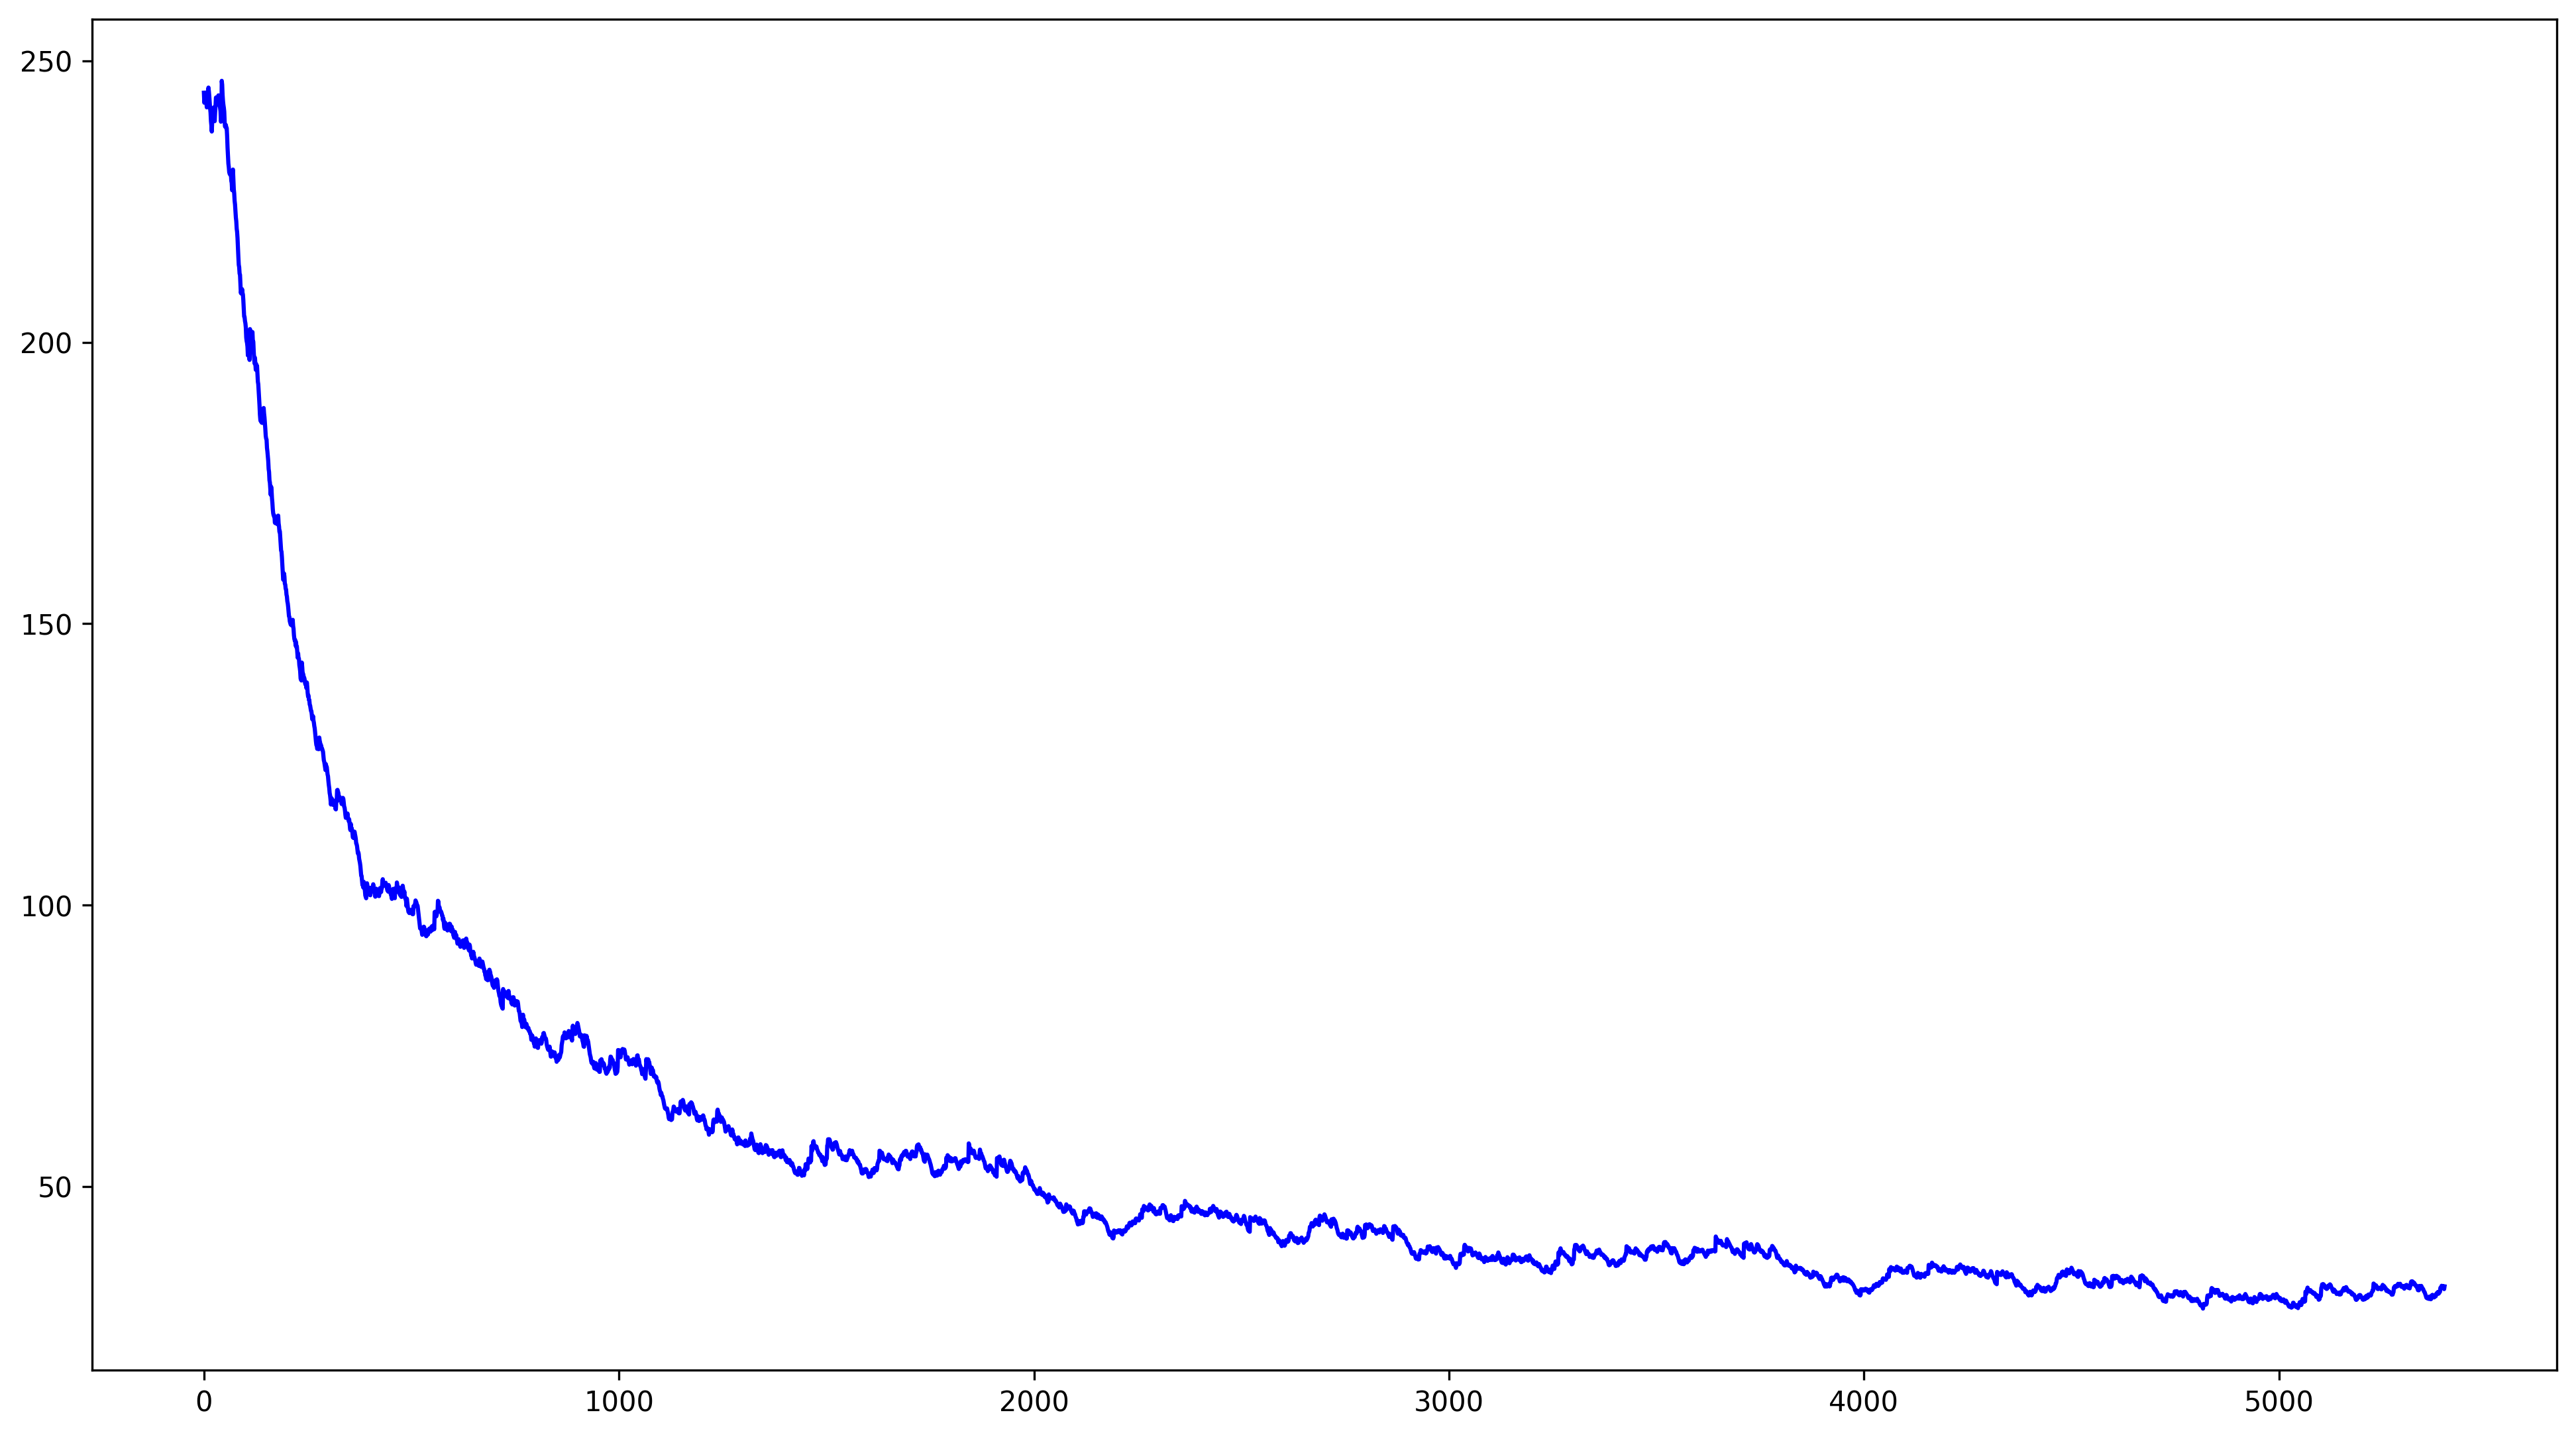

In [158]:
#batch-training loss折线图
plt.figure
batches = [i for i in range(len(loss_avg_all))]
plt.plot(batches, loss_avg_all, 'b', label='Training loss')

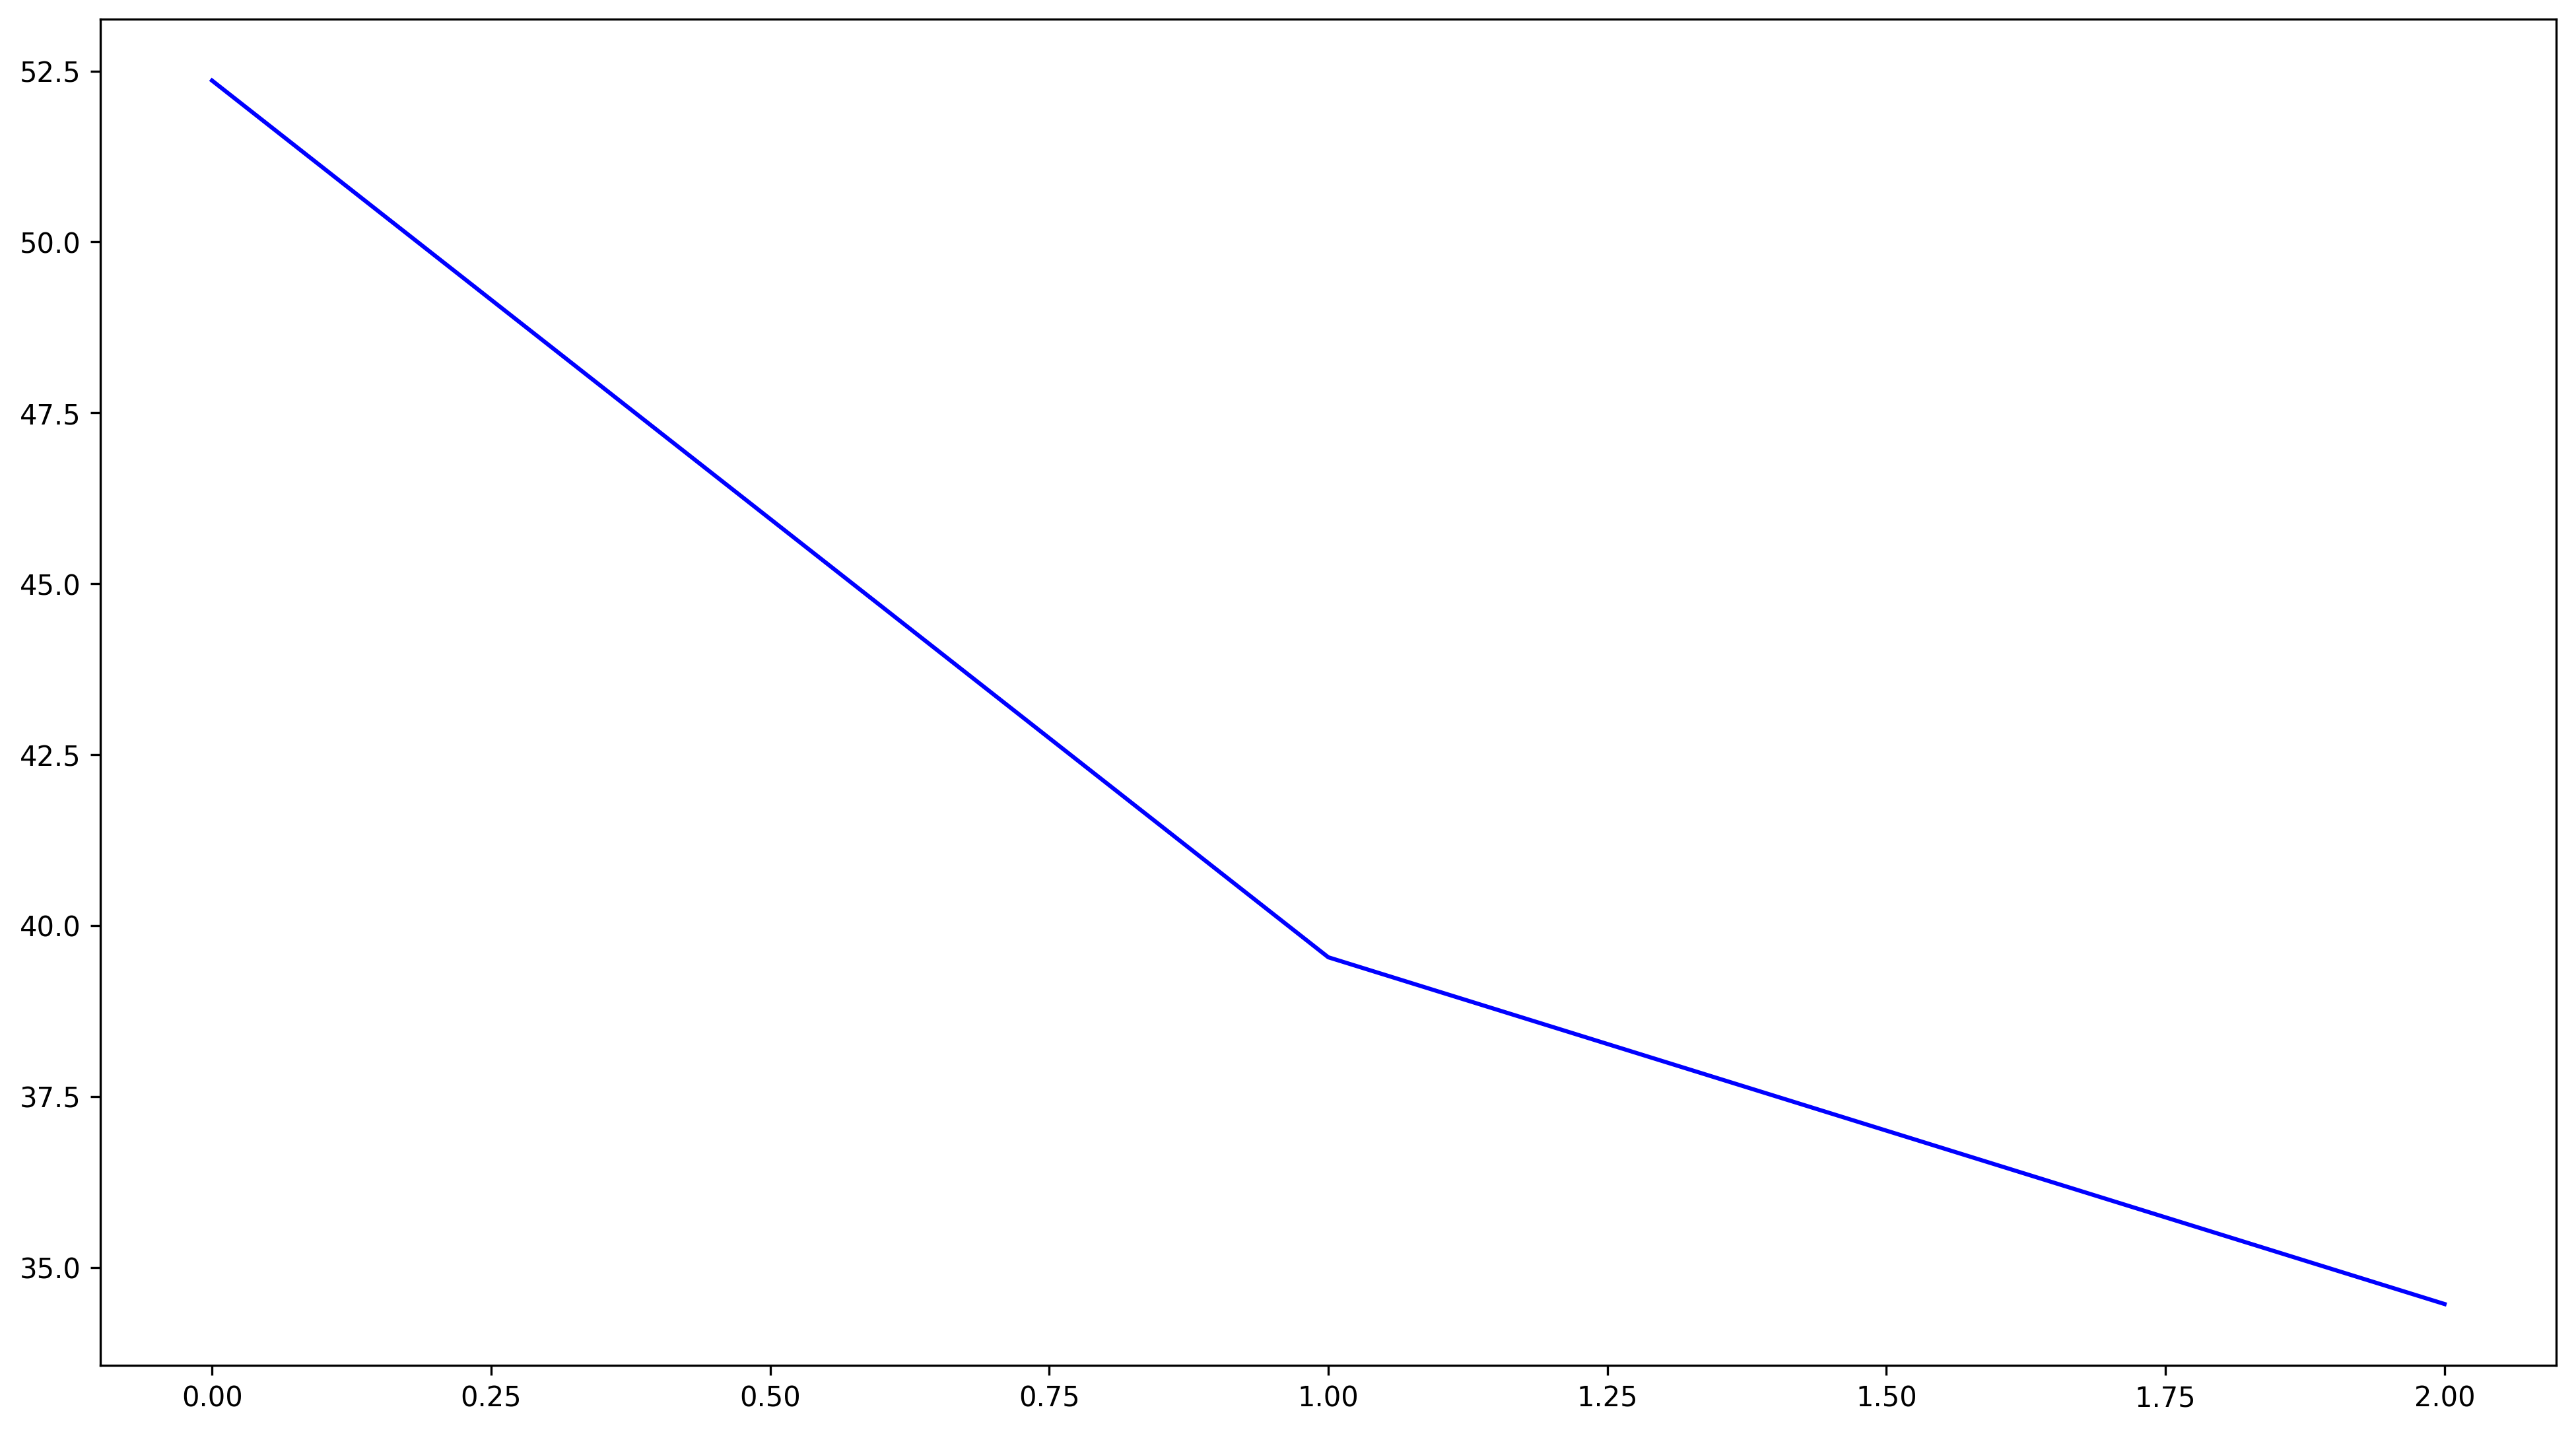

In [159]:
#epoch-eval loss折线图
plt.figure
epochs = [i for i in range(len(eval_epoch_loss))]
plt.plot(epochs, eval_epoch_loss, 'b', label='epoch-eval loss')

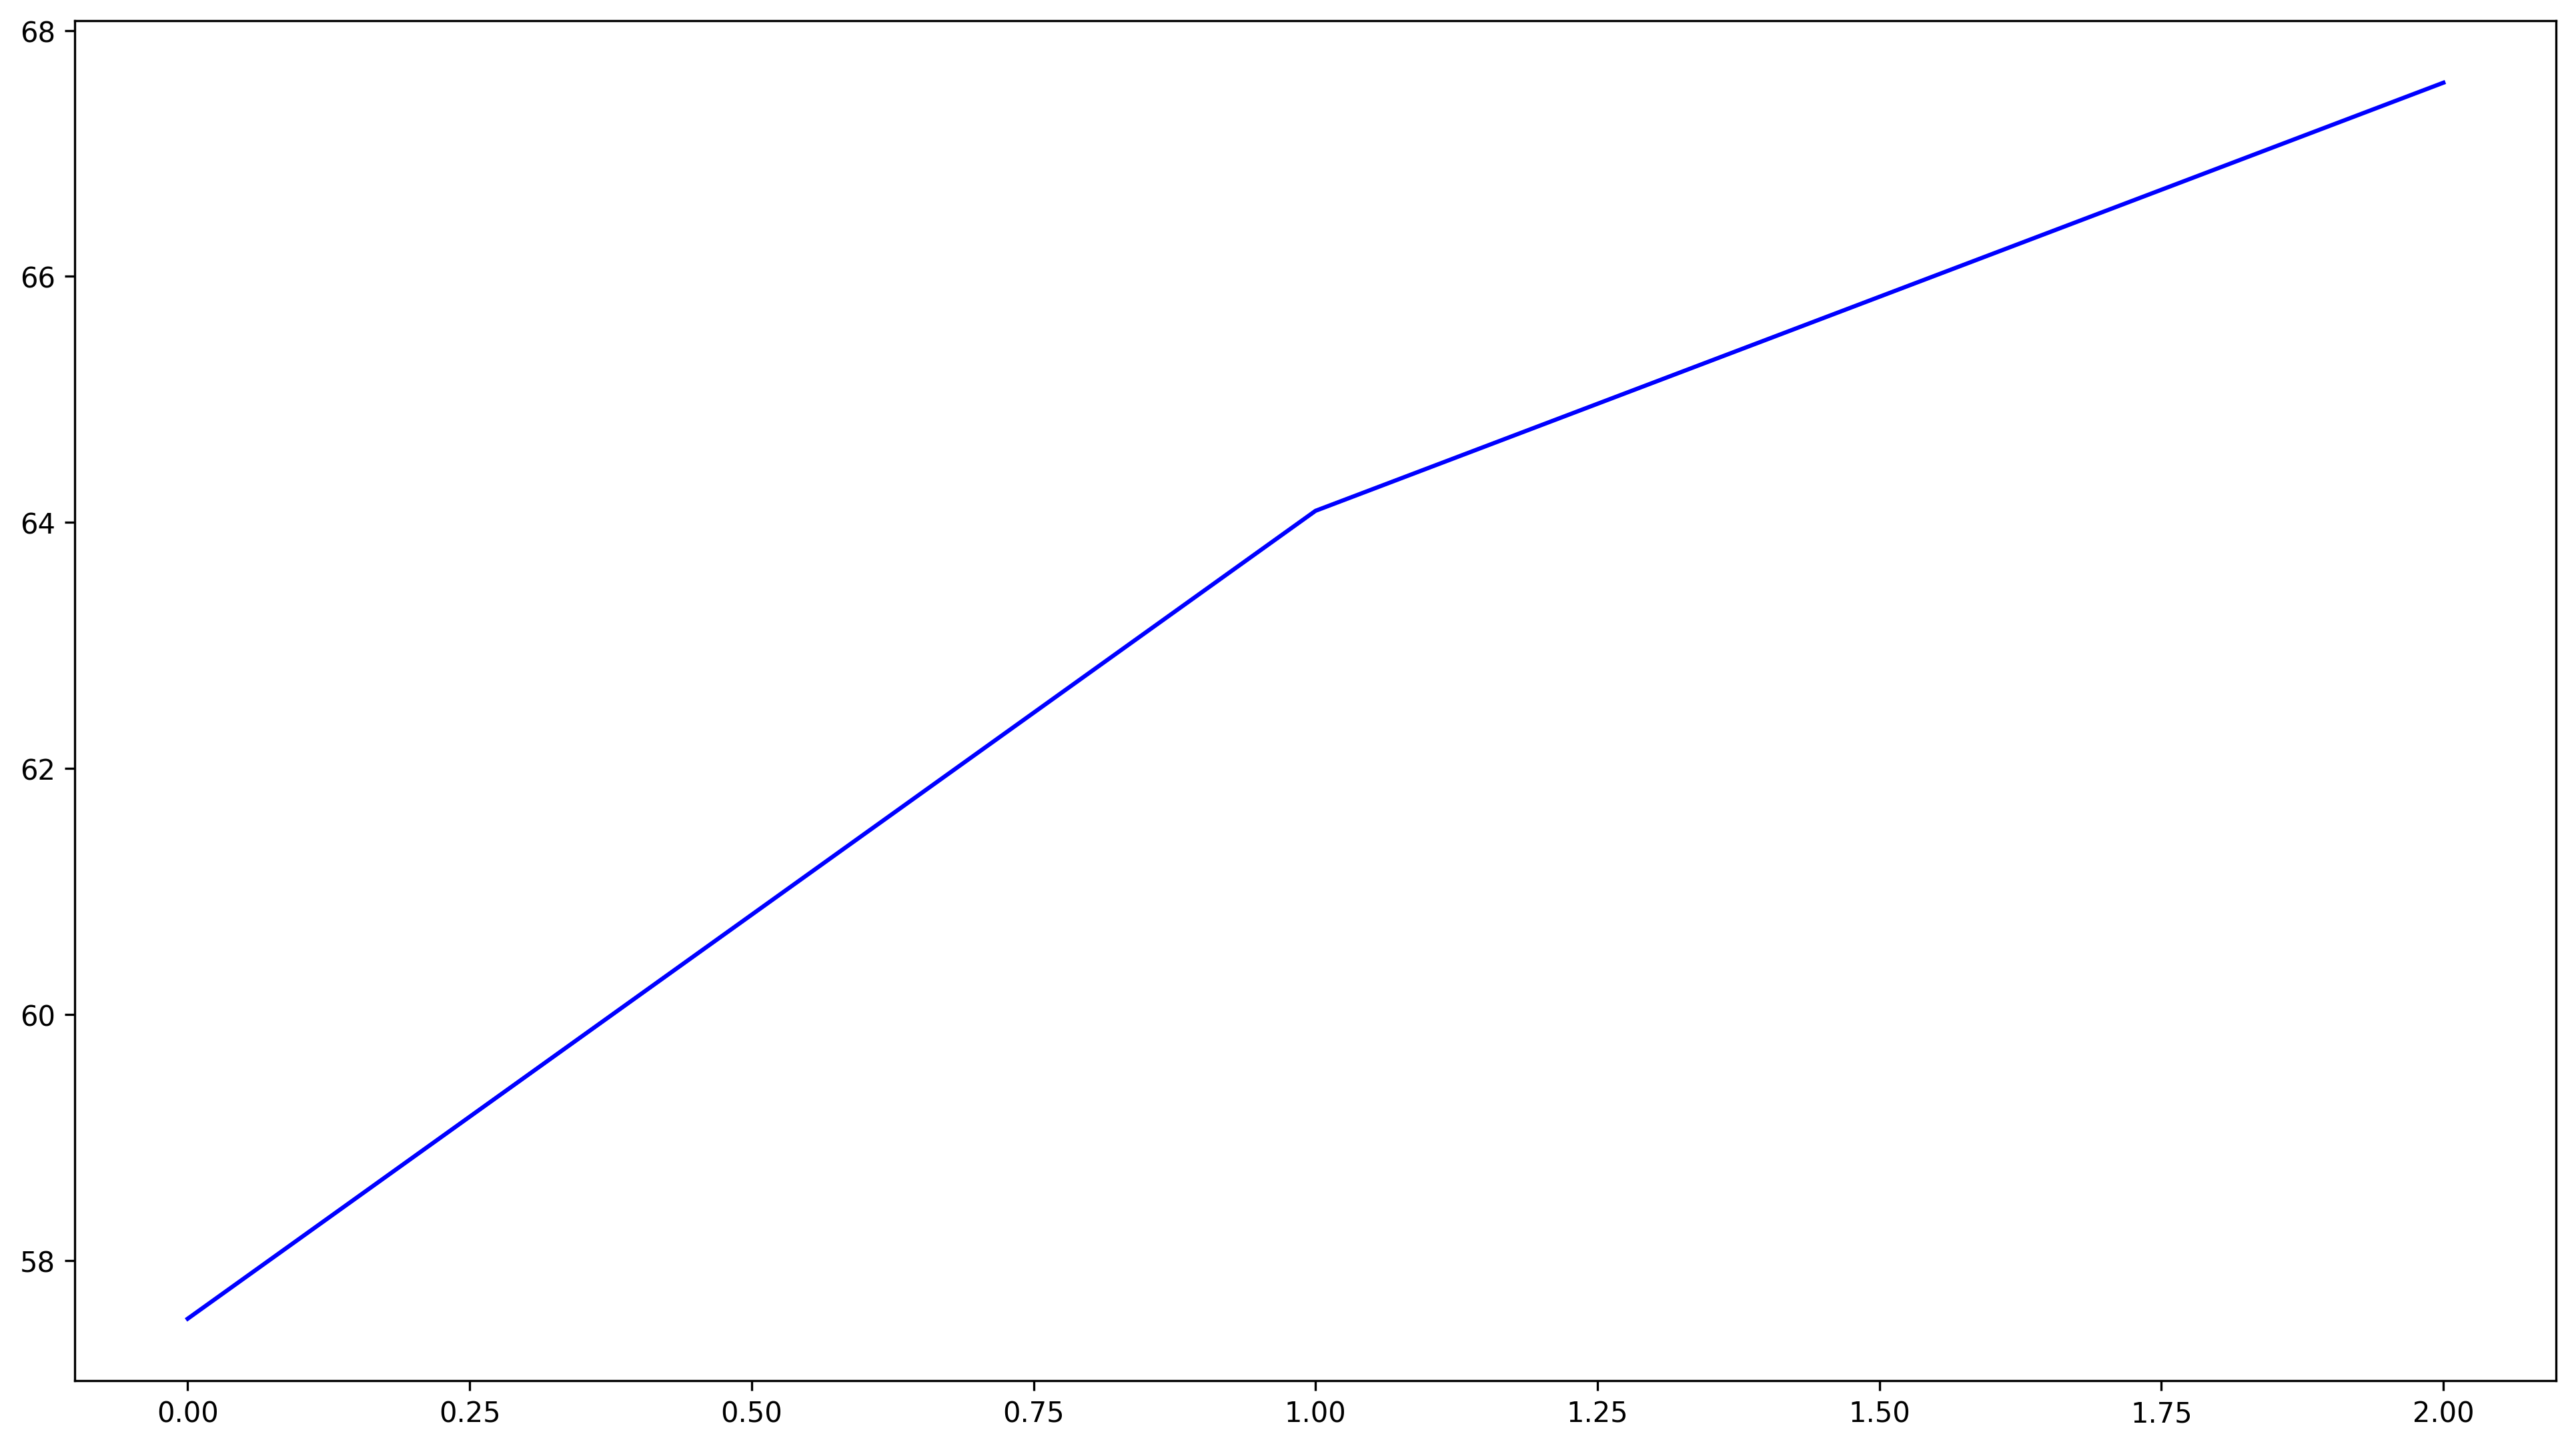

In [160]:
#epoch-accuracy折线图

plt.figure
epochs = [i for i in range(len(eval_metric))]
plt.plot(epochs, eval_metric, 'b', label='epoch-eval acc')           #‘b’在matplotlib中就是将x\y轴的散点进行连线

68.18546231961517
[57.527336741257315, 64.09492535292325, 67.5750702461153, 68.18546231961517]


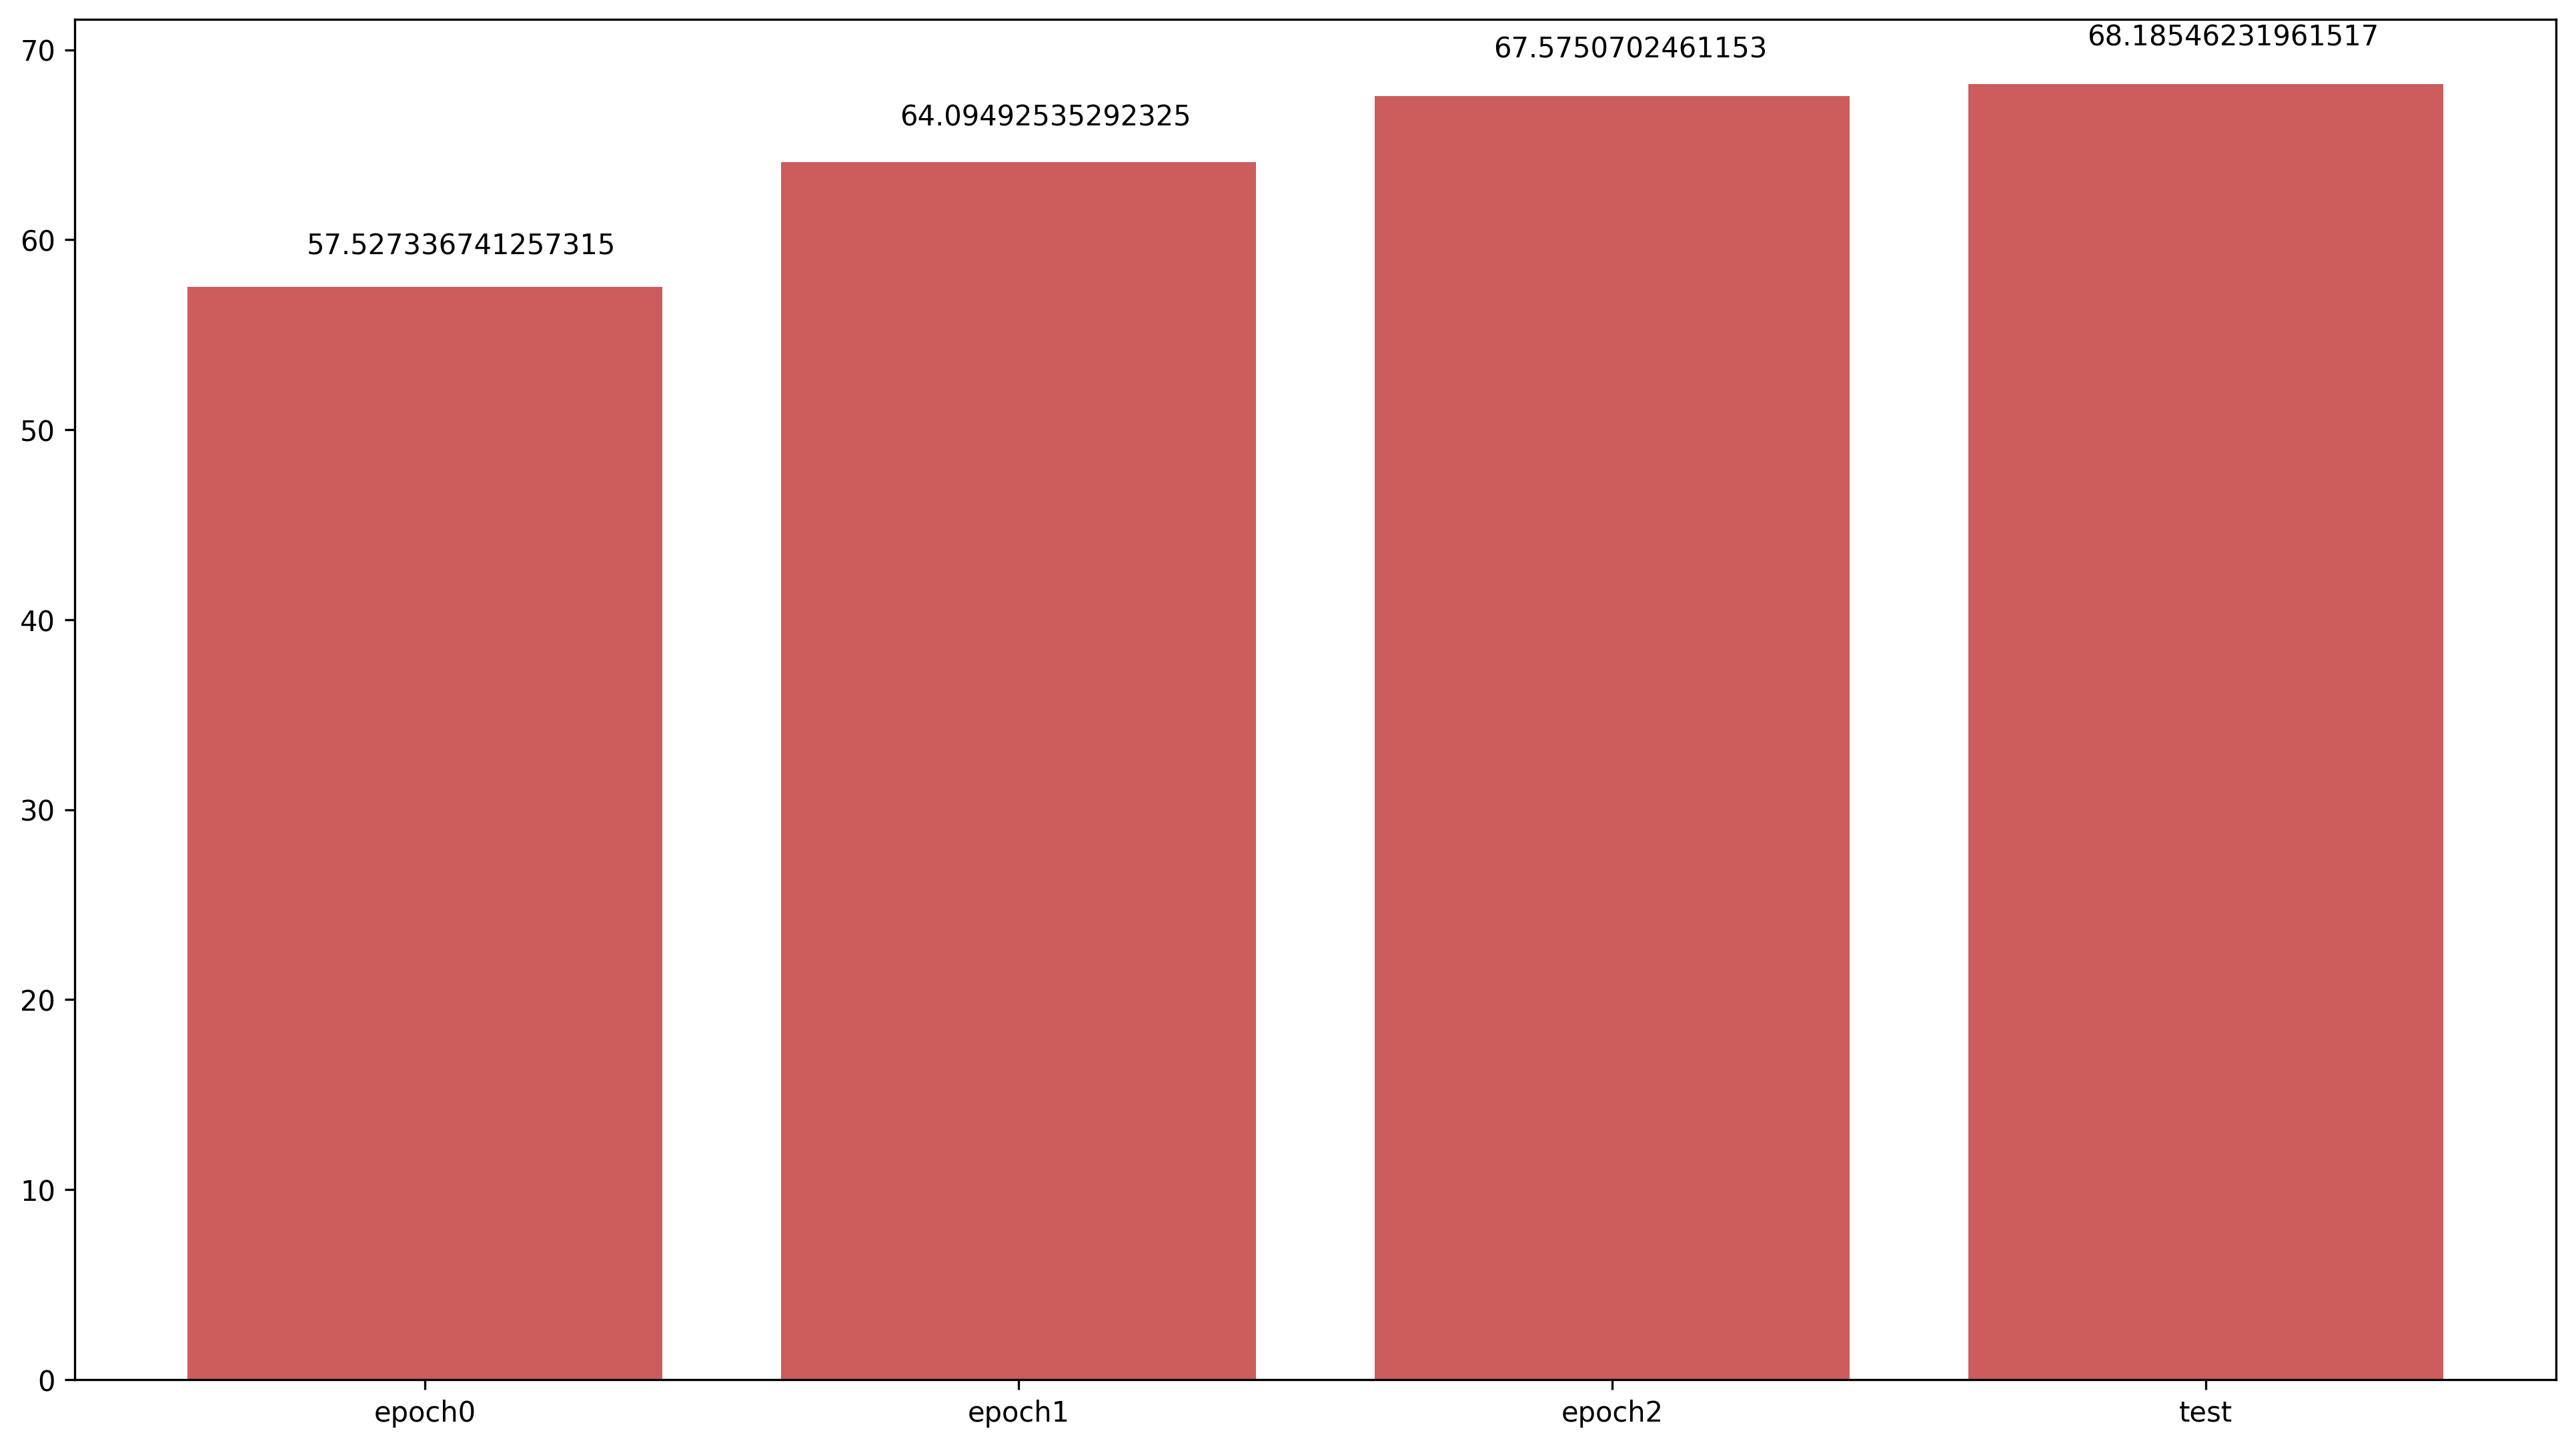

In [161]:
#绘制验证集每个epoch下评价指标和测试集的评价指标柱状图
# 显示高度
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2.- 0.2, 1.03*height, '%s' % height)


name_list = ['epoch0', 'epoch1', 'epoch2', 'test']

new_judge = list()
new_i = correct / total * 100.0
print(new_i)

for i in eval_metric:
    new_judge.append(i)

new_judge.append(new_i)
print(new_judge)
    

autolabel(plt.bar(range(len(new_judge)), new_judge, color='IndianRed', tick_label=name_list))
plt.show()